In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
n_var =int(vars[0,j])
latent_space =12 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


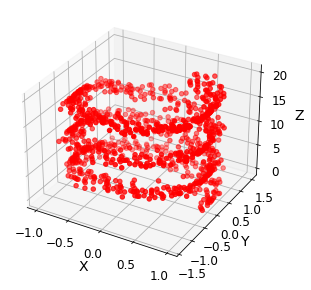

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                360       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [6]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 1010      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 3,571
Trainable params: 3,471
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


## Training

In [8]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 43.090981 - generator: -0.183395 - 2s
Epoch 2/50000
critic: 9.020962 - generator: -0.093884 - 0s
Epoch 3/50000
critic: 0.997835 - generator: -0.040768 - 0s
Epoch 4/50000
critic: 0.061068 - generator: -0.015056 - 0s
Epoch 5/50000
critic: 0.031498 - generator: -0.012139 - 0s
Epoch 6/50000
critic: 0.055759 - generator: -0.010977 - 0s
Epoch 7/50000
critic: 0.034144 - generator: -0.006017 - 0s
Epoch 8/50000
critic: 0.033987 - generator: -0.003539 - 0s
Epoch 9/50000
critic: 0.025510 - generator: -0.003820 - 0s
Epoch 10/50000
critic: 0.023370 - generator: -0.004324 - 0s
Epoch 11/50000
critic: 0.037109 - generator: -0.003813 - 0s
Epoch 12/50000
critic: 0.024514 - generator: -0.004318 - 0s
Epoch 13/50000
critic: 0.034396 - generator: 0.001352 - 0s
Epoch 14/50000
critic: 0.025036 - generator: 0.001691 - 0s
Epoch 15/50000
critic: 0.032858 - generator: 0.001356 - 0s
Epoch 16/50000
critic: 0.018225 - generator: -0.001475 - 0s
Epoch 17/50000
critic: 0.018627 - generator: 0.0019

critic: 0.014624 - generator: -0.159151 - 0s
Epoch 139/50000
critic: 0.012345 - generator: -0.161912 - 0s
Epoch 140/50000
critic: 0.019443 - generator: -0.163685 - 0s
Epoch 141/50000
critic: 0.021040 - generator: -0.162108 - 0s
Epoch 142/50000
critic: 0.012732 - generator: -0.167153 - 0s
Epoch 143/50000
critic: 0.011236 - generator: -0.170284 - 0s
Epoch 144/50000
critic: 0.013313 - generator: -0.169464 - 0s
Epoch 145/50000
critic: 0.015932 - generator: -0.174455 - 0s
Epoch 146/50000
critic: 0.010243 - generator: -0.172680 - 0s
Epoch 147/50000
critic: 0.018970 - generator: -0.177544 - 0s
Epoch 148/50000
critic: 0.011604 - generator: -0.180365 - 0s
Epoch 149/50000
critic: 0.017003 - generator: -0.181789 - 0s
Epoch 150/50000
critic: 0.015458 - generator: -0.182000 - 0s
Epoch 151/50000
critic: 0.010821 - generator: -0.186018 - 0s
Epoch 152/50000
critic: 0.011892 - generator: -0.185464 - 0s
Epoch 153/50000
critic: 0.015474 - generator: -0.184802 - 0s
Epoch 154/50000
critic: 0.015331 - gener

critic: 0.014448 - generator: -0.248818 - 0s
Epoch 275/50000
critic: 0.009267 - generator: -0.252159 - 0s
Epoch 276/50000
critic: 0.014051 - generator: -0.249092 - 0s
Epoch 277/50000
critic: 0.008045 - generator: -0.246831 - 0s
Epoch 278/50000
critic: 0.012229 - generator: -0.248297 - 0s
Epoch 279/50000
critic: 0.016400 - generator: -0.251921 - 0s
Epoch 280/50000
critic: 0.010129 - generator: -0.256621 - 0s
Epoch 281/50000
critic: 0.017051 - generator: -0.254952 - 0s
Epoch 282/50000
critic: 0.017975 - generator: -0.253357 - 0s
Epoch 283/50000
critic: 0.010291 - generator: -0.257168 - 0s
Epoch 284/50000
critic: 0.012346 - generator: -0.260495 - 0s
Epoch 285/50000
critic: 0.007348 - generator: -0.265604 - 0s
Epoch 286/50000
critic: 0.008918 - generator: -0.265356 - 0s
Epoch 287/50000
critic: 0.013029 - generator: -0.264050 - 0s
Epoch 288/50000
critic: 0.008175 - generator: -0.268720 - 0s
Epoch 289/50000
critic: 0.005953 - generator: -0.265709 - 0s
Epoch 290/50000
critic: 0.011015 - gener

critic: 0.013609 - generator: -0.330110 - 0s
Epoch 411/50000
critic: 0.015707 - generator: -0.329075 - 0s
Epoch 412/50000
critic: 0.013117 - generator: -0.331567 - 0s
Epoch 413/50000
critic: 0.014353 - generator: -0.320824 - 0s
Epoch 414/50000
critic: 0.012133 - generator: -0.331203 - 0s
Epoch 415/50000
critic: 0.013850 - generator: -0.328132 - 0s
Epoch 416/50000
critic: 0.009143 - generator: -0.326717 - 0s
Epoch 417/50000
critic: 0.005816 - generator: -0.333729 - 0s
Epoch 418/50000
critic: 0.008610 - generator: -0.327688 - 0s
Epoch 419/50000
critic: 0.012754 - generator: -0.327860 - 0s
Epoch 420/50000
critic: 0.017332 - generator: -0.332384 - 0s
Epoch 421/50000
critic: 0.013023 - generator: -0.331336 - 0s
Epoch 422/50000
critic: 0.013872 - generator: -0.331931 - 0s
Epoch 423/50000
critic: 0.004677 - generator: -0.329911 - 0s
Epoch 424/50000
critic: 0.018846 - generator: -0.328850 - 0s
Epoch 425/50000
critic: 0.006214 - generator: -0.329078 - 0s
Epoch 426/50000
critic: 0.009249 - gener

critic: 0.017148 - generator: -0.289559 - 0s
Epoch 547/50000
critic: 0.010339 - generator: -0.286378 - 0s
Epoch 548/50000
critic: 0.013433 - generator: -0.289391 - 0s
Epoch 549/50000
critic: 0.009731 - generator: -0.287608 - 0s
Epoch 550/50000
critic: 0.011860 - generator: -0.290036 - 0s
Epoch 551/50000
critic: 0.011112 - generator: -0.290312 - 0s
Epoch 552/50000
critic: 0.017841 - generator: -0.292778 - 0s
Epoch 553/50000
critic: 0.010332 - generator: -0.293126 - 0s
Epoch 554/50000
critic: 0.013159 - generator: -0.291222 - 0s
Epoch 555/50000
critic: 0.012032 - generator: -0.290929 - 0s
Epoch 556/50000
critic: 0.012549 - generator: -0.296019 - 0s
Epoch 557/50000
critic: 0.013381 - generator: -0.292427 - 0s
Epoch 558/50000
critic: 0.015495 - generator: -0.290798 - 0s
Epoch 559/50000
critic: 0.018452 - generator: -0.296944 - 0s
Epoch 560/50000
critic: 0.013072 - generator: -0.292082 - 0s
Epoch 561/50000
critic: 0.010019 - generator: -0.293591 - 0s
Epoch 562/50000
critic: 0.014467 - gener

critic: 0.019847 - generator: -0.286522 - 0s
Epoch 683/50000
critic: 0.008066 - generator: -0.283454 - 0s
Epoch 684/50000
critic: 0.012393 - generator: -0.280127 - 0s
Epoch 685/50000
critic: 0.011151 - generator: -0.284025 - 0s
Epoch 686/50000
critic: 0.007916 - generator: -0.285957 - 0s
Epoch 687/50000
critic: 0.013867 - generator: -0.284553 - 0s
Epoch 688/50000
critic: 0.013394 - generator: -0.281931 - 0s
Epoch 689/50000
critic: 0.010979 - generator: -0.282503 - 0s
Epoch 690/50000
critic: 0.016568 - generator: -0.287983 - 0s
Epoch 691/50000
critic: 0.009219 - generator: -0.285046 - 0s
Epoch 692/50000
critic: 0.017363 - generator: -0.286391 - 0s
Epoch 693/50000
critic: 0.021300 - generator: -0.286892 - 0s
Epoch 694/50000
critic: 0.013111 - generator: -0.285313 - 0s
Epoch 695/50000
critic: 0.017921 - generator: -0.286557 - 0s
Epoch 696/50000
critic: 0.012484 - generator: -0.286210 - 0s
Epoch 697/50000
critic: 0.013686 - generator: -0.277619 - 0s
Epoch 698/50000
critic: 0.009422 - gener

critic: 0.018231 - generator: -0.269339 - 0s
Epoch 818/50000
critic: 0.006932 - generator: -0.273192 - 0s
Epoch 819/50000
critic: 0.009333 - generator: -0.271333 - 0s
Epoch 820/50000
critic: 0.007093 - generator: -0.270817 - 0s
Epoch 821/50000
critic: 0.009142 - generator: -0.267597 - 0s
Epoch 822/50000
critic: 0.010079 - generator: -0.270556 - 0s
Epoch 823/50000
critic: 0.011055 - generator: -0.264342 - 0s
Epoch 824/50000
critic: 0.010044 - generator: -0.269897 - 0s
Epoch 825/50000
critic: 0.014411 - generator: -0.260703 - 0s
Epoch 826/50000
critic: 0.010812 - generator: -0.260566 - 0s
Epoch 827/50000
critic: 0.009283 - generator: -0.263230 - 0s
Epoch 828/50000
critic: 0.010705 - generator: -0.270967 - 0s
Epoch 829/50000
critic: 0.013506 - generator: -0.267376 - 0s
Epoch 830/50000
critic: 0.014572 - generator: -0.272772 - 0s
Epoch 831/50000
critic: 0.012497 - generator: -0.275646 - 0s
Epoch 832/50000
critic: 0.012876 - generator: -0.275992 - 0s
Epoch 833/50000
critic: 0.009832 - gener

critic: 0.011140 - generator: -0.251699 - 0s
Epoch 954/50000
critic: 0.015262 - generator: -0.248670 - 0s
Epoch 955/50000
critic: 0.008459 - generator: -0.249419 - 0s
Epoch 956/50000
critic: 0.011680 - generator: -0.248763 - 0s
Epoch 957/50000
critic: 0.007521 - generator: -0.245660 - 0s
Epoch 958/50000
critic: 0.014202 - generator: -0.246268 - 0s
Epoch 959/50000
critic: 0.012709 - generator: -0.244116 - 0s
Epoch 960/50000
critic: 0.009633 - generator: -0.247073 - 0s
Epoch 961/50000
critic: 0.009477 - generator: -0.246791 - 0s
Epoch 962/50000
critic: 0.012173 - generator: -0.245804 - 0s
Epoch 963/50000
critic: 0.017456 - generator: -0.242271 - 0s
Epoch 964/50000
critic: 0.009164 - generator: -0.240342 - 0s
Epoch 965/50000
critic: 0.006975 - generator: -0.239109 - 0s
Epoch 966/50000
critic: 0.006298 - generator: -0.240629 - 0s
Epoch 967/50000
critic: 0.007154 - generator: -0.237889 - 0s
Epoch 968/50000
critic: 0.010809 - generator: -0.238945 - 0s
Epoch 969/50000
critic: 0.007156 - gener

critic: 0.008395 - generator: -0.241795 - 0s
Epoch 1088/50000
critic: 0.005479 - generator: -0.246922 - 0s
Epoch 1089/50000
critic: 0.010178 - generator: -0.246659 - 0s
Epoch 1090/50000
critic: 0.008954 - generator: -0.248715 - 0s
Epoch 1091/50000
critic: 0.012754 - generator: -0.253852 - 0s
Epoch 1092/50000
critic: 0.012554 - generator: -0.245704 - 0s
Epoch 1093/50000
critic: 0.011311 - generator: -0.245364 - 0s
Epoch 1094/50000
critic: 0.013573 - generator: -0.248690 - 0s
Epoch 1095/50000
critic: 0.009555 - generator: -0.250319 - 0s
Epoch 1096/50000
critic: 0.019968 - generator: -0.246803 - 0s
Epoch 1097/50000
critic: 0.008948 - generator: -0.251087 - 0s
Epoch 1098/50000
critic: 0.010205 - generator: -0.249625 - 0s
Epoch 1099/50000
critic: 0.008269 - generator: -0.252571 - 0s
Epoch 1100/50000
critic: 0.011952 - generator: -0.248710 - 0s
Epoch 1101/50000
critic: 0.007767 - generator: -0.250798 - 0s
Epoch 1102/50000
critic: 0.007701 - generator: -0.255317 - 0s
Epoch 1103/50000
critic: 

critic: 0.009365 - generator: -0.241530 - 0s
Epoch 1221/50000
critic: 0.010456 - generator: -0.240815 - 0s
Epoch 1222/50000
critic: 0.005389 - generator: -0.237402 - 0s
Epoch 1223/50000
critic: 0.009871 - generator: -0.237596 - 0s
Epoch 1224/50000
critic: 0.012724 - generator: -0.244176 - 0s
Epoch 1225/50000
critic: 0.008567 - generator: -0.237863 - 0s
Epoch 1226/50000
critic: 0.006368 - generator: -0.237433 - 0s
Epoch 1227/50000
critic: 0.010397 - generator: -0.240667 - 0s
Epoch 1228/50000
critic: 0.010210 - generator: -0.241291 - 0s
Epoch 1229/50000
critic: 0.007834 - generator: -0.239960 - 0s
Epoch 1230/50000
critic: 0.009867 - generator: -0.244111 - 0s
Epoch 1231/50000
critic: 0.006204 - generator: -0.247857 - 0s
Epoch 1232/50000
critic: 0.004427 - generator: -0.246236 - 0s
Epoch 1233/50000
critic: 0.007613 - generator: -0.244809 - 0s
Epoch 1234/50000
critic: 0.012695 - generator: -0.249447 - 0s
Epoch 1235/50000
critic: 0.014211 - generator: -0.248199 - 0s
Epoch 1236/50000
critic: 

critic: 0.012279 - generator: -0.247987 - 0s
Epoch 1355/50000
critic: 0.009383 - generator: -0.251606 - 0s
Epoch 1356/50000
critic: 0.007965 - generator: -0.252258 - 0s
Epoch 1357/50000
critic: 0.006234 - generator: -0.250491 - 0s
Epoch 1358/50000
critic: 0.013574 - generator: -0.251259 - 0s
Epoch 1359/50000
critic: 0.011837 - generator: -0.249924 - 0s
Epoch 1360/50000
critic: 0.009490 - generator: -0.252008 - 0s
Epoch 1361/50000
critic: 0.007342 - generator: -0.256032 - 0s
Epoch 1362/50000
critic: 0.013715 - generator: -0.257547 - 0s
Epoch 1363/50000
critic: 0.007992 - generator: -0.257183 - 0s
Epoch 1364/50000
critic: 0.013399 - generator: -0.252525 - 0s
Epoch 1365/50000
critic: 0.009949 - generator: -0.253486 - 0s
Epoch 1366/50000
critic: 0.006616 - generator: -0.251371 - 0s
Epoch 1367/50000
critic: 0.011302 - generator: -0.257150 - 0s
Epoch 1368/50000
critic: 0.009844 - generator: -0.253852 - 0s
Epoch 1369/50000
critic: 0.008590 - generator: -0.261045 - 0s
Epoch 1370/50000
critic: 

critic: 0.008480 - generator: -0.260712 - 0s
Epoch 1489/50000
critic: 0.004701 - generator: -0.261954 - 0s
Epoch 1490/50000
critic: 0.005964 - generator: -0.267803 - 0s
Epoch 1491/50000
critic: 0.005174 - generator: -0.260826 - 0s
Epoch 1492/50000
critic: 0.010348 - generator: -0.257160 - 0s
Epoch 1493/50000
critic: 0.009714 - generator: -0.262088 - 0s
Epoch 1494/50000
critic: 0.009031 - generator: -0.258444 - 0s
Epoch 1495/50000
critic: 0.013078 - generator: -0.260420 - 0s
Epoch 1496/50000
critic: 0.009115 - generator: -0.260446 - 0s
Epoch 1497/50000
critic: 0.011136 - generator: -0.260725 - 0s
Epoch 1498/50000
critic: 0.009762 - generator: -0.259385 - 0s
Epoch 1499/50000
critic: 0.008239 - generator: -0.267914 - 0s
Epoch 1500/50000
critic: 0.005374 - generator: -0.263493 - 0s
Epoch 1501/50000
critic: 0.014576 - generator: -0.260103 - 0s
Epoch 1502/50000
critic: 0.007661 - generator: -0.261392 - 0s
Epoch 1503/50000
critic: 0.009119 - generator: -0.262042 - 0s
Epoch 1504/50000
critic: 

critic: 0.011259 - generator: -0.290279 - 0s
Epoch 1623/50000
critic: 0.006034 - generator: -0.288026 - 0s
Epoch 1624/50000
critic: 0.007199 - generator: -0.289063 - 0s
Epoch 1625/50000
critic: 0.008061 - generator: -0.290537 - 0s
Epoch 1626/50000
critic: 0.010179 - generator: -0.291309 - 0s
Epoch 1627/50000
critic: 0.008892 - generator: -0.290473 - 0s
Epoch 1628/50000
critic: 0.013686 - generator: -0.293954 - 0s
Epoch 1629/50000
critic: 0.012542 - generator: -0.298369 - 0s
Epoch 1630/50000
critic: 0.010768 - generator: -0.295753 - 0s
Epoch 1631/50000
critic: 0.005291 - generator: -0.292834 - 0s
Epoch 1632/50000
critic: 0.012672 - generator: -0.296808 - 0s
Epoch 1633/50000
critic: 0.008632 - generator: -0.298314 - 0s
Epoch 1634/50000
critic: 0.009238 - generator: -0.290598 - 0s
Epoch 1635/50000
critic: 0.010049 - generator: -0.290040 - 0s
Epoch 1636/50000
critic: 0.007143 - generator: -0.295983 - 0s
Epoch 1637/50000
critic: 0.008538 - generator: -0.293564 - 0s
Epoch 1638/50000
critic: 

critic: 0.012979 - generator: -0.273291 - 0s
Epoch 1756/50000
critic: 0.008851 - generator: -0.274095 - 0s
Epoch 1757/50000
critic: 0.008546 - generator: -0.274860 - 0s
Epoch 1758/50000
critic: 0.012747 - generator: -0.275964 - 0s
Epoch 1759/50000
critic: 0.006769 - generator: -0.278093 - 0s
Epoch 1760/50000
critic: 0.014223 - generator: -0.275574 - 0s
Epoch 1761/50000
critic: 0.006768 - generator: -0.272508 - 0s
Epoch 1762/50000
critic: 0.009490 - generator: -0.275108 - 0s
Epoch 1763/50000
critic: 0.011959 - generator: -0.276100 - 0s
Epoch 1764/50000
critic: 0.010858 - generator: -0.276005 - 0s
Epoch 1765/50000
critic: 0.010549 - generator: -0.273078 - 0s
Epoch 1766/50000
critic: 0.008430 - generator: -0.278456 - 0s
Epoch 1767/50000
critic: 0.013293 - generator: -0.273570 - 0s
Epoch 1768/50000
critic: 0.006170 - generator: -0.274861 - 0s
Epoch 1769/50000
critic: 0.012328 - generator: -0.274155 - 0s
Epoch 1770/50000
critic: 0.007481 - generator: -0.271972 - 0s
Epoch 1771/50000
critic: 

critic: 0.006167 - generator: -0.264582 - 0s
Epoch 1890/50000
critic: 0.009642 - generator: -0.265423 - 0s
Epoch 1891/50000
critic: 0.008827 - generator: -0.265222 - 0s
Epoch 1892/50000
critic: 0.009771 - generator: -0.264625 - 0s
Epoch 1893/50000
critic: 0.009765 - generator: -0.265035 - 0s
Epoch 1894/50000
critic: 0.006071 - generator: -0.264997 - 0s
Epoch 1895/50000
critic: 0.008240 - generator: -0.263119 - 0s
Epoch 1896/50000
critic: 0.007903 - generator: -0.262817 - 0s
Epoch 1897/50000
critic: 0.007469 - generator: -0.264553 - 0s
Epoch 1898/50000
critic: 0.006461 - generator: -0.265135 - 0s
Epoch 1899/50000
critic: 0.008555 - generator: -0.262172 - 0s
Epoch 1900/50000
critic: 0.010196 - generator: -0.261144 - 0s
Epoch 1901/50000
critic: 0.010685 - generator: -0.261662 - 0s
Epoch 1902/50000
critic: 0.009329 - generator: -0.266544 - 0s
Epoch 1903/50000
critic: 0.008182 - generator: -0.266452 - 0s
Epoch 1904/50000
critic: 0.007979 - generator: -0.267764 - 0s
Epoch 1905/50000
critic: 

critic: 0.009660 - generator: -0.264875 - 0s
Epoch 2024/50000
critic: 0.007846 - generator: -0.268756 - 0s
Epoch 2025/50000
critic: 0.014124 - generator: -0.268445 - 0s
Epoch 2026/50000
critic: 0.007280 - generator: -0.266431 - 0s
Epoch 2027/50000
critic: 0.010968 - generator: -0.260348 - 0s
Epoch 2028/50000
critic: 0.008683 - generator: -0.262164 - 0s
Epoch 2029/50000
critic: 0.004686 - generator: -0.262456 - 0s
Epoch 2030/50000
critic: 0.005633 - generator: -0.265366 - 0s
Epoch 2031/50000
critic: 0.010471 - generator: -0.263072 - 0s
Epoch 2032/50000
critic: 0.009438 - generator: -0.264670 - 0s
Epoch 2033/50000
critic: 0.008068 - generator: -0.262585 - 0s
Epoch 2034/50000
critic: 0.010005 - generator: -0.269803 - 0s
Epoch 2035/50000
critic: 0.009080 - generator: -0.265523 - 0s
Epoch 2036/50000
critic: 0.006554 - generator: -0.270936 - 0s
Epoch 2037/50000
critic: 0.010139 - generator: -0.266674 - 0s
Epoch 2038/50000
critic: 0.010014 - generator: -0.264950 - 0s
Epoch 2039/50000
critic: 

critic: 0.004039 - generator: -0.253859 - 0s
Epoch 2158/50000
critic: 0.010320 - generator: -0.255178 - 0s
Epoch 2159/50000
critic: 0.005702 - generator: -0.255153 - 0s
Epoch 2160/50000
critic: 0.008089 - generator: -0.255861 - 0s
Epoch 2161/50000
critic: 0.005422 - generator: -0.260713 - 0s
Epoch 2162/50000
critic: 0.005747 - generator: -0.257811 - 0s
Epoch 2163/50000
critic: 0.007828 - generator: -0.255562 - 0s
Epoch 2164/50000
critic: 0.010029 - generator: -0.259841 - 0s
Epoch 2165/50000
critic: 0.008696 - generator: -0.259938 - 0s
Epoch 2166/50000
critic: 0.007835 - generator: -0.257396 - 0s
Epoch 2167/50000
critic: 0.010015 - generator: -0.262189 - 0s
Epoch 2168/50000
critic: 0.008918 - generator: -0.260497 - 0s
Epoch 2169/50000
critic: 0.009347 - generator: -0.261688 - 0s
Epoch 2170/50000
critic: 0.007749 - generator: -0.262910 - 0s
Epoch 2171/50000
critic: 0.004159 - generator: -0.264267 - 0s
Epoch 2172/50000
critic: 0.009595 - generator: -0.267401 - 0s
Epoch 2173/50000
critic: 

critic: 0.009413 - generator: -0.283488 - 0s
Epoch 2292/50000
critic: 0.009572 - generator: -0.287044 - 0s
Epoch 2293/50000
critic: 0.007514 - generator: -0.284858 - 0s
Epoch 2294/50000
critic: 0.006158 - generator: -0.281317 - 0s
Epoch 2295/50000
critic: 0.015085 - generator: -0.283772 - 0s
Epoch 2296/50000
critic: 0.009023 - generator: -0.284641 - 0s
Epoch 2297/50000
critic: 0.006512 - generator: -0.287081 - 0s
Epoch 2298/50000
critic: 0.004120 - generator: -0.286112 - 0s
Epoch 2299/50000
critic: 0.008625 - generator: -0.290286 - 0s
Epoch 2300/50000
critic: 0.012346 - generator: -0.291475 - 0s
Epoch 2301/50000
critic: 0.002810 - generator: -0.293795 - 0s
Epoch 2302/50000
critic: 0.010006 - generator: -0.292109 - 0s
Epoch 2303/50000
critic: 0.006916 - generator: -0.294544 - 0s
Epoch 2304/50000
critic: 0.005624 - generator: -0.290941 - 0s
Epoch 2305/50000
critic: 0.007010 - generator: -0.293300 - 0s
Epoch 2306/50000
critic: 0.005472 - generator: -0.288548 - 0s
Epoch 2307/50000
critic: 

critic: 0.003637 - generator: -0.296598 - 0s
Epoch 2426/50000
critic: 0.007370 - generator: -0.295251 - 0s
Epoch 2427/50000
critic: 0.007003 - generator: -0.302654 - 0s
Epoch 2428/50000
critic: 0.007611 - generator: -0.301638 - 0s
Epoch 2429/50000
critic: 0.012579 - generator: -0.300784 - 0s
Epoch 2430/50000
critic: 0.013141 - generator: -0.293121 - 0s
Epoch 2431/50000
critic: 0.004953 - generator: -0.292465 - 0s
Epoch 2432/50000
critic: 0.004933 - generator: -0.292888 - 0s
Epoch 2433/50000
critic: 0.010409 - generator: -0.291661 - 0s
Epoch 2434/50000
critic: 0.005359 - generator: -0.293401 - 0s
Epoch 2435/50000
critic: 0.005627 - generator: -0.290515 - 0s
Epoch 2436/50000
critic: 0.009040 - generator: -0.289320 - 0s
Epoch 2437/50000
critic: 0.010392 - generator: -0.288764 - 0s
Epoch 2438/50000
critic: 0.003126 - generator: -0.290902 - 0s
Epoch 2439/50000
critic: 0.005883 - generator: -0.288925 - 0s
Epoch 2440/50000
critic: 0.003631 - generator: -0.288723 - 0s
Epoch 2441/50000
critic: 

critic: 0.007754 - generator: -0.292027 - 0s
Epoch 2560/50000
critic: 0.004699 - generator: -0.291633 - 0s
Epoch 2561/50000
critic: 0.006170 - generator: -0.292167 - 0s
Epoch 2562/50000
critic: 0.009472 - generator: -0.293999 - 0s
Epoch 2563/50000
critic: 0.005712 - generator: -0.293503 - 0s
Epoch 2564/50000
critic: 0.006457 - generator: -0.293123 - 0s
Epoch 2565/50000
critic: 0.009038 - generator: -0.298838 - 0s
Epoch 2566/50000
critic: 0.004353 - generator: -0.292779 - 0s
Epoch 2567/50000
critic: 0.009305 - generator: -0.293242 - 0s
Epoch 2568/50000
critic: 0.012390 - generator: -0.291798 - 0s
Epoch 2569/50000
critic: 0.005236 - generator: -0.291929 - 0s
Epoch 2570/50000
critic: 0.007344 - generator: -0.290250 - 0s
Epoch 2571/50000
critic: 0.008566 - generator: -0.291612 - 0s
Epoch 2572/50000
critic: 0.008032 - generator: -0.291811 - 0s
Epoch 2573/50000
critic: 0.006512 - generator: -0.284900 - 0s
Epoch 2574/50000
critic: 0.004759 - generator: -0.289773 - 0s
Epoch 2575/50000
critic: 

critic: 0.003123 - generator: -0.287214 - 0s
Epoch 2694/50000
critic: 0.005674 - generator: -0.290766 - 0s
Epoch 2695/50000
critic: 0.008536 - generator: -0.287341 - 0s
Epoch 2696/50000
critic: 0.005364 - generator: -0.289482 - 0s
Epoch 2697/50000
critic: 0.010023 - generator: -0.289628 - 0s
Epoch 2698/50000
critic: 0.003737 - generator: -0.291018 - 0s
Epoch 2699/50000
critic: 0.008923 - generator: -0.291690 - 0s
Epoch 2700/50000
critic: 0.008213 - generator: -0.293446 - 0s
Epoch 2701/50000
critic: 0.009303 - generator: -0.292209 - 0s
Epoch 2702/50000
critic: 0.007947 - generator: -0.290428 - 0s
Epoch 2703/50000
critic: 0.011916 - generator: -0.290485 - 0s
Epoch 2704/50000
critic: 0.006576 - generator: -0.284641 - 0s
Epoch 2705/50000
critic: 0.008377 - generator: -0.286030 - 0s
Epoch 2706/50000
critic: 0.006508 - generator: -0.286418 - 0s
Epoch 2707/50000
critic: 0.011206 - generator: -0.288056 - 0s
Epoch 2708/50000
critic: 0.005963 - generator: -0.291534 - 0s
Epoch 2709/50000
critic: 

critic: 0.011179 - generator: -0.302434 - 0s
Epoch 2828/50000
critic: 0.006586 - generator: -0.297989 - 0s
Epoch 2829/50000
critic: 0.009603 - generator: -0.303363 - 0s
Epoch 2830/50000
critic: 0.005717 - generator: -0.301125 - 0s
Epoch 2831/50000
critic: 0.005563 - generator: -0.302934 - 0s
Epoch 2832/50000
critic: 0.008160 - generator: -0.305450 - 0s
Epoch 2833/50000
critic: 0.005268 - generator: -0.306481 - 0s
Epoch 2834/50000
critic: 0.003103 - generator: -0.307700 - 0s
Epoch 2835/50000
critic: 0.006025 - generator: -0.307415 - 0s
Epoch 2836/50000
critic: 0.006090 - generator: -0.304126 - 0s
Epoch 2837/50000
critic: 0.011642 - generator: -0.311434 - 0s
Epoch 2838/50000
critic: 0.008274 - generator: -0.305993 - 0s
Epoch 2839/50000
critic: 0.002965 - generator: -0.303171 - 0s
Epoch 2840/50000
critic: 0.009247 - generator: -0.302984 - 0s
Epoch 2841/50000
critic: 0.005042 - generator: -0.304499 - 0s
Epoch 2842/50000
critic: 0.003221 - generator: -0.300495 - 0s
Epoch 2843/50000
critic: 

critic: 0.005871 - generator: -0.317702 - 0s
Epoch 2962/50000
critic: 0.007608 - generator: -0.316658 - 0s
Epoch 2963/50000
critic: 0.007205 - generator: -0.316211 - 0s
Epoch 2964/50000
critic: 0.006653 - generator: -0.311809 - 0s
Epoch 2965/50000
critic: 0.005912 - generator: -0.314037 - 0s
Epoch 2966/50000
critic: 0.006053 - generator: -0.312695 - 0s
Epoch 2967/50000
critic: 0.008138 - generator: -0.308290 - 0s
Epoch 2968/50000
critic: 0.005297 - generator: -0.311278 - 0s
Epoch 2969/50000
critic: 0.007670 - generator: -0.307387 - 0s
Epoch 2970/50000
critic: 0.012109 - generator: -0.307796 - 0s
Epoch 2971/50000
critic: 0.005653 - generator: -0.309114 - 0s
Epoch 2972/50000
critic: 0.007581 - generator: -0.312866 - 0s
Epoch 2973/50000
critic: 0.008462 - generator: -0.313715 - 0s
Epoch 2974/50000
critic: 0.005640 - generator: -0.312998 - 0s
Epoch 2975/50000
critic: 0.006502 - generator: -0.311128 - 0s
Epoch 2976/50000
critic: 0.012750 - generator: -0.311974 - 0s
Epoch 2977/50000
critic: 

critic: 0.004433 - generator: -0.311051 - 0s
Epoch 3096/50000
critic: 0.005500 - generator: -0.309292 - 0s
Epoch 3097/50000
critic: 0.003596 - generator: -0.308379 - 0s
Epoch 3098/50000
critic: 0.004576 - generator: -0.310295 - 0s
Epoch 3099/50000
critic: 0.006679 - generator: -0.311267 - 0s
Epoch 3100/50000
critic: 0.007570 - generator: -0.308508 - 0s
Epoch 3101/50000
critic: 0.002796 - generator: -0.309916 - 0s
Epoch 3102/50000
critic: 0.004443 - generator: -0.306717 - 0s
Epoch 3103/50000
critic: 0.003374 - generator: -0.309682 - 0s
Epoch 3104/50000
critic: 0.007699 - generator: -0.302671 - 0s
Epoch 3105/50000
critic: 0.009289 - generator: -0.305346 - 0s
Epoch 3106/50000
critic: 0.006773 - generator: -0.303698 - 0s
Epoch 3107/50000
critic: 0.012193 - generator: -0.302956 - 0s
Epoch 3108/50000
critic: 0.004134 - generator: -0.306211 - 0s
Epoch 3109/50000
critic: 0.004158 - generator: -0.306522 - 0s
Epoch 3110/50000
critic: 0.006787 - generator: -0.308334 - 0s
Epoch 3111/50000
critic: 

critic: 0.006359 - generator: -0.290686 - 0s
Epoch 3230/50000
critic: 0.006935 - generator: -0.290586 - 0s
Epoch 3231/50000
critic: 0.003625 - generator: -0.291693 - 0s
Epoch 3232/50000
critic: 0.005568 - generator: -0.290538 - 0s
Epoch 3233/50000
critic: 0.012378 - generator: -0.295177 - 0s
Epoch 3234/50000
critic: 0.008733 - generator: -0.289120 - 0s
Epoch 3235/50000
critic: 0.006355 - generator: -0.291112 - 0s
Epoch 3236/50000
critic: 0.007229 - generator: -0.293245 - 0s
Epoch 3237/50000
critic: 0.004287 - generator: -0.293433 - 0s
Epoch 3238/50000
critic: 0.006964 - generator: -0.288313 - 0s
Epoch 3239/50000
critic: 0.011505 - generator: -0.290887 - 0s
Epoch 3240/50000
critic: 0.004888 - generator: -0.293240 - 0s
Epoch 3241/50000
critic: 0.004371 - generator: -0.284528 - 0s
Epoch 3242/50000
critic: 0.008445 - generator: -0.290801 - 0s
Epoch 3243/50000
critic: 0.004004 - generator: -0.289229 - 0s
Epoch 3244/50000
critic: 0.005953 - generator: -0.288376 - 0s
Epoch 3245/50000
critic: 

critic: 0.008089 - generator: -0.298824 - 0s
Epoch 3364/50000
critic: 0.003635 - generator: -0.296288 - 0s
Epoch 3365/50000
critic: 0.007390 - generator: -0.293110 - 0s
Epoch 3366/50000
critic: 0.005953 - generator: -0.298075 - 0s
Epoch 3367/50000
critic: 0.005141 - generator: -0.296352 - 0s
Epoch 3368/50000
critic: 0.006329 - generator: -0.295123 - 0s
Epoch 3369/50000
critic: 0.004962 - generator: -0.300171 - 0s
Epoch 3370/50000
critic: 0.005877 - generator: -0.297445 - 0s
Epoch 3371/50000
critic: 0.001370 - generator: -0.297622 - 0s
Epoch 3372/50000
critic: 0.006016 - generator: -0.293880 - 0s
Epoch 3373/50000
critic: 0.004188 - generator: -0.292795 - 0s
Epoch 3374/50000
critic: 0.001768 - generator: -0.295806 - 0s
Epoch 3375/50000
critic: 0.007451 - generator: -0.293303 - 0s
Epoch 3376/50000
critic: 0.006867 - generator: -0.297826 - 0s
Epoch 3377/50000
critic: 0.009351 - generator: -0.302430 - 0s
Epoch 3378/50000
critic: 0.006686 - generator: -0.304982 - 0s
Epoch 3379/50000
critic: 

critic: 0.005581 - generator: -0.330562 - 0s
Epoch 3498/50000
critic: 0.003442 - generator: -0.324485 - 0s
Epoch 3499/50000
critic: 0.006133 - generator: -0.325031 - 0s
Epoch 3500/50000
critic: 0.009550 - generator: -0.325239 - 0s
Epoch 3501/50000
critic: 0.009465 - generator: -0.326914 - 0s
Epoch 3502/50000
critic: 0.004235 - generator: -0.320149 - 0s
Epoch 3503/50000
critic: 0.005142 - generator: -0.322857 - 0s
Epoch 3504/50000
critic: 0.004874 - generator: -0.327094 - 0s
Epoch 3505/50000
critic: 0.004450 - generator: -0.328238 - 0s
Epoch 3506/50000
critic: 0.007888 - generator: -0.321498 - 0s
Epoch 3507/50000
critic: 0.005754 - generator: -0.328542 - 0s
Epoch 3508/50000
critic: 0.005765 - generator: -0.321507 - 0s
Epoch 3509/50000
critic: 0.007062 - generator: -0.324210 - 0s
Epoch 3510/50000
critic: 0.005141 - generator: -0.320625 - 0s
Epoch 3511/50000
critic: 0.004170 - generator: -0.321356 - 0s
Epoch 3512/50000
critic: 0.003174 - generator: -0.319723 - 0s
Epoch 3513/50000
critic: 

critic: 0.007826 - generator: -0.327039 - 0s
Epoch 3632/50000
critic: 0.003000 - generator: -0.328006 - 0s
Epoch 3633/50000
critic: 0.003556 - generator: -0.323713 - 0s
Epoch 3634/50000
critic: 0.007349 - generator: -0.321095 - 0s
Epoch 3635/50000
critic: 0.008186 - generator: -0.325578 - 0s
Epoch 3636/50000
critic: 0.006488 - generator: -0.324248 - 0s
Epoch 3637/50000
critic: 0.004830 - generator: -0.329778 - 0s
Epoch 3638/50000
critic: 0.006199 - generator: -0.327684 - 0s
Epoch 3639/50000
critic: 0.006336 - generator: -0.328769 - 0s
Epoch 3640/50000
critic: 0.004712 - generator: -0.335068 - 0s
Epoch 3641/50000
critic: 0.004343 - generator: -0.329642 - 0s
Epoch 3642/50000
critic: 0.004461 - generator: -0.327312 - 0s
Epoch 3643/50000
critic: 0.007833 - generator: -0.330322 - 0s
Epoch 3644/50000
critic: 0.007375 - generator: -0.333622 - 0s
Epoch 3645/50000
critic: 0.007195 - generator: -0.329552 - 0s
Epoch 3646/50000
critic: 0.005935 - generator: -0.332603 - 0s
Epoch 3647/50000
critic: 

critic: 0.005634 - generator: -0.324527 - 0s
Epoch 3766/50000
critic: 0.004873 - generator: -0.324630 - 0s
Epoch 3767/50000
critic: 0.003495 - generator: -0.322215 - 0s
Epoch 3768/50000
critic: 0.004757 - generator: -0.324577 - 0s
Epoch 3769/50000
critic: 0.009151 - generator: -0.323600 - 0s
Epoch 3770/50000
critic: 0.001968 - generator: -0.323887 - 0s
Epoch 3771/50000
critic: 0.008461 - generator: -0.327785 - 0s
Epoch 3772/50000
critic: 0.003261 - generator: -0.325762 - 0s
Epoch 3773/50000
critic: 0.005110 - generator: -0.324946 - 0s
Epoch 3774/50000
critic: 0.008881 - generator: -0.321881 - 0s
Epoch 3775/50000
critic: 0.008405 - generator: -0.326590 - 0s
Epoch 3776/50000
critic: 0.009812 - generator: -0.321282 - 0s
Epoch 3777/50000
critic: 0.002426 - generator: -0.328723 - 0s
Epoch 3778/50000
critic: 0.003094 - generator: -0.327311 - 0s
Epoch 3779/50000
critic: 0.008802 - generator: -0.327170 - 0s
Epoch 3780/50000
critic: 0.006030 - generator: -0.326493 - 0s
Epoch 3781/50000
critic: 

critic: 0.010709 - generator: -0.323000 - 0s
Epoch 3900/50000
critic: 0.003863 - generator: -0.324521 - 0s
Epoch 3901/50000
critic: 0.002489 - generator: -0.328476 - 0s
Epoch 3902/50000
critic: 0.007302 - generator: -0.324431 - 0s
Epoch 3903/50000
critic: 0.004147 - generator: -0.323583 - 0s
Epoch 3904/50000
critic: 0.003137 - generator: -0.326603 - 0s
Epoch 3905/50000
critic: 0.004980 - generator: -0.323414 - 0s
Epoch 3906/50000
critic: 0.011782 - generator: -0.322468 - 0s
Epoch 3907/50000
critic: 0.009864 - generator: -0.327307 - 0s
Epoch 3908/50000
critic: 0.009409 - generator: -0.320774 - 0s
Epoch 3909/50000
critic: 0.003174 - generator: -0.317438 - 0s
Epoch 3910/50000
critic: 0.006813 - generator: -0.314832 - 0s
Epoch 3911/50000
critic: 0.002800 - generator: -0.318216 - 0s
Epoch 3912/50000
critic: 0.007994 - generator: -0.319640 - 0s
Epoch 3913/50000
critic: 0.010617 - generator: -0.318903 - 0s
Epoch 3914/50000
critic: 0.007276 - generator: -0.319584 - 0s
Epoch 3915/50000
critic: 

critic: 0.004527 - generator: -0.303438 - 0s
Epoch 4034/50000
critic: 0.007246 - generator: -0.302751 - 0s
Epoch 4035/50000
critic: 0.003124 - generator: -0.303992 - 0s
Epoch 4036/50000
critic: 0.004853 - generator: -0.307216 - 0s
Epoch 4037/50000
critic: 0.002386 - generator: -0.307040 - 0s
Epoch 4038/50000
critic: 0.007392 - generator: -0.307247 - 0s
Epoch 4039/50000
critic: 0.008267 - generator: -0.304923 - 0s
Epoch 4040/50000
critic: 0.012799 - generator: -0.307352 - 0s
Epoch 4041/50000
critic: 0.004202 - generator: -0.303097 - 0s
Epoch 4042/50000
critic: 0.009935 - generator: -0.299143 - 0s
Epoch 4043/50000
critic: 0.007573 - generator: -0.303156 - 0s
Epoch 4044/50000
critic: 0.003779 - generator: -0.307723 - 0s
Epoch 4045/50000
critic: 0.005884 - generator: -0.303873 - 0s
Epoch 4046/50000
critic: 0.003687 - generator: -0.300548 - 0s
Epoch 4047/50000
critic: 0.006362 - generator: -0.307302 - 0s
Epoch 4048/50000
critic: 0.007971 - generator: -0.305284 - 0s
Epoch 4049/50000
critic: 

critic: 0.004647 - generator: -0.325853 - 0s
Epoch 4168/50000
critic: 0.005549 - generator: -0.326589 - 0s
Epoch 4169/50000
critic: 0.008974 - generator: -0.323610 - 0s
Epoch 4170/50000
critic: 0.009032 - generator: -0.320587 - 0s
Epoch 4171/50000
critic: 0.002259 - generator: -0.324062 - 0s
Epoch 4172/50000
critic: 0.007641 - generator: -0.321995 - 0s
Epoch 4173/50000
critic: 0.004371 - generator: -0.322446 - 0s
Epoch 4174/50000
critic: 0.008018 - generator: -0.325280 - 0s
Epoch 4175/50000
critic: 0.010209 - generator: -0.320984 - 0s
Epoch 4176/50000
critic: 0.008121 - generator: -0.316566 - 0s
Epoch 4177/50000
critic: 0.003636 - generator: -0.318976 - 0s
Epoch 4178/50000
critic: 0.002506 - generator: -0.318372 - 0s
Epoch 4179/50000
critic: 0.004352 - generator: -0.320404 - 0s
Epoch 4180/50000
critic: 0.006115 - generator: -0.322140 - 0s
Epoch 4181/50000
critic: 0.005883 - generator: -0.320536 - 0s
Epoch 4182/50000
critic: 0.004369 - generator: -0.319154 - 0s
Epoch 4183/50000
critic: 

critic: 0.009693 - generator: -0.336088 - 0s
Epoch 4302/50000
critic: 0.005649 - generator: -0.330091 - 0s
Epoch 4303/50000
critic: 0.004998 - generator: -0.333696 - 0s
Epoch 4304/50000
critic: 0.001727 - generator: -0.331463 - 0s
Epoch 4305/50000
critic: 0.007424 - generator: -0.332097 - 0s
Epoch 4306/50000
critic: 0.007524 - generator: -0.325407 - 0s
Epoch 4307/50000
critic: 0.005793 - generator: -0.336446 - 0s
Epoch 4308/50000
critic: 0.005899 - generator: -0.331855 - 0s
Epoch 4309/50000
critic: 0.002813 - generator: -0.328949 - 0s
Epoch 4310/50000
critic: 0.006985 - generator: -0.326963 - 0s
Epoch 4311/50000
critic: 0.002626 - generator: -0.332039 - 0s
Epoch 4312/50000
critic: 0.007415 - generator: -0.324921 - 0s
Epoch 4313/50000
critic: 0.006522 - generator: -0.327817 - 0s
Epoch 4314/50000
critic: 0.004314 - generator: -0.329925 - 0s
Epoch 4315/50000
critic: 0.005596 - generator: -0.328065 - 0s
Epoch 4316/50000
critic: 0.005471 - generator: -0.331263 - 0s
Epoch 4317/50000
critic: 

critic: 0.002916 - generator: -0.320350 - 0s
Epoch 4436/50000
critic: 0.010972 - generator: -0.318596 - 0s
Epoch 4437/50000
critic: 0.001322 - generator: -0.319416 - 0s
Epoch 4438/50000
critic: 0.004010 - generator: -0.322282 - 0s
Epoch 4439/50000
critic: 0.009351 - generator: -0.316634 - 0s
Epoch 4440/50000
critic: 0.001749 - generator: -0.318820 - 0s
Epoch 4441/50000
critic: 0.009819 - generator: -0.318224 - 0s
Epoch 4442/50000
critic: 0.000464 - generator: -0.322477 - 0s
Epoch 4443/50000
critic: 0.005329 - generator: -0.321317 - 0s
Epoch 4444/50000
critic: 0.003757 - generator: -0.326464 - 0s
Epoch 4445/50000
critic: 0.005989 - generator: -0.324282 - 0s
Epoch 4446/50000
critic: 0.010816 - generator: -0.325483 - 0s
Epoch 4447/50000
critic: 0.003391 - generator: -0.325545 - 0s
Epoch 4448/50000
critic: 0.005084 - generator: -0.322859 - 0s
Epoch 4449/50000
critic: 0.005490 - generator: -0.321622 - 0s
Epoch 4450/50000
critic: 0.007056 - generator: -0.322147 - 0s
Epoch 4451/50000
critic: 

critic: 0.004285 - generator: -0.330947 - 0s
Epoch 4570/50000
critic: 0.003819 - generator: -0.322202 - 0s
Epoch 4571/50000
critic: 0.007445 - generator: -0.328141 - 0s
Epoch 4572/50000
critic: 0.005576 - generator: -0.323018 - 0s
Epoch 4573/50000
critic: 0.006429 - generator: -0.319462 - 0s
Epoch 4574/50000
critic: 0.003360 - generator: -0.322424 - 0s
Epoch 4575/50000
critic: 0.005877 - generator: -0.320377 - 0s
Epoch 4576/50000
critic: 0.006420 - generator: -0.320902 - 0s
Epoch 4577/50000
critic: 0.005642 - generator: -0.323576 - 0s
Epoch 4578/50000
critic: 0.006037 - generator: -0.322386 - 0s
Epoch 4579/50000
critic: 0.002733 - generator: -0.315220 - 0s
Epoch 4580/50000
critic: 0.003851 - generator: -0.322455 - 0s
Epoch 4581/50000
critic: 0.005164 - generator: -0.325769 - 0s
Epoch 4582/50000
critic: 0.007642 - generator: -0.318211 - 0s
Epoch 4583/50000
critic: 0.002082 - generator: -0.316162 - 0s
Epoch 4584/50000
critic: 0.002871 - generator: -0.320323 - 0s
Epoch 4585/50000
critic: 

critic: 0.005581 - generator: -0.318828 - 0s
Epoch 4703/50000
critic: 0.005391 - generator: -0.314929 - 0s
Epoch 4704/50000
critic: 0.003449 - generator: -0.314522 - 0s
Epoch 4705/50000
critic: 0.001073 - generator: -0.317273 - 0s
Epoch 4706/50000
critic: 0.007373 - generator: -0.318499 - 0s
Epoch 4707/50000
critic: 0.003650 - generator: -0.315653 - 0s
Epoch 4708/50000
critic: 0.003494 - generator: -0.319550 - 0s
Epoch 4709/50000
critic: 0.004287 - generator: -0.314388 - 0s
Epoch 4710/50000
critic: 0.002410 - generator: -0.318963 - 0s
Epoch 4711/50000
critic: 0.005950 - generator: -0.314804 - 0s
Epoch 4712/50000
critic: 0.003746 - generator: -0.312025 - 0s
Epoch 4713/50000
critic: 0.006723 - generator: -0.310514 - 0s
Epoch 4714/50000
critic: 0.003863 - generator: -0.314798 - 0s
Epoch 4715/50000
critic: 0.006733 - generator: -0.314097 - 0s
Epoch 4716/50000
critic: 0.001162 - generator: -0.311485 - 0s
Epoch 4717/50000
critic: 0.008556 - generator: -0.313988 - 0s
Epoch 4718/50000
critic: 

critic: 0.003181 - generator: -0.305433 - 0s
Epoch 4837/50000
critic: 0.002361 - generator: -0.303055 - 0s
Epoch 4838/50000
critic: 0.001060 - generator: -0.304246 - 0s
Epoch 4839/50000
critic: 0.004564 - generator: -0.308362 - 0s
Epoch 4840/50000
critic: 0.010156 - generator: -0.309871 - 0s
Epoch 4841/50000
critic: 0.006448 - generator: -0.312036 - 0s
Epoch 4842/50000
critic: 0.006333 - generator: -0.311326 - 0s
Epoch 4843/50000
critic: 0.008306 - generator: -0.309063 - 0s
Epoch 4844/50000
critic: 0.002987 - generator: -0.303984 - 0s
Epoch 4845/50000
critic: 0.006177 - generator: -0.308207 - 0s
Epoch 4846/50000
critic: 0.006589 - generator: -0.302150 - 0s
Epoch 4847/50000
critic: 0.004733 - generator: -0.306814 - 0s
Epoch 4848/50000
critic: 0.003807 - generator: -0.306321 - 0s
Epoch 4849/50000
critic: 0.002539 - generator: -0.308493 - 0s
Epoch 4850/50000
critic: 0.003004 - generator: -0.310058 - 0s
Epoch 4851/50000
critic: 0.000793 - generator: -0.303488 - 0s
Epoch 4852/50000
critic: 

critic: 0.006659 - generator: -0.318147 - 0s
Epoch 4971/50000
critic: 0.003544 - generator: -0.316432 - 0s
Epoch 4972/50000
critic: 0.003359 - generator: -0.318982 - 0s
Epoch 4973/50000
critic: 0.003109 - generator: -0.324275 - 0s
Epoch 4974/50000
critic: 0.004086 - generator: -0.315811 - 0s
Epoch 4975/50000
critic: -0.000178 - generator: -0.317166 - 0s
Epoch 4976/50000
critic: 0.003361 - generator: -0.325966 - 0s
Epoch 4977/50000
critic: 0.004846 - generator: -0.321306 - 0s
Epoch 4978/50000
critic: 0.003976 - generator: -0.316133 - 0s
Epoch 4979/50000
critic: 0.006920 - generator: -0.319389 - 0s
Epoch 4980/50000
critic: 0.005976 - generator: -0.324957 - 0s
Epoch 4981/50000
critic: 0.008114 - generator: -0.324063 - 0s
Epoch 4982/50000
critic: 0.004718 - generator: -0.326241 - 0s
Epoch 4983/50000
critic: 0.009026 - generator: -0.320718 - 0s
Epoch 4984/50000
critic: 0.005863 - generator: -0.323216 - 0s
Epoch 4985/50000
critic: 0.001487 - generator: -0.318256 - 0s
Epoch 4986/50000
critic:

critic: 0.003457 - generator: -0.304782 - 0s
Epoch 5105/50000
critic: 0.003117 - generator: -0.313629 - 0s
Epoch 5106/50000
critic: 0.004303 - generator: -0.311639 - 0s
Epoch 5107/50000
critic: 0.005258 - generator: -0.307707 - 0s
Epoch 5108/50000
critic: 0.006329 - generator: -0.304645 - 0s
Epoch 5109/50000
critic: 0.007816 - generator: -0.308632 - 0s
Epoch 5110/50000
critic: 0.006143 - generator: -0.309037 - 0s
Epoch 5111/50000
critic: 0.005323 - generator: -0.310495 - 0s
Epoch 5112/50000
critic: 0.005221 - generator: -0.310273 - 0s
Epoch 5113/50000
critic: 0.006219 - generator: -0.304934 - 0s
Epoch 5114/50000
critic: 0.001468 - generator: -0.305102 - 0s
Epoch 5115/50000
critic: 0.000436 - generator: -0.307423 - 0s
Epoch 5116/50000
critic: 0.008209 - generator: -0.307237 - 0s
Epoch 5117/50000
critic: 0.007415 - generator: -0.306329 - 0s
Epoch 5118/50000
critic: 0.009728 - generator: -0.301844 - 0s
Epoch 5119/50000
critic: 0.003747 - generator: -0.309125 - 0s
Epoch 5120/50000
critic: 

critic: 0.002937 - generator: -0.323362 - 0s
Epoch 5239/50000
critic: 0.007886 - generator: -0.321142 - 0s
Epoch 5240/50000
critic: 0.002410 - generator: -0.314106 - 0s
Epoch 5241/50000
critic: 0.006239 - generator: -0.323814 - 0s
Epoch 5242/50000
critic: 0.000136 - generator: -0.321760 - 0s
Epoch 5243/50000
critic: 0.003482 - generator: -0.319048 - 0s
Epoch 5244/50000
critic: 0.006237 - generator: -0.321440 - 0s
Epoch 5245/50000
critic: 0.000877 - generator: -0.319076 - 0s
Epoch 5246/50000
critic: 0.007430 - generator: -0.317497 - 0s
Epoch 5247/50000
critic: 0.006935 - generator: -0.320075 - 0s
Epoch 5248/50000
critic: 0.007330 - generator: -0.325406 - 0s
Epoch 5249/50000
critic: 0.011122 - generator: -0.316418 - 0s
Epoch 5250/50000
critic: 0.006988 - generator: -0.325178 - 0s
Epoch 5251/50000
critic: 0.004524 - generator: -0.313605 - 0s
Epoch 5252/50000
critic: 0.004178 - generator: -0.315253 - 0s
Epoch 5253/50000
critic: 0.005812 - generator: -0.320809 - 0s
Epoch 5254/50000
critic: 

critic: -0.000379 - generator: -0.306582 - 0s
Epoch 5373/50000
critic: 0.002235 - generator: -0.317816 - 0s
Epoch 5374/50000
critic: 0.005378 - generator: -0.313456 - 0s
Epoch 5375/50000
critic: 0.007390 - generator: -0.314278 - 0s
Epoch 5376/50000
critic: 0.002815 - generator: -0.308631 - 0s
Epoch 5377/50000
critic: 0.007238 - generator: -0.318488 - 0s
Epoch 5378/50000
critic: 0.004690 - generator: -0.320243 - 0s
Epoch 5379/50000
critic: 0.005768 - generator: -0.311116 - 0s
Epoch 5380/50000
critic: 0.003626 - generator: -0.319065 - 0s
Epoch 5381/50000
critic: 0.002346 - generator: -0.319284 - 0s
Epoch 5382/50000
critic: 0.007336 - generator: -0.320300 - 0s
Epoch 5383/50000
critic: 0.004708 - generator: -0.314384 - 0s
Epoch 5384/50000
critic: 0.005285 - generator: -0.309839 - 0s
Epoch 5385/50000
critic: 0.009459 - generator: -0.315659 - 0s
Epoch 5386/50000
critic: 0.005802 - generator: -0.314625 - 0s
Epoch 5387/50000
critic: 0.003369 - generator: -0.312281 - 0s
Epoch 5388/50000
critic:

critic: 0.007271 - generator: -0.322408 - 0s
Epoch 5506/50000
critic: 0.010139 - generator: -0.324621 - 0s
Epoch 5507/50000
critic: 0.003687 - generator: -0.322223 - 0s
Epoch 5508/50000
critic: 0.008531 - generator: -0.321446 - 0s
Epoch 5509/50000
critic: 0.004617 - generator: -0.322610 - 0s
Epoch 5510/50000
critic: 0.004327 - generator: -0.325008 - 0s
Epoch 5511/50000
critic: 0.007140 - generator: -0.321092 - 0s
Epoch 5512/50000
critic: 0.005306 - generator: -0.319761 - 0s
Epoch 5513/50000
critic: 0.001940 - generator: -0.322664 - 0s
Epoch 5514/50000
critic: 0.002277 - generator: -0.322311 - 0s
Epoch 5515/50000
critic: 0.004238 - generator: -0.324512 - 0s
Epoch 5516/50000
critic: 0.009404 - generator: -0.322961 - 0s
Epoch 5517/50000
critic: 0.004513 - generator: -0.316426 - 0s
Epoch 5518/50000
critic: 0.007780 - generator: -0.318819 - 0s
Epoch 5519/50000
critic: 0.008742 - generator: -0.317401 - 0s
Epoch 5520/50000
critic: 0.007398 - generator: -0.312376 - 0s
Epoch 5521/50000
critic: 

critic: 0.003508 - generator: -0.310371 - 0s
Epoch 5640/50000
critic: 0.007564 - generator: -0.301515 - 0s
Epoch 5641/50000
critic: 0.009709 - generator: -0.307385 - 0s
Epoch 5642/50000
critic: 0.004199 - generator: -0.307779 - 0s
Epoch 5643/50000
critic: 0.004794 - generator: -0.302492 - 0s
Epoch 5644/50000
critic: 0.005858 - generator: -0.307021 - 0s
Epoch 5645/50000
critic: 0.004953 - generator: -0.302265 - 0s
Epoch 5646/50000
critic: 0.006014 - generator: -0.304233 - 0s
Epoch 5647/50000
critic: 0.009909 - generator: -0.298517 - 0s
Epoch 5648/50000
critic: 0.002995 - generator: -0.304198 - 0s
Epoch 5649/50000
critic: 0.006957 - generator: -0.299368 - 0s
Epoch 5650/50000
critic: 0.002434 - generator: -0.299252 - 0s
Epoch 5651/50000
critic: 0.008336 - generator: -0.303877 - 0s
Epoch 5652/50000
critic: 0.005810 - generator: -0.303549 - 0s
Epoch 5653/50000
critic: 0.004641 - generator: -0.305626 - 0s
Epoch 5654/50000
critic: 0.003315 - generator: -0.300550 - 0s
Epoch 5655/50000
critic: 

critic: 0.008372 - generator: -0.305886 - 0s
Epoch 5773/50000
critic: 0.008144 - generator: -0.302651 - 0s
Epoch 5774/50000
critic: 0.007589 - generator: -0.295983 - 0s
Epoch 5775/50000
critic: 0.008635 - generator: -0.291711 - 0s
Epoch 5776/50000
critic: 0.008839 - generator: -0.298342 - 0s
Epoch 5777/50000
critic: 0.005259 - generator: -0.292789 - 0s
Epoch 5778/50000
critic: 0.000840 - generator: -0.296862 - 0s
Epoch 5779/50000
critic: 0.009737 - generator: -0.294926 - 0s
Epoch 5780/50000
critic: 0.007695 - generator: -0.303431 - 0s
Epoch 5781/50000
critic: 0.005529 - generator: -0.296954 - 0s
Epoch 5782/50000
critic: 0.003580 - generator: -0.299442 - 0s
Epoch 5783/50000
critic: 0.005261 - generator: -0.298048 - 0s
Epoch 5784/50000
critic: 0.004259 - generator: -0.297611 - 0s
Epoch 5785/50000
critic: 0.003216 - generator: -0.302713 - 0s
Epoch 5786/50000
critic: 0.003420 - generator: -0.300741 - 0s
Epoch 5787/50000
critic: 0.006838 - generator: -0.300307 - 0s
Epoch 5788/50000
critic: 

critic: 0.005707 - generator: -0.290960 - 0s
Epoch 5907/50000
critic: 0.007218 - generator: -0.290971 - 0s
Epoch 5908/50000
critic: 0.005904 - generator: -0.290161 - 0s
Epoch 5909/50000
critic: 0.004310 - generator: -0.287881 - 0s
Epoch 5910/50000
critic: 0.002571 - generator: -0.296747 - 0s
Epoch 5911/50000
critic: 0.003704 - generator: -0.291697 - 0s
Epoch 5912/50000
critic: 0.000475 - generator: -0.293683 - 0s
Epoch 5913/50000
critic: 0.009840 - generator: -0.290077 - 0s
Epoch 5914/50000
critic: 0.004847 - generator: -0.289507 - 0s
Epoch 5915/50000
critic: 0.003306 - generator: -0.291811 - 0s
Epoch 5916/50000
critic: 0.003991 - generator: -0.288349 - 0s
Epoch 5917/50000
critic: 0.003735 - generator: -0.290875 - 0s
Epoch 5918/50000
critic: 0.003522 - generator: -0.298262 - 0s
Epoch 5919/50000
critic: 0.007094 - generator: -0.287394 - 0s
Epoch 5920/50000
critic: 0.001873 - generator: -0.290064 - 0s
Epoch 5921/50000
critic: 0.004706 - generator: -0.291874 - 0s
Epoch 5922/50000
critic: 

critic: 0.000777 - generator: -0.291082 - 0s
Epoch 6041/50000
critic: 0.009118 - generator: -0.291321 - 0s
Epoch 6042/50000
critic: 0.001463 - generator: -0.286796 - 0s
Epoch 6043/50000
critic: 0.006166 - generator: -0.288531 - 0s
Epoch 6044/50000
critic: 0.003100 - generator: -0.286166 - 0s
Epoch 6045/50000
critic: 0.002860 - generator: -0.292870 - 0s
Epoch 6046/50000
critic: 0.000174 - generator: -0.286513 - 0s
Epoch 6047/50000
critic: 0.002750 - generator: -0.288358 - 0s
Epoch 6048/50000
critic: 0.005711 - generator: -0.294253 - 0s
Epoch 6049/50000
critic: 0.005284 - generator: -0.299287 - 0s
Epoch 6050/50000
critic: 0.005211 - generator: -0.297260 - 0s
Epoch 6051/50000
critic: 0.006702 - generator: -0.296555 - 0s
Epoch 6052/50000
critic: 0.003907 - generator: -0.295349 - 0s
Epoch 6053/50000
critic: 0.007995 - generator: -0.292452 - 0s
Epoch 6054/50000
critic: 0.005081 - generator: -0.294542 - 0s
Epoch 6055/50000
critic: 0.000296 - generator: -0.286930 - 0s
Epoch 6056/50000
critic: 

critic: 0.005075 - generator: -0.276259 - 0s
Epoch 6175/50000
critic: 0.005646 - generator: -0.277172 - 0s
Epoch 6176/50000
critic: 0.008578 - generator: -0.278638 - 0s
Epoch 6177/50000
critic: 0.004634 - generator: -0.281523 - 0s
Epoch 6178/50000
critic: 0.005431 - generator: -0.281703 - 0s
Epoch 6179/50000
critic: 0.001336 - generator: -0.280069 - 0s
Epoch 6180/50000
critic: 0.010058 - generator: -0.279688 - 0s
Epoch 6181/50000
critic: 0.000812 - generator: -0.280776 - 0s
Epoch 6182/50000
critic: 0.004917 - generator: -0.279327 - 0s
Epoch 6183/50000
critic: 0.004126 - generator: -0.281856 - 0s
Epoch 6184/50000
critic: 0.003780 - generator: -0.284081 - 0s
Epoch 6185/50000
critic: 0.002220 - generator: -0.287235 - 0s
Epoch 6186/50000
critic: 0.004147 - generator: -0.284095 - 0s
Epoch 6187/50000
critic: 0.003139 - generator: -0.284270 - 0s
Epoch 6188/50000
critic: 0.004666 - generator: -0.291249 - 0s
Epoch 6189/50000
critic: 0.009610 - generator: -0.282162 - 0s
Epoch 6190/50000
critic: 

critic: 0.005089 - generator: -0.267332 - 0s
Epoch 6309/50000
critic: 0.003227 - generator: -0.265803 - 0s
Epoch 6310/50000
critic: 0.007346 - generator: -0.265187 - 0s
Epoch 6311/50000
critic: 0.004596 - generator: -0.266155 - 0s
Epoch 6312/50000
critic: 0.007040 - generator: -0.265458 - 0s
Epoch 6313/50000
critic: 0.005950 - generator: -0.261676 - 0s
Epoch 6314/50000
critic: 0.008316 - generator: -0.264878 - 0s
Epoch 6315/50000
critic: 0.007517 - generator: -0.262494 - 0s
Epoch 6316/50000
critic: 0.007834 - generator: -0.261089 - 0s
Epoch 6317/50000
critic: 0.003478 - generator: -0.264738 - 0s
Epoch 6318/50000
critic: 0.001152 - generator: -0.269036 - 0s
Epoch 6319/50000
critic: 0.004486 - generator: -0.264178 - 0s
Epoch 6320/50000
critic: 0.008836 - generator: -0.263920 - 0s
Epoch 6321/50000
critic: -0.000130 - generator: -0.265980 - 0s
Epoch 6322/50000
critic: 0.005520 - generator: -0.260783 - 0s
Epoch 6323/50000
critic: 0.002205 - generator: -0.268530 - 0s
Epoch 6324/50000
critic:

critic: 0.003472 - generator: -0.269933 - 0s
Epoch 6443/50000
critic: 0.008246 - generator: -0.266824 - 0s
Epoch 6444/50000
critic: 0.002611 - generator: -0.270198 - 0s
Epoch 6445/50000
critic: 0.005855 - generator: -0.270186 - 0s
Epoch 6446/50000
critic: 0.006556 - generator: -0.271688 - 0s
Epoch 6447/50000
critic: 0.003727 - generator: -0.271668 - 0s
Epoch 6448/50000
critic: 0.007207 - generator: -0.270614 - 0s
Epoch 6449/50000
critic: 0.004630 - generator: -0.263139 - 0s
Epoch 6450/50000
critic: 0.003314 - generator: -0.267096 - 0s
Epoch 6451/50000
critic: 0.005370 - generator: -0.267857 - 0s
Epoch 6452/50000
critic: 0.003989 - generator: -0.268741 - 0s
Epoch 6453/50000
critic: 0.003222 - generator: -0.265675 - 0s
Epoch 6454/50000
critic: 0.004106 - generator: -0.264340 - 0s
Epoch 6455/50000
critic: 0.001994 - generator: -0.266919 - 0s
Epoch 6456/50000
critic: 0.006235 - generator: -0.266011 - 0s
Epoch 6457/50000
critic: 0.004762 - generator: -0.264048 - 0s
Epoch 6458/50000
critic: 

critic: 0.004685 - generator: -0.260096 - 0s
Epoch 6577/50000
critic: 0.003391 - generator: -0.255019 - 0s
Epoch 6578/50000
critic: 0.007119 - generator: -0.256752 - 0s
Epoch 6579/50000
critic: 0.006750 - generator: -0.261072 - 0s
Epoch 6580/50000
critic: 0.006609 - generator: -0.254942 - 0s
Epoch 6581/50000
critic: 0.005485 - generator: -0.256808 - 0s
Epoch 6582/50000
critic: 0.006285 - generator: -0.258422 - 0s
Epoch 6583/50000
critic: 0.007475 - generator: -0.257746 - 0s
Epoch 6584/50000
critic: 0.006283 - generator: -0.254109 - 0s
Epoch 6585/50000
critic: 0.002390 - generator: -0.254348 - 0s
Epoch 6586/50000
critic: 0.004360 - generator: -0.255037 - 0s
Epoch 6587/50000
critic: 0.007766 - generator: -0.252514 - 0s
Epoch 6588/50000
critic: 0.003268 - generator: -0.253813 - 0s
Epoch 6589/50000
critic: 0.006789 - generator: -0.256080 - 0s
Epoch 6590/50000
critic: 0.003098 - generator: -0.250532 - 0s
Epoch 6591/50000
critic: 0.005568 - generator: -0.257320 - 0s
Epoch 6592/50000
critic: 

critic: 0.008745 - generator: -0.277615 - 0s
Epoch 6710/50000
critic: 0.003804 - generator: -0.268851 - 0s
Epoch 6711/50000
critic: 0.004729 - generator: -0.271809 - 0s
Epoch 6712/50000
critic: 0.006901 - generator: -0.270590 - 0s
Epoch 6713/50000
critic: 0.002645 - generator: -0.271154 - 0s
Epoch 6714/50000
critic: 0.005248 - generator: -0.271848 - 0s
Epoch 6715/50000
critic: 0.004190 - generator: -0.271048 - 0s
Epoch 6716/50000
critic: 0.007035 - generator: -0.272713 - 0s
Epoch 6717/50000
critic: 0.009323 - generator: -0.275611 - 0s
Epoch 6718/50000
critic: 0.001642 - generator: -0.270361 - 0s
Epoch 6719/50000
critic: 0.010090 - generator: -0.269099 - 0s
Epoch 6720/50000
critic: 0.001252 - generator: -0.271057 - 0s
Epoch 6721/50000
critic: 0.005181 - generator: -0.275642 - 0s
Epoch 6722/50000
critic: 0.003379 - generator: -0.273041 - 0s
Epoch 6723/50000
critic: 0.005783 - generator: -0.272902 - 0s
Epoch 6724/50000
critic: 0.001311 - generator: -0.272998 - 0s
Epoch 6725/50000
critic: 

critic: 0.006401 - generator: -0.276276 - 0s
Epoch 6843/50000
critic: 0.007227 - generator: -0.278774 - 0s
Epoch 6844/50000
critic: 0.004379 - generator: -0.273655 - 0s
Epoch 6845/50000
critic: 0.006875 - generator: -0.275118 - 0s
Epoch 6846/50000
critic: 0.003611 - generator: -0.278046 - 0s
Epoch 6847/50000
critic: 0.000258 - generator: -0.274912 - 0s
Epoch 6848/50000
critic: 0.005790 - generator: -0.279706 - 0s
Epoch 6849/50000
critic: 0.004176 - generator: -0.273067 - 0s
Epoch 6850/50000
critic: 0.004484 - generator: -0.278544 - 0s
Epoch 6851/50000
critic: 0.007538 - generator: -0.273815 - 0s
Epoch 6852/50000
critic: 0.004120 - generator: -0.273648 - 0s
Epoch 6853/50000
critic: 0.005320 - generator: -0.274825 - 0s
Epoch 6854/50000
critic: 0.003542 - generator: -0.274970 - 0s
Epoch 6855/50000
critic: 0.006425 - generator: -0.273986 - 0s
Epoch 6856/50000
critic: 0.003610 - generator: -0.275702 - 0s
Epoch 6857/50000
critic: 0.004339 - generator: -0.276437 - 0s
Epoch 6858/50000
critic: 

critic: 0.007187 - generator: -0.280513 - 0s
Epoch 6977/50000
critic: 0.006342 - generator: -0.273523 - 0s
Epoch 6978/50000
critic: 0.003145 - generator: -0.280923 - 0s
Epoch 6979/50000
critic: 0.007151 - generator: -0.275985 - 0s
Epoch 6980/50000
critic: 0.002040 - generator: -0.274410 - 0s
Epoch 6981/50000
critic: 0.007736 - generator: -0.277274 - 0s
Epoch 6982/50000
critic: 0.006470 - generator: -0.274391 - 0s
Epoch 6983/50000
critic: 0.006558 - generator: -0.279207 - 0s
Epoch 6984/50000
critic: 0.005245 - generator: -0.272875 - 0s
Epoch 6985/50000
critic: 0.005874 - generator: -0.274571 - 0s
Epoch 6986/50000
critic: 0.003909 - generator: -0.274362 - 0s
Epoch 6987/50000
critic: 0.000654 - generator: -0.281402 - 0s
Epoch 6988/50000
critic: 0.008510 - generator: -0.274202 - 0s
Epoch 6989/50000
critic: 0.005933 - generator: -0.272906 - 0s
Epoch 6990/50000
critic: 0.003925 - generator: -0.277642 - 0s
Epoch 6991/50000
critic: 0.011041 - generator: -0.271262 - 0s
Epoch 6992/50000
critic: 

critic: 0.004480 - generator: -0.268500 - 0s
Epoch 7111/50000
critic: 0.000100 - generator: -0.274680 - 0s
Epoch 7112/50000
critic: 0.002518 - generator: -0.272731 - 0s
Epoch 7113/50000
critic: 0.006038 - generator: -0.271240 - 0s
Epoch 7114/50000
critic: 0.007317 - generator: -0.273416 - 0s
Epoch 7115/50000
critic: 0.004996 - generator: -0.271160 - 0s
Epoch 7116/50000
critic: 0.006367 - generator: -0.269805 - 0s
Epoch 7117/50000
critic: 0.003763 - generator: -0.268147 - 0s
Epoch 7118/50000
critic: 0.007543 - generator: -0.272202 - 0s
Epoch 7119/50000
critic: 0.003142 - generator: -0.271593 - 0s
Epoch 7120/50000
critic: 0.006812 - generator: -0.271024 - 0s
Epoch 7121/50000
critic: 0.001581 - generator: -0.270641 - 0s
Epoch 7122/50000
critic: 0.001972 - generator: -0.272937 - 0s
Epoch 7123/50000
critic: 0.003663 - generator: -0.271656 - 0s
Epoch 7124/50000
critic: 0.004799 - generator: -0.278407 - 0s
Epoch 7125/50000
critic: 0.006157 - generator: -0.273191 - 0s
Epoch 7126/50000
critic: 

critic: 0.004608 - generator: -0.275305 - 0s
Epoch 7245/50000
critic: 0.005346 - generator: -0.274116 - 0s
Epoch 7246/50000
critic: 0.003747 - generator: -0.274100 - 0s
Epoch 7247/50000
critic: 0.006358 - generator: -0.275829 - 0s
Epoch 7248/50000
critic: 0.006264 - generator: -0.278144 - 0s
Epoch 7249/50000
critic: 0.002800 - generator: -0.274873 - 0s
Epoch 7250/50000
critic: 0.002904 - generator: -0.272233 - 0s
Epoch 7251/50000
critic: 0.007127 - generator: -0.273175 - 0s
Epoch 7252/50000
critic: 0.004802 - generator: -0.276479 - 0s
Epoch 7253/50000
critic: 0.005061 - generator: -0.277884 - 0s
Epoch 7254/50000
critic: 0.006160 - generator: -0.276030 - 0s
Epoch 7255/50000
critic: 0.002740 - generator: -0.276955 - 0s
Epoch 7256/50000
critic: 0.005851 - generator: -0.275328 - 0s
Epoch 7257/50000
critic: 0.005575 - generator: -0.277549 - 0s
Epoch 7258/50000
critic: 0.001983 - generator: -0.276934 - 0s
Epoch 7259/50000
critic: 0.005970 - generator: -0.274896 - 0s
Epoch 7260/50000
critic: 

critic: 0.010650 - generator: -0.273367 - 0s
Epoch 7378/50000
critic: 0.003599 - generator: -0.264086 - 0s
Epoch 7379/50000
critic: 0.008225 - generator: -0.266208 - 0s
Epoch 7380/50000
critic: 0.004425 - generator: -0.268357 - 0s
Epoch 7381/50000
critic: 0.002801 - generator: -0.266674 - 0s
Epoch 7382/50000
critic: 0.001579 - generator: -0.267473 - 0s
Epoch 7383/50000
critic: 0.001552 - generator: -0.269288 - 0s
Epoch 7384/50000
critic: 0.004387 - generator: -0.264640 - 0s
Epoch 7385/50000
critic: 0.003428 - generator: -0.269065 - 0s
Epoch 7386/50000
critic: 0.005549 - generator: -0.267127 - 0s
Epoch 7387/50000
critic: 0.003085 - generator: -0.273850 - 0s
Epoch 7388/50000
critic: 0.006065 - generator: -0.271562 - 0s
Epoch 7389/50000
critic: 0.004583 - generator: -0.270990 - 0s
Epoch 7390/50000
critic: 0.005846 - generator: -0.268954 - 0s
Epoch 7391/50000
critic: 0.005687 - generator: -0.270330 - 0s
Epoch 7392/50000
critic: 0.001224 - generator: -0.269020 - 0s
Epoch 7393/50000
critic: 

critic: 0.000872 - generator: -0.268349 - 0s
Epoch 7512/50000
critic: 0.004765 - generator: -0.267046 - 0s
Epoch 7513/50000
critic: 0.008590 - generator: -0.265846 - 0s
Epoch 7514/50000
critic: 0.006158 - generator: -0.266350 - 0s
Epoch 7515/50000
critic: 0.005440 - generator: -0.265118 - 0s
Epoch 7516/50000
critic: 0.004672 - generator: -0.267851 - 0s
Epoch 7517/50000
critic: 0.004895 - generator: -0.258595 - 0s
Epoch 7518/50000
critic: 0.003115 - generator: -0.269913 - 0s
Epoch 7519/50000
critic: 0.005010 - generator: -0.267837 - 0s
Epoch 7520/50000
critic: 0.003332 - generator: -0.266033 - 0s
Epoch 7521/50000
critic: 0.007278 - generator: -0.265304 - 0s
Epoch 7522/50000
critic: 0.004445 - generator: -0.264724 - 0s
Epoch 7523/50000
critic: 0.007430 - generator: -0.264948 - 0s
Epoch 7524/50000
critic: 0.002257 - generator: -0.262531 - 0s
Epoch 7525/50000
critic: 0.008447 - generator: -0.260507 - 0s
Epoch 7526/50000
critic: 0.003432 - generator: -0.260000 - 0s
Epoch 7527/50000
critic: 

critic: 0.004265 - generator: -0.255343 - 0s
Epoch 7646/50000
critic: 0.004416 - generator: -0.254485 - 0s
Epoch 7647/50000
critic: 0.006901 - generator: -0.253486 - 0s
Epoch 7648/50000
critic: 0.005691 - generator: -0.256483 - 0s
Epoch 7649/50000
critic: 0.003028 - generator: -0.252429 - 0s
Epoch 7650/50000
critic: 0.001222 - generator: -0.255590 - 0s
Epoch 7651/50000
critic: 0.007530 - generator: -0.262573 - 0s
Epoch 7652/50000
critic: 0.003248 - generator: -0.261345 - 0s
Epoch 7653/50000
critic: 0.006028 - generator: -0.259716 - 0s
Epoch 7654/50000
critic: 0.001386 - generator: -0.260593 - 0s
Epoch 7655/50000
critic: 0.000288 - generator: -0.255776 - 0s
Epoch 7656/50000
critic: 0.005484 - generator: -0.254396 - 0s
Epoch 7657/50000
critic: 0.001012 - generator: -0.260092 - 0s
Epoch 7658/50000
critic: 0.004404 - generator: -0.254728 - 0s
Epoch 7659/50000
critic: 0.006165 - generator: -0.255469 - 0s
Epoch 7660/50000
critic: 0.003021 - generator: -0.258696 - 0s
Epoch 7661/50000
critic: 

critic: 0.005711 - generator: -0.268859 - 0s
Epoch 7780/50000
critic: 0.004407 - generator: -0.263802 - 0s
Epoch 7781/50000
critic: 0.002416 - generator: -0.265233 - 0s
Epoch 7782/50000
critic: 0.007809 - generator: -0.260627 - 0s
Epoch 7783/50000
critic: 0.007899 - generator: -0.264249 - 0s
Epoch 7784/50000
critic: 0.001900 - generator: -0.265137 - 0s
Epoch 7785/50000
critic: -0.000346 - generator: -0.269711 - 0s
Epoch 7786/50000
critic: 0.003169 - generator: -0.266268 - 0s
Epoch 7787/50000
critic: 0.004864 - generator: -0.269701 - 0s
Epoch 7788/50000
critic: 0.005848 - generator: -0.267855 - 0s
Epoch 7789/50000
critic: 0.006434 - generator: -0.264158 - 0s
Epoch 7790/50000
critic: 0.002333 - generator: -0.266544 - 0s
Epoch 7791/50000
critic: 0.006309 - generator: -0.273040 - 0s
Epoch 7792/50000
critic: 0.003365 - generator: -0.268999 - 0s
Epoch 7793/50000
critic: 0.005969 - generator: -0.269670 - 0s
Epoch 7794/50000
critic: 0.005099 - generator: -0.266323 - 0s
Epoch 7795/50000
critic:

critic: 0.007591 - generator: -0.251154 - 0s
Epoch 7913/50000
critic: 0.006455 - generator: -0.254115 - 0s
Epoch 7914/50000
critic: 0.005717 - generator: -0.246712 - 0s
Epoch 7915/50000
critic: 0.005630 - generator: -0.251225 - 0s
Epoch 7916/50000
critic: 0.005563 - generator: -0.251565 - 0s
Epoch 7917/50000
critic: 0.003416 - generator: -0.250040 - 0s
Epoch 7918/50000
critic: 0.007362 - generator: -0.253050 - 0s
Epoch 7919/50000
critic: 0.002881 - generator: -0.246053 - 0s
Epoch 7920/50000
critic: 0.004776 - generator: -0.249867 - 0s
Epoch 7921/50000
critic: 0.004100 - generator: -0.248915 - 0s
Epoch 7922/50000
critic: 0.002619 - generator: -0.250528 - 0s
Epoch 7923/50000
critic: 0.003544 - generator: -0.248081 - 0s
Epoch 7924/50000
critic: 0.004445 - generator: -0.253260 - 0s
Epoch 7925/50000
critic: 0.001634 - generator: -0.257994 - 0s
Epoch 7926/50000
critic: 0.002009 - generator: -0.255335 - 0s
Epoch 7927/50000
critic: 0.005369 - generator: -0.256913 - 0s
Epoch 7928/50000
critic: 

critic: 0.007390 - generator: -0.272702 - 0s
Epoch 8046/50000
critic: 0.007698 - generator: -0.266474 - 0s
Epoch 8047/50000
critic: -0.000247 - generator: -0.268243 - 0s
Epoch 8048/50000
critic: 0.005476 - generator: -0.265786 - 0s
Epoch 8049/50000
critic: 0.002892 - generator: -0.270872 - 0s
Epoch 8050/50000
critic: 0.002512 - generator: -0.267357 - 0s
Epoch 8051/50000
critic: 0.003027 - generator: -0.267715 - 0s
Epoch 8052/50000
critic: 0.005544 - generator: -0.270596 - 0s
Epoch 8053/50000
critic: 0.003911 - generator: -0.271206 - 0s
Epoch 8054/50000
critic: 0.004714 - generator: -0.262740 - 0s
Epoch 8055/50000
critic: 0.001262 - generator: -0.272734 - 0s
Epoch 8056/50000
critic: -0.000513 - generator: -0.268326 - 0s
Epoch 8057/50000
critic: 0.003726 - generator: -0.271692 - 0s
Epoch 8058/50000
critic: 0.003941 - generator: -0.270145 - 0s
Epoch 8059/50000
critic: 0.005373 - generator: -0.272715 - 0s
Epoch 8060/50000
critic: 0.004376 - generator: -0.268203 - 0s
Epoch 8061/50000
critic

critic: 0.005031 - generator: -0.265342 - 0s
Epoch 8180/50000
critic: 0.005399 - generator: -0.264979 - 0s
Epoch 8181/50000
critic: 0.004416 - generator: -0.266702 - 0s
Epoch 8182/50000
critic: 0.006912 - generator: -0.267256 - 0s
Epoch 8183/50000
critic: 0.013736 - generator: -0.263702 - 0s
Epoch 8184/50000
critic: 0.003906 - generator: -0.259944 - 0s
Epoch 8185/50000
critic: 0.004758 - generator: -0.260638 - 0s
Epoch 8186/50000
critic: 0.007933 - generator: -0.264686 - 0s
Epoch 8187/50000
critic: 0.005257 - generator: -0.263029 - 0s
Epoch 8188/50000
critic: 0.006704 - generator: -0.265085 - 0s
Epoch 8189/50000
critic: 0.002997 - generator: -0.258492 - 0s
Epoch 8190/50000
critic: 0.001604 - generator: -0.259941 - 0s
Epoch 8191/50000
critic: 0.006240 - generator: -0.260352 - 0s
Epoch 8192/50000
critic: 0.005387 - generator: -0.263924 - 0s
Epoch 8193/50000
critic: 0.003548 - generator: -0.259235 - 0s
Epoch 8194/50000
critic: 0.007666 - generator: -0.261993 - 0s
Epoch 8195/50000
critic: 

critic: 0.003534 - generator: -0.257282 - 0s
Epoch 8314/50000
critic: 0.001365 - generator: -0.260812 - 0s
Epoch 8315/50000
critic: 0.003864 - generator: -0.261495 - 0s
Epoch 8316/50000
critic: 0.002295 - generator: -0.258309 - 0s
Epoch 8317/50000
critic: 0.003774 - generator: -0.253283 - 0s
Epoch 8318/50000
critic: 0.007096 - generator: -0.258876 - 0s
Epoch 8319/50000
critic: 0.003807 - generator: -0.260730 - 0s
Epoch 8320/50000
critic: 0.005470 - generator: -0.256707 - 0s
Epoch 8321/50000
critic: 0.006712 - generator: -0.253732 - 0s
Epoch 8322/50000
critic: 0.006793 - generator: -0.256083 - 0s
Epoch 8323/50000
critic: 0.006985 - generator: -0.260335 - 0s
Epoch 8324/50000
critic: 0.003892 - generator: -0.256906 - 0s
Epoch 8325/50000
critic: 0.001886 - generator: -0.254227 - 0s
Epoch 8326/50000
critic: 0.002243 - generator: -0.253529 - 0s
Epoch 8327/50000
critic: 0.005953 - generator: -0.267602 - 0s
Epoch 8328/50000
critic: 0.006817 - generator: -0.258368 - 0s
Epoch 8329/50000
critic: 

critic: 0.004445 - generator: -0.253339 - 0s
Epoch 8448/50000
critic: 0.006074 - generator: -0.254349 - 0s
Epoch 8449/50000
critic: 0.004679 - generator: -0.251084 - 0s
Epoch 8450/50000
critic: 0.005291 - generator: -0.255692 - 0s
Epoch 8451/50000
critic: 0.006291 - generator: -0.255388 - 0s
Epoch 8452/50000
critic: 0.005775 - generator: -0.258283 - 0s
Epoch 8453/50000
critic: 0.005279 - generator: -0.255015 - 0s
Epoch 8454/50000
critic: 0.004919 - generator: -0.258511 - 0s
Epoch 8455/50000
critic: 0.001674 - generator: -0.260159 - 0s
Epoch 8456/50000
critic: 0.001552 - generator: -0.261263 - 0s
Epoch 8457/50000
critic: 0.005519 - generator: -0.258896 - 0s
Epoch 8458/50000
critic: 0.003330 - generator: -0.258728 - 0s
Epoch 8459/50000
critic: 0.006611 - generator: -0.259397 - 0s
Epoch 8460/50000
critic: 0.005097 - generator: -0.262016 - 0s
Epoch 8461/50000
critic: 0.005897 - generator: -0.258254 - 0s
Epoch 8462/50000
critic: 0.003947 - generator: -0.261772 - 0s
Epoch 8463/50000
critic: 

critic: 0.004013 - generator: -0.257428 - 0s
Epoch 8582/50000
critic: 0.003548 - generator: -0.250148 - 0s
Epoch 8583/50000
critic: 0.004963 - generator: -0.251189 - 0s
Epoch 8584/50000
critic: 0.005420 - generator: -0.250638 - 0s
Epoch 8585/50000
critic: 0.005216 - generator: -0.251168 - 0s
Epoch 8586/50000
critic: 0.006465 - generator: -0.246165 - 0s
Epoch 8587/50000
critic: 0.001871 - generator: -0.251556 - 0s
Epoch 8588/50000
critic: 0.004392 - generator: -0.251608 - 0s
Epoch 8589/50000
critic: 0.003948 - generator: -0.248606 - 0s
Epoch 8590/50000
critic: 0.007147 - generator: -0.248649 - 0s
Epoch 8591/50000
critic: 0.006577 - generator: -0.251622 - 0s
Epoch 8592/50000
critic: 0.005256 - generator: -0.250604 - 0s
Epoch 8593/50000
critic: 0.004278 - generator: -0.249950 - 0s
Epoch 8594/50000
critic: 0.007793 - generator: -0.246877 - 0s
Epoch 8595/50000
critic: 0.007884 - generator: -0.247523 - 0s
Epoch 8596/50000
critic: 0.005879 - generator: -0.245781 - 0s
Epoch 8597/50000
critic: 

critic: 0.004277 - generator: -0.245291 - 0s
Epoch 8716/50000
critic: 0.004208 - generator: -0.245181 - 0s
Epoch 8717/50000
critic: 0.005177 - generator: -0.245543 - 0s
Epoch 8718/50000
critic: 0.003479 - generator: -0.242043 - 0s
Epoch 8719/50000
critic: 0.005845 - generator: -0.247699 - 0s
Epoch 8720/50000
critic: 0.004743 - generator: -0.250395 - 0s
Epoch 8721/50000
critic: 0.004917 - generator: -0.249257 - 0s
Epoch 8722/50000
critic: 0.006793 - generator: -0.249121 - 0s
Epoch 8723/50000
critic: 0.006120 - generator: -0.250100 - 0s
Epoch 8724/50000
critic: 0.004223 - generator: -0.243324 - 0s
Epoch 8725/50000
critic: 0.002755 - generator: -0.250398 - 0s
Epoch 8726/50000
critic: 0.003243 - generator: -0.248381 - 0s
Epoch 8727/50000
critic: 0.000718 - generator: -0.244736 - 0s
Epoch 8728/50000
critic: 0.002640 - generator: -0.249333 - 0s
Epoch 8729/50000
critic: 0.007815 - generator: -0.248669 - 0s
Epoch 8730/50000
critic: 0.002721 - generator: -0.245739 - 0s
Epoch 8731/50000
critic: 

critic: 0.001515 - generator: -0.248064 - 0s
Epoch 8850/50000
critic: 0.001862 - generator: -0.246681 - 0s
Epoch 8851/50000
critic: 0.005898 - generator: -0.246766 - 0s
Epoch 8852/50000
critic: 0.004083 - generator: -0.253686 - 0s
Epoch 8853/50000
critic: 0.005464 - generator: -0.253754 - 0s
Epoch 8854/50000
critic: 0.004119 - generator: -0.247654 - 0s
Epoch 8855/50000
critic: 0.000648 - generator: -0.257069 - 0s
Epoch 8856/50000
critic: 0.002685 - generator: -0.258766 - 0s
Epoch 8857/50000
critic: 0.003279 - generator: -0.252901 - 0s
Epoch 8858/50000
critic: 0.003205 - generator: -0.255369 - 0s
Epoch 8859/50000
critic: 0.007632 - generator: -0.256335 - 0s
Epoch 8860/50000
critic: 0.004148 - generator: -0.250832 - 0s
Epoch 8861/50000
critic: 0.001567 - generator: -0.251432 - 0s
Epoch 8862/50000
critic: 0.003244 - generator: -0.253188 - 0s
Epoch 8863/50000
critic: 0.006624 - generator: -0.252576 - 0s
Epoch 8864/50000
critic: 0.002088 - generator: -0.255475 - 0s
Epoch 8865/50000
critic: 

critic: 0.000422 - generator: -0.254336 - 0s
Epoch 8983/50000
critic: 0.003919 - generator: -0.253624 - 0s
Epoch 8984/50000
critic: 0.004631 - generator: -0.258476 - 0s
Epoch 8985/50000
critic: 0.006321 - generator: -0.252566 - 0s
Epoch 8986/50000
critic: 0.004881 - generator: -0.253926 - 0s
Epoch 8987/50000
critic: 0.004921 - generator: -0.253449 - 0s
Epoch 8988/50000
critic: 0.005488 - generator: -0.248511 - 0s
Epoch 8989/50000
critic: 0.007354 - generator: -0.251670 - 0s
Epoch 8990/50000
critic: 0.005159 - generator: -0.255561 - 0s
Epoch 8991/50000
critic: 0.002375 - generator: -0.249151 - 0s
Epoch 8992/50000
critic: 0.001902 - generator: -0.254104 - 0s
Epoch 8993/50000
critic: 0.004047 - generator: -0.255370 - 0s
Epoch 8994/50000
critic: 0.005426 - generator: -0.249041 - 0s
Epoch 8995/50000
critic: 0.002307 - generator: -0.245860 - 0s
Epoch 8996/50000
critic: 0.005603 - generator: -0.251936 - 0s
Epoch 8997/50000
critic: 0.000716 - generator: -0.247287 - 0s
Epoch 8998/50000
critic: 

critic: 0.005864 - generator: -0.247508 - 0s
Epoch 9117/50000
critic: 0.005826 - generator: -0.244038 - 0s
Epoch 9118/50000
critic: 0.005238 - generator: -0.238056 - 0s
Epoch 9119/50000
critic: 0.003921 - generator: -0.237293 - 0s
Epoch 9120/50000
critic: 0.004804 - generator: -0.241652 - 0s
Epoch 9121/50000
critic: 0.001685 - generator: -0.241657 - 0s
Epoch 9122/50000
critic: 0.005756 - generator: -0.242653 - 0s
Epoch 9123/50000
critic: 0.004460 - generator: -0.241921 - 0s
Epoch 9124/50000
critic: 0.006891 - generator: -0.241696 - 0s
Epoch 9125/50000
critic: 0.002348 - generator: -0.242354 - 0s
Epoch 9126/50000
critic: 0.006745 - generator: -0.239155 - 0s
Epoch 9127/50000
critic: 0.003824 - generator: -0.240294 - 0s
Epoch 9128/50000
critic: 0.003776 - generator: -0.240935 - 0s
Epoch 9129/50000
critic: 0.007232 - generator: -0.240946 - 0s
Epoch 9130/50000
critic: 0.004809 - generator: -0.243030 - 0s
Epoch 9131/50000
critic: 0.006810 - generator: -0.247724 - 0s
Epoch 9132/50000
critic: 

critic: 0.000893 - generator: -0.241708 - 0s
Epoch 9251/50000
critic: 0.003840 - generator: -0.237762 - 0s
Epoch 9252/50000
critic: 0.006841 - generator: -0.237139 - 0s
Epoch 9253/50000
critic: 0.003187 - generator: -0.240047 - 0s
Epoch 9254/50000
critic: 0.005151 - generator: -0.238975 - 0s
Epoch 9255/50000
critic: 0.006032 - generator: -0.240319 - 0s
Epoch 9256/50000
critic: 0.001265 - generator: -0.241480 - 0s
Epoch 9257/50000
critic: 0.005681 - generator: -0.242014 - 0s
Epoch 9258/50000
critic: 0.005647 - generator: -0.239330 - 0s
Epoch 9259/50000
critic: 0.004487 - generator: -0.237836 - 0s
Epoch 9260/50000
critic: 0.006138 - generator: -0.241508 - 0s
Epoch 9261/50000
critic: 0.005803 - generator: -0.237600 - 0s
Epoch 9262/50000
critic: 0.005580 - generator: -0.242750 - 0s
Epoch 9263/50000
critic: 0.007844 - generator: -0.240998 - 0s
Epoch 9264/50000
critic: 0.008773 - generator: -0.244033 - 0s
Epoch 9265/50000
critic: 0.002762 - generator: -0.240024 - 0s
Epoch 9266/50000
critic: 

critic: 0.002991 - generator: -0.254461 - 0s
Epoch 9385/50000
critic: 0.004618 - generator: -0.254290 - 0s
Epoch 9386/50000
critic: 0.006308 - generator: -0.251176 - 0s
Epoch 9387/50000
critic: 0.005663 - generator: -0.256193 - 0s
Epoch 9388/50000
critic: 0.002275 - generator: -0.256546 - 0s
Epoch 9389/50000
critic: 0.003665 - generator: -0.256945 - 0s
Epoch 9390/50000
critic: 0.005859 - generator: -0.259686 - 0s
Epoch 9391/50000
critic: 0.004591 - generator: -0.255208 - 0s
Epoch 9392/50000
critic: 0.001426 - generator: -0.258671 - 0s
Epoch 9393/50000
critic: 0.005826 - generator: -0.257119 - 0s
Epoch 9394/50000
critic: 0.001313 - generator: -0.257117 - 0s
Epoch 9395/50000
critic: 0.004421 - generator: -0.258523 - 0s
Epoch 9396/50000
critic: 0.007594 - generator: -0.259096 - 0s
Epoch 9397/50000
critic: 0.002453 - generator: -0.258704 - 0s
Epoch 9398/50000
critic: 0.005432 - generator: -0.259060 - 0s
Epoch 9399/50000
critic: 0.002909 - generator: -0.261711 - 0s
Epoch 9400/50000
critic: 

critic: 0.006123 - generator: -0.250757 - 0s
Epoch 9519/50000
critic: 0.006366 - generator: -0.244235 - 0s
Epoch 9520/50000
critic: 0.007976 - generator: -0.246298 - 0s
Epoch 9521/50000
critic: 0.006328 - generator: -0.247522 - 0s
Epoch 9522/50000
critic: 0.004879 - generator: -0.246970 - 0s
Epoch 9523/50000
critic: 0.005328 - generator: -0.248122 - 0s
Epoch 9524/50000
critic: 0.004381 - generator: -0.246475 - 0s
Epoch 9525/50000
critic: 0.007413 - generator: -0.245438 - 0s
Epoch 9526/50000
critic: 0.005464 - generator: -0.242797 - 0s
Epoch 9527/50000
critic: 0.000887 - generator: -0.244514 - 0s
Epoch 9528/50000
critic: 0.004105 - generator: -0.244102 - 0s
Epoch 9529/50000
critic: 0.005608 - generator: -0.244130 - 0s
Epoch 9530/50000
critic: 0.003939 - generator: -0.248041 - 0s
Epoch 9531/50000
critic: 0.002371 - generator: -0.251450 - 0s
Epoch 9532/50000
critic: 0.003494 - generator: -0.247749 - 0s
Epoch 9533/50000
critic: 0.001936 - generator: -0.255104 - 0s
Epoch 9534/50000
critic: 

critic: 0.004223 - generator: -0.246192 - 0s
Epoch 9653/50000
critic: 0.004634 - generator: -0.242473 - 0s
Epoch 9654/50000
critic: 0.005916 - generator: -0.239999 - 0s
Epoch 9655/50000
critic: 0.005744 - generator: -0.242426 - 0s
Epoch 9656/50000
critic: 0.003133 - generator: -0.241397 - 0s
Epoch 9657/50000
critic: 0.002875 - generator: -0.241083 - 0s
Epoch 9658/50000
critic: 0.006161 - generator: -0.242099 - 0s
Epoch 9659/50000
critic: 0.003360 - generator: -0.240356 - 0s
Epoch 9660/50000
critic: 0.003025 - generator: -0.242029 - 0s
Epoch 9661/50000
critic: 0.004217 - generator: -0.243538 - 0s
Epoch 9662/50000
critic: 0.006157 - generator: -0.243478 - 0s
Epoch 9663/50000
critic: 0.003435 - generator: -0.239596 - 0s
Epoch 9664/50000
critic: 0.002141 - generator: -0.242780 - 0s
Epoch 9665/50000
critic: 0.006066 - generator: -0.247321 - 0s
Epoch 9666/50000
critic: 0.004583 - generator: -0.244285 - 0s
Epoch 9667/50000
critic: 0.005933 - generator: -0.241544 - 0s
Epoch 9668/50000
critic: 

critic: 0.005243 - generator: -0.236205 - 0s
Epoch 9787/50000
critic: 0.006776 - generator: -0.233144 - 0s
Epoch 9788/50000
critic: 0.006658 - generator: -0.230782 - 0s
Epoch 9789/50000
critic: 0.001997 - generator: -0.231784 - 0s
Epoch 9790/50000
critic: 0.002251 - generator: -0.232655 - 0s
Epoch 9791/50000
critic: 0.007103 - generator: -0.232964 - 0s
Epoch 9792/50000
critic: 0.006035 - generator: -0.235904 - 0s
Epoch 9793/50000
critic: 0.002930 - generator: -0.237566 - 0s
Epoch 9794/50000
critic: 0.001970 - generator: -0.237138 - 0s
Epoch 9795/50000
critic: 0.004812 - generator: -0.243430 - 0s
Epoch 9796/50000
critic: 0.007926 - generator: -0.240260 - 0s
Epoch 9797/50000
critic: 0.006571 - generator: -0.240597 - 0s
Epoch 9798/50000
critic: 0.000802 - generator: -0.237432 - 0s
Epoch 9799/50000
critic: 0.004324 - generator: -0.236676 - 0s
Epoch 9800/50000
critic: 0.005449 - generator: -0.233167 - 0s
Epoch 9801/50000
critic: 0.002493 - generator: -0.236790 - 0s
Epoch 9802/50000
critic: 

critic: 0.004008 - generator: -0.237605 - 0s
Epoch 9921/50000
critic: 0.006316 - generator: -0.236240 - 0s
Epoch 9922/50000
critic: 0.005905 - generator: -0.236117 - 0s
Epoch 9923/50000
critic: 0.006857 - generator: -0.238432 - 0s
Epoch 9924/50000
critic: 0.006461 - generator: -0.241339 - 0s
Epoch 9925/50000
critic: 0.002218 - generator: -0.237553 - 0s
Epoch 9926/50000
critic: 0.002662 - generator: -0.236946 - 0s
Epoch 9927/50000
critic: 0.001730 - generator: -0.236191 - 0s
Epoch 9928/50000
critic: 0.005716 - generator: -0.236662 - 0s
Epoch 9929/50000
critic: 0.003955 - generator: -0.239543 - 0s
Epoch 9930/50000
critic: 0.003614 - generator: -0.237354 - 0s
Epoch 9931/50000
critic: 0.005127 - generator: -0.234085 - 0s
Epoch 9932/50000
critic: 0.006469 - generator: -0.238903 - 0s
Epoch 9933/50000
critic: 0.005921 - generator: -0.235114 - 0s
Epoch 9934/50000
critic: 0.002529 - generator: -0.235837 - 0s
Epoch 9935/50000
critic: 0.003740 - generator: -0.238190 - 0s
Epoch 9936/50000
critic: 

critic: 0.005894 - generator: -0.233007 - 0s
Epoch 10053/50000
critic: 0.002305 - generator: -0.232512 - 0s
Epoch 10054/50000
critic: 0.004548 - generator: -0.230418 - 0s
Epoch 10055/50000
critic: 0.003832 - generator: -0.233201 - 0s
Epoch 10056/50000
critic: 0.006479 - generator: -0.228164 - 0s
Epoch 10057/50000
critic: 0.003710 - generator: -0.230016 - 0s
Epoch 10058/50000
critic: 0.005983 - generator: -0.231122 - 0s
Epoch 10059/50000
critic: 0.006352 - generator: -0.230602 - 0s
Epoch 10060/50000
critic: 0.005286 - generator: -0.230207 - 0s
Epoch 10061/50000
critic: 0.001641 - generator: -0.229528 - 0s
Epoch 10062/50000
critic: 0.006398 - generator: -0.234217 - 0s
Epoch 10063/50000
critic: 0.004079 - generator: -0.231672 - 0s
Epoch 10064/50000
critic: 0.005990 - generator: -0.233200 - 0s
Epoch 10065/50000
critic: 0.005419 - generator: -0.228329 - 0s
Epoch 10066/50000
critic: 0.002813 - generator: -0.230748 - 0s
Epoch 10067/50000
critic: 0.002130 - generator: -0.226044 - 0s
Epoch 1006

critic: 0.004196 - generator: -0.219437 - 0s
Epoch 10185/50000
critic: 0.001442 - generator: -0.224891 - 0s
Epoch 10186/50000
critic: 0.004640 - generator: -0.226108 - 0s
Epoch 10187/50000
critic: 0.001455 - generator: -0.224345 - 0s
Epoch 10188/50000
critic: 0.003477 - generator: -0.228829 - 0s
Epoch 10189/50000
critic: 0.004263 - generator: -0.226583 - 0s
Epoch 10190/50000
critic: 0.005340 - generator: -0.220779 - 0s
Epoch 10191/50000
critic: 0.003869 - generator: -0.223609 - 0s
Epoch 10192/50000
critic: 0.004942 - generator: -0.225946 - 0s
Epoch 10193/50000
critic: 0.003448 - generator: -0.225961 - 0s
Epoch 10194/50000
critic: 0.004544 - generator: -0.228980 - 0s
Epoch 10195/50000
critic: 0.002421 - generator: -0.225833 - 0s
Epoch 10196/50000
critic: 0.003814 - generator: -0.222854 - 0s
Epoch 10197/50000
critic: 0.001871 - generator: -0.223954 - 0s
Epoch 10198/50000
critic: 0.002491 - generator: -0.228888 - 0s
Epoch 10199/50000
critic: 0.008302 - generator: -0.225784 - 0s
Epoch 1020

critic: 0.003709 - generator: -0.216014 - 0s
Epoch 10317/50000
critic: 0.007018 - generator: -0.215377 - 0s
Epoch 10318/50000
critic: 0.002812 - generator: -0.214090 - 0s
Epoch 10319/50000
critic: 0.004324 - generator: -0.215562 - 0s
Epoch 10320/50000
critic: 0.005301 - generator: -0.214656 - 0s
Epoch 10321/50000
critic: 0.003422 - generator: -0.217009 - 0s
Epoch 10322/50000
critic: 0.005409 - generator: -0.217695 - 0s
Epoch 10323/50000
critic: 0.002145 - generator: -0.216438 - 0s
Epoch 10324/50000
critic: 0.002295 - generator: -0.220204 - 0s
Epoch 10325/50000
critic: -0.000706 - generator: -0.219892 - 0s
Epoch 10326/50000
critic: 0.002816 - generator: -0.218187 - 0s
Epoch 10327/50000
critic: 0.003285 - generator: -0.220125 - 0s
Epoch 10328/50000
critic: 0.001991 - generator: -0.219749 - 0s
Epoch 10329/50000
critic: 0.004155 - generator: -0.221134 - 0s
Epoch 10330/50000
critic: 0.004115 - generator: -0.221044 - 0s
Epoch 10331/50000
critic: 0.004307 - generator: -0.221829 - 0s
Epoch 103

critic: 0.004381 - generator: -0.205308 - 0s
Epoch 10449/50000
critic: 0.003668 - generator: -0.202065 - 0s
Epoch 10450/50000
critic: 0.006162 - generator: -0.200069 - 0s
Epoch 10451/50000
critic: 0.005592 - generator: -0.201029 - 0s
Epoch 10452/50000
critic: 0.003452 - generator: -0.197012 - 0s
Epoch 10453/50000
critic: 0.004395 - generator: -0.204528 - 0s
Epoch 10454/50000
critic: 0.005630 - generator: -0.203357 - 0s
Epoch 10455/50000
critic: 0.002352 - generator: -0.199813 - 0s
Epoch 10456/50000
critic: 0.002370 - generator: -0.202395 - 0s
Epoch 10457/50000
critic: 0.004566 - generator: -0.203464 - 0s
Epoch 10458/50000
critic: 0.001953 - generator: -0.208736 - 0s
Epoch 10459/50000
critic: 0.004958 - generator: -0.210484 - 0s
Epoch 10460/50000
critic: 0.006234 - generator: -0.204449 - 0s
Epoch 10461/50000
critic: 0.007902 - generator: -0.207786 - 0s
Epoch 10462/50000
critic: 0.003853 - generator: -0.205149 - 0s
Epoch 10463/50000
critic: 0.007273 - generator: -0.206174 - 0s
Epoch 1046

critic: 0.005783 - generator: -0.207346 - 0s
Epoch 10581/50000
critic: 0.001437 - generator: -0.206377 - 0s
Epoch 10582/50000
critic: 0.004936 - generator: -0.209780 - 0s
Epoch 10583/50000
critic: 0.005829 - generator: -0.207386 - 0s
Epoch 10584/50000
critic: 0.006224 - generator: -0.210169 - 0s
Epoch 10585/50000
critic: -0.000560 - generator: -0.213459 - 0s
Epoch 10586/50000
critic: 0.006033 - generator: -0.211632 - 0s
Epoch 10587/50000
critic: 0.003341 - generator: -0.212087 - 0s
Epoch 10588/50000
critic: 0.006945 - generator: -0.209015 - 0s
Epoch 10589/50000
critic: 0.004053 - generator: -0.207477 - 0s
Epoch 10590/50000
critic: 0.003172 - generator: -0.211670 - 0s
Epoch 10591/50000
critic: 0.004622 - generator: -0.212357 - 0s
Epoch 10592/50000
critic: 0.004446 - generator: -0.206489 - 0s
Epoch 10593/50000
critic: 0.004026 - generator: -0.207393 - 0s
Epoch 10594/50000
critic: 0.004275 - generator: -0.206456 - 0s
Epoch 10595/50000
critic: 0.006721 - generator: -0.208516 - 0s
Epoch 105

critic: 0.003322 - generator: -0.197635 - 0s
Epoch 10713/50000
critic: 0.001422 - generator: -0.199870 - 0s
Epoch 10714/50000
critic: 0.003911 - generator: -0.195380 - 0s
Epoch 10715/50000
critic: 0.004795 - generator: -0.194791 - 0s
Epoch 10716/50000
critic: 0.002807 - generator: -0.198870 - 0s
Epoch 10717/50000
critic: 0.004736 - generator: -0.197667 - 0s
Epoch 10718/50000
critic: 0.003808 - generator: -0.196217 - 0s
Epoch 10719/50000
critic: 0.005804 - generator: -0.197588 - 0s
Epoch 10720/50000
critic: 0.006289 - generator: -0.194906 - 0s
Epoch 10721/50000
critic: 0.005473 - generator: -0.192112 - 0s
Epoch 10722/50000
critic: 0.009949 - generator: -0.195628 - 0s
Epoch 10723/50000
critic: 0.007053 - generator: -0.196201 - 0s
Epoch 10724/50000
critic: 0.004626 - generator: -0.193277 - 0s
Epoch 10725/50000
critic: 0.006783 - generator: -0.193966 - 0s
Epoch 10726/50000
critic: 0.004288 - generator: -0.195567 - 0s
Epoch 10727/50000
critic: 0.002805 - generator: -0.197649 - 0s
Epoch 1072

critic: 0.007140 - generator: -0.187561 - 0s
Epoch 10844/50000
critic: 0.005943 - generator: -0.193009 - 0s
Epoch 10845/50000
critic: 0.006290 - generator: -0.189489 - 0s
Epoch 10846/50000
critic: 0.005497 - generator: -0.190083 - 0s
Epoch 10847/50000
critic: 0.002876 - generator: -0.186143 - 0s
Epoch 10848/50000
critic: 0.004184 - generator: -0.188677 - 0s
Epoch 10849/50000
critic: 0.004407 - generator: -0.189160 - 0s
Epoch 10850/50000
critic: 0.004488 - generator: -0.184609 - 0s
Epoch 10851/50000
critic: 0.006483 - generator: -0.190195 - 0s
Epoch 10852/50000
critic: 0.005560 - generator: -0.181013 - 0s
Epoch 10853/50000
critic: 0.002228 - generator: -0.184938 - 0s
Epoch 10854/50000
critic: 0.006888 - generator: -0.185932 - 0s
Epoch 10855/50000
critic: 0.004173 - generator: -0.186967 - 0s
Epoch 10856/50000
critic: 0.003017 - generator: -0.182322 - 0s
Epoch 10857/50000
critic: 0.003956 - generator: -0.184402 - 0s
Epoch 10858/50000
critic: 0.001349 - generator: -0.183650 - 0s
Epoch 1085

critic: 0.005091 - generator: -0.180897 - 0s
Epoch 10976/50000
critic: 0.002943 - generator: -0.180122 - 0s
Epoch 10977/50000
critic: 0.003745 - generator: -0.182228 - 0s
Epoch 10978/50000
critic: 0.003480 - generator: -0.178172 - 0s
Epoch 10979/50000
critic: 0.001550 - generator: -0.176263 - 0s
Epoch 10980/50000
critic: 0.003562 - generator: -0.180222 - 0s
Epoch 10981/50000
critic: 0.005866 - generator: -0.179623 - 0s
Epoch 10982/50000
critic: 0.003460 - generator: -0.179657 - 0s
Epoch 10983/50000
critic: 0.004655 - generator: -0.181994 - 0s
Epoch 10984/50000
critic: 0.006640 - generator: -0.183891 - 0s
Epoch 10985/50000
critic: 0.003331 - generator: -0.180186 - 0s
Epoch 10986/50000
critic: 0.001091 - generator: -0.180956 - 0s
Epoch 10987/50000
critic: 0.003009 - generator: -0.183069 - 0s
Epoch 10988/50000
critic: 0.003868 - generator: -0.184841 - 0s
Epoch 10989/50000
critic: 0.003147 - generator: -0.186756 - 0s
Epoch 10990/50000
critic: 0.002482 - generator: -0.186865 - 0s
Epoch 1099

critic: 0.002902 - generator: -0.179633 - 0s
Epoch 11108/50000
critic: 0.004082 - generator: -0.179847 - 0s
Epoch 11109/50000
critic: 0.003821 - generator: -0.180528 - 0s
Epoch 11110/50000
critic: 0.003652 - generator: -0.178539 - 0s
Epoch 11111/50000
critic: 0.008197 - generator: -0.180964 - 0s
Epoch 11112/50000
critic: 0.006427 - generator: -0.178572 - 0s
Epoch 11113/50000
critic: 0.005358 - generator: -0.179226 - 0s
Epoch 11114/50000
critic: 0.003128 - generator: -0.180884 - 0s
Epoch 11115/50000
critic: 0.002651 - generator: -0.182376 - 0s
Epoch 11116/50000
critic: 0.003159 - generator: -0.177834 - 0s
Epoch 11117/50000
critic: 0.002124 - generator: -0.181358 - 0s
Epoch 11118/50000
critic: 0.006864 - generator: -0.180439 - 0s
Epoch 11119/50000
critic: 0.003818 - generator: -0.179013 - 0s
Epoch 11120/50000
critic: 0.004520 - generator: -0.182463 - 0s
Epoch 11121/50000
critic: 0.005579 - generator: -0.179487 - 0s
Epoch 11122/50000
critic: 0.007212 - generator: -0.182037 - 0s
Epoch 1112

critic: 0.007439 - generator: -0.173592 - 0s
Epoch 11240/50000
critic: 0.004869 - generator: -0.170917 - 0s
Epoch 11241/50000
critic: 0.004267 - generator: -0.170720 - 0s
Epoch 11242/50000
critic: 0.002235 - generator: -0.175974 - 0s
Epoch 11243/50000
critic: 0.008685 - generator: -0.175259 - 0s
Epoch 11244/50000
critic: 0.004524 - generator: -0.175029 - 0s
Epoch 11245/50000
critic: 0.007059 - generator: -0.172234 - 0s
Epoch 11246/50000
critic: 0.002367 - generator: -0.172321 - 0s
Epoch 11247/50000
critic: 0.003943 - generator: -0.173680 - 0s
Epoch 11248/50000
critic: 0.007329 - generator: -0.174531 - 0s
Epoch 11249/50000
critic: 0.004828 - generator: -0.176214 - 0s
Epoch 11250/50000
critic: 0.004896 - generator: -0.174759 - 0s
Epoch 11251/50000
critic: 0.002884 - generator: -0.171141 - 0s
Epoch 11252/50000
critic: 0.006994 - generator: -0.174992 - 0s
Epoch 11253/50000
critic: 0.005131 - generator: -0.176590 - 0s
Epoch 11254/50000
critic: 0.004505 - generator: -0.174174 - 0s
Epoch 1125

critic: 0.001692 - generator: -0.164900 - 0s
Epoch 11371/50000
critic: 0.006557 - generator: -0.165108 - 0s
Epoch 11372/50000
critic: 0.005240 - generator: -0.163858 - 0s
Epoch 11373/50000
critic: 0.004233 - generator: -0.165170 - 0s
Epoch 11374/50000
critic: 0.006759 - generator: -0.160015 - 0s
Epoch 11375/50000
critic: 0.002335 - generator: -0.164704 - 0s
Epoch 11376/50000
critic: 0.002754 - generator: -0.165453 - 0s
Epoch 11377/50000
critic: 0.003017 - generator: -0.163861 - 0s
Epoch 11378/50000
critic: 0.001163 - generator: -0.165947 - 0s
Epoch 11379/50000
critic: 0.003687 - generator: -0.165634 - 0s
Epoch 11380/50000
critic: 0.004157 - generator: -0.168668 - 0s
Epoch 11381/50000
critic: 0.007692 - generator: -0.167900 - 0s
Epoch 11382/50000
critic: 0.005016 - generator: -0.165978 - 0s
Epoch 11383/50000
critic: 0.001578 - generator: -0.164757 - 0s
Epoch 11384/50000
critic: 0.004077 - generator: -0.165801 - 0s
Epoch 11385/50000
critic: 0.002706 - generator: -0.166983 - 0s
Epoch 1138

critic: 0.003407 - generator: -0.156308 - 0s
Epoch 11503/50000
critic: 0.002285 - generator: -0.154685 - 0s
Epoch 11504/50000
critic: 0.005543 - generator: -0.152682 - 0s
Epoch 11505/50000
critic: 0.005032 - generator: -0.152652 - 0s
Epoch 11506/50000
critic: 0.002846 - generator: -0.150016 - 0s
Epoch 11507/50000
critic: 0.004956 - generator: -0.153795 - 0s
Epoch 11508/50000
critic: 0.006819 - generator: -0.151639 - 0s
Epoch 11509/50000
critic: 0.008534 - generator: -0.152676 - 0s
Epoch 11510/50000
critic: 0.003300 - generator: -0.148895 - 0s
Epoch 11511/50000
critic: 0.003227 - generator: -0.150938 - 0s
Epoch 11512/50000
critic: 0.005444 - generator: -0.149926 - 0s
Epoch 11513/50000
critic: 0.002609 - generator: -0.152464 - 0s
Epoch 11514/50000
critic: 0.003590 - generator: -0.153258 - 0s
Epoch 11515/50000
critic: 0.005359 - generator: -0.149884 - 0s
Epoch 11516/50000
critic: 0.003508 - generator: -0.151293 - 0s
Epoch 11517/50000
critic: 0.005373 - generator: -0.152540 - 0s
Epoch 1151

critic: 0.005410 - generator: -0.152845 - 0s
Epoch 11635/50000
critic: 0.005253 - generator: -0.153087 - 0s
Epoch 11636/50000
critic: 0.004353 - generator: -0.153093 - 0s
Epoch 11637/50000
critic: 0.000894 - generator: -0.151057 - 0s
Epoch 11638/50000
critic: 0.004980 - generator: -0.155884 - 0s
Epoch 11639/50000
critic: 0.004713 - generator: -0.154399 - 0s
Epoch 11640/50000
critic: 0.005318 - generator: -0.150608 - 0s
Epoch 11641/50000
critic: 0.002798 - generator: -0.150175 - 0s
Epoch 11642/50000
critic: 0.005634 - generator: -0.151391 - 0s
Epoch 11643/50000
critic: 0.004345 - generator: -0.153803 - 0s
Epoch 11644/50000
critic: 0.001587 - generator: -0.147546 - 0s
Epoch 11645/50000
critic: 0.004521 - generator: -0.150882 - 0s
Epoch 11646/50000
critic: 0.003892 - generator: -0.151476 - 0s
Epoch 11647/50000
critic: 0.003916 - generator: -0.152373 - 0s
Epoch 11648/50000
critic: 0.004790 - generator: -0.146959 - 0s
Epoch 11649/50000
critic: 0.005599 - generator: -0.152533 - 0s
Epoch 1165

critic: 0.003184 - generator: -0.167423 - 0s
Epoch 11766/50000
critic: 0.005476 - generator: -0.164714 - 0s
Epoch 11767/50000
critic: 0.003714 - generator: -0.158780 - 0s
Epoch 11768/50000
critic: 0.007515 - generator: -0.159657 - 0s
Epoch 11769/50000
critic: 0.007953 - generator: -0.163010 - 0s
Epoch 11770/50000
critic: 0.002622 - generator: -0.158515 - 0s
Epoch 11771/50000
critic: 0.002622 - generator: -0.159893 - 0s
Epoch 11772/50000
critic: 0.009487 - generator: -0.161995 - 0s
Epoch 11773/50000
critic: 0.002169 - generator: -0.160899 - 0s
Epoch 11774/50000
critic: 0.005087 - generator: -0.167166 - 0s
Epoch 11775/50000
critic: 0.005407 - generator: -0.163603 - 0s
Epoch 11776/50000
critic: 0.005196 - generator: -0.163090 - 0s
Epoch 11777/50000
critic: 0.006031 - generator: -0.162799 - 0s
Epoch 11778/50000
critic: 0.006858 - generator: -0.162311 - 0s
Epoch 11779/50000
critic: 0.005505 - generator: -0.157528 - 0s
Epoch 11780/50000
critic: 0.007007 - generator: -0.158667 - 0s
Epoch 1178

critic: 0.002446 - generator: -0.145302 - 0s
Epoch 11897/50000
critic: 0.007642 - generator: -0.147164 - 0s
Epoch 11898/50000
critic: 0.002463 - generator: -0.147141 - 0s
Epoch 11899/50000
critic: 0.002880 - generator: -0.145322 - 0s
Epoch 11900/50000
critic: 0.008501 - generator: -0.146483 - 0s
Epoch 11901/50000
critic: 0.003009 - generator: -0.149027 - 0s
Epoch 11902/50000
critic: 0.004345 - generator: -0.147719 - 0s
Epoch 11903/50000
critic: 0.004129 - generator: -0.142705 - 0s
Epoch 11904/50000
critic: 0.003906 - generator: -0.147513 - 0s
Epoch 11905/50000
critic: 0.002463 - generator: -0.147644 - 0s
Epoch 11906/50000
critic: 0.003758 - generator: -0.148194 - 0s
Epoch 11907/50000
critic: 0.008932 - generator: -0.148325 - 0s
Epoch 11908/50000
critic: 0.006087 - generator: -0.145580 - 0s
Epoch 11909/50000
critic: 0.003135 - generator: -0.147262 - 0s
Epoch 11910/50000
critic: 0.004220 - generator: -0.147406 - 0s
Epoch 11911/50000
critic: 0.001350 - generator: -0.144010 - 0s
Epoch 1191

critic: 0.006637 - generator: -0.142179 - 0s
Epoch 12029/50000
critic: 0.005930 - generator: -0.143598 - 0s
Epoch 12030/50000
critic: 0.005756 - generator: -0.142986 - 0s
Epoch 12031/50000
critic: 0.003453 - generator: -0.143859 - 0s
Epoch 12032/50000
critic: 0.002867 - generator: -0.142207 - 0s
Epoch 12033/50000
critic: 0.007454 - generator: -0.141825 - 0s
Epoch 12034/50000
critic: 0.005658 - generator: -0.144282 - 0s
Epoch 12035/50000
critic: 0.008472 - generator: -0.139630 - 0s
Epoch 12036/50000
critic: 0.005900 - generator: -0.141310 - 0s
Epoch 12037/50000
critic: 0.002936 - generator: -0.143280 - 0s
Epoch 12038/50000
critic: 0.004423 - generator: -0.142386 - 0s
Epoch 12039/50000
critic: 0.005863 - generator: -0.138890 - 0s
Epoch 12040/50000
critic: 0.003495 - generator: -0.140279 - 0s
Epoch 12041/50000
critic: 0.002934 - generator: -0.138204 - 0s
Epoch 12042/50000
critic: 0.002878 - generator: -0.137895 - 0s
Epoch 12043/50000
critic: 0.005827 - generator: -0.139933 - 0s
Epoch 1204

critic: 0.003315 - generator: -0.133371 - 0s
Epoch 12161/50000
critic: 0.006148 - generator: -0.133725 - 0s
Epoch 12162/50000
critic: 0.005099 - generator: -0.133960 - 0s
Epoch 12163/50000
critic: 0.005642 - generator: -0.134072 - 0s
Epoch 12164/50000
critic: 0.004728 - generator: -0.132613 - 0s
Epoch 12165/50000
critic: 0.006592 - generator: -0.129644 - 0s
Epoch 12166/50000
critic: 0.004389 - generator: -0.125122 - 0s
Epoch 12167/50000
critic: 0.004874 - generator: -0.128506 - 0s
Epoch 12168/50000
critic: 0.003681 - generator: -0.126981 - 0s
Epoch 12169/50000
critic: 0.004027 - generator: -0.130739 - 0s
Epoch 12170/50000
critic: 0.003229 - generator: -0.128343 - 0s
Epoch 12171/50000
critic: 0.003162 - generator: -0.127358 - 0s
Epoch 12172/50000
critic: 0.002832 - generator: -0.128963 - 0s
Epoch 12173/50000
critic: 0.005604 - generator: -0.128885 - 0s
Epoch 12174/50000
critic: 0.005757 - generator: -0.128009 - 0s
Epoch 12175/50000
critic: 0.002778 - generator: -0.127352 - 0s
Epoch 1217

critic: 0.004867 - generator: -0.115241 - 0s
Epoch 12293/50000
critic: 0.005549 - generator: -0.116546 - 0s
Epoch 12294/50000
critic: 0.004409 - generator: -0.117923 - 0s
Epoch 12295/50000
critic: 0.005583 - generator: -0.115276 - 0s
Epoch 12296/50000
critic: 0.004263 - generator: -0.117052 - 0s
Epoch 12297/50000
critic: 0.006514 - generator: -0.114717 - 0s
Epoch 12298/50000
critic: 0.002373 - generator: -0.118362 - 0s
Epoch 12299/50000
critic: 0.004136 - generator: -0.115089 - 0s
Epoch 12300/50000
critic: 0.007930 - generator: -0.116880 - 0s
Epoch 12301/50000
critic: 0.005718 - generator: -0.116218 - 0s
Epoch 12302/50000
critic: 0.004566 - generator: -0.114142 - 0s
Epoch 12303/50000
critic: 0.007706 - generator: -0.117356 - 0s
Epoch 12304/50000
critic: 0.005594 - generator: -0.117284 - 0s
Epoch 12305/50000
critic: 0.005673 - generator: -0.118701 - 0s
Epoch 12306/50000
critic: 0.005472 - generator: -0.120782 - 0s
Epoch 12307/50000
critic: 0.003345 - generator: -0.119548 - 0s
Epoch 1230

critic: 0.006988 - generator: -0.116336 - 0s
Epoch 12425/50000
critic: 0.003132 - generator: -0.116500 - 0s
Epoch 12426/50000
critic: 0.005008 - generator: -0.114294 - 0s
Epoch 12427/50000
critic: 0.004676 - generator: -0.117287 - 0s
Epoch 12428/50000
critic: 0.004502 - generator: -0.117397 - 0s
Epoch 12429/50000
critic: 0.006443 - generator: -0.114923 - 0s
Epoch 12430/50000
critic: 0.005198 - generator: -0.116989 - 0s
Epoch 12431/50000
critic: 0.006001 - generator: -0.108434 - 0s
Epoch 12432/50000
critic: 0.004325 - generator: -0.112380 - 0s
Epoch 12433/50000
critic: 0.003556 - generator: -0.112801 - 0s
Epoch 12434/50000
critic: 0.005047 - generator: -0.111119 - 0s
Epoch 12435/50000
critic: 0.005069 - generator: -0.112941 - 0s
Epoch 12436/50000
critic: 0.003144 - generator: -0.111933 - 0s
Epoch 12437/50000
critic: 0.008135 - generator: -0.113865 - 0s
Epoch 12438/50000
critic: 0.003998 - generator: -0.113430 - 0s
Epoch 12439/50000
critic: 0.005617 - generator: -0.111339 - 0s
Epoch 1244

critic: 0.007160 - generator: -0.100074 - 0s
Epoch 12557/50000
critic: 0.004227 - generator: -0.094856 - 0s
Epoch 12558/50000
critic: 0.005001 - generator: -0.095793 - 0s
Epoch 12559/50000
critic: 0.007755 - generator: -0.096109 - 0s
Epoch 12560/50000
critic: 0.003614 - generator: -0.098460 - 0s
Epoch 12561/50000
critic: 0.005854 - generator: -0.095346 - 0s
Epoch 12562/50000
critic: 0.005977 - generator: -0.095540 - 0s
Epoch 12563/50000
critic: 0.002918 - generator: -0.093057 - 0s
Epoch 12564/50000
critic: 0.003488 - generator: -0.092225 - 0s
Epoch 12565/50000
critic: 0.006690 - generator: -0.093001 - 0s
Epoch 12566/50000
critic: 0.005003 - generator: -0.091607 - 0s
Epoch 12567/50000
critic: 0.004138 - generator: -0.098310 - 0s
Epoch 12568/50000
critic: 0.005651 - generator: -0.096277 - 0s
Epoch 12569/50000
critic: 0.006330 - generator: -0.093816 - 0s
Epoch 12570/50000
critic: 0.008303 - generator: -0.094140 - 0s
Epoch 12571/50000
critic: 0.003971 - generator: -0.096099 - 0s
Epoch 1257

critic: 0.002461 - generator: -0.098565 - 0s
Epoch 12689/50000
critic: 0.004101 - generator: -0.097550 - 0s
Epoch 12690/50000
critic: 0.003832 - generator: -0.100708 - 0s
Epoch 12691/50000
critic: 0.002778 - generator: -0.099070 - 0s
Epoch 12692/50000
critic: 0.006957 - generator: -0.100102 - 0s
Epoch 12693/50000
critic: 0.007109 - generator: -0.100174 - 0s
Epoch 12694/50000
critic: 0.004218 - generator: -0.101366 - 0s
Epoch 12695/50000
critic: 0.002528 - generator: -0.098798 - 0s
Epoch 12696/50000
critic: 0.003711 - generator: -0.102143 - 0s
Epoch 12697/50000
critic: 0.008877 - generator: -0.102340 - 0s
Epoch 12698/50000
critic: 0.002295 - generator: -0.099369 - 0s
Epoch 12699/50000
critic: 0.006364 - generator: -0.100357 - 0s
Epoch 12700/50000
critic: 0.003141 - generator: -0.098006 - 0s
Epoch 12701/50000
critic: 0.003600 - generator: -0.099809 - 0s
Epoch 12702/50000
critic: 0.006648 - generator: -0.098006 - 0s
Epoch 12703/50000
critic: 0.006276 - generator: -0.096847 - 0s
Epoch 1270

critic: 0.003825 - generator: -0.103172 - 0s
Epoch 12821/50000
critic: 0.002931 - generator: -0.100553 - 0s
Epoch 12822/50000
critic: 0.004615 - generator: -0.105411 - 0s
Epoch 12823/50000
critic: 0.005552 - generator: -0.109421 - 0s
Epoch 12824/50000
critic: 0.002769 - generator: -0.105297 - 0s
Epoch 12825/50000
critic: 0.004476 - generator: -0.107046 - 0s
Epoch 12826/50000
critic: 0.003606 - generator: -0.107898 - 0s
Epoch 12827/50000
critic: 0.006199 - generator: -0.108117 - 0s
Epoch 12828/50000
critic: 0.003966 - generator: -0.105910 - 0s
Epoch 12829/50000
critic: 0.006871 - generator: -0.105786 - 0s
Epoch 12830/50000
critic: 0.005770 - generator: -0.106592 - 0s
Epoch 12831/50000
critic: 0.003038 - generator: -0.107501 - 0s
Epoch 12832/50000
critic: 0.005577 - generator: -0.109095 - 0s
Epoch 12833/50000
critic: 0.008341 - generator: -0.106557 - 0s
Epoch 12834/50000
critic: 0.007471 - generator: -0.105453 - 0s
Epoch 12835/50000
critic: 0.001263 - generator: -0.107650 - 0s
Epoch 1283

critic: 0.003368 - generator: -0.107248 - 0s
Epoch 12953/50000
critic: 0.005898 - generator: -0.106248 - 0s
Epoch 12954/50000
critic: 0.004193 - generator: -0.106612 - 0s
Epoch 12955/50000
critic: 0.004249 - generator: -0.107049 - 0s
Epoch 12956/50000
critic: 0.003918 - generator: -0.105712 - 0s
Epoch 12957/50000
critic: 0.006027 - generator: -0.105956 - 0s
Epoch 12958/50000
critic: 0.004210 - generator: -0.107600 - 0s
Epoch 12959/50000
critic: 0.007146 - generator: -0.107878 - 0s
Epoch 12960/50000
critic: 0.009139 - generator: -0.106977 - 0s
Epoch 12961/50000
critic: 0.003121 - generator: -0.104126 - 0s
Epoch 12962/50000
critic: 0.005832 - generator: -0.105710 - 0s
Epoch 12963/50000
critic: 0.005191 - generator: -0.105232 - 0s
Epoch 12964/50000
critic: 0.007798 - generator: -0.102582 - 0s
Epoch 12965/50000
critic: 0.003713 - generator: -0.105554 - 0s
Epoch 12966/50000
critic: 0.003883 - generator: -0.099781 - 0s
Epoch 12967/50000
critic: 0.006088 - generator: -0.100541 - 0s
Epoch 1296

critic: 0.005593 - generator: -0.106003 - 0s
Epoch 13085/50000
critic: 0.003888 - generator: -0.106271 - 0s
Epoch 13086/50000
critic: 0.001916 - generator: -0.105921 - 0s
Epoch 13087/50000
critic: 0.004775 - generator: -0.106879 - 0s
Epoch 13088/50000
critic: 0.003708 - generator: -0.105917 - 0s
Epoch 13089/50000
critic: 0.006096 - generator: -0.104243 - 0s
Epoch 13090/50000
critic: 0.003773 - generator: -0.107172 - 0s
Epoch 13091/50000
critic: 0.004278 - generator: -0.106515 - 0s
Epoch 13092/50000
critic: 0.005243 - generator: -0.103358 - 0s
Epoch 13093/50000
critic: 0.005425 - generator: -0.101524 - 0s
Epoch 13094/50000
critic: 0.004871 - generator: -0.103815 - 0s
Epoch 13095/50000
critic: 0.004756 - generator: -0.100350 - 0s
Epoch 13096/50000
critic: 0.003302 - generator: -0.100066 - 0s
Epoch 13097/50000
critic: 0.000262 - generator: -0.101669 - 0s
Epoch 13098/50000
critic: 0.006223 - generator: -0.100982 - 0s
Epoch 13099/50000
critic: 0.005727 - generator: -0.101205 - 0s
Epoch 1310

critic: 0.005522 - generator: -0.110060 - 0s
Epoch 13217/50000
critic: 0.003598 - generator: -0.108397 - 0s
Epoch 13218/50000
critic: 0.002979 - generator: -0.106811 - 0s
Epoch 13219/50000
critic: 0.007307 - generator: -0.107846 - 0s
Epoch 13220/50000
critic: 0.004091 - generator: -0.104409 - 0s
Epoch 13221/50000
critic: 0.005114 - generator: -0.100695 - 0s
Epoch 13222/50000
critic: 0.003440 - generator: -0.101358 - 0s
Epoch 13223/50000
critic: 0.006510 - generator: -0.101413 - 0s
Epoch 13224/50000
critic: 0.006768 - generator: -0.099239 - 0s
Epoch 13225/50000
critic: 0.005146 - generator: -0.098274 - 0s
Epoch 13226/50000
critic: 0.004735 - generator: -0.102159 - 0s
Epoch 13227/50000
critic: 0.004864 - generator: -0.101426 - 0s
Epoch 13228/50000
critic: 0.006443 - generator: -0.098379 - 0s
Epoch 13229/50000
critic: 0.002282 - generator: -0.100585 - 0s
Epoch 13230/50000
critic: 0.004361 - generator: -0.102903 - 0s
Epoch 13231/50000
critic: 0.004255 - generator: -0.102812 - 0s
Epoch 1323

critic: 0.008248 - generator: -0.096862 - 0s
Epoch 13349/50000
critic: 0.004203 - generator: -0.096035 - 0s
Epoch 13350/50000
critic: 0.002318 - generator: -0.098005 - 0s
Epoch 13351/50000
critic: 0.005139 - generator: -0.096508 - 0s
Epoch 13352/50000
critic: 0.004770 - generator: -0.098422 - 0s
Epoch 13353/50000
critic: 0.006439 - generator: -0.093330 - 0s
Epoch 13354/50000
critic: 0.006492 - generator: -0.096807 - 0s
Epoch 13355/50000
critic: 0.007891 - generator: -0.100667 - 0s
Epoch 13356/50000
critic: 0.004393 - generator: -0.104166 - 0s
Epoch 13357/50000
critic: 0.006693 - generator: -0.102395 - 0s
Epoch 13358/50000
critic: 0.003158 - generator: -0.100439 - 0s
Epoch 13359/50000
critic: 0.006209 - generator: -0.102613 - 0s
Epoch 13360/50000
critic: 0.004960 - generator: -0.100672 - 0s
Epoch 13361/50000
critic: 0.003946 - generator: -0.102367 - 0s
Epoch 13362/50000
critic: 0.002676 - generator: -0.100178 - 0s
Epoch 13363/50000
critic: 0.008078 - generator: -0.099653 - 0s
Epoch 1336

critic: 0.004178 - generator: -0.097130 - 0s
Epoch 13481/50000
critic: 0.004367 - generator: -0.097455 - 0s
Epoch 13482/50000
critic: 0.005693 - generator: -0.099604 - 0s
Epoch 13483/50000
critic: 0.006157 - generator: -0.098334 - 0s
Epoch 13484/50000
critic: 0.004069 - generator: -0.101284 - 0s
Epoch 13485/50000
critic: 0.004088 - generator: -0.099522 - 0s
Epoch 13486/50000
critic: 0.002798 - generator: -0.103827 - 0s
Epoch 13487/50000
critic: 0.000776 - generator: -0.102671 - 0s
Epoch 13488/50000
critic: 0.003086 - generator: -0.102987 - 0s
Epoch 13489/50000
critic: 0.003728 - generator: -0.101397 - 0s
Epoch 13490/50000
critic: 0.003887 - generator: -0.100859 - 0s
Epoch 13491/50000
critic: 0.006382 - generator: -0.101647 - 0s
Epoch 13492/50000
critic: 0.007485 - generator: -0.100337 - 0s
Epoch 13493/50000
critic: 0.004311 - generator: -0.098397 - 0s
Epoch 13494/50000
critic: 0.004599 - generator: -0.096976 - 0s
Epoch 13495/50000
critic: 0.006612 - generator: -0.098020 - 0s
Epoch 1349

critic: 0.005817 - generator: -0.088788 - 0s
Epoch 13613/50000
critic: 0.006452 - generator: -0.087610 - 0s
Epoch 13614/50000
critic: 0.008244 - generator: -0.090821 - 0s
Epoch 13615/50000
critic: 0.003729 - generator: -0.092502 - 0s
Epoch 13616/50000
critic: 0.006581 - generator: -0.091089 - 0s
Epoch 13617/50000
critic: 0.003796 - generator: -0.091535 - 0s
Epoch 13618/50000
critic: 0.004425 - generator: -0.091684 - 0s
Epoch 13619/50000
critic: 0.006275 - generator: -0.091437 - 0s
Epoch 13620/50000
critic: 0.007464 - generator: -0.092675 - 0s
Epoch 13621/50000
critic: 0.006474 - generator: -0.090219 - 0s
Epoch 13622/50000
critic: 0.005600 - generator: -0.094168 - 0s
Epoch 13623/50000
critic: 0.005490 - generator: -0.094697 - 0s
Epoch 13624/50000
critic: 0.006268 - generator: -0.095727 - 0s
Epoch 13625/50000
critic: 0.006133 - generator: -0.095760 - 0s
Epoch 13626/50000
critic: 0.005099 - generator: -0.092626 - 0s
Epoch 13627/50000
critic: 0.004526 - generator: -0.091670 - 0s
Epoch 1362

critic: 0.005335 - generator: -0.094709 - 0s
Epoch 13745/50000
critic: 0.001538 - generator: -0.096725 - 0s
Epoch 13746/50000
critic: 0.004265 - generator: -0.097051 - 0s
Epoch 13747/50000
critic: 0.003661 - generator: -0.092691 - 0s
Epoch 13748/50000
critic: 0.004362 - generator: -0.092443 - 0s
Epoch 13749/50000
critic: 0.006254 - generator: -0.090462 - 0s
Epoch 13750/50000
critic: 0.005834 - generator: -0.091665 - 0s
Epoch 13751/50000
critic: 0.007561 - generator: -0.090581 - 0s
Epoch 13752/50000
critic: 0.002087 - generator: -0.092177 - 0s
Epoch 13753/50000
critic: 0.003665 - generator: -0.092710 - 0s
Epoch 13754/50000
critic: 0.005088 - generator: -0.093144 - 0s
Epoch 13755/50000
critic: 0.004427 - generator: -0.091432 - 0s
Epoch 13756/50000
critic: 0.003435 - generator: -0.095379 - 0s
Epoch 13757/50000
critic: 0.008258 - generator: -0.091612 - 0s
Epoch 13758/50000
critic: 0.005866 - generator: -0.094020 - 0s
Epoch 13759/50000
critic: 0.006591 - generator: -0.093167 - 0s
Epoch 1376

critic: 0.004455 - generator: -0.087663 - 0s
Epoch 13877/50000
critic: 0.006375 - generator: -0.091001 - 0s
Epoch 13878/50000
critic: 0.005930 - generator: -0.087528 - 0s
Epoch 13879/50000
critic: 0.005385 - generator: -0.089301 - 0s
Epoch 13880/50000
critic: 0.002948 - generator: -0.089773 - 0s
Epoch 13881/50000
critic: 0.006706 - generator: -0.087853 - 0s
Epoch 13882/50000
critic: 0.004044 - generator: -0.088480 - 0s
Epoch 13883/50000
critic: 0.006667 - generator: -0.090455 - 0s
Epoch 13884/50000
critic: 0.002852 - generator: -0.093446 - 0s
Epoch 13885/50000
critic: 0.005229 - generator: -0.092848 - 0s
Epoch 13886/50000
critic: 0.005227 - generator: -0.092316 - 0s
Epoch 13887/50000
critic: 0.002615 - generator: -0.091556 - 0s
Epoch 13888/50000
critic: 0.002175 - generator: -0.093234 - 0s
Epoch 13889/50000
critic: 0.005817 - generator: -0.092291 - 0s
Epoch 13890/50000
critic: 0.002685 - generator: -0.091232 - 0s
Epoch 13891/50000
critic: 0.007456 - generator: -0.091090 - 0s
Epoch 1389

critic: 0.005311 - generator: -0.093734 - 0s
Epoch 14009/50000
critic: 0.004454 - generator: -0.092161 - 0s
Epoch 14010/50000
critic: 0.005096 - generator: -0.091464 - 0s
Epoch 14011/50000
critic: 0.005180 - generator: -0.087984 - 0s
Epoch 14012/50000
critic: 0.004910 - generator: -0.086128 - 0s
Epoch 14013/50000
critic: 0.003172 - generator: -0.088579 - 0s
Epoch 14014/50000
critic: 0.007641 - generator: -0.090054 - 0s
Epoch 14015/50000
critic: 0.006690 - generator: -0.091003 - 0s
Epoch 14016/50000
critic: 0.006206 - generator: -0.091116 - 0s
Epoch 14017/50000
critic: 0.006242 - generator: -0.090237 - 0s
Epoch 14018/50000
critic: 0.004901 - generator: -0.095716 - 0s
Epoch 14019/50000
critic: 0.004287 - generator: -0.094138 - 0s
Epoch 14020/50000
critic: 0.005034 - generator: -0.093452 - 0s
Epoch 14021/50000
critic: 0.004469 - generator: -0.088267 - 0s
Epoch 14022/50000
critic: 0.006468 - generator: -0.092996 - 0s
Epoch 14023/50000
critic: 0.003006 - generator: -0.094296 - 0s
Epoch 1402

critic: 0.003225 - generator: -0.095672 - 0s
Epoch 14141/50000
critic: 0.004060 - generator: -0.095820 - 0s
Epoch 14142/50000
critic: 0.006435 - generator: -0.096990 - 0s
Epoch 14143/50000
critic: 0.003831 - generator: -0.094491 - 0s
Epoch 14144/50000
critic: 0.005370 - generator: -0.091781 - 0s
Epoch 14145/50000
critic: 0.005179 - generator: -0.093927 - 0s
Epoch 14146/50000
critic: 0.003451 - generator: -0.092874 - 0s
Epoch 14147/50000
critic: 0.008043 - generator: -0.092110 - 0s
Epoch 14148/50000
critic: 0.004005 - generator: -0.090767 - 0s
Epoch 14149/50000
critic: 0.006492 - generator: -0.090116 - 0s
Epoch 14150/50000
critic: 0.003362 - generator: -0.091941 - 0s
Epoch 14151/50000
critic: 0.005147 - generator: -0.090803 - 0s
Epoch 14152/50000
critic: 0.003887 - generator: -0.088029 - 0s
Epoch 14153/50000
critic: 0.004307 - generator: -0.093013 - 0s
Epoch 14154/50000
critic: 0.004319 - generator: -0.088367 - 0s
Epoch 14155/50000
critic: 0.006077 - generator: -0.088868 - 0s
Epoch 1415

critic: 0.005611 - generator: -0.080386 - 0s
Epoch 14273/50000
critic: 0.004377 - generator: -0.088671 - 0s
Epoch 14274/50000
critic: 0.003664 - generator: -0.086570 - 0s
Epoch 14275/50000
critic: 0.005903 - generator: -0.087179 - 0s
Epoch 14276/50000
critic: 0.006803 - generator: -0.086281 - 0s
Epoch 14277/50000
critic: 0.004743 - generator: -0.085942 - 0s
Epoch 14278/50000
critic: 0.003439 - generator: -0.083862 - 0s
Epoch 14279/50000
critic: 0.001298 - generator: -0.087909 - 0s
Epoch 14280/50000
critic: 0.005399 - generator: -0.085915 - 0s
Epoch 14281/50000
critic: 0.004362 - generator: -0.086219 - 0s
Epoch 14282/50000
critic: 0.006358 - generator: -0.085349 - 0s
Epoch 14283/50000
critic: 0.004316 - generator: -0.087126 - 0s
Epoch 14284/50000
critic: 0.006209 - generator: -0.085707 - 0s
Epoch 14285/50000
critic: 0.003445 - generator: -0.079991 - 0s
Epoch 14286/50000
critic: 0.004182 - generator: -0.080751 - 0s
Epoch 14287/50000
critic: 0.005034 - generator: -0.079859 - 0s
Epoch 1428

critic: 0.003614 - generator: -0.081944 - 0s
Epoch 14404/50000
critic: 0.004087 - generator: -0.079797 - 0s
Epoch 14405/50000
critic: 0.003819 - generator: -0.079885 - 0s
Epoch 14406/50000
critic: 0.004408 - generator: -0.081664 - 0s
Epoch 14407/50000
critic: 0.004016 - generator: -0.080909 - 0s
Epoch 14408/50000
critic: 0.005641 - generator: -0.079165 - 0s
Epoch 14409/50000
critic: 0.003280 - generator: -0.079840 - 0s
Epoch 14410/50000
critic: 0.006181 - generator: -0.078818 - 0s
Epoch 14411/50000
critic: 0.005994 - generator: -0.076788 - 0s
Epoch 14412/50000
critic: 0.002122 - generator: -0.077366 - 0s
Epoch 14413/50000
critic: 0.005579 - generator: -0.078359 - 0s
Epoch 14414/50000
critic: 0.004800 - generator: -0.077090 - 0s
Epoch 14415/50000
critic: 0.006953 - generator: -0.074983 - 0s
Epoch 14416/50000
critic: 0.003068 - generator: -0.076436 - 0s
Epoch 14417/50000
critic: 0.004567 - generator: -0.077301 - 0s
Epoch 14418/50000
critic: 0.004575 - generator: -0.079066 - 0s
Epoch 1441

critic: 0.008594 - generator: -0.085533 - 0s
Epoch 14536/50000
critic: 0.004803 - generator: -0.081968 - 0s
Epoch 14537/50000
critic: 0.006508 - generator: -0.079607 - 0s
Epoch 14538/50000
critic: 0.005717 - generator: -0.081088 - 0s
Epoch 14539/50000
critic: 0.004885 - generator: -0.081051 - 0s
Epoch 14540/50000
critic: 0.005436 - generator: -0.081387 - 0s
Epoch 14541/50000
critic: 0.006868 - generator: -0.083090 - 0s
Epoch 14542/50000
critic: 0.003676 - generator: -0.082290 - 0s
Epoch 14543/50000
critic: 0.006350 - generator: -0.084510 - 0s
Epoch 14544/50000
critic: 0.003703 - generator: -0.082403 - 0s
Epoch 14545/50000
critic: 0.005899 - generator: -0.084856 - 0s
Epoch 14546/50000
critic: 0.004381 - generator: -0.086816 - 0s
Epoch 14547/50000
critic: 0.002295 - generator: -0.082914 - 0s
Epoch 14548/50000
critic: 0.004223 - generator: -0.087739 - 0s
Epoch 14549/50000
critic: 0.004409 - generator: -0.085293 - 0s
Epoch 14550/50000
critic: 0.004718 - generator: -0.085529 - 0s
Epoch 1455

critic: 0.004337 - generator: -0.077236 - 0s
Epoch 14668/50000
critic: 0.007252 - generator: -0.080167 - 0s
Epoch 14669/50000
critic: 0.005744 - generator: -0.078154 - 0s
Epoch 14670/50000
critic: 0.004002 - generator: -0.078623 - 0s
Epoch 14671/50000
critic: 0.002871 - generator: -0.079471 - 0s
Epoch 14672/50000
critic: 0.006113 - generator: -0.078643 - 0s
Epoch 14673/50000
critic: 0.007661 - generator: -0.079307 - 0s
Epoch 14674/50000
critic: 0.006071 - generator: -0.079214 - 0s
Epoch 14675/50000
critic: 0.003526 - generator: -0.078223 - 0s
Epoch 14676/50000
critic: 0.004829 - generator: -0.078153 - 0s
Epoch 14677/50000
critic: 0.004306 - generator: -0.077790 - 0s
Epoch 14678/50000
critic: 0.002139 - generator: -0.077928 - 0s
Epoch 14679/50000
critic: 0.004886 - generator: -0.076461 - 0s
Epoch 14680/50000
critic: 0.003604 - generator: -0.077974 - 0s
Epoch 14681/50000
critic: 0.003725 - generator: -0.076765 - 0s
Epoch 14682/50000
critic: 0.004613 - generator: -0.078494 - 0s
Epoch 1468

critic: 0.006423 - generator: -0.080340 - 0s
Epoch 14800/50000
critic: 0.004627 - generator: -0.079227 - 0s
Epoch 14801/50000
critic: 0.002996 - generator: -0.080026 - 0s
Epoch 14802/50000
critic: 0.004857 - generator: -0.080856 - 0s
Epoch 14803/50000
critic: 0.006105 - generator: -0.079205 - 0s
Epoch 14804/50000
critic: 0.003862 - generator: -0.077895 - 0s
Epoch 14805/50000
critic: 0.004928 - generator: -0.078723 - 0s
Epoch 14806/50000
critic: 0.004535 - generator: -0.076794 - 0s
Epoch 14807/50000
critic: 0.003681 - generator: -0.080011 - 0s
Epoch 14808/50000
critic: 0.003491 - generator: -0.079276 - 0s
Epoch 14809/50000
critic: 0.006737 - generator: -0.078269 - 0s
Epoch 14810/50000
critic: 0.003778 - generator: -0.077839 - 0s
Epoch 14811/50000
critic: 0.004402 - generator: -0.080434 - 0s
Epoch 14812/50000
critic: 0.005902 - generator: -0.076191 - 0s
Epoch 14813/50000
critic: 0.002430 - generator: -0.081403 - 0s
Epoch 14814/50000
critic: -0.000125 - generator: -0.081022 - 0s
Epoch 148

critic: 0.004153 - generator: -0.075184 - 0s
Epoch 14931/50000
critic: 0.005006 - generator: -0.072896 - 0s
Epoch 14932/50000
critic: 0.006042 - generator: -0.073167 - 0s
Epoch 14933/50000
critic: 0.003456 - generator: -0.075322 - 0s
Epoch 14934/50000
critic: 0.003867 - generator: -0.074387 - 0s
Epoch 14935/50000
critic: 0.007154 - generator: -0.074829 - 0s
Epoch 14936/50000
critic: 0.005651 - generator: -0.073652 - 0s
Epoch 14937/50000
critic: 0.005321 - generator: -0.072361 - 0s
Epoch 14938/50000
critic: 0.004139 - generator: -0.073490 - 0s
Epoch 14939/50000
critic: 0.004314 - generator: -0.073587 - 0s
Epoch 14940/50000
critic: 0.006584 - generator: -0.074263 - 0s
Epoch 14941/50000
critic: 0.004727 - generator: -0.071333 - 0s
Epoch 14942/50000
critic: 0.002809 - generator: -0.072719 - 0s
Epoch 14943/50000
critic: 0.001325 - generator: -0.071710 - 0s
Epoch 14944/50000
critic: 0.004625 - generator: -0.074461 - 0s
Epoch 14945/50000
critic: 0.005934 - generator: -0.072553 - 0s
Epoch 1494

critic: 0.005905 - generator: -0.067877 - 0s
Epoch 15062/50000
critic: 0.004126 - generator: -0.068710 - 0s
Epoch 15063/50000
critic: 0.000917 - generator: -0.068638 - 0s
Epoch 15064/50000
critic: 0.006895 - generator: -0.068605 - 0s
Epoch 15065/50000
critic: 0.004846 - generator: -0.064752 - 0s
Epoch 15066/50000
critic: 0.002707 - generator: -0.066332 - 0s
Epoch 15067/50000
critic: 0.004199 - generator: -0.066427 - 0s
Epoch 15068/50000
critic: 0.004468 - generator: -0.067549 - 0s
Epoch 15069/50000
critic: 0.005017 - generator: -0.067880 - 0s
Epoch 15070/50000
critic: 0.004160 - generator: -0.067717 - 0s
Epoch 15071/50000
critic: 0.007162 - generator: -0.069040 - 0s
Epoch 15072/50000
critic: 0.005884 - generator: -0.070369 - 0s
Epoch 15073/50000
critic: 0.003804 - generator: -0.067977 - 0s
Epoch 15074/50000
critic: 0.002998 - generator: -0.069056 - 0s
Epoch 15075/50000
critic: 0.005786 - generator: -0.069334 - 0s
Epoch 15076/50000
critic: 0.004668 - generator: -0.072202 - 0s
Epoch 1507

critic: 0.002712 - generator: -0.067929 - 0s
Epoch 15194/50000
critic: 0.006501 - generator: -0.065392 - 0s
Epoch 15195/50000
critic: 0.005943 - generator: -0.068001 - 0s
Epoch 15196/50000
critic: 0.004469 - generator: -0.067650 - 0s
Epoch 15197/50000
critic: 0.002428 - generator: -0.069278 - 0s
Epoch 15198/50000
critic: 0.005059 - generator: -0.067346 - 0s
Epoch 15199/50000
critic: 0.004635 - generator: -0.063974 - 0s
Epoch 15200/50000
critic: 0.005601 - generator: -0.065348 - 0s
Epoch 15201/50000
critic: 0.003360 - generator: -0.065296 - 0s
Epoch 15202/50000
critic: 0.005266 - generator: -0.067813 - 0s
Epoch 15203/50000
critic: 0.005630 - generator: -0.067722 - 0s
Epoch 15204/50000
critic: 0.002366 - generator: -0.066204 - 0s
Epoch 15205/50000
critic: 0.006475 - generator: -0.069864 - 0s
Epoch 15206/50000
critic: 0.004003 - generator: -0.069374 - 0s
Epoch 15207/50000
critic: 0.006031 - generator: -0.068938 - 0s
Epoch 15208/50000
critic: 0.005092 - generator: -0.070726 - 0s
Epoch 1520

critic: 0.005192 - generator: -0.063331 - 0s
Epoch 15326/50000
critic: 0.004812 - generator: -0.065001 - 0s
Epoch 15327/50000
critic: 0.002629 - generator: -0.063542 - 0s
Epoch 15328/50000
critic: 0.003811 - generator: -0.060872 - 0s
Epoch 15329/50000
critic: 0.005220 - generator: -0.062909 - 0s
Epoch 15330/50000
critic: 0.003438 - generator: -0.060561 - 0s
Epoch 15331/50000
critic: 0.007346 - generator: -0.063392 - 0s
Epoch 15332/50000
critic: 0.005455 - generator: -0.059175 - 0s
Epoch 15333/50000
critic: 0.004293 - generator: -0.059473 - 0s
Epoch 15334/50000
critic: 0.003422 - generator: -0.059733 - 0s
Epoch 15335/50000
critic: 0.005218 - generator: -0.056244 - 0s
Epoch 15336/50000
critic: 0.006009 - generator: -0.057382 - 0s
Epoch 15337/50000
critic: 0.004193 - generator: -0.055765 - 0s
Epoch 15338/50000
critic: 0.004262 - generator: -0.054722 - 0s
Epoch 15339/50000
critic: 0.003151 - generator: -0.053797 - 0s
Epoch 15340/50000
critic: 0.005309 - generator: -0.053256 - 0s
Epoch 1534

critic: 0.003191 - generator: -0.055202 - 0s
Epoch 15458/50000
critic: 0.005957 - generator: -0.054777 - 0s
Epoch 15459/50000
critic: 0.006257 - generator: -0.057118 - 0s
Epoch 15460/50000
critic: 0.004076 - generator: -0.055678 - 0s
Epoch 15461/50000
critic: 0.004266 - generator: -0.054250 - 0s
Epoch 15462/50000
critic: 0.007610 - generator: -0.054760 - 0s
Epoch 15463/50000
critic: 0.006123 - generator: -0.055825 - 0s
Epoch 15464/50000
critic: 0.007694 - generator: -0.054257 - 0s
Epoch 15465/50000
critic: 0.001613 - generator: -0.055870 - 0s
Epoch 15466/50000
critic: 0.006060 - generator: -0.057247 - 0s
Epoch 15467/50000
critic: 0.004746 - generator: -0.053712 - 0s
Epoch 15468/50000
critic: 0.006906 - generator: -0.056412 - 0s
Epoch 15469/50000
critic: 0.003342 - generator: -0.053670 - 0s
Epoch 15470/50000
critic: 0.006220 - generator: -0.053364 - 0s
Epoch 15471/50000
critic: 0.004617 - generator: -0.057991 - 0s
Epoch 15472/50000
critic: 0.006175 - generator: -0.057669 - 0s
Epoch 1547

critic: 0.003536 - generator: -0.063026 - 0s
Epoch 15590/50000
critic: 0.004066 - generator: -0.059243 - 0s
Epoch 15591/50000
critic: 0.002946 - generator: -0.057827 - 0s
Epoch 15592/50000
critic: 0.004119 - generator: -0.059685 - 0s
Epoch 15593/50000
critic: 0.004554 - generator: -0.057556 - 0s
Epoch 15594/50000
critic: 0.005293 - generator: -0.056285 - 0s
Epoch 15595/50000
critic: 0.001563 - generator: -0.053514 - 0s
Epoch 15596/50000
critic: 0.006761 - generator: -0.055409 - 0s
Epoch 15597/50000
critic: 0.002079 - generator: -0.054021 - 0s
Epoch 15598/50000
critic: 0.005457 - generator: -0.056425 - 0s
Epoch 15599/50000
critic: 0.003481 - generator: -0.058230 - 0s
Epoch 15600/50000
critic: 0.004302 - generator: -0.058635 - 0s
Epoch 15601/50000
critic: 0.003071 - generator: -0.055650 - 0s
Epoch 15602/50000
critic: 0.006151 - generator: -0.058704 - 0s
Epoch 15603/50000
critic: 0.006943 - generator: -0.059860 - 0s
Epoch 15604/50000
critic: 0.006273 - generator: -0.057380 - 0s
Epoch 1560

critic: 0.004279 - generator: -0.056166 - 0s
Epoch 15722/50000
critic: 0.003913 - generator: -0.057965 - 0s
Epoch 15723/50000
critic: 0.005871 - generator: -0.057937 - 0s
Epoch 15724/50000
critic: 0.006337 - generator: -0.056277 - 0s
Epoch 15725/50000
critic: 0.003957 - generator: -0.054863 - 0s
Epoch 15726/50000
critic: 0.005390 - generator: -0.057460 - 0s
Epoch 15727/50000
critic: 0.006749 - generator: -0.057337 - 0s
Epoch 15728/50000
critic: 0.003993 - generator: -0.056343 - 0s
Epoch 15729/50000
critic: 0.002455 - generator: -0.057262 - 0s
Epoch 15730/50000
critic: 0.006179 - generator: -0.058674 - 0s
Epoch 15731/50000
critic: 0.003117 - generator: -0.056434 - 0s
Epoch 15732/50000
critic: 0.008069 - generator: -0.058045 - 0s
Epoch 15733/50000
critic: 0.004332 - generator: -0.056778 - 0s
Epoch 15734/50000
critic: 0.003081 - generator: -0.056715 - 0s
Epoch 15735/50000
critic: 0.004050 - generator: -0.056948 - 0s
Epoch 15736/50000
critic: 0.000454 - generator: -0.055824 - 0s
Epoch 1573

critic: 0.004227 - generator: -0.060392 - 0s
Epoch 15854/50000
critic: 0.002911 - generator: -0.060600 - 0s
Epoch 15855/50000
critic: 0.003779 - generator: -0.059192 - 0s
Epoch 15856/50000
critic: 0.007000 - generator: -0.058835 - 0s
Epoch 15857/50000
critic: 0.005238 - generator: -0.057000 - 0s
Epoch 15858/50000
critic: 0.004905 - generator: -0.057286 - 0s
Epoch 15859/50000
critic: 0.004189 - generator: -0.055629 - 0s
Epoch 15860/50000
critic: 0.006375 - generator: -0.054175 - 0s
Epoch 15861/50000
critic: 0.003628 - generator: -0.057384 - 0s
Epoch 15862/50000
critic: 0.003719 - generator: -0.052282 - 0s
Epoch 15863/50000
critic: 0.004741 - generator: -0.054550 - 0s
Epoch 15864/50000
critic: 0.005875 - generator: -0.053099 - 0s
Epoch 15865/50000
critic: 0.002773 - generator: -0.051861 - 0s
Epoch 15866/50000
critic: 0.002823 - generator: -0.053570 - 0s
Epoch 15867/50000
critic: 0.004684 - generator: -0.054111 - 0s
Epoch 15868/50000
critic: 0.005509 - generator: -0.057440 - 0s
Epoch 1586

critic: 0.003503 - generator: -0.050615 - 0s
Epoch 15986/50000
critic: 0.004493 - generator: -0.051052 - 0s
Epoch 15987/50000
critic: 0.003845 - generator: -0.050357 - 0s
Epoch 15988/50000
critic: 0.003033 - generator: -0.050067 - 0s
Epoch 15989/50000
critic: 0.005409 - generator: -0.052329 - 0s
Epoch 15990/50000
critic: 0.006075 - generator: -0.050300 - 0s
Epoch 15991/50000
critic: 0.005020 - generator: -0.052789 - 0s
Epoch 15992/50000
critic: 0.005728 - generator: -0.049767 - 0s
Epoch 15993/50000
critic: 0.006678 - generator: -0.048093 - 0s
Epoch 15994/50000
critic: 0.004831 - generator: -0.053617 - 0s
Epoch 15995/50000
critic: 0.005844 - generator: -0.051052 - 0s
Epoch 15996/50000
critic: 0.003495 - generator: -0.049093 - 0s
Epoch 15997/50000
critic: 0.004214 - generator: -0.052340 - 0s
Epoch 15998/50000
critic: 0.006992 - generator: -0.052975 - 0s
Epoch 15999/50000
critic: 0.004895 - generator: -0.054116 - 0s
Epoch 16000/50000
critic: 0.007709 - generator: -0.053785 - 0s
Epoch 1600

critic: 0.005924 - generator: -0.055915 - 0s
Epoch 16118/50000
critic: 0.002666 - generator: -0.055165 - 0s
Epoch 16119/50000
critic: 0.002431 - generator: -0.055021 - 0s
Epoch 16120/50000
critic: 0.004195 - generator: -0.056827 - 0s
Epoch 16121/50000
critic: 0.003619 - generator: -0.057623 - 0s
Epoch 16122/50000
critic: 0.006910 - generator: -0.052788 - 0s
Epoch 16123/50000
critic: 0.004384 - generator: -0.053421 - 0s
Epoch 16124/50000
critic: 0.005038 - generator: -0.052814 - 0s
Epoch 16125/50000
critic: 0.003591 - generator: -0.051840 - 0s
Epoch 16126/50000
critic: 0.003742 - generator: -0.053589 - 0s
Epoch 16127/50000
critic: 0.005400 - generator: -0.056910 - 0s
Epoch 16128/50000
critic: 0.006303 - generator: -0.054855 - 0s
Epoch 16129/50000
critic: 0.006941 - generator: -0.054316 - 0s
Epoch 16130/50000
critic: 0.004600 - generator: -0.052311 - 0s
Epoch 16131/50000
critic: 0.003563 - generator: -0.056677 - 0s
Epoch 16132/50000
critic: 0.001534 - generator: -0.052766 - 0s
Epoch 1613

critic: 0.003640 - generator: -0.040898 - 0s
Epoch 16250/50000
critic: 0.003892 - generator: -0.039958 - 0s
Epoch 16251/50000
critic: 0.007568 - generator: -0.044757 - 0s
Epoch 16252/50000
critic: 0.003642 - generator: -0.045586 - 0s
Epoch 16253/50000
critic: 0.002447 - generator: -0.044059 - 0s
Epoch 16254/50000
critic: 0.003498 - generator: -0.045773 - 0s
Epoch 16255/50000
critic: 0.005520 - generator: -0.043993 - 0s
Epoch 16256/50000
critic: 0.002225 - generator: -0.046066 - 0s
Epoch 16257/50000
critic: 0.004653 - generator: -0.046892 - 0s
Epoch 16258/50000
critic: 0.005601 - generator: -0.046165 - 0s
Epoch 16259/50000
critic: 0.004891 - generator: -0.049188 - 0s
Epoch 16260/50000
critic: 0.004927 - generator: -0.046113 - 0s
Epoch 16261/50000
critic: 0.004246 - generator: -0.047274 - 0s
Epoch 16262/50000
critic: 0.004087 - generator: -0.047105 - 0s
Epoch 16263/50000
critic: 0.007517 - generator: -0.046464 - 0s
Epoch 16264/50000
critic: 0.005188 - generator: -0.048316 - 0s
Epoch 1626

critic: 0.005891 - generator: -0.038328 - 0s
Epoch 16382/50000
critic: 0.004066 - generator: -0.038065 - 0s
Epoch 16383/50000
critic: 0.006825 - generator: -0.037951 - 0s
Epoch 16384/50000
critic: 0.005363 - generator: -0.039499 - 0s
Epoch 16385/50000
critic: 0.005423 - generator: -0.039626 - 0s
Epoch 16386/50000
critic: 0.007884 - generator: -0.042489 - 0s
Epoch 16387/50000
critic: 0.008183 - generator: -0.038420 - 0s
Epoch 16388/50000
critic: 0.003041 - generator: -0.042399 - 0s
Epoch 16389/50000
critic: 0.001657 - generator: -0.042314 - 0s
Epoch 16390/50000
critic: 0.004228 - generator: -0.041916 - 0s
Epoch 16391/50000
critic: 0.004308 - generator: -0.040026 - 0s
Epoch 16392/50000
critic: 0.005729 - generator: -0.038505 - 0s
Epoch 16393/50000
critic: 0.006958 - generator: -0.037989 - 0s
Epoch 16394/50000
critic: 0.005126 - generator: -0.038214 - 0s
Epoch 16395/50000
critic: 0.005762 - generator: -0.041191 - 0s
Epoch 16396/50000
critic: 0.005709 - generator: -0.037191 - 0s
Epoch 1639

critic: 0.003898 - generator: -0.040586 - 0s
Epoch 16513/50000
critic: 0.007193 - generator: -0.040857 - 0s
Epoch 16514/50000
critic: 0.005270 - generator: -0.039419 - 0s
Epoch 16515/50000
critic: 0.006661 - generator: -0.040411 - 0s
Epoch 16516/50000
critic: 0.004862 - generator: -0.041054 - 0s
Epoch 16517/50000
critic: 0.003565 - generator: -0.043860 - 0s
Epoch 16518/50000
critic: 0.002343 - generator: -0.041501 - 0s
Epoch 16519/50000
critic: 0.006896 - generator: -0.042038 - 0s
Epoch 16520/50000
critic: 0.002479 - generator: -0.041986 - 0s
Epoch 16521/50000
critic: 0.003025 - generator: -0.044419 - 0s
Epoch 16522/50000
critic: 0.004199 - generator: -0.043563 - 0s
Epoch 16523/50000
critic: 0.005304 - generator: -0.044557 - 0s
Epoch 16524/50000
critic: 0.002201 - generator: -0.047691 - 0s
Epoch 16525/50000
critic: 0.002571 - generator: -0.045372 - 0s
Epoch 16526/50000
critic: 0.006121 - generator: -0.043270 - 0s
Epoch 16527/50000
critic: 0.004765 - generator: -0.043680 - 0s
Epoch 1652

critic: 0.004957 - generator: -0.047981 - 0s
Epoch 16645/50000
critic: 0.004524 - generator: -0.047225 - 0s
Epoch 16646/50000
critic: 0.002620 - generator: -0.045542 - 0s
Epoch 16647/50000
critic: 0.002713 - generator: -0.047214 - 0s
Epoch 16648/50000
critic: 0.006297 - generator: -0.048171 - 0s
Epoch 16649/50000
critic: 0.006561 - generator: -0.043297 - 0s
Epoch 16650/50000
critic: 0.002860 - generator: -0.040884 - 0s
Epoch 16651/50000
critic: 0.005787 - generator: -0.043607 - 0s
Epoch 16652/50000
critic: 0.003014 - generator: -0.043770 - 0s
Epoch 16653/50000
critic: 0.005725 - generator: -0.045033 - 0s
Epoch 16654/50000
critic: 0.002367 - generator: -0.041504 - 0s
Epoch 16655/50000
critic: 0.004025 - generator: -0.043215 - 0s
Epoch 16656/50000
critic: 0.003635 - generator: -0.042622 - 0s
Epoch 16657/50000
critic: 0.007329 - generator: -0.040384 - 0s
Epoch 16658/50000
critic: 0.004836 - generator: -0.045348 - 0s
Epoch 16659/50000
critic: 0.006297 - generator: -0.043397 - 0s
Epoch 1666

critic: 0.006293 - generator: -0.040011 - 0s
Epoch 16777/50000
critic: 0.002759 - generator: -0.041611 - 0s
Epoch 16778/50000
critic: 0.006598 - generator: -0.041181 - 0s
Epoch 16779/50000
critic: 0.003926 - generator: -0.040945 - 0s
Epoch 16780/50000
critic: 0.004654 - generator: -0.041322 - 0s
Epoch 16781/50000
critic: 0.005649 - generator: -0.039897 - 0s
Epoch 16782/50000
critic: 0.006928 - generator: -0.040327 - 0s
Epoch 16783/50000
critic: 0.004726 - generator: -0.041635 - 0s
Epoch 16784/50000
critic: 0.005942 - generator: -0.038880 - 0s
Epoch 16785/50000
critic: 0.002845 - generator: -0.037933 - 0s
Epoch 16786/50000
critic: 0.002806 - generator: -0.039130 - 0s
Epoch 16787/50000
critic: 0.003983 - generator: -0.039397 - 0s
Epoch 16788/50000
critic: 0.007220 - generator: -0.039633 - 0s
Epoch 16789/50000
critic: 0.004056 - generator: -0.038485 - 0s
Epoch 16790/50000
critic: 0.003884 - generator: -0.042250 - 0s
Epoch 16791/50000
critic: 0.005287 - generator: -0.040818 - 0s
Epoch 1679

critic: 0.004337 - generator: -0.039718 - 0s
Epoch 16909/50000
critic: 0.001485 - generator: -0.041119 - 0s
Epoch 16910/50000
critic: 0.004798 - generator: -0.040663 - 0s
Epoch 16911/50000
critic: 0.004453 - generator: -0.042617 - 0s
Epoch 16912/50000
critic: 0.006078 - generator: -0.039413 - 0s
Epoch 16913/50000
critic: 0.005307 - generator: -0.037828 - 0s
Epoch 16914/50000
critic: 0.003228 - generator: -0.038936 - 0s
Epoch 16915/50000
critic: 0.002203 - generator: -0.038178 - 0s
Epoch 16916/50000
critic: 0.003797 - generator: -0.038760 - 0s
Epoch 16917/50000
critic: 0.006263 - generator: -0.037278 - 0s
Epoch 16918/50000
critic: 0.005776 - generator: -0.040456 - 0s
Epoch 16919/50000
critic: 0.003239 - generator: -0.037498 - 0s
Epoch 16920/50000
critic: 0.002607 - generator: -0.040123 - 0s
Epoch 16921/50000
critic: 0.003934 - generator: -0.041478 - 0s
Epoch 16922/50000
critic: 0.005160 - generator: -0.041287 - 0s
Epoch 16923/50000
critic: 0.002682 - generator: -0.042628 - 0s
Epoch 1692

critic: 0.003446 - generator: -0.044777 - 0s
Epoch 17041/50000
critic: 0.004174 - generator: -0.043456 - 0s
Epoch 17042/50000
critic: 0.006316 - generator: -0.045193 - 0s
Epoch 17043/50000
critic: 0.007659 - generator: -0.043723 - 0s
Epoch 17044/50000
critic: 0.005239 - generator: -0.044598 - 0s
Epoch 17045/50000
critic: 0.007583 - generator: -0.043646 - 0s
Epoch 17046/50000
critic: 0.005402 - generator: -0.045262 - 0s
Epoch 17047/50000
critic: 0.003884 - generator: -0.042826 - 0s
Epoch 17048/50000
critic: 0.002994 - generator: -0.042253 - 0s
Epoch 17049/50000
critic: 0.005076 - generator: -0.040769 - 0s
Epoch 17050/50000
critic: 0.005279 - generator: -0.041911 - 0s
Epoch 17051/50000
critic: 0.004839 - generator: -0.041963 - 0s
Epoch 17052/50000
critic: 0.004288 - generator: -0.042612 - 0s
Epoch 17053/50000
critic: 0.005296 - generator: -0.042976 - 0s
Epoch 17054/50000
critic: 0.004617 - generator: -0.042481 - 0s
Epoch 17055/50000
critic: 0.006164 - generator: -0.042383 - 0s
Epoch 1705

critic: 0.003306 - generator: -0.046740 - 0s
Epoch 17173/50000
critic: 0.002117 - generator: -0.045048 - 0s
Epoch 17174/50000
critic: 0.004072 - generator: -0.043900 - 0s
Epoch 17175/50000
critic: 0.008059 - generator: -0.046154 - 0s
Epoch 17176/50000
critic: 0.005752 - generator: -0.044229 - 0s
Epoch 17177/50000
critic: 0.003975 - generator: -0.046068 - 0s
Epoch 17178/50000
critic: 0.003632 - generator: -0.046349 - 0s
Epoch 17179/50000
critic: 0.005002 - generator: -0.045773 - 0s
Epoch 17180/50000
critic: 0.006705 - generator: -0.047085 - 0s
Epoch 17181/50000
critic: 0.005921 - generator: -0.049619 - 0s
Epoch 17182/50000
critic: 0.004952 - generator: -0.049722 - 0s
Epoch 17183/50000
critic: 0.006149 - generator: -0.047356 - 0s
Epoch 17184/50000
critic: 0.004553 - generator: -0.047335 - 0s
Epoch 17185/50000
critic: 0.004936 - generator: -0.047795 - 0s
Epoch 17186/50000
critic: 0.008259 - generator: -0.044799 - 0s
Epoch 17187/50000
critic: 0.005498 - generator: -0.046438 - 0s
Epoch 1718

critic: 0.004652 - generator: -0.036679 - 0s
Epoch 17304/50000
critic: 0.002464 - generator: -0.039515 - 0s
Epoch 17305/50000
critic: 0.005574 - generator: -0.038354 - 0s
Epoch 17306/50000
critic: 0.007394 - generator: -0.036709 - 0s
Epoch 17307/50000
critic: 0.004784 - generator: -0.041085 - 0s
Epoch 17308/50000
critic: 0.002785 - generator: -0.039354 - 0s
Epoch 17309/50000
critic: 0.005852 - generator: -0.039003 - 0s
Epoch 17310/50000
critic: 0.002587 - generator: -0.039451 - 0s
Epoch 17311/50000
critic: 0.005702 - generator: -0.039139 - 0s
Epoch 17312/50000
critic: 0.004009 - generator: -0.038306 - 0s
Epoch 17313/50000
critic: 0.001951 - generator: -0.038585 - 0s
Epoch 17314/50000
critic: 0.005601 - generator: -0.039535 - 0s
Epoch 17315/50000
critic: 0.004336 - generator: -0.038308 - 0s
Epoch 17316/50000
critic: 0.004258 - generator: -0.041604 - 0s
Epoch 17317/50000
critic: 0.005512 - generator: -0.037743 - 0s
Epoch 17318/50000
critic: 0.003965 - generator: -0.038626 - 0s
Epoch 1731

critic: 0.004966 - generator: -0.037060 - 0s
Epoch 17435/50000
critic: 0.004212 - generator: -0.034747 - 0s
Epoch 17436/50000
critic: 0.003712 - generator: -0.034551 - 0s
Epoch 17437/50000
critic: 0.005133 - generator: -0.035987 - 0s
Epoch 17438/50000
critic: 0.005472 - generator: -0.034684 - 0s
Epoch 17439/50000
critic: 0.003290 - generator: -0.032971 - 0s
Epoch 17440/50000
critic: 0.007983 - generator: -0.034505 - 0s
Epoch 17441/50000
critic: 0.003745 - generator: -0.035953 - 0s
Epoch 17442/50000
critic: 0.008069 - generator: -0.036377 - 0s
Epoch 17443/50000
critic: 0.004134 - generator: -0.032089 - 0s
Epoch 17444/50000
critic: 0.004185 - generator: -0.036656 - 0s
Epoch 17445/50000
critic: 0.002257 - generator: -0.036494 - 0s
Epoch 17446/50000
critic: 0.006730 - generator: -0.036715 - 0s
Epoch 17447/50000
critic: 0.004540 - generator: -0.034052 - 0s
Epoch 17448/50000
critic: 0.005480 - generator: -0.031354 - 0s
Epoch 17449/50000
critic: 0.006241 - generator: -0.034644 - 0s
Epoch 1745

critic: 0.003456 - generator: -0.024611 - 0s
Epoch 17567/50000
critic: 0.004009 - generator: -0.026153 - 0s
Epoch 17568/50000
critic: 0.004792 - generator: -0.027592 - 0s
Epoch 17569/50000
critic: 0.003709 - generator: -0.026593 - 0s
Epoch 17570/50000
critic: 0.005193 - generator: -0.023846 - 0s
Epoch 17571/50000
critic: 0.004288 - generator: -0.028698 - 0s
Epoch 17572/50000
critic: 0.003747 - generator: -0.028058 - 0s
Epoch 17573/50000
critic: 0.005038 - generator: -0.025864 - 0s
Epoch 17574/50000
critic: 0.005146 - generator: -0.025678 - 0s
Epoch 17575/50000
critic: 0.004515 - generator: -0.028749 - 0s
Epoch 17576/50000
critic: 0.003938 - generator: -0.026750 - 0s
Epoch 17577/50000
critic: 0.004354 - generator: -0.027999 - 0s
Epoch 17578/50000
critic: 0.004428 - generator: -0.027896 - 0s
Epoch 17579/50000
critic: 0.004526 - generator: -0.031530 - 0s
Epoch 17580/50000
critic: 0.007722 - generator: -0.029577 - 0s
Epoch 17581/50000
critic: 0.004820 - generator: -0.027049 - 0s
Epoch 1758

critic: 0.006174 - generator: -0.019393 - 0s
Epoch 17699/50000
critic: 0.006360 - generator: -0.019448 - 0s
Epoch 17700/50000
critic: 0.002053 - generator: -0.019767 - 0s
Epoch 17701/50000
critic: 0.003628 - generator: -0.017249 - 0s
Epoch 17702/50000
critic: 0.005478 - generator: -0.020654 - 0s
Epoch 17703/50000
critic: 0.005457 - generator: -0.021095 - 0s
Epoch 17704/50000
critic: 0.005090 - generator: -0.020651 - 0s
Epoch 17705/50000
critic: 0.004951 - generator: -0.019060 - 0s
Epoch 17706/50000
critic: 0.004623 - generator: -0.020639 - 0s
Epoch 17707/50000
critic: 0.004782 - generator: -0.017851 - 0s
Epoch 17708/50000
critic: 0.005563 - generator: -0.020459 - 0s
Epoch 17709/50000
critic: 0.006106 - generator: -0.020048 - 0s
Epoch 17710/50000
critic: 0.003267 - generator: -0.015711 - 0s
Epoch 17711/50000
critic: 0.005317 - generator: -0.016800 - 0s
Epoch 17712/50000
critic: 0.006220 - generator: -0.018002 - 0s
Epoch 17713/50000
critic: 0.002499 - generator: -0.019589 - 0s
Epoch 1771

critic: 0.003464 - generator: -0.015479 - 0s
Epoch 17831/50000
critic: 0.003148 - generator: -0.019936 - 0s
Epoch 17832/50000
critic: 0.003370 - generator: -0.021378 - 0s
Epoch 17833/50000
critic: 0.004030 - generator: -0.022165 - 0s
Epoch 17834/50000
critic: 0.003546 - generator: -0.021790 - 0s
Epoch 17835/50000
critic: 0.005392 - generator: -0.025838 - 0s
Epoch 17836/50000
critic: 0.004820 - generator: -0.021404 - 0s
Epoch 17837/50000
critic: 0.003557 - generator: -0.018702 - 0s
Epoch 17838/50000
critic: 0.004723 - generator: -0.018963 - 0s
Epoch 17839/50000
critic: 0.003566 - generator: -0.019098 - 0s
Epoch 17840/50000
critic: 0.005384 - generator: -0.019041 - 0s
Epoch 17841/50000
critic: 0.006063 - generator: -0.017490 - 0s
Epoch 17842/50000
critic: 0.008313 - generator: -0.020504 - 0s
Epoch 17843/50000
critic: 0.006346 - generator: -0.017808 - 0s
Epoch 17844/50000
critic: 0.006966 - generator: -0.019031 - 0s
Epoch 17845/50000
critic: 0.002134 - generator: -0.019348 - 0s
Epoch 1784

critic: 0.007251 - generator: -0.027821 - 0s
Epoch 17963/50000
critic: 0.002560 - generator: -0.027202 - 0s
Epoch 17964/50000
critic: 0.007306 - generator: -0.029818 - 0s
Epoch 17965/50000
critic: 0.003482 - generator: -0.028900 - 0s
Epoch 17966/50000
critic: 0.004796 - generator: -0.032074 - 0s
Epoch 17967/50000
critic: 0.004958 - generator: -0.028441 - 0s
Epoch 17968/50000
critic: 0.001337 - generator: -0.031379 - 0s
Epoch 17969/50000
critic: 0.001962 - generator: -0.027894 - 0s
Epoch 17970/50000
critic: 0.001736 - generator: -0.026202 - 0s
Epoch 17971/50000
critic: 0.003808 - generator: -0.028929 - 0s
Epoch 17972/50000
critic: 0.006828 - generator: -0.027068 - 0s
Epoch 17973/50000
critic: 0.005396 - generator: -0.024488 - 0s
Epoch 17974/50000
critic: 0.006336 - generator: -0.026070 - 0s
Epoch 17975/50000
critic: 0.006023 - generator: -0.024868 - 0s
Epoch 17976/50000
critic: 0.001283 - generator: -0.025188 - 0s
Epoch 17977/50000
critic: 0.003454 - generator: -0.024468 - 0s
Epoch 1797

critic: 0.005163 - generator: -0.024423 - 0s
Epoch 18095/50000
critic: 0.006719 - generator: -0.024393 - 0s
Epoch 18096/50000
critic: 0.002472 - generator: -0.025091 - 0s
Epoch 18097/50000
critic: 0.005937 - generator: -0.023870 - 0s
Epoch 18098/50000
critic: 0.005057 - generator: -0.026047 - 0s
Epoch 18099/50000
critic: 0.005201 - generator: -0.024414 - 0s
Epoch 18100/50000
critic: 0.005365 - generator: -0.020145 - 0s
Epoch 18101/50000
critic: 0.003747 - generator: -0.024243 - 0s
Epoch 18102/50000
critic: 0.003426 - generator: -0.020926 - 0s
Epoch 18103/50000
critic: 0.005688 - generator: -0.022325 - 0s
Epoch 18104/50000
critic: 0.005010 - generator: -0.025750 - 0s
Epoch 18105/50000
critic: 0.003016 - generator: -0.024755 - 0s
Epoch 18106/50000
critic: 0.004121 - generator: -0.022317 - 0s
Epoch 18107/50000
critic: 0.005897 - generator: -0.026124 - 0s
Epoch 18108/50000
critic: 0.004522 - generator: -0.026596 - 0s
Epoch 18109/50000
critic: 0.006830 - generator: -0.026070 - 0s
Epoch 1811

critic: 0.007781 - generator: -0.027262 - 0s
Epoch 18227/50000
critic: 0.003801 - generator: -0.029413 - 0s
Epoch 18228/50000
critic: 0.003515 - generator: -0.027221 - 0s
Epoch 18229/50000
critic: 0.005812 - generator: -0.026343 - 0s
Epoch 18230/50000
critic: 0.004853 - generator: -0.027942 - 0s
Epoch 18231/50000
critic: 0.003828 - generator: -0.027745 - 0s
Epoch 18232/50000
critic: 0.004813 - generator: -0.027666 - 0s
Epoch 18233/50000
critic: 0.006200 - generator: -0.026977 - 0s
Epoch 18234/50000
critic: 0.003418 - generator: -0.027370 - 0s
Epoch 18235/50000
critic: 0.005434 - generator: -0.025018 - 0s
Epoch 18236/50000
critic: 0.003069 - generator: -0.024326 - 0s
Epoch 18237/50000
critic: 0.004501 - generator: -0.026367 - 0s
Epoch 18238/50000
critic: 0.005917 - generator: -0.024819 - 0s
Epoch 18239/50000
critic: 0.003789 - generator: -0.024522 - 0s
Epoch 18240/50000
critic: 0.005197 - generator: -0.026164 - 0s
Epoch 18241/50000
critic: 0.002756 - generator: -0.021979 - 0s
Epoch 1824

critic: 0.005465 - generator: -0.014000 - 0s
Epoch 18359/50000
critic: 0.002924 - generator: -0.015156 - 0s
Epoch 18360/50000
critic: 0.006020 - generator: -0.017961 - 0s
Epoch 18361/50000
critic: 0.007076 - generator: -0.018141 - 0s
Epoch 18362/50000
critic: 0.004578 - generator: -0.019090 - 0s
Epoch 18363/50000
critic: 0.005264 - generator: -0.018209 - 0s
Epoch 18364/50000
critic: 0.005155 - generator: -0.021189 - 0s
Epoch 18365/50000
critic: 0.002929 - generator: -0.016759 - 0s
Epoch 18366/50000
critic: 0.005580 - generator: -0.017597 - 0s
Epoch 18367/50000
critic: 0.004437 - generator: -0.018284 - 0s
Epoch 18368/50000
critic: 0.006952 - generator: -0.019593 - 0s
Epoch 18369/50000
critic: 0.003092 - generator: -0.016586 - 0s
Epoch 18370/50000
critic: 0.005272 - generator: -0.017326 - 0s
Epoch 18371/50000
critic: 0.005185 - generator: -0.017700 - 0s
Epoch 18372/50000
critic: 0.005269 - generator: -0.022305 - 0s
Epoch 18373/50000
critic: 0.003791 - generator: -0.015979 - 0s
Epoch 1837

critic: 0.005208 - generator: -0.020587 - 0s
Epoch 18491/50000
critic: 0.005299 - generator: -0.022795 - 0s
Epoch 18492/50000
critic: 0.005178 - generator: -0.022768 - 0s
Epoch 18493/50000
critic: 0.004887 - generator: -0.022004 - 0s
Epoch 18494/50000
critic: 0.004878 - generator: -0.019724 - 0s
Epoch 18495/50000
critic: 0.001801 - generator: -0.021464 - 0s
Epoch 18496/50000
critic: 0.005179 - generator: -0.023667 - 0s
Epoch 18497/50000
critic: 0.004668 - generator: -0.020840 - 0s
Epoch 18498/50000
critic: 0.006071 - generator: -0.023172 - 0s
Epoch 18499/50000
critic: 0.003329 - generator: -0.018273 - 0s
Epoch 18500/50000
critic: 0.003728 - generator: -0.020476 - 0s
Epoch 18501/50000
critic: 0.005029 - generator: -0.019576 - 0s
Epoch 18502/50000
critic: 0.003698 - generator: -0.018670 - 0s
Epoch 18503/50000
critic: 0.003803 - generator: -0.020274 - 0s
Epoch 18504/50000
critic: 0.001123 - generator: -0.019207 - 0s
Epoch 18505/50000
critic: 0.004982 - generator: -0.016467 - 0s
Epoch 1850

critic: 0.003270 - generator: -0.017735 - 0s
Epoch 18623/50000
critic: 0.006124 - generator: -0.015192 - 0s
Epoch 18624/50000
critic: 0.003990 - generator: -0.013029 - 0s
Epoch 18625/50000
critic: 0.002166 - generator: -0.015217 - 0s
Epoch 18626/50000
critic: 0.004683 - generator: -0.017744 - 0s
Epoch 18627/50000
critic: 0.002609 - generator: -0.018568 - 0s
Epoch 18628/50000
critic: 0.006559 - generator: -0.014249 - 0s
Epoch 18629/50000
critic: 0.005841 - generator: -0.019253 - 0s
Epoch 18630/50000
critic: 0.004454 - generator: -0.015384 - 0s
Epoch 18631/50000
critic: 0.004826 - generator: -0.022232 - 0s
Epoch 18632/50000
critic: 0.004030 - generator: -0.018936 - 0s
Epoch 18633/50000
critic: 0.003808 - generator: -0.021437 - 0s
Epoch 18634/50000
critic: 0.006262 - generator: -0.018209 - 0s
Epoch 18635/50000
critic: 0.003833 - generator: -0.016590 - 0s
Epoch 18636/50000
critic: 0.004540 - generator: -0.016882 - 0s
Epoch 18637/50000
critic: 0.004660 - generator: -0.013389 - 0s
Epoch 1863

critic: 0.003114 - generator: -0.009318 - 0s
Epoch 18755/50000
critic: 0.005123 - generator: -0.012485 - 0s
Epoch 18756/50000
critic: 0.003304 - generator: -0.011277 - 0s
Epoch 18757/50000
critic: 0.006401 - generator: -0.010830 - 0s
Epoch 18758/50000
critic: 0.005481 - generator: -0.011232 - 0s
Epoch 18759/50000
critic: 0.004908 - generator: -0.010826 - 0s
Epoch 18760/50000
critic: 0.002792 - generator: -0.007723 - 0s
Epoch 18761/50000
critic: 0.005194 - generator: -0.007130 - 0s
Epoch 18762/50000
critic: 0.005371 - generator: -0.009037 - 0s
Epoch 18763/50000
critic: 0.005264 - generator: -0.004164 - 0s
Epoch 18764/50000
critic: 0.007214 - generator: -0.008107 - 0s
Epoch 18765/50000
critic: 0.003708 - generator: -0.007493 - 0s
Epoch 18766/50000
critic: 0.008230 - generator: -0.010750 - 0s
Epoch 18767/50000
critic: 0.003046 - generator: -0.009328 - 0s
Epoch 18768/50000
critic: 0.004142 - generator: -0.007885 - 0s
Epoch 18769/50000
critic: 0.003548 - generator: -0.010244 - 0s
Epoch 1877

critic: 0.004088 - generator: -0.012953 - 0s
Epoch 18887/50000
critic: 0.004925 - generator: -0.010923 - 0s
Epoch 18888/50000
critic: 0.004962 - generator: -0.012448 - 0s
Epoch 18889/50000
critic: 0.004346 - generator: -0.013029 - 0s
Epoch 18890/50000
critic: 0.006500 - generator: -0.010336 - 0s
Epoch 18891/50000
critic: 0.004240 - generator: -0.009678 - 0s
Epoch 18892/50000
critic: 0.003759 - generator: -0.010830 - 0s
Epoch 18893/50000
critic: 0.004228 - generator: -0.010360 - 0s
Epoch 18894/50000
critic: 0.005762 - generator: -0.010068 - 0s
Epoch 18895/50000
critic: 0.005711 - generator: -0.011048 - 0s
Epoch 18896/50000
critic: 0.004824 - generator: -0.008333 - 0s
Epoch 18897/50000
critic: 0.007691 - generator: -0.009158 - 0s
Epoch 18898/50000
critic: 0.004587 - generator: -0.009451 - 0s
Epoch 18899/50000
critic: 0.003340 - generator: -0.009304 - 0s
Epoch 18900/50000
critic: 0.004325 - generator: -0.007479 - 0s
Epoch 18901/50000
critic: 0.005939 - generator: -0.008952 - 0s
Epoch 1890

critic: 0.004858 - generator: -0.003791 - 0s
Epoch 19019/50000
critic: 0.004530 - generator: -0.003103 - 0s
Epoch 19020/50000
critic: 0.003441 - generator: -0.001898 - 0s
Epoch 19021/50000
critic: 0.005539 - generator: -0.002881 - 0s
Epoch 19022/50000
critic: 0.004512 - generator: 0.000693 - 0s
Epoch 19023/50000
critic: 0.007076 - generator: -0.003980 - 0s
Epoch 19024/50000
critic: 0.004256 - generator: 0.000994 - 0s
Epoch 19025/50000
critic: 0.003178 - generator: -0.000175 - 0s
Epoch 19026/50000
critic: 0.003039 - generator: -0.003719 - 0s
Epoch 19027/50000
critic: 0.005504 - generator: -0.002309 - 0s
Epoch 19028/50000
critic: 0.005199 - generator: -0.000359 - 0s
Epoch 19029/50000
critic: 0.004834 - generator: 0.003249 - 0s
Epoch 19030/50000
critic: 0.003574 - generator: -0.002446 - 0s
Epoch 19031/50000
critic: 0.002881 - generator: -0.002873 - 0s
Epoch 19032/50000
critic: 0.004372 - generator: 0.004418 - 0s
Epoch 19033/50000
critic: 0.005913 - generator: -0.004715 - 0s
Epoch 19034/50

critic: 0.004709 - generator: 0.004596 - 0s
Epoch 19151/50000
critic: 0.006096 - generator: 0.005119 - 0s
Epoch 19152/50000
critic: 0.004870 - generator: 0.002660 - 0s
Epoch 19153/50000
critic: 0.004181 - generator: 0.003723 - 0s
Epoch 19154/50000
critic: 0.005110 - generator: 0.003222 - 0s
Epoch 19155/50000
critic: 0.001818 - generator: 0.003286 - 0s
Epoch 19156/50000
critic: 0.005469 - generator: 0.003920 - 0s
Epoch 19157/50000
critic: 0.001779 - generator: 0.004024 - 0s
Epoch 19158/50000
critic: 0.005322 - generator: 0.005433 - 0s
Epoch 19159/50000
critic: 0.004793 - generator: 0.002869 - 0s
Epoch 19160/50000
critic: 0.004764 - generator: 0.004277 - 0s
Epoch 19161/50000
critic: 0.005443 - generator: 0.001719 - 0s
Epoch 19162/50000
critic: 0.005959 - generator: 0.004397 - 0s
Epoch 19163/50000
critic: 0.003192 - generator: 0.006568 - 0s
Epoch 19164/50000
critic: 0.008289 - generator: 0.002702 - 0s
Epoch 19165/50000
critic: 0.005506 - generator: 0.002315 - 0s
Epoch 19166/50000
critic: 

critic: 0.004392 - generator: 0.014884 - 0s
Epoch 19285/50000
critic: 0.003166 - generator: 0.012451 - 0s
Epoch 19286/50000
critic: 0.007082 - generator: 0.011749 - 0s
Epoch 19287/50000
critic: 0.004116 - generator: 0.014616 - 0s
Epoch 19288/50000
critic: 0.004630 - generator: 0.013384 - 0s
Epoch 19289/50000
critic: 0.003640 - generator: 0.013790 - 0s
Epoch 19290/50000
critic: 0.003660 - generator: 0.008757 - 0s
Epoch 19291/50000
critic: 0.007082 - generator: 0.012761 - 0s
Epoch 19292/50000
critic: 0.003657 - generator: 0.009054 - 0s
Epoch 19293/50000
critic: 0.004330 - generator: 0.013321 - 0s
Epoch 19294/50000
critic: 0.004938 - generator: 0.011649 - 0s
Epoch 19295/50000
critic: 0.003255 - generator: 0.011564 - 0s
Epoch 19296/50000
critic: 0.006912 - generator: 0.013290 - 0s
Epoch 19297/50000
critic: 0.001692 - generator: 0.014070 - 0s
Epoch 19298/50000
critic: 0.003221 - generator: 0.016649 - 0s
Epoch 19299/50000
critic: 0.001611 - generator: 0.013911 - 0s
Epoch 19300/50000
critic: 

critic: 0.006436 - generator: 0.013789 - 0s
Epoch 19419/50000
critic: 0.007131 - generator: 0.014060 - 0s
Epoch 19420/50000
critic: 0.004927 - generator: 0.014696 - 0s
Epoch 19421/50000
critic: 0.003196 - generator: 0.011601 - 0s
Epoch 19422/50000
critic: 0.003193 - generator: 0.013328 - 0s
Epoch 19423/50000
critic: 0.003237 - generator: 0.011597 - 0s
Epoch 19424/50000
critic: 0.006694 - generator: 0.014543 - 0s
Epoch 19425/50000
critic: 0.004284 - generator: 0.010304 - 0s
Epoch 19426/50000
critic: 0.003623 - generator: 0.013050 - 0s
Epoch 19427/50000
critic: 0.004517 - generator: 0.011562 - 0s
Epoch 19428/50000
critic: 0.003248 - generator: 0.013421 - 0s
Epoch 19429/50000
critic: 0.004550 - generator: 0.010539 - 0s
Epoch 19430/50000
critic: 0.006052 - generator: 0.011024 - 0s
Epoch 19431/50000
critic: 0.002908 - generator: 0.012388 - 0s
Epoch 19432/50000
critic: 0.005431 - generator: 0.013907 - 0s
Epoch 19433/50000
critic: 0.004090 - generator: 0.013345 - 0s
Epoch 19434/50000
critic: 

critic: 0.001569 - generator: 0.009320 - 0s
Epoch 19553/50000
critic: 0.007887 - generator: 0.006517 - 0s
Epoch 19554/50000
critic: 0.004718 - generator: 0.009453 - 0s
Epoch 19555/50000
critic: 0.005476 - generator: 0.008095 - 0s
Epoch 19556/50000
critic: 0.004339 - generator: 0.009653 - 0s
Epoch 19557/50000
critic: 0.005024 - generator: 0.007517 - 0s
Epoch 19558/50000
critic: 0.006024 - generator: 0.007124 - 0s
Epoch 19559/50000
critic: 0.003468 - generator: 0.006817 - 0s
Epoch 19560/50000
critic: 0.003658 - generator: 0.006658 - 0s
Epoch 19561/50000
critic: 0.003670 - generator: 0.008635 - 0s
Epoch 19562/50000
critic: 0.004264 - generator: 0.004407 - 0s
Epoch 19563/50000
critic: 0.004847 - generator: 0.006500 - 0s
Epoch 19564/50000
critic: 0.002755 - generator: 0.006134 - 0s
Epoch 19565/50000
critic: 0.004541 - generator: 0.011046 - 0s
Epoch 19566/50000
critic: 0.006247 - generator: 0.006277 - 0s
Epoch 19567/50000
critic: 0.006637 - generator: 0.004371 - 0s
Epoch 19568/50000
critic: 

critic: 0.004583 - generator: 0.011602 - 0s
Epoch 19687/50000
critic: 0.005508 - generator: 0.009619 - 0s
Epoch 19688/50000
critic: 0.005124 - generator: 0.009484 - 0s
Epoch 19689/50000
critic: 0.004060 - generator: 0.008376 - 0s
Epoch 19690/50000
critic: 0.004991 - generator: 0.006688 - 0s
Epoch 19691/50000
critic: 0.005491 - generator: 0.005895 - 0s
Epoch 19692/50000
critic: 0.005526 - generator: 0.009353 - 0s
Epoch 19693/50000
critic: 0.006063 - generator: 0.006805 - 0s
Epoch 19694/50000
critic: 0.002698 - generator: 0.008127 - 0s
Epoch 19695/50000
critic: 0.003880 - generator: 0.007257 - 0s
Epoch 19696/50000
critic: 0.004198 - generator: 0.006348 - 0s
Epoch 19697/50000
critic: 0.003937 - generator: 0.007934 - 0s
Epoch 19698/50000
critic: 0.003833 - generator: 0.007404 - 0s
Epoch 19699/50000
critic: 0.005862 - generator: 0.006707 - 0s
Epoch 19700/50000
critic: 0.004226 - generator: 0.002993 - 0s
Epoch 19701/50000
critic: 0.003922 - generator: 0.008320 - 0s
Epoch 19702/50000
critic: 

critic: 0.006460 - generator: 0.001744 - 0s
Epoch 19819/50000
critic: 0.005329 - generator: 0.002027 - 0s
Epoch 19820/50000
critic: 0.004866 - generator: 0.003321 - 0s
Epoch 19821/50000
critic: 0.003133 - generator: 0.002071 - 0s
Epoch 19822/50000
critic: 0.005152 - generator: 0.001998 - 0s
Epoch 19823/50000
critic: 0.002795 - generator: 0.004125 - 0s
Epoch 19824/50000
critic: 0.003714 - generator: -0.001009 - 0s
Epoch 19825/50000
critic: 0.005221 - generator: 0.000332 - 0s
Epoch 19826/50000
critic: 0.003887 - generator: 0.003560 - 0s
Epoch 19827/50000
critic: 0.004877 - generator: -0.000685 - 0s
Epoch 19828/50000
critic: 0.008136 - generator: 0.003180 - 0s
Epoch 19829/50000
critic: 0.004108 - generator: 0.003061 - 0s
Epoch 19830/50000
critic: 0.006187 - generator: 0.007204 - 0s
Epoch 19831/50000
critic: 0.004980 - generator: -0.000382 - 0s
Epoch 19832/50000
critic: 0.004591 - generator: 0.000302 - 0s
Epoch 19833/50000
critic: 0.008277 - generator: 0.000423 - 0s
Epoch 19834/50000
criti

critic: 0.002746 - generator: -0.008750 - 0s
Epoch 19951/50000
critic: 0.005363 - generator: -0.009725 - 0s
Epoch 19952/50000
critic: 0.006560 - generator: -0.002300 - 0s
Epoch 19953/50000
critic: 0.003378 - generator: -0.002117 - 0s
Epoch 19954/50000
critic: 0.006337 - generator: 0.000792 - 0s
Epoch 19955/50000
critic: 0.005653 - generator: -0.002163 - 0s
Epoch 19956/50000
critic: 0.005004 - generator: -0.001123 - 0s
Epoch 19957/50000
critic: 0.003033 - generator: 0.001227 - 0s
Epoch 19958/50000
critic: 0.005557 - generator: -0.001568 - 0s
Epoch 19959/50000
critic: 0.003006 - generator: 0.001533 - 0s
Epoch 19960/50000
critic: 0.006356 - generator: 0.002696 - 0s
Epoch 19961/50000
critic: 0.004477 - generator: 0.003667 - 0s
Epoch 19962/50000
critic: 0.005135 - generator: 0.000644 - 0s
Epoch 19963/50000
critic: 0.008092 - generator: -0.001565 - 0s
Epoch 19964/50000
critic: 0.002884 - generator: -0.001270 - 0s
Epoch 19965/50000
critic: 0.002878 - generator: -0.003643 - 0s
Epoch 19966/5000

critic: 0.003509 - generator: 0.001211 - 0s
Epoch 20083/50000
critic: 0.002442 - generator: -0.002142 - 0s
Epoch 20084/50000
critic: 0.003637 - generator: -0.003630 - 0s
Epoch 20085/50000
critic: 0.003145 - generator: -0.000077 - 0s
Epoch 20086/50000
critic: 0.006515 - generator: -0.000838 - 0s
Epoch 20087/50000
critic: 0.006184 - generator: -0.002295 - 0s
Epoch 20088/50000
critic: 0.005393 - generator: -0.003789 - 0s
Epoch 20089/50000
critic: 0.007689 - generator: -0.001313 - 0s
Epoch 20090/50000
critic: 0.005391 - generator: 0.000972 - 0s
Epoch 20091/50000
critic: 0.006719 - generator: 0.002187 - 0s
Epoch 20092/50000
critic: 0.003740 - generator: -0.002925 - 0s
Epoch 20093/50000
critic: 0.005016 - generator: -0.000629 - 0s
Epoch 20094/50000
critic: 0.008240 - generator: 0.004910 - 0s
Epoch 20095/50000
critic: 0.006910 - generator: 0.003431 - 0s
Epoch 20096/50000
critic: 0.005463 - generator: 0.001958 - 0s
Epoch 20097/50000
critic: 0.004339 - generator: -0.000279 - 0s
Epoch 20098/5000

critic: 0.004205 - generator: 0.000034 - 0s
Epoch 20215/50000
critic: 0.003546 - generator: -0.003239 - 0s
Epoch 20216/50000
critic: 0.002911 - generator: -0.000941 - 0s
Epoch 20217/50000
critic: 0.008615 - generator: -0.002983 - 0s
Epoch 20218/50000
critic: 0.000823 - generator: -0.005291 - 0s
Epoch 20219/50000
critic: 0.005521 - generator: -0.003235 - 0s
Epoch 20220/50000
critic: 0.006644 - generator: -0.002024 - 0s
Epoch 20221/50000
critic: 0.004593 - generator: -0.000802 - 0s
Epoch 20222/50000
critic: 0.004711 - generator: -0.003634 - 0s
Epoch 20223/50000
critic: 0.003546 - generator: -0.003719 - 0s
Epoch 20224/50000
critic: 0.005012 - generator: -0.005279 - 0s
Epoch 20225/50000
critic: 0.006407 - generator: -0.004033 - 0s
Epoch 20226/50000
critic: 0.005838 - generator: -0.001144 - 0s
Epoch 20227/50000
critic: 0.005405 - generator: -0.004165 - 0s
Epoch 20228/50000
critic: 0.005732 - generator: -0.002138 - 0s
Epoch 20229/50000
critic: 0.005567 - generator: -0.000216 - 0s
Epoch 20230

critic: 0.005159 - generator: 0.014453 - 0s
Epoch 20347/50000
critic: 0.005418 - generator: 0.011945 - 0s
Epoch 20348/50000
critic: 0.004721 - generator: 0.010856 - 0s
Epoch 20349/50000
critic: 0.007249 - generator: 0.012809 - 0s
Epoch 20350/50000
critic: 0.004096 - generator: 0.017360 - 0s
Epoch 20351/50000
critic: 0.004462 - generator: 0.013278 - 0s
Epoch 20352/50000
critic: 0.005254 - generator: 0.012525 - 0s
Epoch 20353/50000
critic: 0.006417 - generator: 0.016121 - 0s
Epoch 20354/50000
critic: 0.005441 - generator: 0.014963 - 0s
Epoch 20355/50000
critic: 0.005350 - generator: 0.014016 - 0s
Epoch 20356/50000
critic: 0.003232 - generator: 0.013133 - 0s
Epoch 20357/50000
critic: 0.004251 - generator: 0.008071 - 0s
Epoch 20358/50000
critic: 0.005435 - generator: 0.011524 - 0s
Epoch 20359/50000
critic: 0.005022 - generator: 0.015024 - 0s
Epoch 20360/50000
critic: 0.005199 - generator: 0.010819 - 0s
Epoch 20361/50000
critic: 0.002333 - generator: 0.016428 - 0s
Epoch 20362/50000
critic: 

critic: 0.001680 - generator: 0.007856 - 0s
Epoch 20481/50000
critic: 0.009042 - generator: 0.011293 - 0s
Epoch 20482/50000
critic: 0.006930 - generator: 0.006947 - 0s
Epoch 20483/50000
critic: 0.003669 - generator: 0.011341 - 0s
Epoch 20484/50000
critic: 0.003170 - generator: 0.013963 - 0s
Epoch 20485/50000
critic: 0.006727 - generator: 0.013894 - 0s
Epoch 20486/50000
critic: 0.003857 - generator: 0.016194 - 0s
Epoch 20487/50000
critic: 0.003808 - generator: 0.013804 - 0s
Epoch 20488/50000
critic: 0.004593 - generator: 0.014615 - 0s
Epoch 20489/50000
critic: 0.001356 - generator: 0.013198 - 0s
Epoch 20490/50000
critic: 0.005028 - generator: 0.014966 - 0s
Epoch 20491/50000
critic: 0.004583 - generator: 0.014927 - 0s
Epoch 20492/50000
critic: 0.003097 - generator: 0.017471 - 0s
Epoch 20493/50000
critic: 0.007714 - generator: 0.016436 - 0s
Epoch 20494/50000
critic: 0.006362 - generator: 0.009132 - 0s
Epoch 20495/50000
critic: 0.006657 - generator: 0.016034 - 0s
Epoch 20496/50000
critic: 

critic: 0.005149 - generator: 0.011731 - 0s
Epoch 20615/50000
critic: 0.003544 - generator: 0.010207 - 0s
Epoch 20616/50000
critic: 0.003137 - generator: 0.010803 - 0s
Epoch 20617/50000
critic: 0.002779 - generator: 0.010754 - 0s
Epoch 20618/50000
critic: 0.004055 - generator: 0.007917 - 0s
Epoch 20619/50000
critic: 0.002686 - generator: 0.009646 - 0s
Epoch 20620/50000
critic: 0.004017 - generator: 0.009050 - 0s
Epoch 20621/50000
critic: 0.003911 - generator: 0.010332 - 0s
Epoch 20622/50000
critic: 0.002862 - generator: 0.008095 - 0s
Epoch 20623/50000
critic: 0.003619 - generator: 0.011517 - 0s
Epoch 20624/50000
critic: 0.005700 - generator: 0.006784 - 0s
Epoch 20625/50000
critic: 0.004171 - generator: 0.008469 - 0s
Epoch 20626/50000
critic: 0.008338 - generator: 0.011078 - 0s
Epoch 20627/50000
critic: 0.002619 - generator: 0.009123 - 0s
Epoch 20628/50000
critic: 0.003728 - generator: 0.013504 - 0s
Epoch 20629/50000
critic: 0.003679 - generator: 0.009194 - 0s
Epoch 20630/50000
critic: 

critic: 0.005500 - generator: 0.013809 - 0s
Epoch 20748/50000
critic: 0.006828 - generator: 0.011271 - 0s
Epoch 20749/50000
critic: 0.003961 - generator: 0.013145 - 0s
Epoch 20750/50000
critic: 0.004184 - generator: 0.012883 - 0s
Epoch 20751/50000
critic: 0.005381 - generator: 0.012808 - 0s
Epoch 20752/50000
critic: 0.005117 - generator: 0.015583 - 0s
Epoch 20753/50000
critic: 0.001107 - generator: 0.013066 - 0s
Epoch 20754/50000
critic: 0.003838 - generator: 0.011387 - 0s
Epoch 20755/50000
critic: 0.005432 - generator: 0.014462 - 0s
Epoch 20756/50000
critic: 0.006604 - generator: 0.012298 - 0s
Epoch 20757/50000
critic: 0.009133 - generator: 0.014327 - 0s
Epoch 20758/50000
critic: 0.005915 - generator: 0.014308 - 0s
Epoch 20759/50000
critic: 0.007490 - generator: 0.014634 - 0s
Epoch 20760/50000
critic: 0.003717 - generator: 0.012520 - 0s
Epoch 20761/50000
critic: 0.003002 - generator: 0.010307 - 0s
Epoch 20762/50000
critic: 0.004193 - generator: 0.010685 - 0s
Epoch 20763/50000
critic: 

critic: 0.004954 - generator: 0.014291 - 0s
Epoch 20882/50000
critic: 0.005247 - generator: 0.014908 - 0s
Epoch 20883/50000
critic: 0.004067 - generator: 0.011492 - 0s
Epoch 20884/50000
critic: 0.004514 - generator: 0.014374 - 0s
Epoch 20885/50000
critic: 0.006012 - generator: 0.011803 - 0s
Epoch 20886/50000
critic: 0.004401 - generator: 0.010038 - 0s
Epoch 20887/50000
critic: 0.003319 - generator: 0.016724 - 0s
Epoch 20888/50000
critic: 0.003944 - generator: 0.013028 - 0s
Epoch 20889/50000
critic: 0.005776 - generator: 0.009893 - 0s
Epoch 20890/50000
critic: 0.004863 - generator: 0.014641 - 0s
Epoch 20891/50000
critic: 0.008589 - generator: 0.012286 - 0s
Epoch 20892/50000
critic: 0.006405 - generator: 0.011042 - 0s
Epoch 20893/50000
critic: 0.003468 - generator: 0.011220 - 0s
Epoch 20894/50000
critic: 0.005793 - generator: 0.018385 - 0s
Epoch 20895/50000
critic: 0.003935 - generator: 0.011110 - 0s
Epoch 20896/50000
critic: 0.006259 - generator: 0.013257 - 0s
Epoch 20897/50000
critic: 

critic: 0.006140 - generator: 0.026758 - 0s
Epoch 21016/50000
critic: 0.003319 - generator: 0.024129 - 0s
Epoch 21017/50000
critic: 0.007472 - generator: 0.021650 - 0s
Epoch 21018/50000
critic: 0.006480 - generator: 0.023431 - 0s
Epoch 21019/50000
critic: 0.004989 - generator: 0.023214 - 0s
Epoch 21020/50000
critic: 0.001562 - generator: 0.029423 - 0s
Epoch 21021/50000
critic: 0.002983 - generator: 0.027574 - 0s
Epoch 21022/50000
critic: 0.006339 - generator: 0.024139 - 0s
Epoch 21023/50000
critic: 0.006519 - generator: 0.027055 - 0s
Epoch 21024/50000
critic: 0.005489 - generator: 0.029532 - 0s
Epoch 21025/50000
critic: 0.008650 - generator: 0.030287 - 0s
Epoch 21026/50000
critic: 0.007839 - generator: 0.028656 - 0s
Epoch 21027/50000
critic: 0.008419 - generator: 0.028033 - 0s
Epoch 21028/50000
critic: 0.003602 - generator: 0.026795 - 0s
Epoch 21029/50000
critic: 0.003739 - generator: 0.027206 - 0s
Epoch 21030/50000
critic: 0.003929 - generator: 0.027854 - 0s
Epoch 21031/50000
critic: 

critic: 0.004958 - generator: 0.031054 - 0s
Epoch 21149/50000
critic: 0.006728 - generator: 0.030914 - 0s
Epoch 21150/50000
critic: 0.002519 - generator: 0.029576 - 0s
Epoch 21151/50000
critic: 0.003490 - generator: 0.030534 - 0s
Epoch 21152/50000
critic: 0.005417 - generator: 0.029775 - 0s
Epoch 21153/50000
critic: 0.004668 - generator: 0.029872 - 0s
Epoch 21154/50000
critic: 0.005212 - generator: 0.028599 - 0s
Epoch 21155/50000
critic: 0.003975 - generator: 0.030020 - 0s
Epoch 21156/50000
critic: 0.004010 - generator: 0.028597 - 0s
Epoch 21157/50000
critic: 0.004149 - generator: 0.028814 - 0s
Epoch 21158/50000
critic: 0.006579 - generator: 0.032072 - 0s
Epoch 21159/50000
critic: 0.003918 - generator: 0.033928 - 0s
Epoch 21160/50000
critic: 0.006160 - generator: 0.027951 - 0s
Epoch 21161/50000
critic: 0.003942 - generator: 0.026580 - 0s
Epoch 21162/50000
critic: 0.006832 - generator: 0.029614 - 0s
Epoch 21163/50000
critic: 0.004594 - generator: 0.027463 - 0s
Epoch 21164/50000
critic: 

critic: 0.006788 - generator: 0.034274 - 0s
Epoch 21283/50000
critic: 0.002868 - generator: 0.030706 - 0s
Epoch 21284/50000
critic: 0.004806 - generator: 0.028801 - 0s
Epoch 21285/50000
critic: 0.005122 - generator: 0.027629 - 0s
Epoch 21286/50000
critic: 0.004367 - generator: 0.027635 - 0s
Epoch 21287/50000
critic: 0.005543 - generator: 0.033636 - 0s
Epoch 21288/50000
critic: 0.005831 - generator: 0.030741 - 0s
Epoch 21289/50000
critic: 0.004453 - generator: 0.029740 - 0s
Epoch 21290/50000
critic: 0.004404 - generator: 0.030915 - 0s
Epoch 21291/50000
critic: 0.003866 - generator: 0.024234 - 0s
Epoch 21292/50000
critic: 0.006129 - generator: 0.025775 - 0s
Epoch 21293/50000
critic: 0.005994 - generator: 0.027386 - 0s
Epoch 21294/50000
critic: 0.004226 - generator: 0.020601 - 0s
Epoch 21295/50000
critic: 0.005259 - generator: 0.020572 - 0s
Epoch 21296/50000
critic: 0.000939 - generator: 0.022717 - 0s
Epoch 21297/50000
critic: 0.002760 - generator: 0.021146 - 0s
Epoch 21298/50000
critic: 

critic: 0.003684 - generator: 0.024420 - 0s
Epoch 21417/50000
critic: 0.003892 - generator: 0.026334 - 0s
Epoch 21418/50000
critic: 0.005900 - generator: 0.028134 - 0s
Epoch 21419/50000
critic: 0.005454 - generator: 0.029044 - 0s
Epoch 21420/50000
critic: 0.006254 - generator: 0.031362 - 0s
Epoch 21421/50000
critic: 0.005815 - generator: 0.031084 - 0s
Epoch 21422/50000
critic: 0.003467 - generator: 0.029240 - 0s
Epoch 21423/50000
critic: 0.003249 - generator: 0.032055 - 0s
Epoch 21424/50000
critic: 0.005587 - generator: 0.028564 - 0s
Epoch 21425/50000
critic: 0.005412 - generator: 0.025685 - 0s
Epoch 21426/50000
critic: 0.004628 - generator: 0.024159 - 0s
Epoch 21427/50000
critic: 0.004983 - generator: 0.028557 - 0s
Epoch 21428/50000
critic: 0.004621 - generator: 0.027571 - 0s
Epoch 21429/50000
critic: 0.004484 - generator: 0.025186 - 0s
Epoch 21430/50000
critic: 0.002367 - generator: 0.027653 - 0s
Epoch 21431/50000
critic: 0.007421 - generator: 0.021774 - 0s
Epoch 21432/50000
critic: 

critic: 0.002317 - generator: 0.026671 - 0s
Epoch 21551/50000
critic: 0.002615 - generator: 0.023541 - 0s
Epoch 21552/50000
critic: 0.003345 - generator: 0.018648 - 0s
Epoch 21553/50000
critic: 0.007593 - generator: 0.022775 - 0s
Epoch 21554/50000
critic: 0.004624 - generator: 0.023402 - 0s
Epoch 21555/50000
critic: 0.005633 - generator: 0.024302 - 0s
Epoch 21556/50000
critic: 0.005707 - generator: 0.025639 - 0s
Epoch 21557/50000
critic: 0.005634 - generator: 0.021639 - 0s
Epoch 21558/50000
critic: 0.003542 - generator: 0.020803 - 0s
Epoch 21559/50000
critic: 0.005210 - generator: 0.021292 - 0s
Epoch 21560/50000
critic: 0.003324 - generator: 0.024081 - 0s
Epoch 21561/50000
critic: 0.005120 - generator: 0.023744 - 0s
Epoch 21562/50000
critic: 0.005846 - generator: 0.024594 - 0s
Epoch 21563/50000
critic: 0.005004 - generator: 0.023565 - 0s
Epoch 21564/50000
critic: 0.004206 - generator: 0.020245 - 0s
Epoch 21565/50000
critic: 0.005997 - generator: 0.016134 - 0s
Epoch 21566/50000
critic: 

critic: 0.004491 - generator: 0.026889 - 0s
Epoch 21685/50000
critic: 0.004427 - generator: 0.030470 - 0s
Epoch 21686/50000
critic: 0.003672 - generator: 0.030312 - 0s
Epoch 21687/50000
critic: 0.003669 - generator: 0.029941 - 0s
Epoch 21688/50000
critic: 0.004435 - generator: 0.024364 - 0s
Epoch 21689/50000
critic: 0.006429 - generator: 0.024544 - 0s
Epoch 21690/50000
critic: 0.005219 - generator: 0.030235 - 0s
Epoch 21691/50000
critic: 0.004894 - generator: 0.033232 - 0s
Epoch 21692/50000
critic: 0.004964 - generator: 0.029895 - 0s
Epoch 21693/50000
critic: 0.007242 - generator: 0.032886 - 0s
Epoch 21694/50000
critic: 0.004251 - generator: 0.031256 - 0s
Epoch 21695/50000
critic: 0.004717 - generator: 0.034538 - 0s
Epoch 21696/50000
critic: 0.006761 - generator: 0.033505 - 0s
Epoch 21697/50000
critic: 0.005364 - generator: 0.032518 - 0s
Epoch 21698/50000
critic: 0.005798 - generator: 0.032147 - 0s
Epoch 21699/50000
critic: 0.004117 - generator: 0.032025 - 0s
Epoch 21700/50000
critic: 

critic: 0.005522 - generator: 0.026538 - 0s
Epoch 21819/50000
critic: 0.005165 - generator: 0.026874 - 0s
Epoch 21820/50000
critic: 0.005551 - generator: 0.026816 - 0s
Epoch 21821/50000
critic: 0.005029 - generator: 0.027471 - 0s
Epoch 21822/50000
critic: 0.002307 - generator: 0.022049 - 0s
Epoch 21823/50000
critic: 0.006303 - generator: 0.024800 - 0s
Epoch 21824/50000
critic: 0.006304 - generator: 0.027468 - 0s
Epoch 21825/50000
critic: 0.003457 - generator: 0.030836 - 0s
Epoch 21826/50000
critic: 0.005444 - generator: 0.027436 - 0s
Epoch 21827/50000
critic: 0.005068 - generator: 0.032394 - 0s
Epoch 21828/50000
critic: 0.003260 - generator: 0.030078 - 0s
Epoch 21829/50000
critic: 0.003816 - generator: 0.028748 - 0s
Epoch 21830/50000
critic: 0.007462 - generator: 0.025440 - 0s
Epoch 21831/50000
critic: 0.003368 - generator: 0.031961 - 0s
Epoch 21832/50000
critic: 0.004242 - generator: 0.029239 - 0s
Epoch 21833/50000
critic: 0.002923 - generator: 0.030557 - 0s
Epoch 21834/50000
critic: 

critic: 0.005227 - generator: 0.038274 - 0s
Epoch 21953/50000
critic: 0.005586 - generator: 0.036419 - 0s
Epoch 21954/50000
critic: 0.004565 - generator: 0.036187 - 0s
Epoch 21955/50000
critic: 0.003380 - generator: 0.029205 - 0s
Epoch 21956/50000
critic: 0.005647 - generator: 0.034848 - 0s
Epoch 21957/50000
critic: 0.005211 - generator: 0.039434 - 0s
Epoch 21958/50000
critic: 0.004067 - generator: 0.041115 - 0s
Epoch 21959/50000
critic: 0.004292 - generator: 0.034047 - 0s
Epoch 21960/50000
critic: 0.002175 - generator: 0.036807 - 0s
Epoch 21961/50000
critic: 0.005015 - generator: 0.034116 - 0s
Epoch 21962/50000
critic: 0.007254 - generator: 0.036746 - 0s
Epoch 21963/50000
critic: 0.004100 - generator: 0.040688 - 0s
Epoch 21964/50000
critic: 0.003557 - generator: 0.039296 - 0s
Epoch 21965/50000
critic: 0.003929 - generator: 0.039894 - 0s
Epoch 21966/50000
critic: 0.006885 - generator: 0.040818 - 0s
Epoch 21967/50000
critic: 0.005344 - generator: 0.038003 - 0s
Epoch 21968/50000
critic: 

critic: 0.003160 - generator: 0.038296 - 0s
Epoch 22087/50000
critic: 0.006428 - generator: 0.040872 - 0s
Epoch 22088/50000
critic: 0.007205 - generator: 0.039471 - 0s
Epoch 22089/50000
critic: 0.004180 - generator: 0.043415 - 0s
Epoch 22090/50000
critic: 0.005748 - generator: 0.039059 - 0s
Epoch 22091/50000
critic: 0.005234 - generator: 0.042610 - 0s
Epoch 22092/50000
critic: 0.003344 - generator: 0.040803 - 0s
Epoch 22093/50000
critic: 0.006062 - generator: 0.040820 - 0s
Epoch 22094/50000
critic: 0.002489 - generator: 0.039255 - 0s
Epoch 22095/50000
critic: 0.007018 - generator: 0.039632 - 0s
Epoch 22096/50000
critic: 0.002934 - generator: 0.041887 - 0s
Epoch 22097/50000
critic: 0.005827 - generator: 0.037165 - 0s
Epoch 22098/50000
critic: 0.005359 - generator: 0.040350 - 0s
Epoch 22099/50000
critic: 0.003901 - generator: 0.041107 - 0s
Epoch 22100/50000
critic: 0.005061 - generator: 0.042638 - 0s
Epoch 22101/50000
critic: 0.004012 - generator: 0.044220 - 0s
Epoch 22102/50000
critic: 

critic: 0.005058 - generator: 0.044938 - 0s
Epoch 22221/50000
critic: 0.003584 - generator: 0.042938 - 0s
Epoch 22222/50000
critic: 0.003310 - generator: 0.045569 - 0s
Epoch 22223/50000
critic: 0.002863 - generator: 0.045666 - 0s
Epoch 22224/50000
critic: 0.007802 - generator: 0.036463 - 0s
Epoch 22225/50000
critic: 0.004412 - generator: 0.039681 - 0s
Epoch 22226/50000
critic: 0.007016 - generator: 0.042810 - 0s
Epoch 22227/50000
critic: 0.005174 - generator: 0.041366 - 0s
Epoch 22228/50000
critic: 0.005979 - generator: 0.043538 - 0s
Epoch 22229/50000
critic: 0.004352 - generator: 0.038998 - 0s
Epoch 22230/50000
critic: 0.002726 - generator: 0.041497 - 0s
Epoch 22231/50000
critic: 0.006425 - generator: 0.043466 - 0s
Epoch 22232/50000
critic: 0.006111 - generator: 0.043617 - 0s
Epoch 22233/50000
critic: 0.003904 - generator: 0.042577 - 0s
Epoch 22234/50000
critic: 0.005889 - generator: 0.041195 - 0s
Epoch 22235/50000
critic: 0.005224 - generator: 0.040115 - 0s
Epoch 22236/50000
critic: 

critic: 0.005472 - generator: 0.046297 - 0s
Epoch 22355/50000
critic: 0.003988 - generator: 0.048011 - 0s
Epoch 22356/50000
critic: 0.007706 - generator: 0.046370 - 0s
Epoch 22357/50000
critic: 0.002204 - generator: 0.046205 - 0s
Epoch 22358/50000
critic: 0.002889 - generator: 0.046840 - 0s
Epoch 22359/50000
critic: 0.004665 - generator: 0.050260 - 0s
Epoch 22360/50000
critic: 0.005776 - generator: 0.050022 - 0s
Epoch 22361/50000
critic: 0.006539 - generator: 0.050770 - 0s
Epoch 22362/50000
critic: 0.004963 - generator: 0.048641 - 0s
Epoch 22363/50000
critic: 0.005596 - generator: 0.047721 - 0s
Epoch 22364/50000
critic: 0.004173 - generator: 0.045954 - 0s
Epoch 22365/50000
critic: 0.006290 - generator: 0.048938 - 0s
Epoch 22366/50000
critic: 0.004708 - generator: 0.051903 - 0s
Epoch 22367/50000
critic: 0.003895 - generator: 0.051945 - 0s
Epoch 22368/50000
critic: 0.007017 - generator: 0.053893 - 0s
Epoch 22369/50000
critic: 0.004746 - generator: 0.051259 - 0s
Epoch 22370/50000
critic: 

critic: 0.005505 - generator: 0.052533 - 0s
Epoch 22489/50000
critic: 0.004713 - generator: 0.054830 - 0s
Epoch 22490/50000
critic: 0.003114 - generator: 0.051767 - 0s
Epoch 22491/50000
critic: 0.005039 - generator: 0.047780 - 0s
Epoch 22492/50000
critic: 0.004465 - generator: 0.052935 - 0s
Epoch 22493/50000
critic: 0.005529 - generator: 0.051566 - 0s
Epoch 22494/50000
critic: 0.003915 - generator: 0.049775 - 0s
Epoch 22495/50000
critic: 0.005937 - generator: 0.049549 - 0s
Epoch 22496/50000
critic: 0.002264 - generator: 0.048475 - 0s
Epoch 22497/50000
critic: 0.002515 - generator: 0.046726 - 0s
Epoch 22498/50000
critic: 0.005092 - generator: 0.050372 - 0s
Epoch 22499/50000
critic: 0.007848 - generator: 0.052192 - 0s
Epoch 22500/50000
critic: 0.005540 - generator: 0.050005 - 0s
Epoch 22501/50000
critic: 0.006101 - generator: 0.054092 - 0s
Epoch 22502/50000
critic: 0.004837 - generator: 0.051491 - 0s
Epoch 22503/50000
critic: 0.002550 - generator: 0.050965 - 0s
Epoch 22504/50000
critic: 

critic: 0.005988 - generator: 0.055034 - 0s
Epoch 22623/50000
critic: 0.003801 - generator: 0.052969 - 0s
Epoch 22624/50000
critic: 0.006074 - generator: 0.052170 - 0s
Epoch 22625/50000
critic: 0.004799 - generator: 0.054423 - 0s
Epoch 22626/50000
critic: 0.004542 - generator: 0.055341 - 0s
Epoch 22627/50000
critic: 0.003684 - generator: 0.057344 - 0s
Epoch 22628/50000
critic: 0.005547 - generator: 0.055940 - 0s
Epoch 22629/50000
critic: 0.005702 - generator: 0.054905 - 0s
Epoch 22630/50000
critic: 0.003939 - generator: 0.052300 - 0s
Epoch 22631/50000
critic: 0.003553 - generator: 0.053762 - 0s
Epoch 22632/50000
critic: 0.007059 - generator: 0.056070 - 0s
Epoch 22633/50000
critic: 0.002277 - generator: 0.050960 - 0s
Epoch 22634/50000
critic: 0.003224 - generator: 0.049513 - 0s
Epoch 22635/50000
critic: 0.005678 - generator: 0.051755 - 0s
Epoch 22636/50000
critic: 0.007015 - generator: 0.052759 - 0s
Epoch 22637/50000
critic: 0.007095 - generator: 0.054828 - 0s
Epoch 22638/50000
critic: 

critic: 0.004110 - generator: 0.052139 - 0s
Epoch 22757/50000
critic: 0.004457 - generator: 0.058677 - 0s
Epoch 22758/50000
critic: 0.006360 - generator: 0.057567 - 0s
Epoch 22759/50000
critic: 0.003736 - generator: 0.058377 - 0s
Epoch 22760/50000
critic: 0.004753 - generator: 0.058733 - 0s
Epoch 22761/50000
critic: 0.007379 - generator: 0.060648 - 0s
Epoch 22762/50000
critic: 0.008058 - generator: 0.057436 - 0s
Epoch 22763/50000
critic: 0.002276 - generator: 0.055972 - 0s
Epoch 22764/50000
critic: 0.004662 - generator: 0.057806 - 0s
Epoch 22765/50000
critic: 0.005103 - generator: 0.055359 - 0s
Epoch 22766/50000
critic: 0.006973 - generator: 0.056301 - 0s
Epoch 22767/50000
critic: 0.006470 - generator: 0.060887 - 0s
Epoch 22768/50000
critic: 0.004763 - generator: 0.053491 - 0s
Epoch 22769/50000
critic: 0.003033 - generator: 0.054078 - 0s
Epoch 22770/50000
critic: 0.007476 - generator: 0.055360 - 0s
Epoch 22771/50000
critic: 0.005817 - generator: 0.058184 - 0s
Epoch 22772/50000
critic: 

critic: 0.004975 - generator: 0.050345 - 0s
Epoch 22891/50000
critic: 0.007936 - generator: 0.048963 - 0s
Epoch 22892/50000
critic: 0.003119 - generator: 0.048450 - 0s
Epoch 22893/50000
critic: 0.004839 - generator: 0.046930 - 0s
Epoch 22894/50000
critic: 0.005077 - generator: 0.049778 - 0s
Epoch 22895/50000
critic: 0.004330 - generator: 0.051030 - 0s
Epoch 22896/50000
critic: 0.005548 - generator: 0.054096 - 0s
Epoch 22897/50000
critic: 0.004357 - generator: 0.046734 - 0s
Epoch 22898/50000
critic: 0.005958 - generator: 0.051520 - 0s
Epoch 22899/50000
critic: 0.004521 - generator: 0.046692 - 0s
Epoch 22900/50000
critic: 0.003483 - generator: 0.048287 - 0s
Epoch 22901/50000
critic: 0.006204 - generator: 0.048628 - 0s
Epoch 22902/50000
critic: 0.006258 - generator: 0.048477 - 0s
Epoch 22903/50000
critic: 0.006402 - generator: 0.049378 - 0s
Epoch 22904/50000
critic: 0.005735 - generator: 0.051790 - 0s
Epoch 22905/50000
critic: 0.004101 - generator: 0.046889 - 0s
Epoch 22906/50000
critic: 

critic: 0.002723 - generator: 0.058368 - 0s
Epoch 23025/50000
critic: 0.003929 - generator: 0.056186 - 0s
Epoch 23026/50000
critic: 0.006237 - generator: 0.054944 - 0s
Epoch 23027/50000
critic: 0.002884 - generator: 0.058112 - 0s
Epoch 23028/50000
critic: 0.006119 - generator: 0.056191 - 0s
Epoch 23029/50000
critic: 0.005686 - generator: 0.058039 - 0s
Epoch 23030/50000
critic: 0.006699 - generator: 0.060017 - 0s
Epoch 23031/50000
critic: 0.004432 - generator: 0.059655 - 0s
Epoch 23032/50000
critic: 0.006385 - generator: 0.054934 - 0s
Epoch 23033/50000
critic: 0.003629 - generator: 0.059999 - 0s
Epoch 23034/50000
critic: 0.002087 - generator: 0.057600 - 0s
Epoch 23035/50000
critic: 0.004280 - generator: 0.057623 - 0s
Epoch 23036/50000
critic: 0.003228 - generator: 0.059110 - 0s
Epoch 23037/50000
critic: 0.004935 - generator: 0.055945 - 0s
Epoch 23038/50000
critic: 0.005643 - generator: 0.055983 - 0s
Epoch 23039/50000
critic: 0.002441 - generator: 0.057643 - 0s
Epoch 23040/50000
critic: 

critic: 0.003697 - generator: 0.051113 - 0s
Epoch 23158/50000
critic: 0.005386 - generator: 0.052274 - 0s
Epoch 23159/50000
critic: 0.003969 - generator: 0.049765 - 0s
Epoch 23160/50000
critic: 0.005100 - generator: 0.051411 - 0s
Epoch 23161/50000
critic: 0.005287 - generator: 0.054165 - 0s
Epoch 23162/50000
critic: 0.005385 - generator: 0.051251 - 0s
Epoch 23163/50000
critic: 0.005900 - generator: 0.050410 - 0s
Epoch 23164/50000
critic: 0.005480 - generator: 0.051881 - 0s
Epoch 23165/50000
critic: 0.006776 - generator: 0.051755 - 0s
Epoch 23166/50000
critic: 0.007091 - generator: 0.054569 - 0s
Epoch 23167/50000
critic: 0.005028 - generator: 0.052807 - 0s
Epoch 23168/50000
critic: 0.005167 - generator: 0.051946 - 0s
Epoch 23169/50000
critic: 0.001899 - generator: 0.049346 - 0s
Epoch 23170/50000
critic: 0.006796 - generator: 0.049547 - 0s
Epoch 23171/50000
critic: 0.007697 - generator: 0.050658 - 0s
Epoch 23172/50000
critic: 0.006919 - generator: 0.049176 - 0s
Epoch 23173/50000
critic: 

critic: 0.008118 - generator: 0.052110 - 0s
Epoch 23292/50000
critic: 0.006742 - generator: 0.052803 - 0s
Epoch 23293/50000
critic: 0.006492 - generator: 0.049670 - 0s
Epoch 23294/50000
critic: 0.004219 - generator: 0.050539 - 0s
Epoch 23295/50000
critic: 0.001511 - generator: 0.051838 - 0s
Epoch 23296/50000
critic: 0.005303 - generator: 0.052198 - 0s
Epoch 23297/50000
critic: 0.004818 - generator: 0.053564 - 0s
Epoch 23298/50000
critic: 0.006199 - generator: 0.048391 - 0s
Epoch 23299/50000
critic: 0.004641 - generator: 0.051115 - 0s
Epoch 23300/50000
critic: 0.003625 - generator: 0.052607 - 0s
Epoch 23301/50000
critic: 0.005019 - generator: 0.049063 - 0s
Epoch 23302/50000
critic: 0.005114 - generator: 0.049138 - 0s
Epoch 23303/50000
critic: 0.006482 - generator: 0.050196 - 0s
Epoch 23304/50000
critic: 0.004886 - generator: 0.051502 - 0s
Epoch 23305/50000
critic: 0.005714 - generator: 0.050157 - 0s
Epoch 23306/50000
critic: 0.001489 - generator: 0.049327 - 0s
Epoch 23307/50000
critic: 

critic: 0.007379 - generator: 0.054306 - 0s
Epoch 23426/50000
critic: 0.005125 - generator: 0.054227 - 0s
Epoch 23427/50000
critic: 0.006010 - generator: 0.056639 - 0s
Epoch 23428/50000
critic: 0.005012 - generator: 0.056442 - 0s
Epoch 23429/50000
critic: 0.006948 - generator: 0.058141 - 0s
Epoch 23430/50000
critic: 0.003056 - generator: 0.056187 - 0s
Epoch 23431/50000
critic: 0.006060 - generator: 0.058447 - 0s
Epoch 23432/50000
critic: 0.005753 - generator: 0.054132 - 0s
Epoch 23433/50000
critic: 0.007313 - generator: 0.054647 - 0s
Epoch 23434/50000
critic: 0.003956 - generator: 0.051511 - 0s
Epoch 23435/50000
critic: 0.005204 - generator: 0.054476 - 0s
Epoch 23436/50000
critic: 0.006181 - generator: 0.052741 - 0s
Epoch 23437/50000
critic: 0.005360 - generator: 0.056416 - 0s
Epoch 23438/50000
critic: 0.003351 - generator: 0.057141 - 0s
Epoch 23439/50000
critic: 0.004692 - generator: 0.054880 - 0s
Epoch 23440/50000
critic: 0.006346 - generator: 0.058969 - 0s
Epoch 23441/50000
critic: 

critic: 0.003430 - generator: 0.057502 - 0s
Epoch 23560/50000
critic: 0.005464 - generator: 0.057511 - 0s
Epoch 23561/50000
critic: 0.005034 - generator: 0.061893 - 0s
Epoch 23562/50000
critic: 0.007341 - generator: 0.061938 - 0s
Epoch 23563/50000
critic: 0.007981 - generator: 0.059176 - 0s
Epoch 23564/50000
critic: 0.005342 - generator: 0.059942 - 0s
Epoch 23565/50000
critic: 0.005303 - generator: 0.058295 - 0s
Epoch 23566/50000
critic: 0.004182 - generator: 0.056286 - 0s
Epoch 23567/50000
critic: 0.004820 - generator: 0.060595 - 0s
Epoch 23568/50000
critic: 0.006048 - generator: 0.062339 - 0s
Epoch 23569/50000
critic: 0.005216 - generator: 0.060976 - 0s
Epoch 23570/50000
critic: 0.004921 - generator: 0.062670 - 0s
Epoch 23571/50000
critic: 0.007285 - generator: 0.060264 - 0s
Epoch 23572/50000
critic: 0.003313 - generator: 0.062939 - 0s
Epoch 23573/50000
critic: 0.003353 - generator: 0.063730 - 0s
Epoch 23574/50000
critic: 0.006865 - generator: 0.059825 - 0s
Epoch 23575/50000
critic: 

critic: 0.003951 - generator: 0.063963 - 0s
Epoch 23694/50000
critic: 0.003621 - generator: 0.060839 - 0s
Epoch 23695/50000
critic: 0.005364 - generator: 0.061093 - 0s
Epoch 23696/50000
critic: 0.004650 - generator: 0.068562 - 0s
Epoch 23697/50000
critic: 0.004988 - generator: 0.062859 - 0s
Epoch 23698/50000
critic: 0.007557 - generator: 0.067106 - 0s
Epoch 23699/50000
critic: 0.003378 - generator: 0.064600 - 0s
Epoch 23700/50000
critic: 0.003423 - generator: 0.062690 - 0s
Epoch 23701/50000
critic: 0.006939 - generator: 0.063586 - 0s
Epoch 23702/50000
critic: 0.003811 - generator: 0.064205 - 0s
Epoch 23703/50000
critic: 0.005851 - generator: 0.063396 - 0s
Epoch 23704/50000
critic: 0.004000 - generator: 0.062966 - 0s
Epoch 23705/50000
critic: 0.003734 - generator: 0.065687 - 0s
Epoch 23706/50000
critic: 0.006599 - generator: 0.064794 - 0s
Epoch 23707/50000
critic: 0.002710 - generator: 0.065630 - 0s
Epoch 23708/50000
critic: 0.005985 - generator: 0.065244 - 0s
Epoch 23709/50000
critic: 

critic: 0.002889 - generator: 0.062947 - 0s
Epoch 23828/50000
critic: 0.007264 - generator: 0.069205 - 0s
Epoch 23829/50000
critic: 0.003635 - generator: 0.068838 - 0s
Epoch 23830/50000
critic: 0.004312 - generator: 0.068367 - 0s
Epoch 23831/50000
critic: 0.004888 - generator: 0.076729 - 0s
Epoch 23832/50000
critic: 0.003127 - generator: 0.070421 - 0s
Epoch 23833/50000
critic: 0.004653 - generator: 0.071621 - 0s
Epoch 23834/50000
critic: 0.002522 - generator: 0.072626 - 0s
Epoch 23835/50000
critic: 0.004934 - generator: 0.068389 - 0s
Epoch 23836/50000
critic: 0.004512 - generator: 0.074260 - 0s
Epoch 23837/50000
critic: 0.006210 - generator: 0.070697 - 0s
Epoch 23838/50000
critic: 0.003183 - generator: 0.072417 - 0s
Epoch 23839/50000
critic: 0.007954 - generator: 0.068840 - 0s
Epoch 23840/50000
critic: 0.006573 - generator: 0.069662 - 0s
Epoch 23841/50000
critic: 0.005805 - generator: 0.069614 - 0s
Epoch 23842/50000
critic: 0.006301 - generator: 0.070389 - 0s
Epoch 23843/50000
critic: 

critic: 0.003664 - generator: 0.065174 - 0s
Epoch 23962/50000
critic: 0.004681 - generator: 0.066926 - 0s
Epoch 23963/50000
critic: 0.003268 - generator: 0.065553 - 0s
Epoch 23964/50000
critic: 0.004025 - generator: 0.069807 - 0s
Epoch 23965/50000
critic: 0.005238 - generator: 0.069918 - 0s
Epoch 23966/50000
critic: 0.004019 - generator: 0.069905 - 0s
Epoch 23967/50000
critic: 0.005984 - generator: 0.065763 - 0s
Epoch 23968/50000
critic: 0.004752 - generator: 0.068234 - 0s
Epoch 23969/50000
critic: 0.005709 - generator: 0.064507 - 0s
Epoch 23970/50000
critic: 0.003108 - generator: 0.064527 - 0s
Epoch 23971/50000
critic: 0.002263 - generator: 0.061965 - 0s
Epoch 23972/50000
critic: 0.007458 - generator: 0.064779 - 0s
Epoch 23973/50000
critic: 0.003824 - generator: 0.065519 - 0s
Epoch 23974/50000
critic: 0.008867 - generator: 0.061921 - 0s
Epoch 23975/50000
critic: 0.005233 - generator: 0.064130 - 0s
Epoch 23976/50000
critic: 0.006246 - generator: 0.062879 - 0s
Epoch 23977/50000
critic: 

critic: 0.004145 - generator: 0.071072 - 0s
Epoch 24096/50000
critic: 0.006109 - generator: 0.071049 - 0s
Epoch 24097/50000
critic: 0.003866 - generator: 0.068891 - 0s
Epoch 24098/50000
critic: 0.003820 - generator: 0.069791 - 0s
Epoch 24099/50000
critic: 0.006083 - generator: 0.069969 - 0s
Epoch 24100/50000
critic: 0.008008 - generator: 0.068105 - 0s
Epoch 24101/50000
critic: 0.005605 - generator: 0.069871 - 0s
Epoch 24102/50000
critic: 0.007116 - generator: 0.066181 - 0s
Epoch 24103/50000
critic: 0.005638 - generator: 0.070400 - 0s
Epoch 24104/50000
critic: 0.006380 - generator: 0.069097 - 0s
Epoch 24105/50000
critic: 0.004926 - generator: 0.072321 - 0s
Epoch 24106/50000
critic: 0.001816 - generator: 0.070129 - 0s
Epoch 24107/50000
critic: 0.004126 - generator: 0.070284 - 0s
Epoch 24108/50000
critic: 0.002335 - generator: 0.068743 - 0s
Epoch 24109/50000
critic: 0.004334 - generator: 0.066922 - 0s
Epoch 24110/50000
critic: 0.006036 - generator: 0.065798 - 0s
Epoch 24111/50000
critic: 

critic: 0.005989 - generator: 0.065428 - 0s
Epoch 24229/50000
critic: 0.004982 - generator: 0.067694 - 0s
Epoch 24230/50000
critic: 0.007547 - generator: 0.070956 - 0s
Epoch 24231/50000
critic: 0.003550 - generator: 0.066243 - 0s
Epoch 24232/50000
critic: 0.003751 - generator: 0.066189 - 0s
Epoch 24233/50000
critic: 0.003484 - generator: 0.062208 - 0s
Epoch 24234/50000
critic: 0.005464 - generator: 0.067305 - 0s
Epoch 24235/50000
critic: 0.004103 - generator: 0.067116 - 0s
Epoch 24236/50000
critic: 0.004589 - generator: 0.068972 - 0s
Epoch 24237/50000
critic: 0.003251 - generator: 0.066825 - 0s
Epoch 24238/50000
critic: 0.005215 - generator: 0.066867 - 0s
Epoch 24239/50000
critic: 0.007489 - generator: 0.066897 - 0s
Epoch 24240/50000
critic: 0.006599 - generator: 0.064899 - 0s
Epoch 24241/50000
critic: 0.004146 - generator: 0.066999 - 0s
Epoch 24242/50000
critic: 0.002312 - generator: 0.060422 - 0s
Epoch 24243/50000
critic: 0.001475 - generator: 0.062080 - 0s
Epoch 24244/50000
critic: 

critic: 0.004679 - generator: 0.063121 - 0s
Epoch 24363/50000
critic: 0.006927 - generator: 0.063635 - 0s
Epoch 24364/50000
critic: 0.006335 - generator: 0.061106 - 0s
Epoch 24365/50000
critic: 0.004995 - generator: 0.059800 - 0s
Epoch 24366/50000
critic: 0.004774 - generator: 0.056394 - 0s
Epoch 24367/50000
critic: 0.005267 - generator: 0.059255 - 0s
Epoch 24368/50000
critic: 0.005375 - generator: 0.061609 - 0s
Epoch 24369/50000
critic: 0.005529 - generator: 0.058885 - 0s
Epoch 24370/50000
critic: 0.006020 - generator: 0.055300 - 0s
Epoch 24371/50000
critic: 0.002347 - generator: 0.057594 - 0s
Epoch 24372/50000
critic: 0.001728 - generator: 0.055689 - 0s
Epoch 24373/50000
critic: 0.004945 - generator: 0.050561 - 0s
Epoch 24374/50000
critic: 0.007835 - generator: 0.053280 - 0s
Epoch 24375/50000
critic: 0.007029 - generator: 0.056333 - 0s
Epoch 24376/50000
critic: 0.008579 - generator: 0.056144 - 0s
Epoch 24377/50000
critic: 0.005048 - generator: 0.054442 - 0s
Epoch 24378/50000
critic: 

critic: 0.004000 - generator: 0.070106 - 0s
Epoch 24496/50000
critic: 0.006102 - generator: 0.066416 - 0s
Epoch 24497/50000
critic: 0.006211 - generator: 0.068185 - 0s
Epoch 24498/50000
critic: 0.002813 - generator: 0.062559 - 0s
Epoch 24499/50000
critic: 0.006870 - generator: 0.065624 - 0s
Epoch 24500/50000
critic: 0.003501 - generator: 0.067228 - 0s
Epoch 24501/50000
critic: 0.004822 - generator: 0.068794 - 0s
Epoch 24502/50000
critic: 0.005346 - generator: 0.067323 - 0s
Epoch 24503/50000
critic: 0.005450 - generator: 0.071608 - 0s
Epoch 24504/50000
critic: 0.003560 - generator: 0.068670 - 0s
Epoch 24505/50000
critic: 0.008568 - generator: 0.065097 - 0s
Epoch 24506/50000
critic: 0.006541 - generator: 0.067333 - 0s
Epoch 24507/50000
critic: 0.006375 - generator: 0.069149 - 0s
Epoch 24508/50000
critic: 0.003229 - generator: 0.068157 - 0s
Epoch 24509/50000
critic: 0.008431 - generator: 0.071128 - 0s
Epoch 24510/50000
critic: 0.005358 - generator: 0.069051 - 0s
Epoch 24511/50000
critic: 

critic: 0.005189 - generator: 0.060680 - 0s
Epoch 24630/50000
critic: 0.005784 - generator: 0.058188 - 0s
Epoch 24631/50000
critic: 0.003564 - generator: 0.063785 - 0s
Epoch 24632/50000
critic: 0.003839 - generator: 0.061700 - 0s
Epoch 24633/50000
critic: 0.003791 - generator: 0.062551 - 0s
Epoch 24634/50000
critic: 0.003216 - generator: 0.064925 - 0s
Epoch 24635/50000
critic: 0.004272 - generator: 0.056572 - 0s
Epoch 24636/50000
critic: 0.004865 - generator: 0.060386 - 0s
Epoch 24637/50000
critic: 0.006159 - generator: 0.067276 - 0s
Epoch 24638/50000
critic: 0.001983 - generator: 0.062678 - 0s
Epoch 24639/50000
critic: 0.004572 - generator: 0.064895 - 0s
Epoch 24640/50000
critic: 0.001896 - generator: 0.070412 - 0s
Epoch 24641/50000
critic: 0.005891 - generator: 0.064315 - 0s
Epoch 24642/50000
critic: 0.002831 - generator: 0.063829 - 0s
Epoch 24643/50000
critic: 0.008334 - generator: 0.066912 - 0s
Epoch 24644/50000
critic: 0.001590 - generator: 0.063117 - 0s
Epoch 24645/50000
critic: 

critic: 0.005747 - generator: 0.060996 - 0s
Epoch 24764/50000
critic: 0.002332 - generator: 0.067060 - 0s
Epoch 24765/50000
critic: 0.004137 - generator: 0.066779 - 0s
Epoch 24766/50000
critic: 0.006441 - generator: 0.066632 - 0s
Epoch 24767/50000
critic: 0.007503 - generator: 0.069353 - 0s
Epoch 24768/50000
critic: 0.003736 - generator: 0.065494 - 0s
Epoch 24769/50000
critic: 0.004000 - generator: 0.068555 - 0s
Epoch 24770/50000
critic: 0.004183 - generator: 0.068432 - 0s
Epoch 24771/50000
critic: 0.005879 - generator: 0.071217 - 0s
Epoch 24772/50000
critic: 0.004816 - generator: 0.069195 - 0s
Epoch 24773/50000
critic: 0.006706 - generator: 0.069800 - 0s
Epoch 24774/50000
critic: 0.007368 - generator: 0.066203 - 0s
Epoch 24775/50000
critic: 0.005388 - generator: 0.069994 - 0s
Epoch 24776/50000
critic: 0.004657 - generator: 0.067696 - 0s
Epoch 24777/50000
critic: -0.000349 - generator: 0.069630 - 0s
Epoch 24778/50000
critic: 0.005464 - generator: 0.067807 - 0s
Epoch 24779/50000
critic:

critic: 0.006280 - generator: 0.078865 - 0s
Epoch 24898/50000
critic: 0.007828 - generator: 0.076566 - 0s
Epoch 24899/50000
critic: 0.004887 - generator: 0.078881 - 0s
Epoch 24900/50000
critic: 0.006628 - generator: 0.077137 - 0s
Epoch 24901/50000
critic: 0.002376 - generator: 0.081080 - 0s
Epoch 24902/50000
critic: 0.007838 - generator: 0.077792 - 0s
Epoch 24903/50000
critic: 0.003097 - generator: 0.080541 - 0s
Epoch 24904/50000
critic: 0.004071 - generator: 0.073920 - 0s
Epoch 24905/50000
critic: 0.003531 - generator: 0.075931 - 0s
Epoch 24906/50000
critic: 0.004443 - generator: 0.078122 - 0s
Epoch 24907/50000
critic: 0.005457 - generator: 0.081503 - 0s
Epoch 24908/50000
critic: 0.003712 - generator: 0.079368 - 0s
Epoch 24909/50000
critic: 0.003288 - generator: 0.080440 - 0s
Epoch 24910/50000
critic: 0.005582 - generator: 0.081171 - 0s
Epoch 24911/50000
critic: 0.003715 - generator: 0.076019 - 0s
Epoch 24912/50000
critic: 0.005358 - generator: 0.078734 - 0s
Epoch 24913/50000
critic: 

critic: 0.002800 - generator: 0.074263 - 0s
Epoch 25032/50000
critic: 0.006990 - generator: 0.073562 - 0s
Epoch 25033/50000
critic: 0.001747 - generator: 0.076744 - 0s
Epoch 25034/50000
critic: 0.001944 - generator: 0.076431 - 0s
Epoch 25035/50000
critic: 0.004470 - generator: 0.076369 - 0s
Epoch 25036/50000
critic: 0.003496 - generator: 0.071847 - 0s
Epoch 25037/50000
critic: 0.003600 - generator: 0.075291 - 0s
Epoch 25038/50000
critic: 0.002082 - generator: 0.078398 - 0s
Epoch 25039/50000
critic: 0.004504 - generator: 0.078662 - 0s
Epoch 25040/50000
critic: 0.004088 - generator: 0.080593 - 0s
Epoch 25041/50000
critic: 0.003080 - generator: 0.080923 - 0s
Epoch 25042/50000
critic: 0.002803 - generator: 0.081074 - 0s
Epoch 25043/50000
critic: 0.006840 - generator: 0.077960 - 0s
Epoch 25044/50000
critic: 0.003203 - generator: 0.079781 - 0s
Epoch 25045/50000
critic: 0.006089 - generator: 0.081216 - 0s
Epoch 25046/50000
critic: 0.003382 - generator: 0.082778 - 0s
Epoch 25047/50000
critic: 

critic: 0.004277 - generator: 0.075896 - 0s
Epoch 25166/50000
critic: 0.005679 - generator: 0.082495 - 0s
Epoch 25167/50000
critic: 0.004901 - generator: 0.083716 - 0s
Epoch 25168/50000
critic: 0.005688 - generator: 0.085075 - 0s
Epoch 25169/50000
critic: 0.002630 - generator: 0.086917 - 0s
Epoch 25170/50000
critic: 0.004714 - generator: 0.084815 - 0s
Epoch 25171/50000
critic: 0.003803 - generator: 0.082696 - 0s
Epoch 25172/50000
critic: 0.003774 - generator: 0.084565 - 0s
Epoch 25173/50000
critic: 0.004099 - generator: 0.087420 - 0s
Epoch 25174/50000
critic: 0.007265 - generator: 0.084242 - 0s
Epoch 25175/50000
critic: 0.007480 - generator: 0.082563 - 0s
Epoch 25176/50000
critic: 0.005913 - generator: 0.081186 - 0s
Epoch 25177/50000
critic: 0.006049 - generator: 0.083377 - 0s
Epoch 25178/50000
critic: 0.002652 - generator: 0.079505 - 0s
Epoch 25179/50000
critic: 0.005281 - generator: 0.076510 - 0s
Epoch 25180/50000
critic: 0.007694 - generator: 0.083720 - 0s
Epoch 25181/50000
critic: 

critic: 0.006439 - generator: 0.074922 - 0s
Epoch 25300/50000
critic: 0.004088 - generator: 0.077738 - 0s
Epoch 25301/50000
critic: 0.006386 - generator: 0.078999 - 0s
Epoch 25302/50000
critic: 0.005705 - generator: 0.078862 - 0s
Epoch 25303/50000
critic: 0.007236 - generator: 0.076738 - 0s
Epoch 25304/50000
critic: 0.002392 - generator: 0.079267 - 0s
Epoch 25305/50000
critic: 0.004168 - generator: 0.075406 - 0s
Epoch 25306/50000
critic: 0.004455 - generator: 0.078839 - 0s
Epoch 25307/50000
critic: 0.006334 - generator: 0.085600 - 0s
Epoch 25308/50000
critic: 0.004840 - generator: 0.077777 - 0s
Epoch 25309/50000
critic: 0.003381 - generator: 0.080832 - 0s
Epoch 25310/50000
critic: 0.006732 - generator: 0.078503 - 0s
Epoch 25311/50000
critic: 0.004765 - generator: 0.076618 - 0s
Epoch 25312/50000
critic: 0.000975 - generator: 0.082359 - 0s
Epoch 25313/50000
critic: 0.004805 - generator: 0.077161 - 0s
Epoch 25314/50000
critic: 0.002841 - generator: 0.080525 - 0s
Epoch 25315/50000
critic: 

critic: 0.005837 - generator: 0.075400 - 0s
Epoch 25434/50000
critic: 0.007692 - generator: 0.078989 - 0s
Epoch 25435/50000
critic: 0.006229 - generator: 0.075888 - 0s
Epoch 25436/50000
critic: 0.005657 - generator: 0.072780 - 0s
Epoch 25437/50000
critic: 0.007372 - generator: 0.079862 - 0s
Epoch 25438/50000
critic: 0.003899 - generator: 0.076799 - 0s
Epoch 25439/50000
critic: 0.003128 - generator: 0.075440 - 0s
Epoch 25440/50000
critic: 0.007130 - generator: 0.075336 - 0s
Epoch 25441/50000
critic: 0.007453 - generator: 0.072405 - 0s
Epoch 25442/50000
critic: 0.004150 - generator: 0.077590 - 0s
Epoch 25443/50000
critic: 0.002208 - generator: 0.075377 - 0s
Epoch 25444/50000
critic: 0.004230 - generator: 0.072797 - 0s
Epoch 25445/50000
critic: 0.004837 - generator: 0.074604 - 0s
Epoch 25446/50000
critic: 0.003440 - generator: 0.074831 - 0s
Epoch 25447/50000
critic: 0.004354 - generator: 0.072829 - 0s
Epoch 25448/50000
critic: 0.001702 - generator: 0.078675 - 0s
Epoch 25449/50000
critic: 

critic: 0.003361 - generator: 0.078085 - 0s
Epoch 25567/50000
critic: 0.004554 - generator: 0.077216 - 0s
Epoch 25568/50000
critic: 0.004518 - generator: 0.078759 - 0s
Epoch 25569/50000
critic: 0.002809 - generator: 0.076951 - 0s
Epoch 25570/50000
critic: 0.001981 - generator: 0.080893 - 0s
Epoch 25571/50000
critic: 0.007860 - generator: 0.078676 - 0s
Epoch 25572/50000
critic: 0.003077 - generator: 0.081778 - 0s
Epoch 25573/50000
critic: 0.003169 - generator: 0.078015 - 0s
Epoch 25574/50000
critic: 0.002708 - generator: 0.078184 - 0s
Epoch 25575/50000
critic: 0.004501 - generator: 0.079230 - 0s
Epoch 25576/50000
critic: 0.005336 - generator: 0.082456 - 0s
Epoch 25577/50000
critic: 0.004596 - generator: 0.084188 - 0s
Epoch 25578/50000
critic: 0.006403 - generator: 0.084916 - 0s
Epoch 25579/50000
critic: 0.006182 - generator: 0.080969 - 0s
Epoch 25580/50000
critic: 0.003116 - generator: 0.082011 - 0s
Epoch 25581/50000
critic: 0.004898 - generator: 0.079330 - 0s
Epoch 25582/50000
critic: 

critic: 0.006237 - generator: 0.069149 - 0s
Epoch 25701/50000
critic: 0.004046 - generator: 0.078878 - 0s
Epoch 25702/50000
critic: 0.007641 - generator: 0.073119 - 0s
Epoch 25703/50000
critic: 0.006010 - generator: 0.075020 - 0s
Epoch 25704/50000
critic: 0.005014 - generator: 0.076093 - 0s
Epoch 25705/50000
critic: 0.002174 - generator: 0.073315 - 0s
Epoch 25706/50000
critic: 0.006162 - generator: 0.077297 - 0s
Epoch 25707/50000
critic: 0.008894 - generator: 0.073117 - 0s
Epoch 25708/50000
critic: 0.005296 - generator: 0.078095 - 0s
Epoch 25709/50000
critic: 0.004290 - generator: 0.075043 - 0s
Epoch 25710/50000
critic: 0.006818 - generator: 0.075215 - 0s
Epoch 25711/50000
critic: 0.005285 - generator: 0.075024 - 0s
Epoch 25712/50000
critic: 0.004129 - generator: 0.077390 - 0s
Epoch 25713/50000
critic: 0.009299 - generator: 0.073229 - 0s
Epoch 25714/50000
critic: 0.005306 - generator: 0.076078 - 0s
Epoch 25715/50000
critic: 0.003196 - generator: 0.077602 - 0s
Epoch 25716/50000
critic: 

critic: 0.004483 - generator: 0.074445 - 0s
Epoch 25834/50000
critic: 0.007140 - generator: 0.074846 - 0s
Epoch 25835/50000
critic: 0.002536 - generator: 0.067961 - 0s
Epoch 25836/50000
critic: 0.005835 - generator: 0.076213 - 0s
Epoch 25837/50000
critic: 0.006497 - generator: 0.073535 - 0s
Epoch 25838/50000
critic: 0.004875 - generator: 0.078616 - 0s
Epoch 25839/50000
critic: 0.002875 - generator: 0.075735 - 0s
Epoch 25840/50000
critic: 0.009033 - generator: 0.071696 - 0s
Epoch 25841/50000
critic: 0.005726 - generator: 0.075833 - 0s
Epoch 25842/50000
critic: 0.003609 - generator: 0.072240 - 0s
Epoch 25843/50000
critic: 0.004104 - generator: 0.074508 - 0s
Epoch 25844/50000
critic: 0.004453 - generator: 0.077150 - 0s
Epoch 25845/50000
critic: 0.005315 - generator: 0.077409 - 0s
Epoch 25846/50000
critic: 0.003300 - generator: 0.077542 - 0s
Epoch 25847/50000
critic: 0.005485 - generator: 0.072640 - 0s
Epoch 25848/50000
critic: 0.006573 - generator: 0.071198 - 0s
Epoch 25849/50000
critic: 

critic: 0.007765 - generator: 0.075893 - 0s
Epoch 25968/50000
critic: 0.004692 - generator: 0.072620 - 0s
Epoch 25969/50000
critic: 0.003673 - generator: 0.073838 - 0s
Epoch 25970/50000
critic: 0.006082 - generator: 0.074633 - 0s
Epoch 25971/50000
critic: 0.002027 - generator: 0.075299 - 0s
Epoch 25972/50000
critic: 0.003905 - generator: 0.075931 - 0s
Epoch 25973/50000
critic: 0.004766 - generator: 0.072930 - 0s
Epoch 25974/50000
critic: 0.004163 - generator: 0.075342 - 0s
Epoch 25975/50000
critic: 0.003531 - generator: 0.075254 - 0s
Epoch 25976/50000
critic: 0.004807 - generator: 0.074928 - 0s
Epoch 25977/50000
critic: 0.003177 - generator: 0.074594 - 0s
Epoch 25978/50000
critic: 0.005844 - generator: 0.070347 - 0s
Epoch 25979/50000
critic: 0.006716 - generator: 0.077011 - 0s
Epoch 25980/50000
critic: 0.007670 - generator: 0.074314 - 0s
Epoch 25981/50000
critic: 0.005323 - generator: 0.074826 - 0s
Epoch 25982/50000
critic: 0.004799 - generator: 0.073634 - 0s
Epoch 25983/50000
critic: 

critic: 0.004011 - generator: 0.076544 - 0s
Epoch 26102/50000
critic: 0.005690 - generator: 0.080038 - 0s
Epoch 26103/50000
critic: 0.007120 - generator: 0.076199 - 0s
Epoch 26104/50000
critic: 0.006689 - generator: 0.078300 - 0s
Epoch 26105/50000
critic: 0.008645 - generator: 0.079551 - 0s
Epoch 26106/50000
critic: 0.007028 - generator: 0.079727 - 0s
Epoch 26107/50000
critic: 0.003835 - generator: 0.076677 - 0s
Epoch 26108/50000
critic: 0.001659 - generator: 0.077724 - 0s
Epoch 26109/50000
critic: 0.005064 - generator: 0.075592 - 0s
Epoch 26110/50000
critic: 0.001606 - generator: 0.075463 - 0s
Epoch 26111/50000
critic: 0.007622 - generator: 0.076519 - 0s
Epoch 26112/50000
critic: 0.002776 - generator: 0.072962 - 0s
Epoch 26113/50000
critic: 0.004478 - generator: 0.071134 - 0s
Epoch 26114/50000
critic: 0.002812 - generator: 0.072709 - 0s
Epoch 26115/50000
critic: 0.004899 - generator: 0.074062 - 0s
Epoch 26116/50000
critic: 0.003065 - generator: 0.073335 - 0s
Epoch 26117/50000
critic: 

critic: 0.002930 - generator: 0.075963 - 0s
Epoch 26236/50000
critic: 0.003749 - generator: 0.076410 - 0s
Epoch 26237/50000
critic: 0.003046 - generator: 0.077747 - 0s
Epoch 26238/50000
critic: 0.005050 - generator: 0.077051 - 0s
Epoch 26239/50000
critic: 0.004926 - generator: 0.079190 - 0s
Epoch 26240/50000
critic: 0.005772 - generator: 0.078691 - 0s
Epoch 26241/50000
critic: 0.003926 - generator: 0.077436 - 0s
Epoch 26242/50000
critic: 0.006336 - generator: 0.073860 - 0s
Epoch 26243/50000
critic: 0.005663 - generator: 0.085073 - 0s
Epoch 26244/50000
critic: 0.002878 - generator: 0.083607 - 0s
Epoch 26245/50000
critic: 0.002726 - generator: 0.079753 - 0s
Epoch 26246/50000
critic: 0.004766 - generator: 0.078310 - 0s
Epoch 26247/50000
critic: 0.004865 - generator: 0.080088 - 0s
Epoch 26248/50000
critic: 0.004987 - generator: 0.078481 - 0s
Epoch 26249/50000
critic: 0.002974 - generator: 0.081087 - 0s
Epoch 26250/50000
critic: 0.006209 - generator: 0.072751 - 0s
Epoch 26251/50000
critic: 

critic: 0.004234 - generator: 0.076680 - 0s
Epoch 26370/50000
critic: 0.006388 - generator: 0.073469 - 0s
Epoch 26371/50000
critic: 0.004504 - generator: 0.074731 - 0s
Epoch 26372/50000
critic: 0.003473 - generator: 0.073989 - 0s
Epoch 26373/50000
critic: 0.004833 - generator: 0.071060 - 0s
Epoch 26374/50000
critic: 0.005815 - generator: 0.071008 - 0s
Epoch 26375/50000
critic: 0.005115 - generator: 0.070431 - 0s
Epoch 26376/50000
critic: 0.005653 - generator: 0.070830 - 0s
Epoch 26377/50000
critic: 0.004725 - generator: 0.072907 - 0s
Epoch 26378/50000
critic: 0.005511 - generator: 0.072283 - 0s
Epoch 26379/50000
critic: 0.006969 - generator: 0.075844 - 0s
Epoch 26380/50000
critic: 0.001329 - generator: 0.070186 - 0s
Epoch 26381/50000
critic: 0.003500 - generator: 0.074348 - 0s
Epoch 26382/50000
critic: 0.003960 - generator: 0.075755 - 0s
Epoch 26383/50000
critic: 0.005914 - generator: 0.073481 - 0s
Epoch 26384/50000
critic: 0.005221 - generator: 0.068993 - 0s
Epoch 26385/50000
critic: 

critic: 0.005165 - generator: 0.066632 - 0s
Epoch 26504/50000
critic: 0.003223 - generator: 0.069114 - 0s
Epoch 26505/50000
critic: 0.005722 - generator: 0.061192 - 0s
Epoch 26506/50000
critic: 0.002031 - generator: 0.066724 - 0s
Epoch 26507/50000
critic: 0.005517 - generator: 0.065498 - 0s
Epoch 26508/50000
critic: 0.003769 - generator: 0.065166 - 0s
Epoch 26509/50000
critic: 0.005298 - generator: 0.070329 - 0s
Epoch 26510/50000
critic: 0.005642 - generator: 0.062877 - 0s
Epoch 26511/50000
critic: 0.004148 - generator: 0.064191 - 0s
Epoch 26512/50000
critic: 0.004892 - generator: 0.065984 - 0s
Epoch 26513/50000
critic: 0.004852 - generator: 0.066898 - 0s
Epoch 26514/50000
critic: 0.006445 - generator: 0.072212 - 0s
Epoch 26515/50000
critic: 0.007292 - generator: 0.068903 - 0s
Epoch 26516/50000
critic: 0.007390 - generator: 0.069696 - 0s
Epoch 26517/50000
critic: 0.003579 - generator: 0.069984 - 0s
Epoch 26518/50000
critic: 0.004027 - generator: 0.067066 - 0s
Epoch 26519/50000
critic: 

critic: 0.003679 - generator: 0.072709 - 0s
Epoch 26637/50000
critic: 0.004252 - generator: 0.069987 - 0s
Epoch 26638/50000
critic: 0.006416 - generator: 0.075054 - 0s
Epoch 26639/50000
critic: 0.006487 - generator: 0.073163 - 0s
Epoch 26640/50000
critic: 0.008003 - generator: 0.078695 - 0s
Epoch 26641/50000
critic: 0.004756 - generator: 0.074942 - 0s
Epoch 26642/50000
critic: 0.005384 - generator: 0.073033 - 0s
Epoch 26643/50000
critic: 0.007143 - generator: 0.073535 - 0s
Epoch 26644/50000
critic: 0.005775 - generator: 0.076337 - 0s
Epoch 26645/50000
critic: 0.003318 - generator: 0.077579 - 0s
Epoch 26646/50000
critic: 0.003839 - generator: 0.076956 - 0s
Epoch 26647/50000
critic: 0.006700 - generator: 0.076415 - 0s
Epoch 26648/50000
critic: 0.004344 - generator: 0.073789 - 0s
Epoch 26649/50000
critic: 0.003981 - generator: 0.075458 - 0s
Epoch 26650/50000
critic: 0.009289 - generator: 0.079580 - 0s
Epoch 26651/50000
critic: 0.004389 - generator: 0.077365 - 0s
Epoch 26652/50000
critic: 

critic: 0.006488 - generator: 0.070037 - 0s
Epoch 26771/50000
critic: 0.006973 - generator: 0.073635 - 0s
Epoch 26772/50000
critic: 0.008205 - generator: 0.071270 - 0s
Epoch 26773/50000
critic: 0.004266 - generator: 0.069278 - 0s
Epoch 26774/50000
critic: 0.005779 - generator: 0.068304 - 0s
Epoch 26775/50000
critic: 0.003753 - generator: 0.071948 - 0s
Epoch 26776/50000
critic: 0.007576 - generator: 0.072670 - 0s
Epoch 26777/50000
critic: 0.003613 - generator: 0.070998 - 0s
Epoch 26778/50000
critic: 0.004602 - generator: 0.070720 - 0s
Epoch 26779/50000
critic: 0.005468 - generator: 0.070900 - 0s
Epoch 26780/50000
critic: 0.006935 - generator: 0.066055 - 0s
Epoch 26781/50000
critic: 0.003545 - generator: 0.066286 - 0s
Epoch 26782/50000
critic: 0.006549 - generator: 0.071587 - 0s
Epoch 26783/50000
critic: 0.004051 - generator: 0.072921 - 0s
Epoch 26784/50000
critic: 0.004042 - generator: 0.069359 - 0s
Epoch 26785/50000
critic: 0.007913 - generator: 0.071474 - 0s
Epoch 26786/50000
critic: 

critic: 0.004533 - generator: 0.078431 - 0s
Epoch 26905/50000
critic: 0.004180 - generator: 0.073618 - 0s
Epoch 26906/50000
critic: 0.004419 - generator: 0.080058 - 0s
Epoch 26907/50000
critic: 0.007572 - generator: 0.074826 - 0s
Epoch 26908/50000
critic: 0.005350 - generator: 0.072776 - 0s
Epoch 26909/50000
critic: 0.003437 - generator: 0.073149 - 0s
Epoch 26910/50000
critic: 0.002651 - generator: 0.073696 - 0s
Epoch 26911/50000
critic: 0.003924 - generator: 0.071801 - 0s
Epoch 26912/50000
critic: 0.005469 - generator: 0.073319 - 0s
Epoch 26913/50000
critic: 0.004683 - generator: 0.070359 - 0s
Epoch 26914/50000
critic: 0.006348 - generator: 0.075439 - 0s
Epoch 26915/50000
critic: 0.004548 - generator: 0.074613 - 0s
Epoch 26916/50000
critic: 0.005959 - generator: 0.072895 - 0s
Epoch 26917/50000
critic: 0.007835 - generator: 0.076348 - 0s
Epoch 26918/50000
critic: 0.005239 - generator: 0.074862 - 0s
Epoch 26919/50000
critic: 0.004273 - generator: 0.074608 - 0s
Epoch 26920/50000
critic: 

critic: 0.004708 - generator: 0.080570 - 0s
Epoch 27039/50000
critic: 0.004115 - generator: 0.076938 - 0s
Epoch 27040/50000
critic: 0.003273 - generator: 0.082596 - 0s
Epoch 27041/50000
critic: 0.002081 - generator: 0.075228 - 0s
Epoch 27042/50000
critic: 0.009223 - generator: 0.075176 - 0s
Epoch 27043/50000
critic: 0.002149 - generator: 0.076885 - 0s
Epoch 27044/50000
critic: 0.005376 - generator: 0.077033 - 0s
Epoch 27045/50000
critic: 0.004765 - generator: 0.078752 - 0s
Epoch 27046/50000
critic: 0.003465 - generator: 0.077179 - 0s
Epoch 27047/50000
critic: 0.005280 - generator: 0.078371 - 0s
Epoch 27048/50000
critic: 0.002403 - generator: 0.081083 - 0s
Epoch 27049/50000
critic: 0.005813 - generator: 0.077107 - 0s
Epoch 27050/50000
critic: 0.004900 - generator: 0.082322 - 0s
Epoch 27051/50000
critic: 0.005448 - generator: 0.076542 - 0s
Epoch 27052/50000
critic: 0.002571 - generator: 0.075189 - 0s
Epoch 27053/50000
critic: 0.005553 - generator: 0.074144 - 0s
Epoch 27054/50000
critic: 

critic: 0.007700 - generator: 0.088328 - 0s
Epoch 27173/50000
critic: 0.004093 - generator: 0.084087 - 0s
Epoch 27174/50000
critic: 0.005772 - generator: 0.082423 - 0s
Epoch 27175/50000
critic: 0.004605 - generator: 0.080612 - 0s
Epoch 27176/50000
critic: 0.002368 - generator: 0.080214 - 0s
Epoch 27177/50000
critic: 0.004937 - generator: 0.077784 - 0s
Epoch 27178/50000
critic: 0.004121 - generator: 0.081863 - 0s
Epoch 27179/50000
critic: 0.002804 - generator: 0.085230 - 0s
Epoch 27180/50000
critic: 0.002825 - generator: 0.081525 - 0s
Epoch 27181/50000
critic: 0.004831 - generator: 0.082258 - 0s
Epoch 27182/50000
critic: 0.005063 - generator: 0.085196 - 0s
Epoch 27183/50000
critic: 0.007832 - generator: 0.082943 - 0s
Epoch 27184/50000
critic: 0.003617 - generator: 0.081439 - 0s
Epoch 27185/50000
critic: 0.003396 - generator: 0.080883 - 0s
Epoch 27186/50000
critic: 0.003125 - generator: 0.078775 - 0s
Epoch 27187/50000
critic: 0.006929 - generator: 0.077616 - 0s
Epoch 27188/50000
critic: 

critic: 0.005946 - generator: 0.079410 - 0s
Epoch 27307/50000
critic: 0.005798 - generator: 0.080265 - 0s
Epoch 27308/50000
critic: 0.004810 - generator: 0.079194 - 0s
Epoch 27309/50000
critic: 0.003146 - generator: 0.079521 - 0s
Epoch 27310/50000
critic: 0.006879 - generator: 0.078301 - 0s
Epoch 27311/50000
critic: 0.007625 - generator: 0.075979 - 0s
Epoch 27312/50000
critic: 0.005350 - generator: 0.079069 - 0s
Epoch 27313/50000
critic: 0.006073 - generator: 0.073693 - 0s
Epoch 27314/50000
critic: 0.008941 - generator: 0.074568 - 0s
Epoch 27315/50000
critic: 0.002943 - generator: 0.074602 - 0s
Epoch 27316/50000
critic: 0.005765 - generator: 0.074345 - 0s
Epoch 27317/50000
critic: 0.003377 - generator: 0.076101 - 0s
Epoch 27318/50000
critic: 0.001970 - generator: 0.080077 - 0s
Epoch 27319/50000
critic: 0.006301 - generator: 0.081011 - 0s
Epoch 27320/50000
critic: 0.005811 - generator: 0.081982 - 0s
Epoch 27321/50000
critic: 0.004025 - generator: 0.080937 - 0s
Epoch 27322/50000
critic: 

critic: 0.005500 - generator: 0.076738 - 0s
Epoch 27441/50000
critic: 0.005035 - generator: 0.077843 - 0s
Epoch 27442/50000
critic: 0.005882 - generator: 0.082505 - 0s
Epoch 27443/50000
critic: 0.004536 - generator: 0.078953 - 0s
Epoch 27444/50000
critic: 0.005295 - generator: 0.078208 - 0s
Epoch 27445/50000
critic: 0.008104 - generator: 0.076272 - 0s
Epoch 27446/50000
critic: 0.004159 - generator: 0.078480 - 0s
Epoch 27447/50000
critic: 0.002831 - generator: 0.080652 - 0s
Epoch 27448/50000
critic: 0.002046 - generator: 0.080090 - 0s
Epoch 27449/50000
critic: 0.004862 - generator: 0.080803 - 0s
Epoch 27450/50000
critic: 0.004490 - generator: 0.085463 - 0s
Epoch 27451/50000
critic: 0.004994 - generator: 0.084318 - 0s
Epoch 27452/50000
critic: 0.006320 - generator: 0.085142 - 0s
Epoch 27453/50000
critic: 0.005810 - generator: 0.084456 - 0s
Epoch 27454/50000
critic: 0.004894 - generator: 0.084978 - 0s
Epoch 27455/50000
critic: 0.008089 - generator: 0.085990 - 0s
Epoch 27456/50000
critic: 

critic: 0.006954 - generator: 0.087218 - 0s
Epoch 27575/50000
critic: 0.004995 - generator: 0.086342 - 0s
Epoch 27576/50000
critic: 0.002630 - generator: 0.086354 - 0s
Epoch 27577/50000
critic: 0.005840 - generator: 0.082262 - 0s
Epoch 27578/50000
critic: 0.002908 - generator: 0.084309 - 0s
Epoch 27579/50000
critic: 0.006641 - generator: 0.087470 - 0s
Epoch 27580/50000
critic: 0.004892 - generator: 0.084772 - 0s
Epoch 27581/50000
critic: 0.004929 - generator: 0.090275 - 0s
Epoch 27582/50000
critic: 0.003955 - generator: 0.090283 - 0s
Epoch 27583/50000
critic: 0.006957 - generator: 0.090493 - 0s
Epoch 27584/50000
critic: 0.005291 - generator: 0.089931 - 0s
Epoch 27585/50000
critic: 0.007520 - generator: 0.088858 - 0s
Epoch 27586/50000
critic: 0.002385 - generator: 0.088578 - 0s
Epoch 27587/50000
critic: 0.006396 - generator: 0.086029 - 0s
Epoch 27588/50000
critic: 0.004725 - generator: 0.085352 - 0s
Epoch 27589/50000
critic: 0.004840 - generator: 0.086677 - 0s
Epoch 27590/50000
critic: 

critic: 0.007383 - generator: 0.076885 - 0s
Epoch 27709/50000
critic: 0.006804 - generator: 0.078998 - 0s
Epoch 27710/50000
critic: 0.002851 - generator: 0.082056 - 0s
Epoch 27711/50000
critic: 0.002955 - generator: 0.079631 - 0s
Epoch 27712/50000
critic: 0.004655 - generator: 0.080466 - 0s
Epoch 27713/50000
critic: 0.004956 - generator: 0.080836 - 0s
Epoch 27714/50000
critic: 0.005780 - generator: 0.076834 - 0s
Epoch 27715/50000
critic: 0.006583 - generator: 0.077236 - 0s
Epoch 27716/50000
critic: 0.006147 - generator: 0.079938 - 0s
Epoch 27717/50000
critic: 0.003142 - generator: 0.078375 - 0s
Epoch 27718/50000
critic: 0.004405 - generator: 0.075530 - 0s
Epoch 27719/50000
critic: 0.005805 - generator: 0.078640 - 0s
Epoch 27720/50000
critic: 0.004313 - generator: 0.076118 - 0s
Epoch 27721/50000
critic: 0.004463 - generator: 0.075992 - 0s
Epoch 27722/50000
critic: 0.005320 - generator: 0.076189 - 0s
Epoch 27723/50000
critic: 0.006827 - generator: 0.078178 - 0s
Epoch 27724/50000
critic: 

critic: 0.004106 - generator: 0.086482 - 0s
Epoch 27842/50000
critic: 0.006714 - generator: 0.084846 - 0s
Epoch 27843/50000
critic: 0.004298 - generator: 0.087321 - 0s
Epoch 27844/50000
critic: 0.007604 - generator: 0.082580 - 0s
Epoch 27845/50000
critic: 0.005769 - generator: 0.081873 - 0s
Epoch 27846/50000
critic: 0.003915 - generator: 0.084409 - 0s
Epoch 27847/50000
critic: 0.009926 - generator: 0.082218 - 0s
Epoch 27848/50000
critic: 0.004493 - generator: 0.085513 - 0s
Epoch 27849/50000
critic: 0.005316 - generator: 0.084129 - 0s
Epoch 27850/50000
critic: 0.004525 - generator: 0.077699 - 0s
Epoch 27851/50000
critic: 0.006715 - generator: 0.078248 - 0s
Epoch 27852/50000
critic: 0.006123 - generator: 0.081262 - 0s
Epoch 27853/50000
critic: 0.004415 - generator: 0.081303 - 0s
Epoch 27854/50000
critic: 0.004277 - generator: 0.080302 - 0s
Epoch 27855/50000
critic: 0.007216 - generator: 0.081642 - 0s
Epoch 27856/50000
critic: 0.005923 - generator: 0.085058 - 0s
Epoch 27857/50000
critic: 

critic: 0.003908 - generator: 0.083364 - 0s
Epoch 27976/50000
critic: 0.003495 - generator: 0.085258 - 0s
Epoch 27977/50000
critic: 0.005502 - generator: 0.086842 - 0s
Epoch 27978/50000
critic: 0.003893 - generator: 0.085409 - 0s
Epoch 27979/50000
critic: 0.002980 - generator: 0.083423 - 0s
Epoch 27980/50000
critic: 0.006279 - generator: 0.084236 - 0s
Epoch 27981/50000
critic: 0.002902 - generator: 0.082985 - 0s
Epoch 27982/50000
critic: 0.002103 - generator: 0.088683 - 0s
Epoch 27983/50000
critic: 0.002747 - generator: 0.084872 - 0s
Epoch 27984/50000
critic: 0.005837 - generator: 0.084106 - 0s
Epoch 27985/50000
critic: 0.002301 - generator: 0.089039 - 0s
Epoch 27986/50000
critic: 0.005787 - generator: 0.085965 - 0s
Epoch 27987/50000
critic: 0.005504 - generator: 0.090953 - 0s
Epoch 27988/50000
critic: 0.006946 - generator: 0.083424 - 0s
Epoch 27989/50000
critic: 0.003321 - generator: 0.087095 - 0s
Epoch 27990/50000
critic: 0.007174 - generator: 0.085715 - 0s
Epoch 27991/50000
critic: 

critic: 0.006398 - generator: 0.081297 - 0s
Epoch 28110/50000
critic: 0.007612 - generator: 0.082284 - 0s
Epoch 28111/50000
critic: 0.008155 - generator: 0.085972 - 0s
Epoch 28112/50000
critic: 0.003765 - generator: 0.083943 - 0s
Epoch 28113/50000
critic: 0.005197 - generator: 0.083581 - 0s
Epoch 28114/50000
critic: 0.006047 - generator: 0.081978 - 0s
Epoch 28115/50000
critic: 0.006564 - generator: 0.077610 - 0s
Epoch 28116/50000
critic: 0.003773 - generator: 0.083538 - 0s
Epoch 28117/50000
critic: 0.003262 - generator: 0.080833 - 0s
Epoch 28118/50000
critic: 0.004631 - generator: 0.078603 - 0s
Epoch 28119/50000
critic: 0.005888 - generator: 0.077636 - 0s
Epoch 28120/50000
critic: 0.005118 - generator: 0.082717 - 0s
Epoch 28121/50000
critic: 0.004402 - generator: 0.082079 - 0s
Epoch 28122/50000
critic: 0.003480 - generator: 0.080289 - 0s
Epoch 28123/50000
critic: 0.004644 - generator: 0.081621 - 0s
Epoch 28124/50000
critic: 0.005642 - generator: 0.075735 - 0s
Epoch 28125/50000
critic: 

critic: 0.004479 - generator: 0.091540 - 0s
Epoch 28244/50000
critic: 0.005854 - generator: 0.088414 - 0s
Epoch 28245/50000
critic: 0.005944 - generator: 0.088709 - 0s
Epoch 28246/50000
critic: 0.011013 - generator: 0.087660 - 0s
Epoch 28247/50000
critic: 0.006093 - generator: 0.088815 - 0s
Epoch 28248/50000
critic: 0.004035 - generator: 0.091333 - 0s
Epoch 28249/50000
critic: 0.003558 - generator: 0.083165 - 0s
Epoch 28250/50000
critic: 0.003026 - generator: 0.092019 - 0s
Epoch 28251/50000
critic: 0.008197 - generator: 0.090859 - 0s
Epoch 28252/50000
critic: 0.004274 - generator: 0.086152 - 0s
Epoch 28253/50000
critic: 0.010522 - generator: 0.088841 - 0s
Epoch 28254/50000
critic: 0.007177 - generator: 0.094083 - 0s
Epoch 28255/50000
critic: 0.002320 - generator: 0.089251 - 0s
Epoch 28256/50000
critic: 0.003252 - generator: 0.088314 - 0s
Epoch 28257/50000
critic: 0.003467 - generator: 0.085434 - 0s
Epoch 28258/50000
critic: 0.007226 - generator: 0.089330 - 0s
Epoch 28259/50000
critic: 

critic: 0.007499 - generator: 0.098640 - 0s
Epoch 28378/50000
critic: 0.003730 - generator: 0.098043 - 0s
Epoch 28379/50000
critic: 0.005727 - generator: 0.099100 - 0s
Epoch 28380/50000
critic: 0.004186 - generator: 0.096749 - 0s
Epoch 28381/50000
critic: 0.007407 - generator: 0.096555 - 0s
Epoch 28382/50000
critic: 0.005202 - generator: 0.093303 - 0s
Epoch 28383/50000
critic: 0.005206 - generator: 0.091156 - 0s
Epoch 28384/50000
critic: 0.002399 - generator: 0.095591 - 0s
Epoch 28385/50000
critic: 0.005305 - generator: 0.096336 - 0s
Epoch 28386/50000
critic: 0.003098 - generator: 0.089851 - 0s
Epoch 28387/50000
critic: 0.006474 - generator: 0.094427 - 0s
Epoch 28388/50000
critic: 0.003479 - generator: 0.092150 - 0s
Epoch 28389/50000
critic: 0.003944 - generator: 0.093617 - 0s
Epoch 28390/50000
critic: 0.003989 - generator: 0.092738 - 0s
Epoch 28391/50000
critic: 0.004021 - generator: 0.093146 - 0s
Epoch 28392/50000
critic: 0.004018 - generator: 0.092321 - 0s
Epoch 28393/50000
critic: 

critic: 0.006606 - generator: 0.094071 - 0s
Epoch 28512/50000
critic: 0.003876 - generator: 0.093008 - 0s
Epoch 28513/50000
critic: 0.010019 - generator: 0.095603 - 0s
Epoch 28514/50000
critic: 0.006500 - generator: 0.095690 - 0s
Epoch 28515/50000
critic: 0.007456 - generator: 0.090908 - 0s
Epoch 28516/50000
critic: 0.004454 - generator: 0.099179 - 0s
Epoch 28517/50000
critic: 0.004758 - generator: 0.093968 - 0s
Epoch 28518/50000
critic: 0.005235 - generator: 0.093971 - 0s
Epoch 28519/50000
critic: 0.007913 - generator: 0.093412 - 0s
Epoch 28520/50000
critic: 0.002835 - generator: 0.091204 - 0s
Epoch 28521/50000
critic: 0.005117 - generator: 0.090700 - 0s
Epoch 28522/50000
critic: 0.005690 - generator: 0.091637 - 0s
Epoch 28523/50000
critic: 0.006418 - generator: 0.097368 - 0s
Epoch 28524/50000
critic: 0.005554 - generator: 0.087178 - 0s
Epoch 28525/50000
critic: 0.002851 - generator: 0.090898 - 0s
Epoch 28526/50000
critic: 0.005044 - generator: 0.093331 - 0s
Epoch 28527/50000
critic: 

critic: 0.008129 - generator: 0.096435 - 0s
Epoch 28646/50000
critic: 0.001629 - generator: 0.098258 - 0s
Epoch 28647/50000
critic: 0.008162 - generator: 0.102395 - 0s
Epoch 28648/50000
critic: 0.007022 - generator: 0.105144 - 0s
Epoch 28649/50000
critic: 0.006087 - generator: 0.103582 - 0s
Epoch 28650/50000
critic: 0.002934 - generator: 0.104313 - 0s
Epoch 28651/50000
critic: 0.006203 - generator: 0.103539 - 0s
Epoch 28652/50000
critic: 0.008935 - generator: 0.101040 - 0s
Epoch 28653/50000
critic: 0.007167 - generator: 0.101971 - 0s
Epoch 28654/50000
critic: 0.008247 - generator: 0.101626 - 0s
Epoch 28655/50000
critic: 0.006296 - generator: 0.102400 - 0s
Epoch 28656/50000
critic: 0.004223 - generator: 0.099023 - 0s
Epoch 28657/50000
critic: 0.004457 - generator: 0.093031 - 0s
Epoch 28658/50000
critic: 0.003793 - generator: 0.099549 - 0s
Epoch 28659/50000
critic: 0.001840 - generator: 0.101304 - 0s
Epoch 28660/50000
critic: 0.006066 - generator: 0.097380 - 0s
Epoch 28661/50000
critic: 

critic: 0.006721 - generator: 0.094105 - 0s
Epoch 28780/50000
critic: 0.002987 - generator: 0.091492 - 0s
Epoch 28781/50000
critic: 0.003747 - generator: 0.093473 - 0s
Epoch 28782/50000
critic: 0.008007 - generator: 0.088617 - 0s
Epoch 28783/50000
critic: 0.002173 - generator: 0.090330 - 0s
Epoch 28784/50000
critic: 0.001840 - generator: 0.093664 - 0s
Epoch 28785/50000
critic: 0.001968 - generator: 0.088555 - 0s
Epoch 28786/50000
critic: 0.005486 - generator: 0.095034 - 0s
Epoch 28787/50000
critic: 0.006189 - generator: 0.092504 - 0s
Epoch 28788/50000
critic: 0.009663 - generator: 0.089328 - 0s
Epoch 28789/50000
critic: 0.006575 - generator: 0.092682 - 0s
Epoch 28790/50000
critic: 0.003423 - generator: 0.092499 - 0s
Epoch 28791/50000
critic: 0.005740 - generator: 0.092418 - 0s
Epoch 28792/50000
critic: 0.004378 - generator: 0.091187 - 0s
Epoch 28793/50000
critic: 0.002464 - generator: 0.093632 - 0s
Epoch 28794/50000
critic: 0.005522 - generator: 0.093331 - 0s
Epoch 28795/50000
critic: 

critic: 0.007191 - generator: 0.092420 - 0s
Epoch 28913/50000
critic: 0.005681 - generator: 0.090536 - 0s
Epoch 28914/50000
critic: 0.004948 - generator: 0.094589 - 0s
Epoch 28915/50000
critic: 0.004440 - generator: 0.091605 - 0s
Epoch 28916/50000
critic: 0.005667 - generator: 0.093546 - 0s
Epoch 28917/50000
critic: 0.005167 - generator: 0.090987 - 0s
Epoch 28918/50000
critic: 0.004379 - generator: 0.094057 - 0s
Epoch 28919/50000
critic: 0.005420 - generator: 0.092904 - 0s
Epoch 28920/50000
critic: 0.007743 - generator: 0.089542 - 0s
Epoch 28921/50000
critic: 0.006508 - generator: 0.092953 - 0s
Epoch 28922/50000
critic: 0.004781 - generator: 0.094327 - 0s
Epoch 28923/50000
critic: 0.002672 - generator: 0.092856 - 0s
Epoch 28924/50000
critic: 0.003633 - generator: 0.090217 - 0s
Epoch 28925/50000
critic: 0.001935 - generator: 0.089293 - 0s
Epoch 28926/50000
critic: 0.004224 - generator: 0.091311 - 0s
Epoch 28927/50000
critic: 0.005571 - generator: 0.090276 - 0s
Epoch 28928/50000
critic: 

critic: 0.003550 - generator: 0.093086 - 0s
Epoch 29046/50000
critic: 0.005720 - generator: 0.094646 - 0s
Epoch 29047/50000
critic: 0.005205 - generator: 0.094199 - 0s
Epoch 29048/50000
critic: 0.005916 - generator: 0.094342 - 0s
Epoch 29049/50000
critic: 0.004253 - generator: 0.093078 - 0s
Epoch 29050/50000
critic: 0.004392 - generator: 0.094376 - 0s
Epoch 29051/50000
critic: 0.004102 - generator: 0.095488 - 0s
Epoch 29052/50000
critic: 0.003453 - generator: 0.092256 - 0s
Epoch 29053/50000
critic: 0.005982 - generator: 0.095747 - 0s
Epoch 29054/50000
critic: 0.003070 - generator: 0.094623 - 0s
Epoch 29055/50000
critic: 0.003485 - generator: 0.095026 - 0s
Epoch 29056/50000
critic: 0.005679 - generator: 0.097527 - 0s
Epoch 29057/50000
critic: 0.004023 - generator: 0.093341 - 0s
Epoch 29058/50000
critic: 0.008030 - generator: 0.097549 - 0s
Epoch 29059/50000
critic: 0.001632 - generator: 0.096276 - 0s
Epoch 29060/50000
critic: 0.004910 - generator: 0.100203 - 0s
Epoch 29061/50000
critic: 

critic: 0.004833 - generator: 0.093859 - 0s
Epoch 29179/50000
critic: 0.006464 - generator: 0.094539 - 0s
Epoch 29180/50000
critic: 0.004472 - generator: 0.092801 - 0s
Epoch 29181/50000
critic: 0.006621 - generator: 0.088920 - 0s
Epoch 29182/50000
critic: 0.004317 - generator: 0.091851 - 0s
Epoch 29183/50000
critic: 0.006397 - generator: 0.092103 - 0s
Epoch 29184/50000
critic: 0.004321 - generator: 0.096275 - 0s
Epoch 29185/50000
critic: 0.004834 - generator: 0.097418 - 0s
Epoch 29186/50000
critic: 0.006547 - generator: 0.096433 - 0s
Epoch 29187/50000
critic: 0.004293 - generator: 0.099031 - 0s
Epoch 29188/50000
critic: 0.004480 - generator: 0.089807 - 0s
Epoch 29189/50000
critic: 0.006675 - generator: 0.092685 - 0s
Epoch 29190/50000
critic: 0.006676 - generator: 0.089819 - 0s
Epoch 29191/50000
critic: 0.006280 - generator: 0.090052 - 0s
Epoch 29192/50000
critic: 0.004363 - generator: 0.090525 - 0s
Epoch 29193/50000
critic: 0.001557 - generator: 0.093475 - 0s
Epoch 29194/50000
critic: 

critic: 0.004012 - generator: 0.099910 - 0s
Epoch 29313/50000
critic: 0.003278 - generator: 0.101152 - 0s
Epoch 29314/50000
critic: 0.003361 - generator: 0.099830 - 0s
Epoch 29315/50000
critic: 0.008764 - generator: 0.097605 - 0s
Epoch 29316/50000
critic: 0.003711 - generator: 0.100418 - 0s
Epoch 29317/50000
critic: 0.003728 - generator: 0.094927 - 0s
Epoch 29318/50000
critic: 0.005782 - generator: 0.098845 - 0s
Epoch 29319/50000
critic: 0.004886 - generator: 0.100481 - 0s
Epoch 29320/50000
critic: 0.004669 - generator: 0.099130 - 0s
Epoch 29321/50000
critic: 0.008427 - generator: 0.097801 - 0s
Epoch 29322/50000
critic: 0.005119 - generator: 0.095009 - 0s
Epoch 29323/50000
critic: 0.005162 - generator: 0.093797 - 0s
Epoch 29324/50000
critic: 0.006565 - generator: 0.099469 - 0s
Epoch 29325/50000
critic: 0.010114 - generator: 0.096345 - 0s
Epoch 29326/50000
critic: 0.004942 - generator: 0.095292 - 0s
Epoch 29327/50000
critic: 0.005467 - generator: 0.097173 - 0s
Epoch 29328/50000
critic: 

critic: 0.005009 - generator: 0.096251 - 0s
Epoch 29447/50000
critic: 0.000973 - generator: 0.096627 - 0s
Epoch 29448/50000
critic: 0.002447 - generator: 0.098789 - 0s
Epoch 29449/50000
critic: 0.005258 - generator: 0.099689 - 0s
Epoch 29450/50000
critic: 0.005421 - generator: 0.099872 - 0s
Epoch 29451/50000
critic: 0.003930 - generator: 0.102230 - 0s
Epoch 29452/50000
critic: 0.006237 - generator: 0.098257 - 0s
Epoch 29453/50000
critic: 0.004288 - generator: 0.096405 - 0s
Epoch 29454/50000
critic: 0.006670 - generator: 0.103335 - 0s
Epoch 29455/50000
critic: 0.006820 - generator: 0.103200 - 0s
Epoch 29456/50000
critic: 0.002415 - generator: 0.106230 - 0s
Epoch 29457/50000
critic: 0.002851 - generator: 0.103537 - 0s
Epoch 29458/50000
critic: 0.006507 - generator: 0.105324 - 0s
Epoch 29459/50000
critic: 0.005089 - generator: 0.105694 - 0s
Epoch 29460/50000
critic: 0.004368 - generator: 0.105170 - 0s
Epoch 29461/50000
critic: 0.004591 - generator: 0.099633 - 0s
Epoch 29462/50000
critic: 

critic: 0.008428 - generator: 0.100017 - 0s
Epoch 29581/50000
critic: 0.002411 - generator: 0.100145 - 0s
Epoch 29582/50000
critic: 0.004580 - generator: 0.103627 - 0s
Epoch 29583/50000
critic: 0.005523 - generator: 0.102522 - 0s
Epoch 29584/50000
critic: 0.005025 - generator: 0.103966 - 0s
Epoch 29585/50000
critic: 0.006199 - generator: 0.108825 - 0s
Epoch 29586/50000
critic: 0.009027 - generator: 0.108937 - 0s
Epoch 29587/50000
critic: 0.008699 - generator: 0.103019 - 0s
Epoch 29588/50000
critic: 0.006375 - generator: 0.104576 - 0s
Epoch 29589/50000
critic: 0.005340 - generator: 0.106329 - 0s
Epoch 29590/50000
critic: 0.004200 - generator: 0.112109 - 0s
Epoch 29591/50000
critic: 0.006801 - generator: 0.107444 - 0s
Epoch 29592/50000
critic: 0.006554 - generator: 0.103654 - 0s
Epoch 29593/50000
critic: 0.006029 - generator: 0.110102 - 0s
Epoch 29594/50000
critic: 0.002016 - generator: 0.103407 - 0s
Epoch 29595/50000
critic: 0.005600 - generator: 0.107527 - 0s
Epoch 29596/50000
critic: 

critic: 0.007244 - generator: 0.101436 - 0s
Epoch 29715/50000
critic: 0.006496 - generator: 0.098437 - 0s
Epoch 29716/50000
critic: 0.004710 - generator: 0.101332 - 0s
Epoch 29717/50000
critic: 0.005335 - generator: 0.099270 - 0s
Epoch 29718/50000
critic: 0.005378 - generator: 0.099085 - 0s
Epoch 29719/50000
critic: 0.006500 - generator: 0.100209 - 0s
Epoch 29720/50000
critic: 0.007407 - generator: 0.101871 - 0s
Epoch 29721/50000
critic: 0.007619 - generator: 0.100007 - 0s
Epoch 29722/50000
critic: 0.001231 - generator: 0.099895 - 0s
Epoch 29723/50000
critic: 0.005987 - generator: 0.099361 - 0s
Epoch 29724/50000
critic: 0.004018 - generator: 0.101011 - 0s
Epoch 29725/50000
critic: 0.005686 - generator: 0.097970 - 0s
Epoch 29726/50000
critic: 0.007592 - generator: 0.096072 - 0s
Epoch 29727/50000
critic: 0.004404 - generator: 0.097224 - 0s
Epoch 29728/50000
critic: 0.005818 - generator: 0.100500 - 0s
Epoch 29729/50000
critic: 0.007569 - generator: 0.098606 - 0s
Epoch 29730/50000
critic: 

critic: 0.003239 - generator: 0.102892 - 0s
Epoch 29848/50000
critic: 0.002858 - generator: 0.095840 - 0s
Epoch 29849/50000
critic: 0.003909 - generator: 0.099366 - 0s
Epoch 29850/50000
critic: 0.005368 - generator: 0.101433 - 0s
Epoch 29851/50000
critic: 0.005788 - generator: 0.098583 - 0s
Epoch 29852/50000
critic: 0.002719 - generator: 0.101003 - 0s
Epoch 29853/50000
critic: 0.002719 - generator: 0.105267 - 0s
Epoch 29854/50000
critic: 0.003378 - generator: 0.098307 - 0s
Epoch 29855/50000
critic: 0.006526 - generator: 0.102348 - 0s
Epoch 29856/50000
critic: 0.010174 - generator: 0.104386 - 0s
Epoch 29857/50000
critic: 0.006099 - generator: 0.105186 - 0s
Epoch 29858/50000
critic: 0.005290 - generator: 0.105698 - 0s
Epoch 29859/50000
critic: 0.001466 - generator: 0.106592 - 0s
Epoch 29860/50000
critic: 0.005485 - generator: 0.103924 - 0s
Epoch 29861/50000
critic: 0.005719 - generator: 0.101084 - 0s
Epoch 29862/50000
critic: 0.004999 - generator: 0.104855 - 0s
Epoch 29863/50000
critic: 

critic: 0.005028 - generator: 0.096576 - 0s
Epoch 29982/50000
critic: 0.006501 - generator: 0.093458 - 0s
Epoch 29983/50000
critic: 0.004853 - generator: 0.093270 - 0s
Epoch 29984/50000
critic: 0.008264 - generator: 0.093307 - 0s
Epoch 29985/50000
critic: 0.005543 - generator: 0.088862 - 0s
Epoch 29986/50000
critic: 0.004944 - generator: 0.087525 - 0s
Epoch 29987/50000
critic: 0.005412 - generator: 0.089400 - 0s
Epoch 29988/50000
critic: 0.006279 - generator: 0.091113 - 0s
Epoch 29989/50000
critic: 0.003936 - generator: 0.092988 - 0s
Epoch 29990/50000
critic: 0.005911 - generator: 0.096182 - 0s
Epoch 29991/50000
critic: 0.003976 - generator: 0.095985 - 0s
Epoch 29992/50000
critic: 0.007675 - generator: 0.091428 - 0s
Epoch 29993/50000
critic: 0.007503 - generator: 0.094789 - 0s
Epoch 29994/50000
critic: 0.003274 - generator: 0.089709 - 0s
Epoch 29995/50000
critic: 0.006862 - generator: 0.091674 - 0s
Epoch 29996/50000
critic: 0.004586 - generator: 0.092374 - 0s
Epoch 29997/50000
critic: 

critic: 0.003162 - generator: 0.096397 - 0s
Epoch 30115/50000
critic: 0.005650 - generator: 0.096625 - 0s
Epoch 30116/50000
critic: 0.003032 - generator: 0.102290 - 0s
Epoch 30117/50000
critic: 0.004235 - generator: 0.099956 - 0s
Epoch 30118/50000
critic: 0.003140 - generator: 0.101495 - 0s
Epoch 30119/50000
critic: 0.006259 - generator: 0.100484 - 0s
Epoch 30120/50000
critic: 0.004935 - generator: 0.095852 - 0s
Epoch 30121/50000
critic: 0.005009 - generator: 0.098751 - 0s
Epoch 30122/50000
critic: 0.005289 - generator: 0.094178 - 0s
Epoch 30123/50000
critic: 0.006925 - generator: 0.100502 - 0s
Epoch 30124/50000
critic: 0.006923 - generator: 0.094314 - 0s
Epoch 30125/50000
critic: 0.007533 - generator: 0.098102 - 0s
Epoch 30126/50000
critic: 0.003883 - generator: 0.092538 - 0s
Epoch 30127/50000
critic: 0.007908 - generator: 0.097528 - 0s
Epoch 30128/50000
critic: 0.004289 - generator: 0.097919 - 0s
Epoch 30129/50000
critic: 0.003094 - generator: 0.100468 - 0s
Epoch 30130/50000
critic: 

critic: 0.004975 - generator: 0.094683 - 0s
Epoch 30249/50000
critic: 0.008215 - generator: 0.096928 - 0s
Epoch 30250/50000
critic: 0.002100 - generator: 0.096571 - 0s
Epoch 30251/50000
critic: 0.004836 - generator: 0.095911 - 0s
Epoch 30252/50000
critic: 0.006095 - generator: 0.093614 - 0s
Epoch 30253/50000
critic: 0.001691 - generator: 0.093218 - 0s
Epoch 30254/50000
critic: 0.005673 - generator: 0.095084 - 0s
Epoch 30255/50000
critic: 0.007655 - generator: 0.095927 - 0s
Epoch 30256/50000
critic: 0.005920 - generator: 0.096530 - 0s
Epoch 30257/50000
critic: 0.003407 - generator: 0.095260 - 0s
Epoch 30258/50000
critic: 0.006550 - generator: 0.100055 - 0s
Epoch 30259/50000
critic: 0.008651 - generator: 0.095092 - 0s
Epoch 30260/50000
critic: 0.005312 - generator: 0.093558 - 0s
Epoch 30261/50000
critic: 0.007422 - generator: 0.091988 - 0s
Epoch 30262/50000
critic: 0.002328 - generator: 0.092974 - 0s
Epoch 30263/50000
critic: 0.004238 - generator: 0.093306 - 0s
Epoch 30264/50000
critic: 

critic: 0.003258 - generator: 0.087349 - 0s
Epoch 30383/50000
critic: 0.007242 - generator: 0.095212 - 0s
Epoch 30384/50000
critic: 0.005088 - generator: 0.089781 - 0s
Epoch 30385/50000
critic: 0.004100 - generator: 0.094136 - 0s
Epoch 30386/50000
critic: 0.005616 - generator: 0.091104 - 0s
Epoch 30387/50000
critic: 0.004806 - generator: 0.089516 - 0s
Epoch 30388/50000
critic: 0.004917 - generator: 0.089795 - 0s
Epoch 30389/50000
critic: 0.003570 - generator: 0.091635 - 0s
Epoch 30390/50000
critic: 0.007269 - generator: 0.096051 - 0s
Epoch 30391/50000
critic: 0.004337 - generator: 0.090946 - 0s
Epoch 30392/50000
critic: 0.002699 - generator: 0.090376 - 0s
Epoch 30393/50000
critic: 0.004184 - generator: 0.091877 - 0s
Epoch 30394/50000
critic: 0.003235 - generator: 0.092522 - 0s
Epoch 30395/50000
critic: 0.006116 - generator: 0.088101 - 0s
Epoch 30396/50000
critic: 0.004255 - generator: 0.093211 - 0s
Epoch 30397/50000
critic: 0.003722 - generator: 0.091828 - 0s
Epoch 30398/50000
critic: 

critic: 0.004872 - generator: 0.100152 - 0s
Epoch 30516/50000
critic: 0.002375 - generator: 0.093755 - 0s
Epoch 30517/50000
critic: 0.004579 - generator: 0.100014 - 0s
Epoch 30518/50000
critic: 0.004371 - generator: 0.095931 - 0s
Epoch 30519/50000
critic: 0.005793 - generator: 0.098278 - 0s
Epoch 30520/50000
critic: 0.006256 - generator: 0.095767 - 0s
Epoch 30521/50000
critic: 0.006480 - generator: 0.100789 - 0s
Epoch 30522/50000
critic: 0.004279 - generator: 0.099408 - 0s
Epoch 30523/50000
critic: 0.002728 - generator: 0.096492 - 0s
Epoch 30524/50000
critic: 0.002866 - generator: 0.094748 - 0s
Epoch 30525/50000
critic: 0.002830 - generator: 0.095093 - 0s
Epoch 30526/50000
critic: 0.004246 - generator: 0.097366 - 0s
Epoch 30527/50000
critic: 0.000262 - generator: 0.105326 - 0s
Epoch 30528/50000
critic: 0.003371 - generator: 0.100620 - 0s
Epoch 30529/50000
critic: 0.003938 - generator: 0.105285 - 0s
Epoch 30530/50000
critic: 0.004557 - generator: 0.103492 - 0s
Epoch 30531/50000
critic: 

critic: 0.006753 - generator: 0.095980 - 0s
Epoch 30650/50000
critic: 0.006246 - generator: 0.095594 - 0s
Epoch 30651/50000
critic: 0.005137 - generator: 0.093977 - 0s
Epoch 30652/50000
critic: 0.003550 - generator: 0.100639 - 0s
Epoch 30653/50000
critic: 0.007183 - generator: 0.101639 - 0s
Epoch 30654/50000
critic: 0.008514 - generator: 0.095860 - 0s
Epoch 30655/50000
critic: 0.002468 - generator: 0.099553 - 0s
Epoch 30656/50000
critic: 0.002115 - generator: 0.100963 - 0s
Epoch 30657/50000
critic: 0.002194 - generator: 0.102876 - 0s
Epoch 30658/50000
critic: 0.005611 - generator: 0.094214 - 0s
Epoch 30659/50000
critic: 0.005311 - generator: 0.096488 - 0s
Epoch 30660/50000
critic: 0.006514 - generator: 0.098154 - 0s
Epoch 30661/50000
critic: 0.002942 - generator: 0.095705 - 0s
Epoch 30662/50000
critic: 0.006437 - generator: 0.096286 - 0s
Epoch 30663/50000
critic: 0.005164 - generator: 0.097202 - 0s
Epoch 30664/50000
critic: 0.006026 - generator: 0.096001 - 0s
Epoch 30665/50000
critic: 

critic: 0.007140 - generator: 0.097094 - 0s
Epoch 30784/50000
critic: 0.001614 - generator: 0.097644 - 0s
Epoch 30785/50000
critic: 0.006782 - generator: 0.099499 - 0s
Epoch 30786/50000
critic: 0.005059 - generator: 0.096441 - 0s
Epoch 30787/50000
critic: 0.001699 - generator: 0.098129 - 0s
Epoch 30788/50000
critic: 0.001508 - generator: 0.098420 - 0s
Epoch 30789/50000
critic: 0.002542 - generator: 0.097162 - 0s
Epoch 30790/50000
critic: 0.004439 - generator: 0.102427 - 0s
Epoch 30791/50000
critic: 0.005376 - generator: 0.104895 - 0s
Epoch 30792/50000
critic: 0.007165 - generator: 0.103019 - 0s
Epoch 30793/50000
critic: 0.006127 - generator: 0.103780 - 0s
Epoch 30794/50000
critic: 0.003157 - generator: 0.101434 - 0s
Epoch 30795/50000
critic: 0.004427 - generator: 0.103019 - 0s
Epoch 30796/50000
critic: 0.006258 - generator: 0.102066 - 0s
Epoch 30797/50000
critic: 0.003036 - generator: 0.101527 - 0s
Epoch 30798/50000
critic: 0.008340 - generator: 0.101028 - 0s
Epoch 30799/50000
critic: 

critic: 0.004735 - generator: 0.100408 - 0s
Epoch 30918/50000
critic: 0.006536 - generator: 0.102476 - 0s
Epoch 30919/50000
critic: 0.008653 - generator: 0.102765 - 0s
Epoch 30920/50000
critic: 0.005996 - generator: 0.102457 - 0s
Epoch 30921/50000
critic: 0.003010 - generator: 0.106295 - 0s
Epoch 30922/50000
critic: 0.008276 - generator: 0.103284 - 0s
Epoch 30923/50000
critic: 0.009535 - generator: 0.110008 - 0s
Epoch 30924/50000
critic: 0.004977 - generator: 0.102370 - 0s
Epoch 30925/50000
critic: 0.001870 - generator: 0.104561 - 0s
Epoch 30926/50000
critic: 0.003382 - generator: 0.106666 - 0s
Epoch 30927/50000
critic: 0.005316 - generator: 0.103248 - 0s
Epoch 30928/50000
critic: 0.003244 - generator: 0.103488 - 0s
Epoch 30929/50000
critic: 0.006884 - generator: 0.103826 - 0s
Epoch 30930/50000
critic: 0.003240 - generator: 0.107974 - 0s
Epoch 30931/50000
critic: 0.002369 - generator: 0.108709 - 0s
Epoch 30932/50000
critic: 0.009889 - generator: 0.110998 - 0s
Epoch 30933/50000
critic: 

critic: 0.004395 - generator: 0.107920 - 0s
Epoch 31052/50000
critic: 0.002745 - generator: 0.103127 - 0s
Epoch 31053/50000
critic: 0.002939 - generator: 0.105291 - 0s
Epoch 31054/50000
critic: 0.003695 - generator: 0.106280 - 0s
Epoch 31055/50000
critic: 0.002760 - generator: 0.109956 - 0s
Epoch 31056/50000
critic: 0.005682 - generator: 0.106248 - 0s
Epoch 31057/50000
critic: 0.004223 - generator: 0.113394 - 0s
Epoch 31058/50000
critic: 0.004534 - generator: 0.109684 - 0s
Epoch 31059/50000
critic: 0.007865 - generator: 0.109607 - 0s
Epoch 31060/50000
critic: 0.004911 - generator: 0.107401 - 0s
Epoch 31061/50000
critic: 0.004143 - generator: 0.104448 - 0s
Epoch 31062/50000
critic: 0.002104 - generator: 0.107707 - 0s
Epoch 31063/50000
critic: 0.005231 - generator: 0.103862 - 0s
Epoch 31064/50000
critic: 0.005205 - generator: 0.103908 - 0s
Epoch 31065/50000
critic: 0.004118 - generator: 0.097468 - 0s
Epoch 31066/50000
critic: 0.003837 - generator: 0.102693 - 0s
Epoch 31067/50000
critic: 

critic: 0.006482 - generator: 0.116997 - 0s
Epoch 31186/50000
critic: 0.002795 - generator: 0.111965 - 0s
Epoch 31187/50000
critic: 0.005159 - generator: 0.112760 - 0s
Epoch 31188/50000
critic: 0.002905 - generator: 0.114657 - 0s
Epoch 31189/50000
critic: 0.005780 - generator: 0.113441 - 0s
Epoch 31190/50000
critic: 0.003508 - generator: 0.113640 - 0s
Epoch 31191/50000
critic: 0.005358 - generator: 0.113467 - 0s
Epoch 31192/50000
critic: 0.002754 - generator: 0.111730 - 0s
Epoch 31193/50000
critic: 0.008402 - generator: 0.110825 - 0s
Epoch 31194/50000
critic: 0.006716 - generator: 0.102897 - 0s
Epoch 31195/50000
critic: 0.005938 - generator: 0.109806 - 0s
Epoch 31196/50000
critic: 0.004137 - generator: 0.106937 - 0s
Epoch 31197/50000
critic: 0.004900 - generator: 0.109968 - 0s
Epoch 31198/50000
critic: 0.005337 - generator: 0.106226 - 0s
Epoch 31199/50000
critic: 0.006136 - generator: 0.110613 - 0s
Epoch 31200/50000
critic: 0.005216 - generator: 0.110167 - 0s
Epoch 31201/50000
critic: 

critic: 0.003357 - generator: 0.114737 - 0s
Epoch 31319/50000
critic: 0.006546 - generator: 0.110533 - 0s
Epoch 31320/50000
critic: 0.003446 - generator: 0.114121 - 0s
Epoch 31321/50000
critic: 0.004205 - generator: 0.111118 - 0s
Epoch 31322/50000
critic: 0.002149 - generator: 0.110153 - 0s
Epoch 31323/50000
critic: 0.001947 - generator: 0.113036 - 0s
Epoch 31324/50000
critic: 0.003186 - generator: 0.113654 - 0s
Epoch 31325/50000
critic: 0.005936 - generator: 0.116462 - 0s
Epoch 31326/50000
critic: 0.005346 - generator: 0.111926 - 0s
Epoch 31327/50000
critic: 0.004079 - generator: 0.116493 - 0s
Epoch 31328/50000
critic: 0.006219 - generator: 0.114461 - 0s
Epoch 31329/50000
critic: 0.005584 - generator: 0.117150 - 0s
Epoch 31330/50000
critic: 0.005089 - generator: 0.116396 - 0s
Epoch 31331/50000
critic: 0.006389 - generator: 0.112030 - 0s
Epoch 31332/50000
critic: 0.004816 - generator: 0.107599 - 0s
Epoch 31333/50000
critic: 0.003601 - generator: 0.115472 - 0s
Epoch 31334/50000
critic: 

critic: 0.003374 - generator: 0.104807 - 0s
Epoch 31453/50000
critic: 0.007582 - generator: 0.101762 - 0s
Epoch 31454/50000
critic: 0.006249 - generator: 0.098306 - 0s
Epoch 31455/50000
critic: 0.005821 - generator: 0.103421 - 0s
Epoch 31456/50000
critic: 0.004024 - generator: 0.104175 - 0s
Epoch 31457/50000
critic: 0.003973 - generator: 0.097131 - 0s
Epoch 31458/50000
critic: 0.002414 - generator: 0.101371 - 0s
Epoch 31459/50000
critic: 0.007274 - generator: 0.097430 - 0s
Epoch 31460/50000
critic: 0.006048 - generator: 0.098572 - 0s
Epoch 31461/50000
critic: 0.005799 - generator: 0.098197 - 0s
Epoch 31462/50000
critic: 0.005131 - generator: 0.099940 - 0s
Epoch 31463/50000
critic: 0.008025 - generator: 0.098392 - 0s
Epoch 31464/50000
critic: 0.005050 - generator: 0.097460 - 0s
Epoch 31465/50000
critic: 0.004582 - generator: 0.100883 - 0s
Epoch 31466/50000
critic: 0.008681 - generator: 0.105700 - 0s
Epoch 31467/50000
critic: 0.008462 - generator: 0.106687 - 0s
Epoch 31468/50000
critic: 

critic: 0.003867 - generator: 0.111674 - 0s
Epoch 31587/50000
critic: 0.006070 - generator: 0.113431 - 0s
Epoch 31588/50000
critic: 0.007602 - generator: 0.115247 - 0s
Epoch 31589/50000
critic: 0.004105 - generator: 0.109108 - 0s
Epoch 31590/50000
critic: 0.005584 - generator: 0.113345 - 0s
Epoch 31591/50000
critic: 0.003928 - generator: 0.111127 - 0s
Epoch 31592/50000
critic: 0.002435 - generator: 0.112482 - 0s
Epoch 31593/50000
critic: 0.008926 - generator: 0.114716 - 0s
Epoch 31594/50000
critic: -0.000353 - generator: 0.112697 - 0s
Epoch 31595/50000
critic: 0.006233 - generator: 0.111704 - 0s
Epoch 31596/50000
critic: 0.004698 - generator: 0.111969 - 0s
Epoch 31597/50000
critic: 0.006554 - generator: 0.107542 - 0s
Epoch 31598/50000
critic: 0.004763 - generator: 0.112398 - 0s
Epoch 31599/50000
critic: 0.006365 - generator: 0.112286 - 0s
Epoch 31600/50000
critic: 0.000875 - generator: 0.106989 - 0s
Epoch 31601/50000
critic: 0.008553 - generator: 0.113143 - 0s
Epoch 31602/50000
critic:

critic: 0.001524 - generator: 0.112820 - 0s
Epoch 31720/50000
critic: 0.005977 - generator: 0.110036 - 0s
Epoch 31721/50000
critic: 0.004515 - generator: 0.108182 - 0s
Epoch 31722/50000
critic: 0.008918 - generator: 0.113325 - 0s
Epoch 31723/50000
critic: 0.000450 - generator: 0.112865 - 0s
Epoch 31724/50000
critic: 0.004193 - generator: 0.109877 - 0s
Epoch 31725/50000
critic: 0.005515 - generator: 0.109060 - 0s
Epoch 31726/50000
critic: 0.004898 - generator: 0.106600 - 0s
Epoch 31727/50000
critic: 0.003328 - generator: 0.106774 - 0s
Epoch 31728/50000
critic: 0.004737 - generator: 0.107678 - 0s
Epoch 31729/50000
critic: 0.005041 - generator: 0.111441 - 0s
Epoch 31730/50000
critic: 0.005584 - generator: 0.107905 - 0s
Epoch 31731/50000
critic: 0.009588 - generator: 0.111411 - 0s
Epoch 31732/50000
critic: 0.003409 - generator: 0.110480 - 0s
Epoch 31733/50000
critic: 0.006407 - generator: 0.111748 - 0s
Epoch 31734/50000
critic: 0.002947 - generator: 0.111335 - 0s
Epoch 31735/50000
critic: 

critic: 0.006670 - generator: 0.106694 - 0s
Epoch 31854/50000
critic: 0.006627 - generator: 0.107485 - 0s
Epoch 31855/50000
critic: 0.002411 - generator: 0.106165 - 0s
Epoch 31856/50000
critic: 0.006759 - generator: 0.108689 - 0s
Epoch 31857/50000
critic: 0.004624 - generator: 0.108926 - 0s
Epoch 31858/50000
critic: 0.005197 - generator: 0.114079 - 0s
Epoch 31859/50000
critic: 0.005311 - generator: 0.113392 - 0s
Epoch 31860/50000
critic: 0.004611 - generator: 0.110712 - 0s
Epoch 31861/50000
critic: 0.003886 - generator: 0.108853 - 0s
Epoch 31862/50000
critic: 0.004248 - generator: 0.108101 - 0s
Epoch 31863/50000
critic: 0.004000 - generator: 0.113280 - 0s
Epoch 31864/50000
critic: 0.004767 - generator: 0.108079 - 0s
Epoch 31865/50000
critic: 0.002759 - generator: 0.110998 - 0s
Epoch 31866/50000
critic: 0.006400 - generator: 0.113029 - 0s
Epoch 31867/50000
critic: 0.008464 - generator: 0.110416 - 0s
Epoch 31868/50000
critic: 0.007260 - generator: 0.110043 - 0s
Epoch 31869/50000
critic: 

critic: 0.004204 - generator: 0.108677 - 0s
Epoch 31988/50000
critic: 0.008924 - generator: 0.106713 - 0s
Epoch 31989/50000
critic: 0.006730 - generator: 0.106196 - 0s
Epoch 31990/50000
critic: 0.004770 - generator: 0.104801 - 0s
Epoch 31991/50000
critic: 0.005762 - generator: 0.106577 - 0s
Epoch 31992/50000
critic: 0.007436 - generator: 0.102417 - 0s
Epoch 31993/50000
critic: 0.001393 - generator: 0.107297 - 0s
Epoch 31994/50000
critic: 0.006120 - generator: 0.109908 - 0s
Epoch 31995/50000
critic: 0.003421 - generator: 0.106296 - 0s
Epoch 31996/50000
critic: 0.005723 - generator: 0.110973 - 0s
Epoch 31997/50000
critic: 0.002537 - generator: 0.106768 - 0s
Epoch 31998/50000
critic: 0.001177 - generator: 0.107570 - 0s
Epoch 31999/50000
critic: 0.007203 - generator: 0.102476 - 0s
Epoch 32000/50000
critic: 0.002421 - generator: 0.102861 - 0s
Epoch 32001/50000
critic: 0.005644 - generator: 0.103242 - 0s
Epoch 32002/50000
critic: 0.004180 - generator: 0.107860 - 0s
Epoch 32003/50000
critic: 

critic: 0.004660 - generator: 0.100516 - 0s
Epoch 32122/50000
critic: 0.003638 - generator: 0.105101 - 0s
Epoch 32123/50000
critic: 0.003932 - generator: 0.103102 - 0s
Epoch 32124/50000
critic: 0.003547 - generator: 0.103799 - 0s
Epoch 32125/50000
critic: 0.005466 - generator: 0.102942 - 0s
Epoch 32126/50000
critic: 0.006123 - generator: 0.104288 - 0s
Epoch 32127/50000
critic: 0.003100 - generator: 0.104285 - 0s
Epoch 32128/50000
critic: 0.005647 - generator: 0.104940 - 0s
Epoch 32129/50000
critic: 0.007536 - generator: 0.106104 - 0s
Epoch 32130/50000
critic: 0.007022 - generator: 0.104255 - 0s
Epoch 32131/50000
critic: 0.004530 - generator: 0.105360 - 0s
Epoch 32132/50000
critic: 0.008549 - generator: 0.103804 - 0s
Epoch 32133/50000
critic: 0.002562 - generator: 0.099907 - 0s
Epoch 32134/50000
critic: 0.003567 - generator: 0.104173 - 0s
Epoch 32135/50000
critic: 0.003534 - generator: 0.106840 - 0s
Epoch 32136/50000
critic: 0.004806 - generator: 0.107484 - 0s
Epoch 32137/50000
critic: 

critic: 0.004803 - generator: 0.101755 - 0s
Epoch 32256/50000
critic: 0.005160 - generator: 0.101698 - 0s
Epoch 32257/50000
critic: 0.004868 - generator: 0.104025 - 0s
Epoch 32258/50000
critic: 0.006378 - generator: 0.102031 - 0s
Epoch 32259/50000
critic: 0.007244 - generator: 0.107242 - 0s
Epoch 32260/50000
critic: 0.002385 - generator: 0.101015 - 0s
Epoch 32261/50000
critic: 0.003554 - generator: 0.100500 - 0s
Epoch 32262/50000
critic: 0.006690 - generator: 0.100544 - 0s
Epoch 32263/50000
critic: 0.001590 - generator: 0.104041 - 0s
Epoch 32264/50000
critic: 0.006971 - generator: 0.104373 - 0s
Epoch 32265/50000
critic: 0.002184 - generator: 0.107406 - 0s
Epoch 32266/50000
critic: 0.002049 - generator: 0.106172 - 0s
Epoch 32267/50000
critic: 0.005837 - generator: 0.102447 - 0s
Epoch 32268/50000
critic: 0.003485 - generator: 0.101089 - 0s
Epoch 32269/50000
critic: 0.001244 - generator: 0.103517 - 0s
Epoch 32270/50000
critic: 0.005045 - generator: 0.100021 - 0s
Epoch 32271/50000
critic: 

critic: 0.005432 - generator: 0.112274 - 0s
Epoch 32390/50000
critic: 0.002401 - generator: 0.109230 - 0s
Epoch 32391/50000
critic: 0.002996 - generator: 0.107737 - 0s
Epoch 32392/50000
critic: 0.002925 - generator: 0.111813 - 0s
Epoch 32393/50000
critic: 0.007016 - generator: 0.115157 - 0s
Epoch 32394/50000
critic: 0.004127 - generator: 0.112379 - 0s
Epoch 32395/50000
critic: 0.004895 - generator: 0.110314 - 0s
Epoch 32396/50000
critic: 0.005349 - generator: 0.111025 - 0s
Epoch 32397/50000
critic: 0.007020 - generator: 0.115017 - 0s
Epoch 32398/50000
critic: 0.006589 - generator: 0.113809 - 0s
Epoch 32399/50000
critic: 0.007238 - generator: 0.110904 - 0s
Epoch 32400/50000
critic: 0.005702 - generator: 0.112801 - 0s
Epoch 32401/50000
critic: 0.003602 - generator: 0.109139 - 0s
Epoch 32402/50000
critic: 0.004119 - generator: 0.112215 - 0s
Epoch 32403/50000
critic: 0.004965 - generator: 0.108036 - 0s
Epoch 32404/50000
critic: 0.004814 - generator: 0.110577 - 0s
Epoch 32405/50000
critic: 

critic: 0.006175 - generator: 0.103646 - 0s
Epoch 32524/50000
critic: 0.003194 - generator: 0.102957 - 0s
Epoch 32525/50000
critic: 0.003454 - generator: 0.102098 - 0s
Epoch 32526/50000
critic: 0.004174 - generator: 0.103246 - 0s
Epoch 32527/50000
critic: 0.002616 - generator: 0.103841 - 0s
Epoch 32528/50000
critic: 0.002996 - generator: 0.107385 - 0s
Epoch 32529/50000
critic: 0.006125 - generator: 0.103469 - 0s
Epoch 32530/50000
critic: 0.006666 - generator: 0.101370 - 0s
Epoch 32531/50000
critic: 0.004075 - generator: 0.108128 - 0s
Epoch 32532/50000
critic: 0.002222 - generator: 0.097164 - 0s
Epoch 32533/50000
critic: 0.002977 - generator: 0.103516 - 0s
Epoch 32534/50000
critic: 0.004343 - generator: 0.099616 - 0s
Epoch 32535/50000
critic: 0.004657 - generator: 0.101493 - 0s
Epoch 32536/50000
critic: 0.002848 - generator: 0.101479 - 0s
Epoch 32537/50000
critic: 0.006448 - generator: 0.100966 - 0s
Epoch 32538/50000
critic: 0.005395 - generator: 0.102843 - 0s
Epoch 32539/50000
critic: 

critic: 0.001699 - generator: 0.111745 - 0s
Epoch 32658/50000
critic: 0.002689 - generator: 0.113518 - 0s
Epoch 32659/50000
critic: 0.004692 - generator: 0.116221 - 0s
Epoch 32660/50000
critic: 0.006702 - generator: 0.114229 - 0s
Epoch 32661/50000
critic: 0.003285 - generator: 0.113691 - 0s
Epoch 32662/50000
critic: 0.004161 - generator: 0.115863 - 0s
Epoch 32663/50000
critic: 0.008616 - generator: 0.117109 - 0s
Epoch 32664/50000
critic: 0.004597 - generator: 0.117465 - 0s
Epoch 32665/50000
critic: 0.002872 - generator: 0.112090 - 0s
Epoch 32666/50000
critic: 0.004836 - generator: 0.115140 - 0s
Epoch 32667/50000
critic: 0.006096 - generator: 0.115745 - 0s
Epoch 32668/50000
critic: 0.005228 - generator: 0.114915 - 0s
Epoch 32669/50000
critic: 0.004739 - generator: 0.112484 - 0s
Epoch 32670/50000
critic: 0.003090 - generator: 0.112359 - 0s
Epoch 32671/50000
critic: 0.005190 - generator: 0.113977 - 0s
Epoch 32672/50000
critic: 0.004915 - generator: 0.115171 - 0s
Epoch 32673/50000
critic: 

critic: 0.005557 - generator: 0.119202 - 0s
Epoch 32792/50000
critic: 0.004691 - generator: 0.117759 - 0s
Epoch 32793/50000
critic: 0.003065 - generator: 0.114468 - 0s
Epoch 32794/50000
critic: 0.008582 - generator: 0.115136 - 0s
Epoch 32795/50000
critic: 0.006884 - generator: 0.114697 - 0s
Epoch 32796/50000
critic: 0.003988 - generator: 0.114732 - 0s
Epoch 32797/50000
critic: 0.007303 - generator: 0.113032 - 0s
Epoch 32798/50000
critic: 0.007585 - generator: 0.107620 - 0s
Epoch 32799/50000
critic: 0.005307 - generator: 0.110911 - 0s
Epoch 32800/50000
critic: 0.005289 - generator: 0.115319 - 0s
Epoch 32801/50000
critic: 0.007928 - generator: 0.112266 - 0s
Epoch 32802/50000
critic: 0.003661 - generator: 0.112132 - 0s
Epoch 32803/50000
critic: 0.006934 - generator: 0.110095 - 0s
Epoch 32804/50000
critic: 0.003757 - generator: 0.112192 - 0s
Epoch 32805/50000
critic: 0.004053 - generator: 0.105790 - 0s
Epoch 32806/50000
critic: 0.005198 - generator: 0.108845 - 0s
Epoch 32807/50000
critic: 

critic: 0.008741 - generator: 0.108877 - 0s
Epoch 32926/50000
critic: 0.008944 - generator: 0.107318 - 0s
Epoch 32927/50000
critic: 0.005037 - generator: 0.112287 - 0s
Epoch 32928/50000
critic: 0.005345 - generator: 0.110808 - 0s
Epoch 32929/50000
critic: 0.006794 - generator: 0.110861 - 0s
Epoch 32930/50000
critic: 0.006705 - generator: 0.107883 - 0s
Epoch 32931/50000
critic: 0.006261 - generator: 0.108945 - 0s
Epoch 32932/50000
critic: 0.003911 - generator: 0.106080 - 0s
Epoch 32933/50000
critic: 0.004114 - generator: 0.104760 - 0s
Epoch 32934/50000
critic: 0.003753 - generator: 0.105155 - 0s
Epoch 32935/50000
critic: 0.002386 - generator: 0.108655 - 0s
Epoch 32936/50000
critic: 0.007551 - generator: 0.106995 - 0s
Epoch 32937/50000
critic: 0.003926 - generator: 0.106324 - 0s
Epoch 32938/50000
critic: 0.005678 - generator: 0.107377 - 0s
Epoch 32939/50000
critic: 0.005830 - generator: 0.107089 - 0s
Epoch 32940/50000
critic: 0.003831 - generator: 0.108717 - 0s
Epoch 32941/50000
critic: 

critic: 0.005367 - generator: 0.099537 - 0s
Epoch 33060/50000
critic: 0.006056 - generator: 0.096923 - 0s
Epoch 33061/50000
critic: 0.004886 - generator: 0.103383 - 0s
Epoch 33062/50000
critic: 0.003778 - generator: 0.103649 - 0s
Epoch 33063/50000
critic: 0.004043 - generator: 0.101837 - 0s
Epoch 33064/50000
critic: 0.006153 - generator: 0.104237 - 0s
Epoch 33065/50000
critic: 0.005885 - generator: 0.099797 - 0s
Epoch 33066/50000
critic: 0.004689 - generator: 0.103900 - 0s
Epoch 33067/50000
critic: 0.003820 - generator: 0.102036 - 0s
Epoch 33068/50000
critic: 0.002630 - generator: 0.099976 - 0s
Epoch 33069/50000
critic: 0.004697 - generator: 0.104781 - 0s
Epoch 33070/50000
critic: 0.003154 - generator: 0.107497 - 0s
Epoch 33071/50000
critic: 0.003379 - generator: 0.108386 - 0s
Epoch 33072/50000
critic: 0.008143 - generator: 0.103120 - 0s
Epoch 33073/50000
critic: 0.007248 - generator: 0.106438 - 0s
Epoch 33074/50000
critic: 0.007203 - generator: 0.109787 - 0s
Epoch 33075/50000
critic: 

critic: 0.005408 - generator: 0.111681 - 0s
Epoch 33194/50000
critic: 0.002026 - generator: 0.112110 - 0s
Epoch 33195/50000
critic: 0.006737 - generator: 0.109954 - 0s
Epoch 33196/50000
critic: 0.005458 - generator: 0.114462 - 0s
Epoch 33197/50000
critic: 0.007705 - generator: 0.106510 - 0s
Epoch 33198/50000
critic: 0.004651 - generator: 0.110834 - 0s
Epoch 33199/50000
critic: 0.005625 - generator: 0.110983 - 0s
Epoch 33200/50000
critic: 0.006794 - generator: 0.109543 - 0s
Epoch 33201/50000
critic: 0.002302 - generator: 0.107772 - 0s
Epoch 33202/50000
critic: 0.008513 - generator: 0.111308 - 0s
Epoch 33203/50000
critic: 0.002470 - generator: 0.109105 - 0s
Epoch 33204/50000
critic: 0.003506 - generator: 0.107945 - 0s
Epoch 33205/50000
critic: 0.007853 - generator: 0.108533 - 0s
Epoch 33206/50000
critic: 0.003450 - generator: 0.109521 - 0s
Epoch 33207/50000
critic: 0.004695 - generator: 0.112577 - 0s
Epoch 33208/50000
critic: 0.004492 - generator: 0.107050 - 0s
Epoch 33209/50000
critic: 

critic: 0.005867 - generator: 0.119333 - 0s
Epoch 33328/50000
critic: 0.005791 - generator: 0.115901 - 0s
Epoch 33329/50000
critic: 0.008683 - generator: 0.119805 - 0s
Epoch 33330/50000
critic: 0.009330 - generator: 0.116098 - 0s
Epoch 33331/50000
critic: 0.004834 - generator: 0.117860 - 0s
Epoch 33332/50000
critic: 0.009835 - generator: 0.115510 - 0s
Epoch 33333/50000
critic: 0.004857 - generator: 0.113728 - 0s
Epoch 33334/50000
critic: 0.005656 - generator: 0.113262 - 0s
Epoch 33335/50000
critic: 0.002828 - generator: 0.114566 - 0s
Epoch 33336/50000
critic: 0.006394 - generator: 0.113658 - 0s
Epoch 33337/50000
critic: 0.004718 - generator: 0.109074 - 0s
Epoch 33338/50000
critic: 0.006632 - generator: 0.110189 - 0s
Epoch 33339/50000
critic: 0.002787 - generator: 0.115321 - 0s
Epoch 33340/50000
critic: 0.003122 - generator: 0.108731 - 0s
Epoch 33341/50000
critic: 0.005874 - generator: 0.112762 - 0s
Epoch 33342/50000
critic: 0.006423 - generator: 0.117570 - 0s
Epoch 33343/50000
critic: 

critic: 0.007051 - generator: 0.109464 - 0s
Epoch 33462/50000
critic: 0.004222 - generator: 0.106790 - 0s
Epoch 33463/50000
critic: 0.006096 - generator: 0.108198 - 0s
Epoch 33464/50000
critic: 0.005914 - generator: 0.109243 - 0s
Epoch 33465/50000
critic: 0.007161 - generator: 0.107845 - 0s
Epoch 33466/50000
critic: 0.008313 - generator: 0.108652 - 0s
Epoch 33467/50000
critic: 0.004714 - generator: 0.110278 - 0s
Epoch 33468/50000
critic: 0.007750 - generator: 0.108551 - 0s
Epoch 33469/50000
critic: 0.006222 - generator: 0.107058 - 0s
Epoch 33470/50000
critic: 0.003599 - generator: 0.108480 - 0s
Epoch 33471/50000
critic: 0.004690 - generator: 0.104252 - 0s
Epoch 33472/50000
critic: 0.003448 - generator: 0.109124 - 0s
Epoch 33473/50000
critic: 0.004915 - generator: 0.109937 - 0s
Epoch 33474/50000
critic: 0.003712 - generator: 0.110120 - 0s
Epoch 33475/50000
critic: 0.004128 - generator: 0.107893 - 0s
Epoch 33476/50000
critic: 0.005289 - generator: 0.105213 - 0s
Epoch 33477/50000
critic: 

critic: 0.010013 - generator: 0.105928 - 0s
Epoch 33596/50000
critic: 0.005311 - generator: 0.107502 - 0s
Epoch 33597/50000
critic: 0.004648 - generator: 0.110146 - 0s
Epoch 33598/50000
critic: 0.006924 - generator: 0.110763 - 0s
Epoch 33599/50000
critic: 0.003607 - generator: 0.116322 - 0s
Epoch 33600/50000
critic: 0.007407 - generator: 0.108587 - 0s
Epoch 33601/50000
critic: 0.005127 - generator: 0.106953 - 0s
Epoch 33602/50000
critic: 0.006573 - generator: 0.107323 - 0s
Epoch 33603/50000
critic: 0.009487 - generator: 0.108214 - 0s
Epoch 33604/50000
critic: 0.004232 - generator: 0.108684 - 0s
Epoch 33605/50000
critic: 0.002655 - generator: 0.110004 - 0s
Epoch 33606/50000
critic: 0.006110 - generator: 0.102496 - 0s
Epoch 33607/50000
critic: 0.008982 - generator: 0.107227 - 0s
Epoch 33608/50000
critic: 0.007293 - generator: 0.106140 - 0s
Epoch 33609/50000
critic: 0.003744 - generator: 0.103501 - 0s
Epoch 33610/50000
critic: 0.005230 - generator: 0.100555 - 0s
Epoch 33611/50000
critic: 

critic: 0.005700 - generator: 0.114741 - 0s
Epoch 33730/50000
critic: 0.006684 - generator: 0.112840 - 0s
Epoch 33731/50000
critic: 0.003623 - generator: 0.111967 - 0s
Epoch 33732/50000
critic: 0.006717 - generator: 0.110756 - 0s
Epoch 33733/50000
critic: 0.006784 - generator: 0.111461 - 0s
Epoch 33734/50000
critic: 0.007866 - generator: 0.108594 - 0s
Epoch 33735/50000
critic: 0.007282 - generator: 0.110754 - 0s
Epoch 33736/50000
critic: 0.008453 - generator: 0.111205 - 0s
Epoch 33737/50000
critic: 0.004995 - generator: 0.111515 - 0s
Epoch 33738/50000
critic: 0.005064 - generator: 0.105242 - 0s
Epoch 33739/50000
critic: 0.007438 - generator: 0.106843 - 0s
Epoch 33740/50000
critic: 0.005345 - generator: 0.106761 - 0s
Epoch 33741/50000
critic: 0.005966 - generator: 0.104278 - 0s
Epoch 33742/50000
critic: 0.005106 - generator: 0.107361 - 0s
Epoch 33743/50000
critic: 0.001939 - generator: 0.106043 - 0s
Epoch 33744/50000
critic: 0.003861 - generator: 0.104217 - 0s
Epoch 33745/50000
critic: 

critic: 0.008297 - generator: 0.114654 - 0s
Epoch 33863/50000
critic: 0.002358 - generator: 0.110062 - 0s
Epoch 33864/50000
critic: 0.005294 - generator: 0.113974 - 0s
Epoch 33865/50000
critic: 0.007295 - generator: 0.109988 - 0s
Epoch 33866/50000
critic: 0.004176 - generator: 0.113326 - 0s
Epoch 33867/50000
critic: 0.005015 - generator: 0.105552 - 0s
Epoch 33868/50000
critic: 0.004195 - generator: 0.111600 - 0s
Epoch 33869/50000
critic: 0.006014 - generator: 0.109834 - 0s
Epoch 33870/50000
critic: 0.004860 - generator: 0.110869 - 0s
Epoch 33871/50000
critic: 0.006496 - generator: 0.109857 - 0s
Epoch 33872/50000
critic: 0.005358 - generator: 0.111374 - 0s
Epoch 33873/50000
critic: 0.006877 - generator: 0.108746 - 0s
Epoch 33874/50000
critic: 0.007370 - generator: 0.114559 - 0s
Epoch 33875/50000
critic: 0.004178 - generator: 0.108999 - 0s
Epoch 33876/50000
critic: 0.005275 - generator: 0.112404 - 0s
Epoch 33877/50000
critic: 0.006367 - generator: 0.116026 - 0s
Epoch 33878/50000
critic: 

critic: 0.003544 - generator: 0.107263 - 0s
Epoch 33997/50000
critic: 0.003053 - generator: 0.108034 - 0s
Epoch 33998/50000
critic: 0.003292 - generator: 0.108571 - 0s
Epoch 33999/50000
critic: 0.001871 - generator: 0.113453 - 0s
Epoch 34000/50000
critic: 0.005241 - generator: 0.112300 - 0s
Epoch 34001/50000
critic: 0.007304 - generator: 0.113753 - 0s
Epoch 34002/50000
critic: 0.004091 - generator: 0.111415 - 0s
Epoch 34003/50000
critic: 0.006460 - generator: 0.110879 - 0s
Epoch 34004/50000
critic: 0.005490 - generator: 0.116230 - 0s
Epoch 34005/50000
critic: 0.005891 - generator: 0.113626 - 0s
Epoch 34006/50000
critic: 0.005059 - generator: 0.110701 - 0s
Epoch 34007/50000
critic: 0.007264 - generator: 0.113760 - 0s
Epoch 34008/50000
critic: 0.004401 - generator: 0.111089 - 0s
Epoch 34009/50000
critic: 0.010475 - generator: 0.114584 - 0s
Epoch 34010/50000
critic: 0.004278 - generator: 0.109227 - 0s
Epoch 34011/50000
critic: 0.006485 - generator: 0.111058 - 0s
Epoch 34012/50000
critic: 

critic: 0.005338 - generator: 0.116204 - 0s
Epoch 34131/50000
critic: 0.004643 - generator: 0.113813 - 0s
Epoch 34132/50000
critic: 0.003676 - generator: 0.113764 - 0s
Epoch 34133/50000
critic: 0.004718 - generator: 0.109575 - 0s
Epoch 34134/50000
critic: 0.003292 - generator: 0.109705 - 0s
Epoch 34135/50000
critic: 0.004987 - generator: 0.110124 - 0s
Epoch 34136/50000
critic: 0.005531 - generator: 0.110027 - 0s
Epoch 34137/50000
critic: 0.004294 - generator: 0.115952 - 0s
Epoch 34138/50000
critic: 0.002862 - generator: 0.112392 - 0s
Epoch 34139/50000
critic: 0.003641 - generator: 0.113155 - 0s
Epoch 34140/50000
critic: 0.002721 - generator: 0.111945 - 0s
Epoch 34141/50000
critic: 0.006193 - generator: 0.112971 - 0s
Epoch 34142/50000
critic: 0.004175 - generator: 0.114257 - 0s
Epoch 34143/50000
critic: 0.005053 - generator: 0.112413 - 0s
Epoch 34144/50000
critic: 0.004081 - generator: 0.110909 - 0s
Epoch 34145/50000
critic: 0.006895 - generator: 0.113817 - 0s
Epoch 34146/50000
critic: 

critic: 0.004032 - generator: 0.111069 - 0s
Epoch 34265/50000
critic: 0.004020 - generator: 0.107803 - 0s
Epoch 34266/50000
critic: 0.003330 - generator: 0.113336 - 0s
Epoch 34267/50000
critic: 0.004752 - generator: 0.109982 - 0s
Epoch 34268/50000
critic: 0.006139 - generator: 0.108987 - 0s
Epoch 34269/50000
critic: 0.004592 - generator: 0.113117 - 0s
Epoch 34270/50000
critic: 0.000642 - generator: 0.111005 - 0s
Epoch 34271/50000
critic: 0.005743 - generator: 0.112079 - 0s
Epoch 34272/50000
critic: 0.001740 - generator: 0.111947 - 0s
Epoch 34273/50000
critic: 0.004734 - generator: 0.108575 - 0s
Epoch 34274/50000
critic: 0.005237 - generator: 0.116007 - 0s
Epoch 34275/50000
critic: 0.003622 - generator: 0.119968 - 0s
Epoch 34276/50000
critic: 0.001063 - generator: 0.116378 - 0s
Epoch 34277/50000
critic: 0.004892 - generator: 0.115135 - 0s
Epoch 34278/50000
critic: 0.004301 - generator: 0.114620 - 0s
Epoch 34279/50000
critic: 0.003747 - generator: 0.111848 - 0s
Epoch 34280/50000
critic: 

critic: 0.006763 - generator: 0.117184 - 0s
Epoch 34399/50000
critic: 0.003675 - generator: 0.122187 - 0s
Epoch 34400/50000
critic: 0.002750 - generator: 0.118009 - 0s
Epoch 34401/50000
critic: 0.004332 - generator: 0.113467 - 0s
Epoch 34402/50000
critic: 0.004637 - generator: 0.117122 - 0s
Epoch 34403/50000
critic: 0.002602 - generator: 0.114010 - 0s
Epoch 34404/50000
critic: 0.005099 - generator: 0.114583 - 0s
Epoch 34405/50000
critic: 0.006983 - generator: 0.112645 - 0s
Epoch 34406/50000
critic: 0.004395 - generator: 0.114554 - 0s
Epoch 34407/50000
critic: 0.006401 - generator: 0.117884 - 0s
Epoch 34408/50000
critic: 0.003100 - generator: 0.115908 - 0s
Epoch 34409/50000
critic: 0.005454 - generator: 0.118877 - 0s
Epoch 34410/50000
critic: 0.004104 - generator: 0.112934 - 0s
Epoch 34411/50000
critic: 0.006274 - generator: 0.115449 - 0s
Epoch 34412/50000
critic: 0.002330 - generator: 0.120991 - 0s
Epoch 34413/50000
critic: 0.007629 - generator: 0.113499 - 0s
Epoch 34414/50000
critic: 

critic: 0.002873 - generator: 0.116426 - 0s
Epoch 34533/50000
critic: 0.007161 - generator: 0.114898 - 0s
Epoch 34534/50000
critic: 0.003310 - generator: 0.113376 - 0s
Epoch 34535/50000
critic: 0.008893 - generator: 0.120138 - 0s
Epoch 34536/50000
critic: 0.008708 - generator: 0.118817 - 0s
Epoch 34537/50000
critic: 0.003689 - generator: 0.118045 - 0s
Epoch 34538/50000
critic: 0.006279 - generator: 0.116554 - 0s
Epoch 34539/50000
critic: 0.006843 - generator: 0.113785 - 0s
Epoch 34540/50000
critic: 0.005262 - generator: 0.112620 - 0s
Epoch 34541/50000
critic: 0.004293 - generator: 0.116509 - 0s
Epoch 34542/50000
critic: 0.003513 - generator: 0.111522 - 0s
Epoch 34543/50000
critic: 0.006142 - generator: 0.116292 - 0s
Epoch 34544/50000
critic: 0.007501 - generator: 0.113872 - 0s
Epoch 34545/50000
critic: 0.003918 - generator: 0.118022 - 0s
Epoch 34546/50000
critic: 0.005192 - generator: 0.119795 - 0s
Epoch 34547/50000
critic: 0.004096 - generator: 0.117053 - 0s
Epoch 34548/50000
critic: 

critic: 0.008319 - generator: 0.112245 - 0s
Epoch 34667/50000
critic: 0.007830 - generator: 0.114857 - 0s
Epoch 34668/50000
critic: 0.004241 - generator: 0.115866 - 0s
Epoch 34669/50000
critic: 0.005733 - generator: 0.118058 - 0s
Epoch 34670/50000
critic: 0.003971 - generator: 0.115520 - 0s
Epoch 34671/50000
critic: 0.005950 - generator: 0.119360 - 0s
Epoch 34672/50000
critic: 0.000858 - generator: 0.114374 - 0s
Epoch 34673/50000
critic: 0.003614 - generator: 0.116930 - 0s
Epoch 34674/50000
critic: 0.002376 - generator: 0.114915 - 0s
Epoch 34675/50000
critic: 0.009249 - generator: 0.112176 - 0s
Epoch 34676/50000
critic: 0.006950 - generator: 0.116682 - 0s
Epoch 34677/50000
critic: 0.002528 - generator: 0.114791 - 0s
Epoch 34678/50000
critic: 0.007731 - generator: 0.112520 - 0s
Epoch 34679/50000
critic: 0.007596 - generator: 0.115446 - 0s
Epoch 34680/50000
critic: 0.004259 - generator: 0.114894 - 0s
Epoch 34681/50000
critic: 0.006150 - generator: 0.115628 - 0s
Epoch 34682/50000
critic: 

critic: 0.008418 - generator: 0.111701 - 0s
Epoch 34800/50000
critic: 0.005424 - generator: 0.113153 - 0s
Epoch 34801/50000
critic: 0.004332 - generator: 0.113305 - 0s
Epoch 34802/50000
critic: 0.004305 - generator: 0.115140 - 0s
Epoch 34803/50000
critic: 0.005450 - generator: 0.113884 - 0s
Epoch 34804/50000
critic: 0.006607 - generator: 0.113058 - 0s
Epoch 34805/50000
critic: 0.007446 - generator: 0.117814 - 0s
Epoch 34806/50000
critic: 0.009837 - generator: 0.116484 - 0s
Epoch 34807/50000
critic: 0.004527 - generator: 0.116971 - 0s
Epoch 34808/50000
critic: 0.004788 - generator: 0.119596 - 0s
Epoch 34809/50000
critic: 0.002749 - generator: 0.117990 - 0s
Epoch 34810/50000
critic: 0.002578 - generator: 0.113485 - 0s
Epoch 34811/50000
critic: 0.008266 - generator: 0.121902 - 0s
Epoch 34812/50000
critic: 0.008944 - generator: 0.120397 - 0s
Epoch 34813/50000
critic: 0.004157 - generator: 0.122765 - 0s
Epoch 34814/50000
critic: 0.005815 - generator: 0.120843 - 0s
Epoch 34815/50000
critic: 

critic: 0.005457 - generator: 0.119651 - 0s
Epoch 34933/50000
critic: 0.004073 - generator: 0.122185 - 0s
Epoch 34934/50000
critic: 0.006124 - generator: 0.120797 - 0s
Epoch 34935/50000
critic: 0.005545 - generator: 0.123956 - 0s
Epoch 34936/50000
critic: 0.005628 - generator: 0.121228 - 0s
Epoch 34937/50000
critic: 0.002782 - generator: 0.122783 - 0s
Epoch 34938/50000
critic: 0.006683 - generator: 0.130402 - 0s
Epoch 34939/50000
critic: 0.004878 - generator: 0.124724 - 0s
Epoch 34940/50000
critic: 0.003362 - generator: 0.131998 - 0s
Epoch 34941/50000
critic: 0.005070 - generator: 0.129580 - 0s
Epoch 34942/50000
critic: 0.004109 - generator: 0.130844 - 0s
Epoch 34943/50000
critic: 0.005367 - generator: 0.120552 - 0s
Epoch 34944/50000
critic: 0.004138 - generator: 0.125022 - 0s
Epoch 34945/50000
critic: 0.006230 - generator: 0.120802 - 0s
Epoch 34946/50000
critic: 0.006353 - generator: 0.124434 - 0s
Epoch 34947/50000
critic: 0.004415 - generator: 0.124978 - 0s
Epoch 34948/50000
critic: 

critic: 0.004218 - generator: 0.121902 - 0s
Epoch 35067/50000
critic: 0.003732 - generator: 0.123055 - 0s
Epoch 35068/50000
critic: 0.007249 - generator: 0.126204 - 0s
Epoch 35069/50000
critic: 0.003432 - generator: 0.122987 - 0s
Epoch 35070/50000
critic: 0.005487 - generator: 0.130580 - 0s
Epoch 35071/50000
critic: 0.005627 - generator: 0.129362 - 0s
Epoch 35072/50000
critic: 0.006032 - generator: 0.132836 - 0s
Epoch 35073/50000
critic: 0.003393 - generator: 0.131671 - 0s
Epoch 35074/50000
critic: 0.002941 - generator: 0.136764 - 0s
Epoch 35075/50000
critic: 0.005910 - generator: 0.133243 - 0s
Epoch 35076/50000
critic: 0.004876 - generator: 0.133986 - 0s
Epoch 35077/50000
critic: 0.000758 - generator: 0.133328 - 0s
Epoch 35078/50000
critic: 0.005784 - generator: 0.133623 - 0s
Epoch 35079/50000
critic: 0.004681 - generator: 0.131720 - 0s
Epoch 35080/50000
critic: 0.006673 - generator: 0.132837 - 0s
Epoch 35081/50000
critic: 0.004835 - generator: 0.132704 - 0s
Epoch 35082/50000
critic: 

critic: 0.004448 - generator: 0.127092 - 0s
Epoch 35201/50000
critic: 0.006337 - generator: 0.122103 - 0s
Epoch 35202/50000
critic: 0.004816 - generator: 0.128575 - 0s
Epoch 35203/50000
critic: 0.004757 - generator: 0.119781 - 0s
Epoch 35204/50000
critic: 0.005278 - generator: 0.127104 - 0s
Epoch 35205/50000
critic: 0.004334 - generator: 0.129694 - 0s
Epoch 35206/50000
critic: 0.003735 - generator: 0.122403 - 0s
Epoch 35207/50000
critic: 0.005394 - generator: 0.127756 - 0s
Epoch 35208/50000
critic: 0.004617 - generator: 0.130683 - 0s
Epoch 35209/50000
critic: 0.004527 - generator: 0.127675 - 0s
Epoch 35210/50000
critic: 0.004944 - generator: 0.124916 - 0s
Epoch 35211/50000
critic: 0.005794 - generator: 0.121965 - 0s
Epoch 35212/50000
critic: 0.003166 - generator: 0.126060 - 0s
Epoch 35213/50000
critic: 0.004298 - generator: 0.122821 - 0s
Epoch 35214/50000
critic: 0.004046 - generator: 0.124742 - 0s
Epoch 35215/50000
critic: 0.007548 - generator: 0.124617 - 0s
Epoch 35216/50000
critic: 

critic: 0.007291 - generator: 0.124132 - 0s
Epoch 35335/50000
critic: 0.004629 - generator: 0.121515 - 0s
Epoch 35336/50000
critic: 0.003810 - generator: 0.119703 - 0s
Epoch 35337/50000
critic: 0.004108 - generator: 0.116660 - 0s
Epoch 35338/50000
critic: 0.002128 - generator: 0.123122 - 0s
Epoch 35339/50000
critic: 0.006090 - generator: 0.119785 - 0s
Epoch 35340/50000
critic: 0.005474 - generator: 0.117937 - 0s
Epoch 35341/50000
critic: 0.005334 - generator: 0.123381 - 0s
Epoch 35342/50000
critic: 0.004988 - generator: 0.122871 - 0s
Epoch 35343/50000
critic: 0.010050 - generator: 0.126039 - 0s
Epoch 35344/50000
critic: 0.003511 - generator: 0.123504 - 0s
Epoch 35345/50000
critic: 0.005706 - generator: 0.121134 - 0s
Epoch 35346/50000
critic: 0.007151 - generator: 0.120822 - 0s
Epoch 35347/50000
critic: 0.007488 - generator: 0.121032 - 0s
Epoch 35348/50000
critic: 0.002124 - generator: 0.120605 - 0s
Epoch 35349/50000
critic: 0.006228 - generator: 0.114528 - 0s
Epoch 35350/50000
critic: 

critic: 0.001502 - generator: 0.121131 - 0s
Epoch 35469/50000
critic: 0.004374 - generator: 0.113529 - 0s
Epoch 35470/50000
critic: 0.005557 - generator: 0.117858 - 0s
Epoch 35471/50000
critic: 0.003318 - generator: 0.119858 - 0s
Epoch 35472/50000
critic: 0.007125 - generator: 0.112246 - 0s
Epoch 35473/50000
critic: 0.003613 - generator: 0.112705 - 0s
Epoch 35474/50000
critic: 0.004658 - generator: 0.113782 - 0s
Epoch 35475/50000
critic: 0.005682 - generator: 0.113949 - 0s
Epoch 35476/50000
critic: 0.001588 - generator: 0.117389 - 0s
Epoch 35477/50000
critic: 0.005066 - generator: 0.113215 - 0s
Epoch 35478/50000
critic: 0.004815 - generator: 0.115359 - 0s
Epoch 35479/50000
critic: 0.007185 - generator: 0.113450 - 0s
Epoch 35480/50000
critic: 0.004914 - generator: 0.117218 - 0s
Epoch 35481/50000
critic: 0.002521 - generator: 0.117128 - 0s
Epoch 35482/50000
critic: 0.002116 - generator: 0.117180 - 0s
Epoch 35483/50000
critic: 0.005161 - generator: 0.114409 - 0s
Epoch 35484/50000
critic: 

critic: 0.005401 - generator: 0.113816 - 0s
Epoch 35603/50000
critic: 0.004401 - generator: 0.116043 - 0s
Epoch 35604/50000
critic: 0.003261 - generator: 0.117191 - 0s
Epoch 35605/50000
critic: 0.005915 - generator: 0.117249 - 0s
Epoch 35606/50000
critic: 0.005395 - generator: 0.114567 - 0s
Epoch 35607/50000
critic: 0.002225 - generator: 0.117714 - 0s
Epoch 35608/50000
critic: 0.005360 - generator: 0.116826 - 0s
Epoch 35609/50000
critic: 0.006734 - generator: 0.116254 - 0s
Epoch 35610/50000
critic: 0.005034 - generator: 0.114153 - 0s
Epoch 35611/50000
critic: 0.006208 - generator: 0.112463 - 0s
Epoch 35612/50000
critic: 0.004842 - generator: 0.123756 - 0s
Epoch 35613/50000
critic: 0.007808 - generator: 0.115208 - 0s
Epoch 35614/50000
critic: 0.002636 - generator: 0.112261 - 0s
Epoch 35615/50000
critic: 0.004556 - generator: 0.117577 - 0s
Epoch 35616/50000
critic: 0.007812 - generator: 0.117722 - 0s
Epoch 35617/50000
critic: 0.006539 - generator: 0.117452 - 0s
Epoch 35618/50000
critic: 

critic: 0.006569 - generator: 0.121115 - 0s
Epoch 35737/50000
critic: 0.005609 - generator: 0.127111 - 0s
Epoch 35738/50000
critic: 0.002954 - generator: 0.124828 - 0s
Epoch 35739/50000
critic: 0.002357 - generator: 0.121827 - 0s
Epoch 35740/50000
critic: 0.002334 - generator: 0.117855 - 0s
Epoch 35741/50000
critic: 0.003840 - generator: 0.122188 - 0s
Epoch 35742/50000
critic: 0.006316 - generator: 0.119307 - 0s
Epoch 35743/50000
critic: 0.003186 - generator: 0.121545 - 0s
Epoch 35744/50000
critic: 0.006970 - generator: 0.120748 - 0s
Epoch 35745/50000
critic: 0.002133 - generator: 0.122734 - 0s
Epoch 35746/50000
critic: 0.004105 - generator: 0.127680 - 0s
Epoch 35747/50000
critic: 0.010186 - generator: 0.127965 - 0s
Epoch 35748/50000
critic: 0.006020 - generator: 0.124835 - 0s
Epoch 35749/50000
critic: 0.011627 - generator: 0.120932 - 0s
Epoch 35750/50000
critic: 0.003612 - generator: 0.125056 - 0s
Epoch 35751/50000
critic: 0.004245 - generator: 0.126059 - 0s
Epoch 35752/50000
critic: 

critic: 0.004091 - generator: 0.130710 - 0s
Epoch 35870/50000
critic: 0.007444 - generator: 0.129515 - 0s
Epoch 35871/50000
critic: 0.004041 - generator: 0.135005 - 0s
Epoch 35872/50000
critic: 0.008870 - generator: 0.128441 - 0s
Epoch 35873/50000
critic: 0.004297 - generator: 0.131778 - 0s
Epoch 35874/50000
critic: 0.002772 - generator: 0.139271 - 0s
Epoch 35875/50000
critic: 0.010499 - generator: 0.129397 - 0s
Epoch 35876/50000
critic: 0.001540 - generator: 0.128975 - 0s
Epoch 35877/50000
critic: 0.007215 - generator: 0.135136 - 0s
Epoch 35878/50000
critic: 0.003559 - generator: 0.133905 - 0s
Epoch 35879/50000
critic: 0.005806 - generator: 0.132679 - 0s
Epoch 35880/50000
critic: 0.005180 - generator: 0.133017 - 0s
Epoch 35881/50000
critic: 0.004012 - generator: 0.127577 - 0s
Epoch 35882/50000
critic: 0.007299 - generator: 0.132529 - 0s
Epoch 35883/50000
critic: 0.007979 - generator: 0.130627 - 0s
Epoch 35884/50000
critic: 0.002823 - generator: 0.133506 - 0s
Epoch 35885/50000
critic: 

critic: 0.005767 - generator: 0.123257 - 0s
Epoch 36003/50000
critic: 0.003425 - generator: 0.124789 - 0s
Epoch 36004/50000
critic: 0.004949 - generator: 0.125555 - 0s
Epoch 36005/50000
critic: 0.005539 - generator: 0.126212 - 0s
Epoch 36006/50000
critic: 0.007843 - generator: 0.127788 - 0s
Epoch 36007/50000
critic: 0.008797 - generator: 0.126049 - 0s
Epoch 36008/50000
critic: 0.005970 - generator: 0.125762 - 0s
Epoch 36009/50000
critic: 0.003060 - generator: 0.130460 - 0s
Epoch 36010/50000
critic: 0.005296 - generator: 0.128061 - 0s
Epoch 36011/50000
critic: 0.003336 - generator: 0.125905 - 0s
Epoch 36012/50000
critic: 0.008278 - generator: 0.124925 - 0s
Epoch 36013/50000
critic: 0.004637 - generator: 0.124991 - 0s
Epoch 36014/50000
critic: 0.003119 - generator: 0.125913 - 0s
Epoch 36015/50000
critic: 0.003447 - generator: 0.122728 - 0s
Epoch 36016/50000
critic: 0.007937 - generator: 0.129085 - 0s
Epoch 36017/50000
critic: 0.004647 - generator: 0.121141 - 0s
Epoch 36018/50000
critic: 

critic: 0.007853 - generator: 0.131629 - 0s
Epoch 36137/50000
critic: 0.003334 - generator: 0.128811 - 0s
Epoch 36138/50000
critic: 0.004334 - generator: 0.128394 - 0s
Epoch 36139/50000
critic: 0.005585 - generator: 0.128745 - 0s
Epoch 36140/50000
critic: 0.002666 - generator: 0.124346 - 0s
Epoch 36141/50000
critic: 0.003684 - generator: 0.127066 - 0s
Epoch 36142/50000
critic: 0.003578 - generator: 0.129395 - 0s
Epoch 36143/50000
critic: 0.001828 - generator: 0.128957 - 0s
Epoch 36144/50000
critic: 0.005919 - generator: 0.134204 - 0s
Epoch 36145/50000
critic: 0.004917 - generator: 0.130596 - 0s
Epoch 36146/50000
critic: 0.007614 - generator: 0.129857 - 0s
Epoch 36147/50000
critic: 0.006934 - generator: 0.133377 - 0s
Epoch 36148/50000
critic: 0.004488 - generator: 0.129452 - 0s
Epoch 36149/50000
critic: 0.004552 - generator: 0.126863 - 0s
Epoch 36150/50000
critic: 0.003512 - generator: 0.124727 - 0s
Epoch 36151/50000
critic: 0.007077 - generator: 0.130123 - 0s
Epoch 36152/50000
critic: 

critic: 0.006169 - generator: 0.134426 - 0s
Epoch 36271/50000
critic: 0.005385 - generator: 0.133013 - 0s
Epoch 36272/50000
critic: 0.005254 - generator: 0.135853 - 0s
Epoch 36273/50000
critic: 0.005557 - generator: 0.133595 - 0s
Epoch 36274/50000
critic: 0.004409 - generator: 0.129982 - 0s
Epoch 36275/50000
critic: 0.003877 - generator: 0.128404 - 0s
Epoch 36276/50000
critic: 0.003537 - generator: 0.135622 - 0s
Epoch 36277/50000
critic: 0.005955 - generator: 0.134886 - 0s
Epoch 36278/50000
critic: 0.004630 - generator: 0.133543 - 0s
Epoch 36279/50000
critic: 0.002391 - generator: 0.136420 - 0s
Epoch 36280/50000
critic: 0.005976 - generator: 0.134709 - 0s
Epoch 36281/50000
critic: 0.004212 - generator: 0.140478 - 0s
Epoch 36282/50000
critic: 0.007597 - generator: 0.138020 - 0s
Epoch 36283/50000
critic: 0.001345 - generator: 0.139774 - 0s
Epoch 36284/50000
critic: 0.005709 - generator: 0.137787 - 0s
Epoch 36285/50000
critic: 0.004066 - generator: 0.139039 - 0s
Epoch 36286/50000
critic: 

critic: 0.004903 - generator: 0.132575 - 0s
Epoch 36405/50000
critic: 0.003114 - generator: 0.134405 - 0s
Epoch 36406/50000
critic: 0.005029 - generator: 0.138780 - 0s
Epoch 36407/50000
critic: 0.004014 - generator: 0.131766 - 0s
Epoch 36408/50000
critic: 0.006785 - generator: 0.135097 - 0s
Epoch 36409/50000
critic: 0.006020 - generator: 0.134572 - 0s
Epoch 36410/50000
critic: 0.005469 - generator: 0.133437 - 0s
Epoch 36411/50000
critic: 0.005128 - generator: 0.128837 - 0s
Epoch 36412/50000
critic: 0.007097 - generator: 0.133250 - 0s
Epoch 36413/50000
critic: 0.005762 - generator: 0.135492 - 0s
Epoch 36414/50000
critic: 0.006301 - generator: 0.136468 - 0s
Epoch 36415/50000
critic: 0.005203 - generator: 0.132915 - 0s
Epoch 36416/50000
critic: 0.006392 - generator: 0.134702 - 0s
Epoch 36417/50000
critic: 0.005788 - generator: 0.132240 - 0s
Epoch 36418/50000
critic: 0.002873 - generator: 0.136592 - 0s
Epoch 36419/50000
critic: 0.002280 - generator: 0.136478 - 0s
Epoch 36420/50000
critic: 

critic: 0.003150 - generator: 0.141856 - 0s
Epoch 36539/50000
critic: 0.005349 - generator: 0.149068 - 0s
Epoch 36540/50000
critic: 0.006695 - generator: 0.147357 - 0s
Epoch 36541/50000
critic: 0.007553 - generator: 0.143889 - 0s
Epoch 36542/50000
critic: 0.007627 - generator: 0.146525 - 0s
Epoch 36543/50000
critic: 0.004513 - generator: 0.146557 - 0s
Epoch 36544/50000
critic: 0.000328 - generator: 0.148703 - 0s
Epoch 36545/50000
critic: 0.006273 - generator: 0.154472 - 0s
Epoch 36546/50000
critic: 0.003391 - generator: 0.144921 - 0s
Epoch 36547/50000
critic: 0.004943 - generator: 0.149635 - 0s
Epoch 36548/50000
critic: 0.004433 - generator: 0.148027 - 0s
Epoch 36549/50000
critic: 0.005456 - generator: 0.147463 - 0s
Epoch 36550/50000
critic: 0.010273 - generator: 0.143045 - 0s
Epoch 36551/50000
critic: 0.003629 - generator: 0.146209 - 0s
Epoch 36552/50000
critic: 0.006221 - generator: 0.142822 - 0s
Epoch 36553/50000
critic: 0.005248 - generator: 0.149682 - 0s
Epoch 36554/50000
critic: 

critic: 0.001584 - generator: 0.137637 - 0s
Epoch 36673/50000
critic: 0.003560 - generator: 0.134800 - 0s
Epoch 36674/50000
critic: 0.005211 - generator: 0.137809 - 0s
Epoch 36675/50000
critic: 0.005667 - generator: 0.135841 - 0s
Epoch 36676/50000
critic: 0.006834 - generator: 0.135439 - 0s
Epoch 36677/50000
critic: 0.002938 - generator: 0.139280 - 0s
Epoch 36678/50000
critic: 0.006966 - generator: 0.139724 - 0s
Epoch 36679/50000
critic: 0.006197 - generator: 0.139471 - 0s
Epoch 36680/50000
critic: 0.007347 - generator: 0.137785 - 0s
Epoch 36681/50000
critic: 0.005057 - generator: 0.138967 - 0s
Epoch 36682/50000
critic: 0.002539 - generator: 0.139056 - 0s
Epoch 36683/50000
critic: 0.005022 - generator: 0.139678 - 0s
Epoch 36684/50000
critic: 0.004532 - generator: 0.135985 - 0s
Epoch 36685/50000
critic: 0.004223 - generator: 0.138414 - 0s
Epoch 36686/50000
critic: 0.008110 - generator: 0.139002 - 0s
Epoch 36687/50000
critic: 0.005495 - generator: 0.142492 - 0s
Epoch 36688/50000
critic: 

critic: 0.005310 - generator: 0.145627 - 0s
Epoch 36807/50000
critic: 0.006443 - generator: 0.150295 - 0s
Epoch 36808/50000
critic: 0.006118 - generator: 0.146399 - 0s
Epoch 36809/50000
critic: 0.006648 - generator: 0.150622 - 0s
Epoch 36810/50000
critic: 0.003360 - generator: 0.149740 - 0s
Epoch 36811/50000
critic: 0.005704 - generator: 0.153412 - 0s
Epoch 36812/50000
critic: 0.003269 - generator: 0.147392 - 0s
Epoch 36813/50000
critic: 0.004112 - generator: 0.149752 - 0s
Epoch 36814/50000
critic: 0.001981 - generator: 0.148612 - 0s
Epoch 36815/50000
critic: 0.004291 - generator: 0.151450 - 0s
Epoch 36816/50000
critic: 0.005297 - generator: 0.145879 - 0s
Epoch 36817/50000
critic: 0.003792 - generator: 0.147775 - 0s
Epoch 36818/50000
critic: 0.004108 - generator: 0.152223 - 0s
Epoch 36819/50000
critic: 0.003206 - generator: 0.145504 - 0s
Epoch 36820/50000
critic: 0.006873 - generator: 0.153924 - 0s
Epoch 36821/50000
critic: 0.003588 - generator: 0.150632 - 0s
Epoch 36822/50000
critic: 

critic: 0.002304 - generator: 0.151786 - 0s
Epoch 36941/50000
critic: 0.004713 - generator: 0.151364 - 0s
Epoch 36942/50000
critic: 0.006143 - generator: 0.147598 - 0s
Epoch 36943/50000
critic: 0.006446 - generator: 0.153281 - 0s
Epoch 36944/50000
critic: 0.009003 - generator: 0.149506 - 0s
Epoch 36945/50000
critic: 0.007746 - generator: 0.151712 - 0s
Epoch 36946/50000
critic: 0.005346 - generator: 0.147398 - 0s
Epoch 36947/50000
critic: 0.009071 - generator: 0.150835 - 0s
Epoch 36948/50000
critic: 0.005127 - generator: 0.151562 - 0s
Epoch 36949/50000
critic: 0.005965 - generator: 0.153926 - 0s
Epoch 36950/50000
critic: 0.010348 - generator: 0.154385 - 0s
Epoch 36951/50000
critic: 0.005342 - generator: 0.154037 - 0s
Epoch 36952/50000
critic: 0.005226 - generator: 0.151480 - 0s
Epoch 36953/50000
critic: 0.008281 - generator: 0.151521 - 0s
Epoch 36954/50000
critic: 0.005128 - generator: 0.153606 - 0s
Epoch 36955/50000
critic: 0.009501 - generator: 0.149839 - 0s
Epoch 36956/50000
critic: 

critic: 0.009014 - generator: 0.131767 - 0s
Epoch 37075/50000
critic: 0.002945 - generator: 0.134768 - 0s
Epoch 37076/50000
critic: 0.006506 - generator: 0.129850 - 0s
Epoch 37077/50000
critic: 0.003557 - generator: 0.129782 - 0s
Epoch 37078/50000
critic: 0.007487 - generator: 0.131850 - 0s
Epoch 37079/50000
critic: 0.005847 - generator: 0.133109 - 0s
Epoch 37080/50000
critic: 0.001232 - generator: 0.136258 - 0s
Epoch 37081/50000
critic: 0.007729 - generator: 0.132627 - 0s
Epoch 37082/50000
critic: 0.005118 - generator: 0.134162 - 0s
Epoch 37083/50000
critic: 0.008308 - generator: 0.136551 - 0s
Epoch 37084/50000
critic: 0.003808 - generator: 0.134859 - 0s
Epoch 37085/50000
critic: 0.004782 - generator: 0.134859 - 0s
Epoch 37086/50000
critic: 0.003932 - generator: 0.129285 - 0s
Epoch 37087/50000
critic: 0.005743 - generator: 0.132823 - 0s
Epoch 37088/50000
critic: 0.003795 - generator: 0.132161 - 0s
Epoch 37089/50000
critic: 0.004241 - generator: 0.131376 - 0s
Epoch 37090/50000
critic: 

critic: 0.006612 - generator: 0.130817 - 0s
Epoch 37208/50000
critic: 0.004680 - generator: 0.125678 - 0s
Epoch 37209/50000
critic: 0.001182 - generator: 0.128189 - 0s
Epoch 37210/50000
critic: 0.003665 - generator: 0.127900 - 0s
Epoch 37211/50000
critic: 0.008219 - generator: 0.130549 - 0s
Epoch 37212/50000
critic: 0.005123 - generator: 0.130549 - 0s
Epoch 37213/50000
critic: 0.003613 - generator: 0.128572 - 0s
Epoch 37214/50000
critic: 0.003285 - generator: 0.129202 - 0s
Epoch 37215/50000
critic: 0.005131 - generator: 0.133757 - 0s
Epoch 37216/50000
critic: 0.007509 - generator: 0.128708 - 0s
Epoch 37217/50000
critic: 0.008065 - generator: 0.129749 - 0s
Epoch 37218/50000
critic: 0.001868 - generator: 0.129289 - 0s
Epoch 37219/50000
critic: 0.007803 - generator: 0.136350 - 0s
Epoch 37220/50000
critic: 0.003995 - generator: 0.130814 - 0s
Epoch 37221/50000
critic: 0.003965 - generator: 0.129562 - 0s
Epoch 37222/50000
critic: 0.006922 - generator: 0.128144 - 0s
Epoch 37223/50000
critic: 

critic: 0.004073 - generator: 0.129707 - 0s
Epoch 37342/50000
critic: 0.004930 - generator: 0.132760 - 0s
Epoch 37343/50000
critic: 0.004105 - generator: 0.128974 - 0s
Epoch 37344/50000
critic: 0.007722 - generator: 0.128668 - 0s
Epoch 37345/50000
critic: 0.001927 - generator: 0.128307 - 0s
Epoch 37346/50000
critic: 0.006651 - generator: 0.133178 - 0s
Epoch 37347/50000
critic: 0.006983 - generator: 0.133735 - 0s
Epoch 37348/50000
critic: 0.008115 - generator: 0.135753 - 0s
Epoch 37349/50000
critic: 0.005882 - generator: 0.134626 - 0s
Epoch 37350/50000
critic: 0.004208 - generator: 0.131209 - 0s
Epoch 37351/50000
critic: 0.004043 - generator: 0.134932 - 0s
Epoch 37352/50000
critic: 0.006885 - generator: 0.135579 - 0s
Epoch 37353/50000
critic: 0.007161 - generator: 0.134674 - 0s
Epoch 37354/50000
critic: 0.004192 - generator: 0.133721 - 0s
Epoch 37355/50000
critic: 0.004990 - generator: 0.137407 - 0s
Epoch 37356/50000
critic: 0.001581 - generator: 0.137064 - 0s
Epoch 37357/50000
critic: 

critic: 0.003480 - generator: 0.134805 - 0s
Epoch 37476/50000
critic: 0.005896 - generator: 0.141238 - 0s
Epoch 37477/50000
critic: 0.004009 - generator: 0.132653 - 0s
Epoch 37478/50000
critic: 0.006371 - generator: 0.134648 - 0s
Epoch 37479/50000
critic: 0.004785 - generator: 0.141983 - 0s
Epoch 37480/50000
critic: 0.003777 - generator: 0.134239 - 0s
Epoch 37481/50000
critic: 0.005775 - generator: 0.135603 - 0s
Epoch 37482/50000
critic: 0.005513 - generator: 0.138851 - 0s
Epoch 37483/50000
critic: 0.006117 - generator: 0.135292 - 0s
Epoch 37484/50000
critic: 0.005744 - generator: 0.137194 - 0s
Epoch 37485/50000
critic: 0.002964 - generator: 0.133980 - 0s
Epoch 37486/50000
critic: 0.010153 - generator: 0.136813 - 0s
Epoch 37487/50000
critic: 0.006146 - generator: 0.136556 - 0s
Epoch 37488/50000
critic: 0.007669 - generator: 0.133356 - 0s
Epoch 37489/50000
critic: 0.006015 - generator: 0.136010 - 0s
Epoch 37490/50000
critic: 0.007128 - generator: 0.136527 - 0s
Epoch 37491/50000
critic: 

critic: 0.006944 - generator: 0.131052 - 0s
Epoch 37610/50000
critic: 0.003333 - generator: 0.128774 - 0s
Epoch 37611/50000
critic: 0.006869 - generator: 0.131064 - 0s
Epoch 37612/50000
critic: 0.006203 - generator: 0.129725 - 0s
Epoch 37613/50000
critic: 0.006535 - generator: 0.128756 - 0s
Epoch 37614/50000
critic: 0.001924 - generator: 0.126416 - 0s
Epoch 37615/50000
critic: 0.006040 - generator: 0.127404 - 0s
Epoch 37616/50000
critic: 0.006572 - generator: 0.127341 - 0s
Epoch 37617/50000
critic: 0.005742 - generator: 0.128809 - 0s
Epoch 37618/50000
critic: 0.001960 - generator: 0.128651 - 0s
Epoch 37619/50000
critic: 0.005012 - generator: 0.130358 - 0s
Epoch 37620/50000
critic: 0.005774 - generator: 0.130984 - 0s
Epoch 37621/50000
critic: 0.006005 - generator: 0.127537 - 0s
Epoch 37622/50000
critic: 0.005367 - generator: 0.131669 - 0s
Epoch 37623/50000
critic: 0.006375 - generator: 0.130174 - 0s
Epoch 37624/50000
critic: 0.006842 - generator: 0.131230 - 0s
Epoch 37625/50000
critic: 

critic: 0.006352 - generator: 0.126432 - 0s
Epoch 37744/50000
critic: 0.004510 - generator: 0.123074 - 0s
Epoch 37745/50000
critic: 0.003415 - generator: 0.125740 - 0s
Epoch 37746/50000
critic: 0.005544 - generator: 0.126456 - 0s
Epoch 37747/50000
critic: 0.005529 - generator: 0.122749 - 0s
Epoch 37748/50000
critic: 0.006905 - generator: 0.128938 - 0s
Epoch 37749/50000
critic: 0.004127 - generator: 0.128841 - 0s
Epoch 37750/50000
critic: 0.004120 - generator: 0.125803 - 0s
Epoch 37751/50000
critic: 0.005284 - generator: 0.128287 - 0s
Epoch 37752/50000
critic: 0.003996 - generator: 0.128010 - 0s
Epoch 37753/50000
critic: 0.005217 - generator: 0.130987 - 0s
Epoch 37754/50000
critic: 0.001609 - generator: 0.130038 - 0s
Epoch 37755/50000
critic: 0.006383 - generator: 0.130239 - 0s
Epoch 37756/50000
critic: 0.003831 - generator: 0.132403 - 0s
Epoch 37757/50000
critic: 0.008622 - generator: 0.135300 - 0s
Epoch 37758/50000
critic: 0.002574 - generator: 0.130982 - 0s
Epoch 37759/50000
critic: 

critic: 0.004712 - generator: 0.122851 - 0s
Epoch 37878/50000
critic: 0.006427 - generator: 0.124485 - 0s
Epoch 37879/50000
critic: 0.006453 - generator: 0.120801 - 0s
Epoch 37880/50000
critic: 0.005010 - generator: 0.121072 - 0s
Epoch 37881/50000
critic: 0.005957 - generator: 0.123172 - 0s
Epoch 37882/50000
critic: 0.006103 - generator: 0.113852 - 0s
Epoch 37883/50000
critic: 0.008278 - generator: 0.123082 - 0s
Epoch 37884/50000
critic: 0.001190 - generator: 0.120840 - 0s
Epoch 37885/50000
critic: 0.005236 - generator: 0.118435 - 0s
Epoch 37886/50000
critic: 0.006140 - generator: 0.121919 - 0s
Epoch 37887/50000
critic: 0.008486 - generator: 0.118978 - 0s
Epoch 37888/50000
critic: 0.003165 - generator: 0.119538 - 0s
Epoch 37889/50000
critic: 0.002588 - generator: 0.121886 - 0s
Epoch 37890/50000
critic: 0.002067 - generator: 0.119882 - 0s
Epoch 37891/50000
critic: 0.002534 - generator: 0.119655 - 0s
Epoch 37892/50000
critic: 0.003058 - generator: 0.122261 - 0s
Epoch 37893/50000
critic: 

critic: 0.004412 - generator: 0.125858 - 0s
Epoch 38012/50000
critic: 0.005696 - generator: 0.128199 - 0s
Epoch 38013/50000
critic: 0.004662 - generator: 0.120330 - 0s
Epoch 38014/50000
critic: 0.003614 - generator: 0.128163 - 0s
Epoch 38015/50000
critic: 0.003414 - generator: 0.122603 - 0s
Epoch 38016/50000
critic: 0.009156 - generator: 0.124067 - 0s
Epoch 38017/50000
critic: 0.005510 - generator: 0.125841 - 0s
Epoch 38018/50000
critic: 0.009014 - generator: 0.125354 - 0s
Epoch 38019/50000
critic: 0.002562 - generator: 0.123755 - 0s
Epoch 38020/50000
critic: 0.001623 - generator: 0.126267 - 0s
Epoch 38021/50000
critic: 0.004913 - generator: 0.129526 - 0s
Epoch 38022/50000
critic: 0.004832 - generator: 0.131316 - 0s
Epoch 38023/50000
critic: 0.005527 - generator: 0.127808 - 0s
Epoch 38024/50000
critic: 0.004034 - generator: 0.128636 - 0s
Epoch 38025/50000
critic: 0.004115 - generator: 0.132219 - 0s
Epoch 38026/50000
critic: 0.006037 - generator: 0.128652 - 0s
Epoch 38027/50000
critic: 

critic: 0.002890 - generator: 0.123434 - 0s
Epoch 38146/50000
critic: 0.005961 - generator: 0.121931 - 0s
Epoch 38147/50000
critic: 0.005664 - generator: 0.120715 - 0s
Epoch 38148/50000
critic: 0.002864 - generator: 0.117852 - 0s
Epoch 38149/50000
critic: 0.004040 - generator: 0.118519 - 0s
Epoch 38150/50000
critic: 0.007835 - generator: 0.119643 - 0s
Epoch 38151/50000
critic: 0.006097 - generator: 0.121654 - 0s
Epoch 38152/50000
critic: 0.003636 - generator: 0.115362 - 0s
Epoch 38153/50000
critic: 0.005322 - generator: 0.115227 - 0s
Epoch 38154/50000
critic: 0.004395 - generator: 0.116947 - 0s
Epoch 38155/50000
critic: 0.007342 - generator: 0.117324 - 0s
Epoch 38156/50000
critic: 0.004585 - generator: 0.116960 - 0s
Epoch 38157/50000
critic: 0.003309 - generator: 0.113907 - 0s
Epoch 38158/50000
critic: 0.004970 - generator: 0.119939 - 0s
Epoch 38159/50000
critic: 0.005849 - generator: 0.116129 - 0s
Epoch 38160/50000
critic: 0.003745 - generator: 0.112889 - 0s
Epoch 38161/50000
critic: 

critic: 0.006306 - generator: 0.104592 - 0s
Epoch 38280/50000
critic: 0.005790 - generator: 0.099173 - 0s
Epoch 38281/50000
critic: 0.002175 - generator: 0.103914 - 0s
Epoch 38282/50000
critic: 0.006987 - generator: 0.108015 - 0s
Epoch 38283/50000
critic: 0.008980 - generator: 0.107360 - 0s
Epoch 38284/50000
critic: 0.005574 - generator: 0.103649 - 0s
Epoch 38285/50000
critic: 0.005391 - generator: 0.105942 - 0s
Epoch 38286/50000
critic: 0.005296 - generator: 0.103451 - 0s
Epoch 38287/50000
critic: 0.003916 - generator: 0.104363 - 0s
Epoch 38288/50000
critic: 0.003133 - generator: 0.106204 - 0s
Epoch 38289/50000
critic: 0.006228 - generator: 0.107523 - 0s
Epoch 38290/50000
critic: 0.005057 - generator: 0.109544 - 0s
Epoch 38291/50000
critic: 0.003944 - generator: 0.107327 - 0s
Epoch 38292/50000
critic: 0.004525 - generator: 0.110136 - 0s
Epoch 38293/50000
critic: 0.007818 - generator: 0.109554 - 0s
Epoch 38294/50000
critic: 0.007967 - generator: 0.108034 - 0s
Epoch 38295/50000
critic: 

critic: 0.002535 - generator: 0.108130 - 0s
Epoch 38414/50000
critic: 0.007890 - generator: 0.104901 - 0s
Epoch 38415/50000
critic: 0.004832 - generator: 0.107744 - 0s
Epoch 38416/50000
critic: 0.009354 - generator: 0.104597 - 0s
Epoch 38417/50000
critic: 0.005074 - generator: 0.099911 - 0s
Epoch 38418/50000
critic: 0.003212 - generator: 0.107686 - 0s
Epoch 38419/50000
critic: 0.008864 - generator: 0.106061 - 0s
Epoch 38420/50000
critic: 0.005538 - generator: 0.106527 - 0s
Epoch 38421/50000
critic: 0.008739 - generator: 0.100105 - 0s
Epoch 38422/50000
critic: 0.007097 - generator: 0.103678 - 0s
Epoch 38423/50000
critic: 0.004311 - generator: 0.106628 - 0s
Epoch 38424/50000
critic: 0.006234 - generator: 0.105833 - 0s
Epoch 38425/50000
critic: 0.005283 - generator: 0.104193 - 0s
Epoch 38426/50000
critic: 0.005076 - generator: 0.106189 - 0s
Epoch 38427/50000
critic: 0.007952 - generator: 0.108084 - 0s
Epoch 38428/50000
critic: 0.002673 - generator: 0.105815 - 0s
Epoch 38429/50000
critic: 

critic: 0.006416 - generator: 0.103297 - 0s
Epoch 38547/50000
critic: 0.004428 - generator: 0.102734 - 0s
Epoch 38548/50000
critic: 0.005393 - generator: 0.100563 - 0s
Epoch 38549/50000
critic: 0.006721 - generator: 0.103779 - 0s
Epoch 38550/50000
critic: 0.002634 - generator: 0.106806 - 0s
Epoch 38551/50000
critic: 0.004381 - generator: 0.108529 - 0s
Epoch 38552/50000
critic: 0.004906 - generator: 0.101000 - 0s
Epoch 38553/50000
critic: 0.002561 - generator: 0.105866 - 0s
Epoch 38554/50000
critic: 0.005387 - generator: 0.101973 - 0s
Epoch 38555/50000
critic: 0.004797 - generator: 0.105095 - 0s
Epoch 38556/50000
critic: 0.009841 - generator: 0.101289 - 0s
Epoch 38557/50000
critic: 0.004665 - generator: 0.101287 - 0s
Epoch 38558/50000
critic: 0.006817 - generator: 0.103293 - 0s
Epoch 38559/50000
critic: 0.007092 - generator: 0.104740 - 0s
Epoch 38560/50000
critic: 0.005189 - generator: 0.105749 - 0s
Epoch 38561/50000
critic: 0.001714 - generator: 0.102710 - 0s
Epoch 38562/50000
critic: 

critic: 0.005298 - generator: 0.096346 - 0s
Epoch 38681/50000
critic: 0.006095 - generator: 0.095292 - 0s
Epoch 38682/50000
critic: 0.004856 - generator: 0.095030 - 0s
Epoch 38683/50000
critic: 0.001879 - generator: 0.100033 - 0s
Epoch 38684/50000
critic: 0.005922 - generator: 0.095002 - 0s
Epoch 38685/50000
critic: 0.006099 - generator: 0.097831 - 0s
Epoch 38686/50000
critic: 0.005014 - generator: 0.099210 - 0s
Epoch 38687/50000
critic: 0.005924 - generator: 0.098772 - 0s
Epoch 38688/50000
critic: 0.005278 - generator: 0.099145 - 0s
Epoch 38689/50000
critic: 0.003339 - generator: 0.095052 - 0s
Epoch 38690/50000
critic: 0.004043 - generator: 0.096193 - 0s
Epoch 38691/50000
critic: 0.003043 - generator: 0.097695 - 0s
Epoch 38692/50000
critic: 0.005569 - generator: 0.097751 - 0s
Epoch 38693/50000
critic: 0.007395 - generator: 0.097899 - 0s
Epoch 38694/50000
critic: 0.005153 - generator: 0.092657 - 0s
Epoch 38695/50000
critic: 0.004440 - generator: 0.096102 - 0s
Epoch 38696/50000
critic: 

critic: 0.008105 - generator: 0.102798 - 0s
Epoch 38815/50000
critic: 0.007141 - generator: 0.101345 - 0s
Epoch 38816/50000
critic: 0.002458 - generator: 0.102312 - 0s
Epoch 38817/50000
critic: 0.002218 - generator: 0.104456 - 0s
Epoch 38818/50000
critic: 0.000625 - generator: 0.107009 - 0s
Epoch 38819/50000
critic: 0.004096 - generator: 0.101901 - 0s
Epoch 38820/50000
critic: 0.004073 - generator: 0.100504 - 0s
Epoch 38821/50000
critic: 0.004988 - generator: 0.106771 - 0s
Epoch 38822/50000
critic: 0.005966 - generator: 0.107857 - 0s
Epoch 38823/50000
critic: 0.002914 - generator: 0.105233 - 0s
Epoch 38824/50000
critic: 0.007872 - generator: 0.105052 - 0s
Epoch 38825/50000
critic: 0.004026 - generator: 0.101735 - 0s
Epoch 38826/50000
critic: 0.004061 - generator: 0.106008 - 0s
Epoch 38827/50000
critic: 0.003766 - generator: 0.108604 - 0s
Epoch 38828/50000
critic: 0.003942 - generator: 0.110086 - 0s
Epoch 38829/50000
critic: 0.006643 - generator: 0.105984 - 0s
Epoch 38830/50000
critic: 

critic: 0.009435 - generator: 0.105511 - 0s
Epoch 38949/50000
critic: 0.005673 - generator: 0.104111 - 0s
Epoch 38950/50000
critic: 0.004712 - generator: 0.108641 - 0s
Epoch 38951/50000
critic: 0.006479 - generator: 0.108915 - 0s
Epoch 38952/50000
critic: 0.007775 - generator: 0.107720 - 0s
Epoch 38953/50000
critic: 0.004005 - generator: 0.105061 - 0s
Epoch 38954/50000
critic: 0.007261 - generator: 0.105398 - 0s
Epoch 38955/50000
critic: 0.003311 - generator: 0.105295 - 0s
Epoch 38956/50000
critic: 0.006057 - generator: 0.108524 - 0s
Epoch 38957/50000
critic: 0.006846 - generator: 0.106576 - 0s
Epoch 38958/50000
critic: 0.004329 - generator: 0.106082 - 0s
Epoch 38959/50000
critic: 0.008293 - generator: 0.106184 - 0s
Epoch 38960/50000
critic: 0.003329 - generator: 0.110856 - 0s
Epoch 38961/50000
critic: 0.003398 - generator: 0.110971 - 0s
Epoch 38962/50000
critic: 0.005427 - generator: 0.107295 - 0s
Epoch 38963/50000
critic: 0.008570 - generator: 0.110822 - 0s
Epoch 38964/50000
critic: 

critic: 0.005508 - generator: 0.115164 - 0s
Epoch 39083/50000
critic: 0.005461 - generator: 0.115556 - 0s
Epoch 39084/50000
critic: 0.003661 - generator: 0.110623 - 0s
Epoch 39085/50000
critic: 0.003870 - generator: 0.117176 - 0s
Epoch 39086/50000
critic: 0.005097 - generator: 0.112962 - 0s
Epoch 39087/50000
critic: 0.006082 - generator: 0.114941 - 0s
Epoch 39088/50000
critic: 0.007122 - generator: 0.114818 - 0s
Epoch 39089/50000
critic: 0.003638 - generator: 0.114646 - 0s
Epoch 39090/50000
critic: 0.006035 - generator: 0.114455 - 0s
Epoch 39091/50000
critic: 0.006994 - generator: 0.118083 - 0s
Epoch 39092/50000
critic: 0.006942 - generator: 0.115786 - 0s
Epoch 39093/50000
critic: 0.004944 - generator: 0.117205 - 0s
Epoch 39094/50000
critic: 0.006971 - generator: 0.113446 - 0s
Epoch 39095/50000
critic: 0.006465 - generator: 0.114498 - 0s
Epoch 39096/50000
critic: 0.007076 - generator: 0.110856 - 0s
Epoch 39097/50000
critic: 0.007169 - generator: 0.108417 - 0s
Epoch 39098/50000
critic: 

critic: 0.004556 - generator: 0.112540 - 0s
Epoch 39217/50000
critic: 0.004168 - generator: 0.111405 - 0s
Epoch 39218/50000
critic: 0.002643 - generator: 0.112584 - 0s
Epoch 39219/50000
critic: 0.008584 - generator: 0.111053 - 0s
Epoch 39220/50000
critic: 0.003918 - generator: 0.115114 - 0s
Epoch 39221/50000
critic: 0.007082 - generator: 0.112166 - 0s
Epoch 39222/50000
critic: 0.004886 - generator: 0.110997 - 0s
Epoch 39223/50000
critic: 0.003661 - generator: 0.115334 - 0s
Epoch 39224/50000
critic: 0.003939 - generator: 0.112391 - 0s
Epoch 39225/50000
critic: 0.004659 - generator: 0.115713 - 0s
Epoch 39226/50000
critic: 0.006375 - generator: 0.113997 - 0s
Epoch 39227/50000
critic: 0.001855 - generator: 0.119293 - 0s
Epoch 39228/50000
critic: 0.004655 - generator: 0.114826 - 0s
Epoch 39229/50000
critic: 0.006709 - generator: 0.115842 - 0s
Epoch 39230/50000
critic: 0.005047 - generator: 0.112230 - 0s
Epoch 39231/50000
critic: 0.002393 - generator: 0.108514 - 0s
Epoch 39232/50000
critic: 

critic: 0.006900 - generator: 0.105158 - 0s
Epoch 39351/50000
critic: 0.003237 - generator: 0.109060 - 0s
Epoch 39352/50000
critic: 0.002914 - generator: 0.106265 - 0s
Epoch 39353/50000
critic: 0.005436 - generator: 0.110125 - 0s
Epoch 39354/50000
critic: 0.002518 - generator: 0.106151 - 0s
Epoch 39355/50000
critic: 0.004313 - generator: 0.106444 - 0s
Epoch 39356/50000
critic: 0.005762 - generator: 0.107065 - 0s
Epoch 39357/50000
critic: 0.006444 - generator: 0.106572 - 0s
Epoch 39358/50000
critic: 0.004511 - generator: 0.103804 - 0s
Epoch 39359/50000
critic: 0.002561 - generator: 0.104838 - 0s
Epoch 39360/50000
critic: 0.004985 - generator: 0.105501 - 0s
Epoch 39361/50000
critic: 0.003784 - generator: 0.106929 - 0s
Epoch 39362/50000
critic: 0.003666 - generator: 0.109386 - 0s
Epoch 39363/50000
critic: 0.005286 - generator: 0.105334 - 0s
Epoch 39364/50000
critic: 0.007260 - generator: 0.109875 - 0s
Epoch 39365/50000
critic: 0.004315 - generator: 0.107649 - 0s
Epoch 39366/50000
critic: 

critic: 0.008431 - generator: 0.108008 - 0s
Epoch 39484/50000
critic: 0.006784 - generator: 0.106459 - 0s
Epoch 39485/50000
critic: 0.005386 - generator: 0.105577 - 0s
Epoch 39486/50000
critic: 0.003587 - generator: 0.107918 - 0s
Epoch 39487/50000
critic: 0.006936 - generator: 0.108361 - 0s
Epoch 39488/50000
critic: 0.005406 - generator: 0.106390 - 0s
Epoch 39489/50000
critic: 0.002633 - generator: 0.109596 - 0s
Epoch 39490/50000
critic: 0.003282 - generator: 0.106324 - 0s
Epoch 39491/50000
critic: 0.006846 - generator: 0.106234 - 0s
Epoch 39492/50000
critic: 0.005231 - generator: 0.102624 - 0s
Epoch 39493/50000
critic: 0.004909 - generator: 0.110642 - 0s
Epoch 39494/50000
critic: 0.003920 - generator: 0.110843 - 0s
Epoch 39495/50000
critic: 0.005633 - generator: 0.108520 - 0s
Epoch 39496/50000
critic: 0.006057 - generator: 0.112699 - 0s
Epoch 39497/50000
critic: 0.005990 - generator: 0.108277 - 0s
Epoch 39498/50000
critic: 0.000625 - generator: 0.111671 - 0s
Epoch 39499/50000
critic: 

critic: 0.005012 - generator: 0.109351 - 0s
Epoch 39618/50000
critic: 0.007355 - generator: 0.108492 - 0s
Epoch 39619/50000
critic: 0.005969 - generator: 0.108691 - 0s
Epoch 39620/50000
critic: 0.004424 - generator: 0.110889 - 0s
Epoch 39621/50000
critic: 0.006348 - generator: 0.111251 - 0s
Epoch 39622/50000
critic: 0.005893 - generator: 0.110297 - 0s
Epoch 39623/50000
critic: 0.005106 - generator: 0.109152 - 0s
Epoch 39624/50000
critic: 0.002216 - generator: 0.109600 - 0s
Epoch 39625/50000
critic: 0.006737 - generator: 0.113184 - 0s
Epoch 39626/50000
critic: 0.005595 - generator: 0.110322 - 0s
Epoch 39627/50000
critic: 0.003523 - generator: 0.113756 - 0s
Epoch 39628/50000
critic: 0.004203 - generator: 0.113281 - 0s
Epoch 39629/50000
critic: 0.002178 - generator: 0.109135 - 0s
Epoch 39630/50000
critic: 0.002210 - generator: 0.111419 - 0s
Epoch 39631/50000
critic: 0.005941 - generator: 0.110011 - 0s
Epoch 39632/50000
critic: 0.008080 - generator: 0.108624 - 0s
Epoch 39633/50000
critic: 

critic: 0.005458 - generator: 0.108063 - 0s
Epoch 39752/50000
critic: 0.000880 - generator: 0.112638 - 0s
Epoch 39753/50000
critic: 0.005030 - generator: 0.106462 - 0s
Epoch 39754/50000
critic: 0.005772 - generator: 0.113196 - 0s
Epoch 39755/50000
critic: 0.005299 - generator: 0.112596 - 0s
Epoch 39756/50000
critic: 0.004702 - generator: 0.111174 - 0s
Epoch 39757/50000
critic: 0.004291 - generator: 0.110074 - 0s
Epoch 39758/50000
critic: 0.005333 - generator: 0.110305 - 0s
Epoch 39759/50000
critic: 0.004730 - generator: 0.110496 - 0s
Epoch 39760/50000
critic: 0.007936 - generator: 0.112510 - 0s
Epoch 39761/50000
critic: 0.002773 - generator: 0.105239 - 0s
Epoch 39762/50000
critic: 0.004913 - generator: 0.111918 - 0s
Epoch 39763/50000
critic: 0.005494 - generator: 0.107302 - 0s
Epoch 39764/50000
critic: 0.004737 - generator: 0.106605 - 0s
Epoch 39765/50000
critic: 0.005573 - generator: 0.115024 - 0s
Epoch 39766/50000
critic: 0.007049 - generator: 0.114106 - 0s
Epoch 39767/50000
critic: 

critic: 0.005955 - generator: 0.115438 - 0s
Epoch 39885/50000
critic: 0.005679 - generator: 0.114926 - 0s
Epoch 39886/50000
critic: 0.004926 - generator: 0.113603 - 0s
Epoch 39887/50000
critic: 0.006006 - generator: 0.114031 - 0s
Epoch 39888/50000
critic: 0.004206 - generator: 0.113765 - 0s
Epoch 39889/50000
critic: 0.007474 - generator: 0.114129 - 0s
Epoch 39890/50000
critic: 0.007163 - generator: 0.107343 - 0s
Epoch 39891/50000
critic: 0.002577 - generator: 0.115138 - 0s
Epoch 39892/50000
critic: 0.005436 - generator: 0.110527 - 0s
Epoch 39893/50000
critic: 0.007148 - generator: 0.109193 - 0s
Epoch 39894/50000
critic: 0.006771 - generator: 0.112512 - 0s
Epoch 39895/50000
critic: 0.003825 - generator: 0.112519 - 0s
Epoch 39896/50000
critic: 0.007431 - generator: 0.116680 - 0s
Epoch 39897/50000
critic: 0.005049 - generator: 0.116292 - 0s
Epoch 39898/50000
critic: 0.005898 - generator: 0.107576 - 0s
Epoch 39899/50000
critic: 0.006139 - generator: 0.116555 - 0s
Epoch 39900/50000
critic: 

critic: 0.002988 - generator: 0.112684 - 0s
Epoch 40019/50000
critic: 0.005910 - generator: 0.108002 - 0s
Epoch 40020/50000
critic: 0.004886 - generator: 0.112678 - 0s
Epoch 40021/50000
critic: 0.005354 - generator: 0.117214 - 0s
Epoch 40022/50000
critic: 0.004119 - generator: 0.116147 - 0s
Epoch 40023/50000
critic: 0.003657 - generator: 0.110575 - 0s
Epoch 40024/50000
critic: 0.004279 - generator: 0.110198 - 0s
Epoch 40025/50000
critic: 0.004296 - generator: 0.109012 - 0s
Epoch 40026/50000
critic: 0.003539 - generator: 0.111869 - 0s
Epoch 40027/50000
critic: 0.005672 - generator: 0.113632 - 0s
Epoch 40028/50000
critic: 0.006031 - generator: 0.115270 - 0s
Epoch 40029/50000
critic: 0.005525 - generator: 0.115107 - 0s
Epoch 40030/50000
critic: -0.000161 - generator: 0.114600 - 0s
Epoch 40031/50000
critic: 0.004299 - generator: 0.116729 - 0s
Epoch 40032/50000
critic: 0.006418 - generator: 0.111855 - 0s
Epoch 40033/50000
critic: 0.005771 - generator: 0.111254 - 0s
Epoch 40034/50000
critic:

critic: 0.005893 - generator: 0.117917 - 0s
Epoch 40153/50000
critic: 0.006161 - generator: 0.120030 - 0s
Epoch 40154/50000
critic: 0.010559 - generator: 0.120266 - 0s
Epoch 40155/50000
critic: 0.004789 - generator: 0.115971 - 0s
Epoch 40156/50000
critic: 0.006459 - generator: 0.116763 - 0s
Epoch 40157/50000
critic: 0.006520 - generator: 0.117034 - 0s
Epoch 40158/50000
critic: 0.008507 - generator: 0.116101 - 0s
Epoch 40159/50000
critic: 0.006525 - generator: 0.116850 - 0s
Epoch 40160/50000
critic: 0.002823 - generator: 0.115880 - 0s
Epoch 40161/50000
critic: 0.006797 - generator: 0.118348 - 0s
Epoch 40162/50000
critic: 0.005319 - generator: 0.115521 - 0s
Epoch 40163/50000
critic: 0.003403 - generator: 0.112617 - 0s
Epoch 40164/50000
critic: 0.006461 - generator: 0.116337 - 0s
Epoch 40165/50000
critic: 0.002751 - generator: 0.116703 - 0s
Epoch 40166/50000
critic: 0.006203 - generator: 0.116518 - 0s
Epoch 40167/50000
critic: 0.004145 - generator: 0.114453 - 0s
Epoch 40168/50000
critic: 

critic: 0.001712 - generator: 0.117291 - 0s
Epoch 40287/50000
critic: 0.005455 - generator: 0.114223 - 0s
Epoch 40288/50000
critic: 0.006309 - generator: 0.116986 - 0s
Epoch 40289/50000
critic: 0.001463 - generator: 0.115968 - 0s
Epoch 40290/50000
critic: 0.006984 - generator: 0.116751 - 0s
Epoch 40291/50000
critic: 0.005069 - generator: 0.113059 - 0s
Epoch 40292/50000
critic: 0.004056 - generator: 0.113738 - 0s
Epoch 40293/50000
critic: 0.005662 - generator: 0.112388 - 0s
Epoch 40294/50000
critic: 0.008665 - generator: 0.117233 - 0s
Epoch 40295/50000
critic: 0.003707 - generator: 0.116956 - 0s
Epoch 40296/50000
critic: 0.004702 - generator: 0.117010 - 0s
Epoch 40297/50000
critic: 0.006407 - generator: 0.110517 - 0s
Epoch 40298/50000
critic: 0.000858 - generator: 0.111577 - 0s
Epoch 40299/50000
critic: 0.005665 - generator: 0.111804 - 0s
Epoch 40300/50000
critic: 0.003974 - generator: 0.114642 - 0s
Epoch 40301/50000
critic: 0.004187 - generator: 0.112556 - 0s
Epoch 40302/50000
critic: 

critic: 0.003644 - generator: 0.108001 - 0s
Epoch 40421/50000
critic: 0.003673 - generator: 0.110479 - 0s
Epoch 40422/50000
critic: 0.002992 - generator: 0.102533 - 0s
Epoch 40423/50000
critic: 0.003339 - generator: 0.101174 - 0s
Epoch 40424/50000
critic: 0.004815 - generator: 0.101876 - 0s
Epoch 40425/50000
critic: 0.005803 - generator: 0.105884 - 0s
Epoch 40426/50000
critic: 0.004106 - generator: 0.106846 - 0s
Epoch 40427/50000
critic: 0.004994 - generator: 0.110477 - 0s
Epoch 40428/50000
critic: 0.006381 - generator: 0.104822 - 0s
Epoch 40429/50000
critic: 0.002681 - generator: 0.105739 - 0s
Epoch 40430/50000
critic: 0.007686 - generator: 0.104017 - 0s
Epoch 40431/50000
critic: 0.006035 - generator: 0.109247 - 0s
Epoch 40432/50000
critic: 0.006637 - generator: 0.103239 - 0s
Epoch 40433/50000
critic: 0.007393 - generator: 0.108560 - 0s
Epoch 40434/50000
critic: 0.006855 - generator: 0.108653 - 0s
Epoch 40435/50000
critic: 0.004827 - generator: 0.110229 - 0s
Epoch 40436/50000
critic: 

critic: 0.002796 - generator: 0.111837 - 0s
Epoch 40554/50000
critic: 0.007077 - generator: 0.110484 - 0s
Epoch 40555/50000
critic: 0.003739 - generator: 0.115336 - 0s
Epoch 40556/50000
critic: 0.005068 - generator: 0.117378 - 0s
Epoch 40557/50000
critic: 0.004960 - generator: 0.118386 - 0s
Epoch 40558/50000
critic: 0.007484 - generator: 0.118900 - 0s
Epoch 40559/50000
critic: 0.007549 - generator: 0.115392 - 0s
Epoch 40560/50000
critic: 0.007835 - generator: 0.119347 - 0s
Epoch 40561/50000
critic: 0.006074 - generator: 0.115956 - 0s
Epoch 40562/50000
critic: 0.004528 - generator: 0.113781 - 0s
Epoch 40563/50000
critic: 0.003388 - generator: 0.114608 - 0s
Epoch 40564/50000
critic: 0.003194 - generator: 0.120837 - 0s
Epoch 40565/50000
critic: 0.001856 - generator: 0.118043 - 0s
Epoch 40566/50000
critic: 0.008008 - generator: 0.113990 - 0s
Epoch 40567/50000
critic: 0.005351 - generator: 0.117451 - 0s
Epoch 40568/50000
critic: 0.006677 - generator: 0.117928 - 0s
Epoch 40569/50000
critic: 

critic: 0.006319 - generator: 0.116249 - 0s
Epoch 40688/50000
critic: 0.005104 - generator: 0.113880 - 0s
Epoch 40689/50000
critic: 0.005626 - generator: 0.120105 - 0s
Epoch 40690/50000
critic: 0.005726 - generator: 0.117677 - 0s
Epoch 40691/50000
critic: 0.006674 - generator: 0.110807 - 0s
Epoch 40692/50000
critic: 0.006818 - generator: 0.109478 - 0s
Epoch 40693/50000
critic: 0.004451 - generator: 0.113882 - 0s
Epoch 40694/50000
critic: 0.002586 - generator: 0.117410 - 0s
Epoch 40695/50000
critic: 0.004650 - generator: 0.110267 - 0s
Epoch 40696/50000
critic: 0.006911 - generator: 0.114896 - 0s
Epoch 40697/50000
critic: 0.005112 - generator: 0.116032 - 0s
Epoch 40698/50000
critic: 0.005118 - generator: 0.113117 - 0s
Epoch 40699/50000
critic: 0.003673 - generator: 0.115562 - 0s
Epoch 40700/50000
critic: 0.002216 - generator: 0.112854 - 0s
Epoch 40701/50000
critic: 0.005661 - generator: 0.112721 - 0s
Epoch 40702/50000
critic: 0.006065 - generator: 0.111127 - 0s
Epoch 40703/50000
critic: 

critic: 0.003425 - generator: 0.102025 - 0s
Epoch 40821/50000
critic: 0.004870 - generator: 0.098964 - 0s
Epoch 40822/50000
critic: 0.005379 - generator: 0.097376 - 0s
Epoch 40823/50000
critic: 0.004054 - generator: 0.101302 - 0s
Epoch 40824/50000
critic: 0.003936 - generator: 0.099888 - 0s
Epoch 40825/50000
critic: 0.004176 - generator: 0.100057 - 0s
Epoch 40826/50000
critic: 0.006291 - generator: 0.098312 - 0s
Epoch 40827/50000
critic: 0.002270 - generator: 0.100461 - 0s
Epoch 40828/50000
critic: 0.005158 - generator: 0.098133 - 0s
Epoch 40829/50000
critic: 0.004528 - generator: 0.099881 - 0s
Epoch 40830/50000
critic: 0.004705 - generator: 0.104678 - 0s
Epoch 40831/50000
critic: 0.002137 - generator: 0.102383 - 0s
Epoch 40832/50000
critic: 0.006767 - generator: 0.102774 - 0s
Epoch 40833/50000
critic: 0.003689 - generator: 0.102490 - 0s
Epoch 40834/50000
critic: 0.006316 - generator: 0.101610 - 0s
Epoch 40835/50000
critic: 0.004206 - generator: 0.102196 - 0s
Epoch 40836/50000
critic: 

critic: 0.004850 - generator: 0.107187 - 0s
Epoch 40955/50000
critic: 0.002460 - generator: 0.105670 - 0s
Epoch 40956/50000
critic: 0.004446 - generator: 0.104802 - 0s
Epoch 40957/50000
critic: 0.004014 - generator: 0.107278 - 0s
Epoch 40958/50000
critic: 0.004046 - generator: 0.107939 - 0s
Epoch 40959/50000
critic: 0.006438 - generator: 0.108984 - 0s
Epoch 40960/50000
critic: 0.007724 - generator: 0.110266 - 0s
Epoch 40961/50000
critic: 0.003667 - generator: 0.110686 - 0s
Epoch 40962/50000
critic: 0.003944 - generator: 0.106360 - 0s
Epoch 40963/50000
critic: 0.007573 - generator: 0.105468 - 0s
Epoch 40964/50000
critic: 0.003823 - generator: 0.109675 - 0s
Epoch 40965/50000
critic: 0.005315 - generator: 0.107802 - 0s
Epoch 40966/50000
critic: 0.007367 - generator: 0.109905 - 0s
Epoch 40967/50000
critic: 0.004689 - generator: 0.108905 - 0s
Epoch 40968/50000
critic: 0.003872 - generator: 0.107144 - 0s
Epoch 40969/50000
critic: 0.005690 - generator: 0.107500 - 0s
Epoch 40970/50000
critic: 

critic: 0.003927 - generator: 0.094984 - 0s
Epoch 41089/50000
critic: 0.006954 - generator: 0.093283 - 0s
Epoch 41090/50000
critic: 0.004396 - generator: 0.091628 - 0s
Epoch 41091/50000
critic: 0.006616 - generator: 0.093034 - 0s
Epoch 41092/50000
critic: 0.006648 - generator: 0.092999 - 0s
Epoch 41093/50000
critic: 0.004714 - generator: 0.098720 - 0s
Epoch 41094/50000
critic: 0.000457 - generator: 0.099734 - 0s
Epoch 41095/50000
critic: 0.010087 - generator: 0.098674 - 0s
Epoch 41096/50000
critic: 0.005469 - generator: 0.095897 - 0s
Epoch 41097/50000
critic: 0.003232 - generator: 0.095073 - 0s
Epoch 41098/50000
critic: 0.005026 - generator: 0.094004 - 0s
Epoch 41099/50000
critic: 0.004817 - generator: 0.096363 - 0s
Epoch 41100/50000
critic: 0.006004 - generator: 0.097390 - 0s
Epoch 41101/50000
critic: 0.004080 - generator: 0.102434 - 0s
Epoch 41102/50000
critic: 0.003491 - generator: 0.101588 - 0s
Epoch 41103/50000
critic: 0.004948 - generator: 0.099102 - 0s
Epoch 41104/50000
critic: 

critic: 0.005225 - generator: 0.100674 - 0s
Epoch 41223/50000
critic: 0.003761 - generator: 0.104636 - 0s
Epoch 41224/50000
critic: 0.006135 - generator: 0.104246 - 0s
Epoch 41225/50000
critic: 0.005237 - generator: 0.103682 - 0s
Epoch 41226/50000
critic: 0.007629 - generator: 0.106455 - 0s
Epoch 41227/50000
critic: 0.007038 - generator: 0.099131 - 0s
Epoch 41228/50000
critic: 0.004427 - generator: 0.093525 - 0s
Epoch 41229/50000
critic: 0.002277 - generator: 0.101998 - 0s
Epoch 41230/50000
critic: 0.003499 - generator: 0.096007 - 0s
Epoch 41231/50000
critic: 0.005099 - generator: 0.095870 - 0s
Epoch 41232/50000
critic: 0.003274 - generator: 0.094958 - 0s
Epoch 41233/50000
critic: 0.008119 - generator: 0.095256 - 0s
Epoch 41234/50000
critic: 0.005176 - generator: 0.091613 - 0s
Epoch 41235/50000
critic: 0.006324 - generator: 0.095577 - 0s
Epoch 41236/50000
critic: 0.005180 - generator: 0.092266 - 0s
Epoch 41237/50000
critic: 0.002342 - generator: 0.094937 - 0s
Epoch 41238/50000
critic: 

critic: 0.004792 - generator: 0.101509 - 0s
Epoch 41357/50000
critic: 0.005190 - generator: 0.100490 - 0s
Epoch 41358/50000
critic: 0.003930 - generator: 0.101750 - 0s
Epoch 41359/50000
critic: 0.006639 - generator: 0.097234 - 0s
Epoch 41360/50000
critic: 0.003683 - generator: 0.100540 - 0s
Epoch 41361/50000
critic: 0.004814 - generator: 0.101915 - 0s
Epoch 41362/50000
critic: 0.001679 - generator: 0.101552 - 0s
Epoch 41363/50000
critic: 0.005837 - generator: 0.101209 - 0s
Epoch 41364/50000
critic: 0.006901 - generator: 0.097604 - 0s
Epoch 41365/50000
critic: 0.007836 - generator: 0.099786 - 0s
Epoch 41366/50000
critic: 0.006361 - generator: 0.096199 - 0s
Epoch 41367/50000
critic: 0.006829 - generator: 0.101131 - 0s
Epoch 41368/50000
critic: 0.003638 - generator: 0.106840 - 0s
Epoch 41369/50000
critic: 0.006063 - generator: 0.103654 - 0s
Epoch 41370/50000
critic: 0.002109 - generator: 0.104149 - 0s
Epoch 41371/50000
critic: 0.004545 - generator: 0.104627 - 0s
Epoch 41372/50000
critic: 

critic: 0.005885 - generator: 0.106327 - 0s
Epoch 41491/50000
critic: 0.005052 - generator: 0.101911 - 0s
Epoch 41492/50000
critic: 0.004981 - generator: 0.108371 - 0s
Epoch 41493/50000
critic: 0.006468 - generator: 0.104384 - 0s
Epoch 41494/50000
critic: 0.006268 - generator: 0.106453 - 0s
Epoch 41495/50000
critic: 0.005676 - generator: 0.099624 - 0s
Epoch 41496/50000
critic: 0.000767 - generator: 0.106104 - 0s
Epoch 41497/50000
critic: 0.003721 - generator: 0.104323 - 0s
Epoch 41498/50000
critic: 0.007237 - generator: 0.103130 - 0s
Epoch 41499/50000
critic: 0.004422 - generator: 0.098812 - 0s
Epoch 41500/50000
critic: 0.006452 - generator: 0.101471 - 0s
Epoch 41501/50000
critic: 0.004436 - generator: 0.104982 - 0s
Epoch 41502/50000
critic: 0.003049 - generator: 0.102602 - 0s
Epoch 41503/50000
critic: 0.006905 - generator: 0.097068 - 0s
Epoch 41504/50000
critic: 0.005562 - generator: 0.098186 - 0s
Epoch 41505/50000
critic: 0.007165 - generator: 0.096228 - 0s
Epoch 41506/50000
critic: 

critic: 0.002177 - generator: 0.097655 - 0s
Epoch 41625/50000
critic: 0.003707 - generator: 0.102341 - 0s
Epoch 41626/50000
critic: 0.004058 - generator: 0.102438 - 0s
Epoch 41627/50000
critic: 0.003454 - generator: 0.103300 - 0s
Epoch 41628/50000
critic: 0.001734 - generator: 0.101242 - 0s
Epoch 41629/50000
critic: 0.005787 - generator: 0.101265 - 0s
Epoch 41630/50000
critic: 0.003471 - generator: 0.098719 - 0s
Epoch 41631/50000
critic: 0.003907 - generator: 0.104822 - 0s
Epoch 41632/50000
critic: 0.005095 - generator: 0.107016 - 0s
Epoch 41633/50000
critic: 0.007311 - generator: 0.105137 - 0s
Epoch 41634/50000
critic: 0.007015 - generator: 0.102704 - 0s
Epoch 41635/50000
critic: 0.005506 - generator: 0.103441 - 0s
Epoch 41636/50000
critic: 0.006767 - generator: 0.104993 - 0s
Epoch 41637/50000
critic: 0.008588 - generator: 0.106902 - 0s
Epoch 41638/50000
critic: 0.005030 - generator: 0.108042 - 0s
Epoch 41639/50000
critic: 0.004978 - generator: 0.100900 - 0s
Epoch 41640/50000
critic: 

critic: 0.004557 - generator: 0.099909 - 0s
Epoch 41759/50000
critic: 0.003710 - generator: 0.104682 - 0s
Epoch 41760/50000
critic: 0.003132 - generator: 0.107100 - 0s
Epoch 41761/50000
critic: 0.002510 - generator: 0.103243 - 0s
Epoch 41762/50000
critic: 0.006298 - generator: 0.101493 - 0s
Epoch 41763/50000
critic: 0.007304 - generator: 0.105478 - 0s
Epoch 41764/50000
critic: 0.003928 - generator: 0.105420 - 0s
Epoch 41765/50000
critic: 0.003318 - generator: 0.104402 - 0s
Epoch 41766/50000
critic: 0.005800 - generator: 0.100803 - 0s
Epoch 41767/50000
critic: 0.007004 - generator: 0.104394 - 0s
Epoch 41768/50000
critic: 0.006058 - generator: 0.104175 - 0s
Epoch 41769/50000
critic: 0.004750 - generator: 0.104015 - 0s
Epoch 41770/50000
critic: 0.004329 - generator: 0.105188 - 0s
Epoch 41771/50000
critic: 0.006548 - generator: 0.105046 - 0s
Epoch 41772/50000
critic: 0.003581 - generator: 0.107798 - 0s
Epoch 41773/50000
critic: 0.004089 - generator: 0.108554 - 0s
Epoch 41774/50000
critic: 

critic: 0.005562 - generator: 0.108363 - 0s
Epoch 41893/50000
critic: 0.003779 - generator: 0.107830 - 0s
Epoch 41894/50000
critic: 0.003951 - generator: 0.103810 - 0s
Epoch 41895/50000
critic: 0.005722 - generator: 0.106090 - 0s
Epoch 41896/50000
critic: 0.004376 - generator: 0.107458 - 0s
Epoch 41897/50000
critic: 0.005410 - generator: 0.107020 - 0s
Epoch 41898/50000
critic: 0.004457 - generator: 0.111451 - 0s
Epoch 41899/50000
critic: 0.003737 - generator: 0.103611 - 0s
Epoch 41900/50000
critic: 0.006669 - generator: 0.103210 - 0s
Epoch 41901/50000
critic: 0.003551 - generator: 0.106519 - 0s
Epoch 41902/50000
critic: 0.005584 - generator: 0.107014 - 0s
Epoch 41903/50000
critic: 0.005330 - generator: 0.101400 - 0s
Epoch 41904/50000
critic: 0.003923 - generator: 0.106132 - 0s
Epoch 41905/50000
critic: 0.008119 - generator: 0.105845 - 0s
Epoch 41906/50000
critic: 0.005009 - generator: 0.102640 - 0s
Epoch 41907/50000
critic: 0.004318 - generator: 0.106863 - 0s
Epoch 41908/50000
critic: 

critic: 0.004995 - generator: 0.115545 - 0s
Epoch 42027/50000
critic: 0.005161 - generator: 0.112385 - 0s
Epoch 42028/50000
critic: 0.007177 - generator: 0.114040 - 0s
Epoch 42029/50000
critic: 0.007303 - generator: 0.114045 - 0s
Epoch 42030/50000
critic: 0.005210 - generator: 0.112380 - 0s
Epoch 42031/50000
critic: 0.003461 - generator: 0.113259 - 0s
Epoch 42032/50000
critic: 0.004839 - generator: 0.110591 - 0s
Epoch 42033/50000
critic: 0.007902 - generator: 0.111652 - 0s
Epoch 42034/50000
critic: 0.004093 - generator: 0.113235 - 0s
Epoch 42035/50000
critic: 0.003850 - generator: 0.107159 - 0s
Epoch 42036/50000
critic: 0.005463 - generator: 0.110628 - 0s
Epoch 42037/50000
critic: 0.003893 - generator: 0.108461 - 0s
Epoch 42038/50000
critic: 0.003745 - generator: 0.105995 - 0s
Epoch 42039/50000
critic: 0.006848 - generator: 0.108771 - 0s
Epoch 42040/50000
critic: 0.002583 - generator: 0.113225 - 0s
Epoch 42041/50000
critic: 0.003681 - generator: 0.110128 - 0s
Epoch 42042/50000
critic: 

critic: 0.001976 - generator: 0.109205 - 0s
Epoch 42161/50000
critic: 0.004448 - generator: 0.110908 - 0s
Epoch 42162/50000
critic: 0.002515 - generator: 0.110213 - 0s
Epoch 42163/50000
critic: 0.006153 - generator: 0.111377 - 0s
Epoch 42164/50000
critic: 0.003174 - generator: 0.112048 - 0s
Epoch 42165/50000
critic: 0.005946 - generator: 0.106379 - 0s
Epoch 42166/50000
critic: 0.007892 - generator: 0.108692 - 0s
Epoch 42167/50000
critic: 0.002432 - generator: 0.110835 - 0s
Epoch 42168/50000
critic: 0.002629 - generator: 0.111363 - 0s
Epoch 42169/50000
critic: 0.006867 - generator: 0.110984 - 0s
Epoch 42170/50000
critic: 0.001768 - generator: 0.106805 - 0s
Epoch 42171/50000
critic: 0.004186 - generator: 0.112520 - 0s
Epoch 42172/50000
critic: 0.005443 - generator: 0.112703 - 0s
Epoch 42173/50000
critic: 0.003699 - generator: 0.105189 - 0s
Epoch 42174/50000
critic: 0.004784 - generator: 0.114390 - 0s
Epoch 42175/50000
critic: 0.004888 - generator: 0.106299 - 0s
Epoch 42176/50000
critic: 

critic: 0.001115 - generator: 0.109948 - 0s
Epoch 42295/50000
critic: 0.005708 - generator: 0.112771 - 0s
Epoch 42296/50000
critic: 0.006016 - generator: 0.108298 - 0s
Epoch 42297/50000
critic: 0.003049 - generator: 0.108320 - 0s
Epoch 42298/50000
critic: 0.003910 - generator: 0.114827 - 0s
Epoch 42299/50000
critic: 0.003673 - generator: 0.111967 - 0s
Epoch 42300/50000
critic: 0.004523 - generator: 0.111678 - 0s
Epoch 42301/50000
critic: 0.006367 - generator: 0.114567 - 0s
Epoch 42302/50000
critic: 0.006734 - generator: 0.108888 - 0s
Epoch 42303/50000
critic: 0.006034 - generator: 0.113337 - 0s
Epoch 42304/50000
critic: 0.003655 - generator: 0.112699 - 0s
Epoch 42305/50000
critic: 0.006321 - generator: 0.105371 - 0s
Epoch 42306/50000
critic: 0.007464 - generator: 0.108509 - 0s
Epoch 42307/50000
critic: 0.002771 - generator: 0.109440 - 0s
Epoch 42308/50000
critic: 0.007230 - generator: 0.110220 - 0s
Epoch 42309/50000
critic: 0.009164 - generator: 0.111922 - 0s
Epoch 42310/50000
critic: 

critic: 0.005580 - generator: 0.095083 - 0s
Epoch 42429/50000
critic: 0.003245 - generator: 0.100294 - 0s
Epoch 42430/50000
critic: 0.002656 - generator: 0.100172 - 0s
Epoch 42431/50000
critic: 0.003609 - generator: 0.096529 - 0s
Epoch 42432/50000
critic: 0.006981 - generator: 0.097558 - 0s
Epoch 42433/50000
critic: 0.004407 - generator: 0.098376 - 0s
Epoch 42434/50000
critic: 0.006300 - generator: 0.103968 - 0s
Epoch 42435/50000
critic: 0.004706 - generator: 0.100548 - 0s
Epoch 42436/50000
critic: 0.004614 - generator: 0.101020 - 0s
Epoch 42437/50000
critic: 0.003158 - generator: 0.099286 - 0s
Epoch 42438/50000
critic: 0.004403 - generator: 0.100114 - 0s
Epoch 42439/50000
critic: 0.002644 - generator: 0.098866 - 0s
Epoch 42440/50000
critic: 0.007710 - generator: 0.103421 - 0s
Epoch 42441/50000
critic: 0.005880 - generator: 0.095060 - 0s
Epoch 42442/50000
critic: 0.005962 - generator: 0.098837 - 0s
Epoch 42443/50000
critic: 0.004220 - generator: 0.101596 - 0s
Epoch 42444/50000
critic: 

critic: 0.006178 - generator: 0.113381 - 0s
Epoch 42563/50000
critic: 0.003708 - generator: 0.118559 - 0s
Epoch 42564/50000
critic: 0.002851 - generator: 0.111892 - 0s
Epoch 42565/50000
critic: 0.001123 - generator: 0.113392 - 0s
Epoch 42566/50000
critic: 0.007508 - generator: 0.116828 - 0s
Epoch 42567/50000
critic: 0.001003 - generator: 0.113212 - 0s
Epoch 42568/50000
critic: 0.005355 - generator: 0.113981 - 0s
Epoch 42569/50000
critic: 0.004480 - generator: 0.108460 - 0s
Epoch 42570/50000
critic: 0.007873 - generator: 0.114029 - 0s
Epoch 42571/50000
critic: 0.003164 - generator: 0.108737 - 0s
Epoch 42572/50000
critic: 0.005929 - generator: 0.113030 - 0s
Epoch 42573/50000
critic: 0.006328 - generator: 0.108647 - 0s
Epoch 42574/50000
critic: 0.005955 - generator: 0.106669 - 0s
Epoch 42575/50000
critic: 0.004487 - generator: 0.109204 - 0s
Epoch 42576/50000
critic: 0.004555 - generator: 0.109839 - 0s
Epoch 42577/50000
critic: 0.004806 - generator: 0.112873 - 0s
Epoch 42578/50000
critic: 

critic: 0.005432 - generator: 0.098025 - 0s
Epoch 42697/50000
critic: 0.004217 - generator: 0.099241 - 0s
Epoch 42698/50000
critic: 0.008577 - generator: 0.105659 - 0s
Epoch 42699/50000
critic: 0.010042 - generator: 0.102810 - 0s
Epoch 42700/50000
critic: 0.006179 - generator: 0.102983 - 0s
Epoch 42701/50000
critic: 0.007173 - generator: 0.103032 - 0s
Epoch 42702/50000
critic: 0.005063 - generator: 0.104233 - 0s
Epoch 42703/50000
critic: 0.004647 - generator: 0.101551 - 0s
Epoch 42704/50000
critic: 0.007882 - generator: 0.100059 - 0s
Epoch 42705/50000
critic: 0.005010 - generator: 0.099053 - 0s
Epoch 42706/50000
critic: 0.007052 - generator: 0.101194 - 0s
Epoch 42707/50000
critic: 0.004145 - generator: 0.100417 - 0s
Epoch 42708/50000
critic: 0.003101 - generator: 0.097853 - 0s
Epoch 42709/50000
critic: 0.001779 - generator: 0.102559 - 0s
Epoch 42710/50000
critic: 0.003889 - generator: 0.103227 - 0s
Epoch 42711/50000
critic: 0.004326 - generator: 0.100879 - 0s
Epoch 42712/50000
critic: 

critic: 0.002841 - generator: 0.097363 - 0s
Epoch 42831/50000
critic: 0.005312 - generator: 0.091044 - 0s
Epoch 42832/50000
critic: 0.005077 - generator: 0.087937 - 0s
Epoch 42833/50000
critic: 0.005131 - generator: 0.090374 - 0s
Epoch 42834/50000
critic: 0.006119 - generator: 0.092652 - 0s
Epoch 42835/50000
critic: 0.006594 - generator: 0.091758 - 0s
Epoch 42836/50000
critic: 0.004189 - generator: 0.095772 - 0s
Epoch 42837/50000
critic: 0.006039 - generator: 0.094314 - 0s
Epoch 42838/50000
critic: 0.005237 - generator: 0.094224 - 0s
Epoch 42839/50000
critic: 0.004704 - generator: 0.093057 - 0s
Epoch 42840/50000
critic: 0.003399 - generator: 0.092624 - 0s
Epoch 42841/50000
critic: 0.005235 - generator: 0.092791 - 0s
Epoch 42842/50000
critic: 0.001663 - generator: 0.099943 - 0s
Epoch 42843/50000
critic: 0.004877 - generator: 0.093389 - 0s
Epoch 42844/50000
critic: 0.002825 - generator: 0.092835 - 0s
Epoch 42845/50000
critic: 0.007592 - generator: 0.094768 - 0s
Epoch 42846/50000
critic: 

critic: 0.001614 - generator: 0.106038 - 0s
Epoch 42965/50000
critic: 0.004774 - generator: 0.102394 - 0s
Epoch 42966/50000
critic: 0.003642 - generator: 0.104232 - 0s
Epoch 42967/50000
critic: 0.002207 - generator: 0.099572 - 0s
Epoch 42968/50000
critic: 0.006930 - generator: 0.102320 - 0s
Epoch 42969/50000
critic: 0.002969 - generator: 0.102757 - 0s
Epoch 42970/50000
critic: 0.008529 - generator: 0.099589 - 0s
Epoch 42971/50000
critic: 0.005744 - generator: 0.103582 - 0s
Epoch 42972/50000
critic: 0.005804 - generator: 0.097193 - 0s
Epoch 42973/50000
critic: 0.004308 - generator: 0.096452 - 0s
Epoch 42974/50000
critic: 0.006754 - generator: 0.095542 - 0s
Epoch 42975/50000
critic: 0.004679 - generator: 0.094483 - 0s
Epoch 42976/50000
critic: 0.005120 - generator: 0.095347 - 0s
Epoch 42977/50000
critic: 0.003763 - generator: 0.098355 - 0s
Epoch 42978/50000
critic: 0.003951 - generator: 0.099577 - 0s
Epoch 42979/50000
critic: 0.004600 - generator: 0.097591 - 0s
Epoch 42980/50000
critic: 

critic: 0.004883 - generator: 0.090116 - 0s
Epoch 43099/50000
critic: 0.007698 - generator: 0.090979 - 0s
Epoch 43100/50000
critic: 0.003241 - generator: 0.091277 - 0s
Epoch 43101/50000
critic: 0.005026 - generator: 0.091949 - 0s
Epoch 43102/50000
critic: 0.004160 - generator: 0.091641 - 0s
Epoch 43103/50000
critic: 0.004405 - generator: 0.089333 - 0s
Epoch 43104/50000
critic: 0.007397 - generator: 0.091858 - 0s
Epoch 43105/50000
critic: 0.005431 - generator: 0.093023 - 0s
Epoch 43106/50000
critic: 0.002305 - generator: 0.091933 - 0s
Epoch 43107/50000
critic: 0.007663 - generator: 0.092333 - 0s
Epoch 43108/50000
critic: 0.002648 - generator: 0.093002 - 0s
Epoch 43109/50000
critic: 0.001946 - generator: 0.090313 - 0s
Epoch 43110/50000
critic: 0.005872 - generator: 0.087371 - 0s
Epoch 43111/50000
critic: 0.005053 - generator: 0.088604 - 0s
Epoch 43112/50000
critic: 0.003846 - generator: 0.094003 - 0s
Epoch 43113/50000
critic: 0.002819 - generator: 0.090648 - 0s
Epoch 43114/50000
critic: 

critic: 0.005897 - generator: 0.103450 - 0s
Epoch 43233/50000
critic: 0.006806 - generator: 0.100358 - 0s
Epoch 43234/50000
critic: 0.002543 - generator: 0.097763 - 0s
Epoch 43235/50000
critic: 0.003619 - generator: 0.102413 - 0s
Epoch 43236/50000
critic: 0.005248 - generator: 0.098561 - 0s
Epoch 43237/50000
critic: 0.006195 - generator: 0.098580 - 0s
Epoch 43238/50000
critic: 0.005641 - generator: 0.098684 - 0s
Epoch 43239/50000
critic: 0.008145 - generator: 0.098378 - 0s
Epoch 43240/50000
critic: 0.005812 - generator: 0.097708 - 0s
Epoch 43241/50000
critic: 0.006145 - generator: 0.093010 - 0s
Epoch 43242/50000
critic: 0.003395 - generator: 0.096834 - 0s
Epoch 43243/50000
critic: 0.005696 - generator: 0.094482 - 0s
Epoch 43244/50000
critic: 0.006574 - generator: 0.091873 - 0s
Epoch 43245/50000
critic: 0.005726 - generator: 0.098214 - 0s
Epoch 43246/50000
critic: 0.007901 - generator: 0.093966 - 0s
Epoch 43247/50000
critic: 0.005710 - generator: 0.091668 - 0s
Epoch 43248/50000
critic: 

critic: 0.004393 - generator: 0.094784 - 0s
Epoch 43367/50000
critic: 0.003675 - generator: 0.096370 - 0s
Epoch 43368/50000
critic: 0.007573 - generator: 0.098107 - 0s
Epoch 43369/50000
critic: 0.005206 - generator: 0.095354 - 0s
Epoch 43370/50000
critic: 0.003590 - generator: 0.099917 - 0s
Epoch 43371/50000
critic: 0.002878 - generator: 0.095973 - 0s
Epoch 43372/50000
critic: 0.007365 - generator: 0.094569 - 0s
Epoch 43373/50000
critic: 0.001856 - generator: 0.096243 - 0s
Epoch 43374/50000
critic: 0.006254 - generator: 0.092119 - 0s
Epoch 43375/50000
critic: 0.003718 - generator: 0.101343 - 0s
Epoch 43376/50000
critic: 0.003543 - generator: 0.097572 - 0s
Epoch 43377/50000
critic: 0.004368 - generator: 0.098855 - 0s
Epoch 43378/50000
critic: 0.003849 - generator: 0.100302 - 0s
Epoch 43379/50000
critic: 0.008109 - generator: 0.102214 - 0s
Epoch 43380/50000
critic: 0.004488 - generator: 0.098770 - 0s
Epoch 43381/50000
critic: 0.004413 - generator: 0.094722 - 0s
Epoch 43382/50000
critic: 

critic: 0.007051 - generator: 0.093553 - 0s
Epoch 43501/50000
critic: 0.006729 - generator: 0.091206 - 0s
Epoch 43502/50000
critic: 0.005224 - generator: 0.092280 - 0s
Epoch 43503/50000
critic: 0.004003 - generator: 0.093216 - 0s
Epoch 43504/50000
critic: 0.005585 - generator: 0.095378 - 0s
Epoch 43505/50000
critic: 0.003153 - generator: 0.098659 - 0s
Epoch 43506/50000
critic: 0.005572 - generator: 0.093543 - 0s
Epoch 43507/50000
critic: 0.002234 - generator: 0.095779 - 0s
Epoch 43508/50000
critic: 0.009184 - generator: 0.098798 - 0s
Epoch 43509/50000
critic: 0.002403 - generator: 0.096649 - 0s
Epoch 43510/50000
critic: 0.002548 - generator: 0.097146 - 0s
Epoch 43511/50000
critic: 0.004178 - generator: 0.095308 - 0s
Epoch 43512/50000
critic: 0.007422 - generator: 0.098856 - 0s
Epoch 43513/50000
critic: 0.003359 - generator: 0.100162 - 0s
Epoch 43514/50000
critic: 0.008877 - generator: 0.096582 - 0s
Epoch 43515/50000
critic: 0.009657 - generator: 0.099293 - 0s
Epoch 43516/50000
critic: 

critic: 0.006819 - generator: 0.087995 - 0s
Epoch 43635/50000
critic: 0.007066 - generator: 0.090596 - 0s
Epoch 43636/50000
critic: 0.006072 - generator: 0.089953 - 0s
Epoch 43637/50000
critic: 0.002389 - generator: 0.093219 - 0s
Epoch 43638/50000
critic: 0.005297 - generator: 0.094085 - 0s
Epoch 43639/50000
critic: 0.003824 - generator: 0.093431 - 0s
Epoch 43640/50000
critic: 0.004133 - generator: 0.093786 - 0s
Epoch 43641/50000
critic: 0.005259 - generator: 0.091833 - 0s
Epoch 43642/50000
critic: 0.005955 - generator: 0.088470 - 0s
Epoch 43643/50000
critic: 0.006014 - generator: 0.094733 - 0s
Epoch 43644/50000
critic: 0.007828 - generator: 0.092919 - 0s
Epoch 43645/50000
critic: 0.002669 - generator: 0.092305 - 0s
Epoch 43646/50000
critic: 0.007156 - generator: 0.090645 - 0s
Epoch 43647/50000
critic: 0.002769 - generator: 0.091082 - 0s
Epoch 43648/50000
critic: 0.004763 - generator: 0.092325 - 0s
Epoch 43649/50000
critic: 0.003432 - generator: 0.096508 - 0s
Epoch 43650/50000
critic: 

critic: 0.005063 - generator: 0.086328 - 0s
Epoch 43769/50000
critic: 0.004510 - generator: 0.088142 - 0s
Epoch 43770/50000
critic: 0.004118 - generator: 0.085515 - 0s
Epoch 43771/50000
critic: 0.002945 - generator: 0.083871 - 0s
Epoch 43772/50000
critic: 0.006588 - generator: 0.089401 - 0s
Epoch 43773/50000
critic: 0.006372 - generator: 0.088892 - 0s
Epoch 43774/50000
critic: 0.004907 - generator: 0.084770 - 0s
Epoch 43775/50000
critic: 0.007984 - generator: 0.085695 - 0s
Epoch 43776/50000
critic: 0.004174 - generator: 0.083343 - 0s
Epoch 43777/50000
critic: 0.002924 - generator: 0.088113 - 0s
Epoch 43778/50000
critic: 0.004971 - generator: 0.086267 - 0s
Epoch 43779/50000
critic: 0.004872 - generator: 0.086472 - 0s
Epoch 43780/50000
critic: 0.006253 - generator: 0.088150 - 0s
Epoch 43781/50000
critic: 0.003204 - generator: 0.087480 - 0s
Epoch 43782/50000
critic: 0.003799 - generator: 0.085672 - 0s
Epoch 43783/50000
critic: 0.002945 - generator: 0.091020 - 0s
Epoch 43784/50000
critic: 

critic: 0.008838 - generator: 0.095399 - 0s
Epoch 43903/50000
critic: 0.004657 - generator: 0.092783 - 0s
Epoch 43904/50000
critic: 0.005183 - generator: 0.091856 - 0s
Epoch 43905/50000
critic: 0.004696 - generator: 0.091048 - 0s
Epoch 43906/50000
critic: 0.006176 - generator: 0.089045 - 0s
Epoch 43907/50000
critic: 0.002775 - generator: 0.094542 - 0s
Epoch 43908/50000
critic: 0.004285 - generator: 0.091505 - 0s
Epoch 43909/50000
critic: 0.006328 - generator: 0.090576 - 0s
Epoch 43910/50000
critic: 0.008702 - generator: 0.094776 - 0s
Epoch 43911/50000
critic: 0.003093 - generator: 0.090952 - 0s
Epoch 43912/50000
critic: 0.004721 - generator: 0.091182 - 0s
Epoch 43913/50000
critic: 0.005218 - generator: 0.091743 - 0s
Epoch 43914/50000
critic: 0.005966 - generator: 0.092987 - 0s
Epoch 43915/50000
critic: 0.003860 - generator: 0.087673 - 0s
Epoch 43916/50000
critic: 0.004749 - generator: 0.090135 - 0s
Epoch 43917/50000
critic: 0.008794 - generator: 0.089386 - 0s
Epoch 43918/50000
critic: 

critic: 0.003262 - generator: 0.095285 - 0s
Epoch 44037/50000
critic: 0.002972 - generator: 0.097037 - 0s
Epoch 44038/50000
critic: 0.008329 - generator: 0.093568 - 0s
Epoch 44039/50000
critic: 0.006164 - generator: 0.095617 - 0s
Epoch 44040/50000
critic: 0.007794 - generator: 0.097180 - 0s
Epoch 44041/50000
critic: 0.003206 - generator: 0.099033 - 0s
Epoch 44042/50000
critic: 0.006306 - generator: 0.100296 - 0s
Epoch 44043/50000
critic: 0.003734 - generator: 0.096021 - 0s
Epoch 44044/50000
critic: 0.005247 - generator: 0.095770 - 0s
Epoch 44045/50000
critic: 0.006101 - generator: 0.096439 - 0s
Epoch 44046/50000
critic: 0.004853 - generator: 0.090606 - 0s
Epoch 44047/50000
critic: 0.003840 - generator: 0.091597 - 0s
Epoch 44048/50000
critic: 0.004197 - generator: 0.096992 - 0s
Epoch 44049/50000
critic: 0.002284 - generator: 0.097451 - 0s
Epoch 44050/50000
critic: 0.002823 - generator: 0.094749 - 0s
Epoch 44051/50000
critic: 0.005080 - generator: 0.095990 - 0s
Epoch 44052/50000
critic: 

critic: 0.005872 - generator: 0.092306 - 0s
Epoch 44171/50000
critic: 0.002542 - generator: 0.089346 - 0s
Epoch 44172/50000
critic: 0.006183 - generator: 0.094602 - 0s
Epoch 44173/50000
critic: 0.002194 - generator: 0.090987 - 0s
Epoch 44174/50000
critic: 0.006847 - generator: 0.097338 - 0s
Epoch 44175/50000
critic: 0.004742 - generator: 0.092875 - 0s
Epoch 44176/50000
critic: 0.006688 - generator: 0.093388 - 0s
Epoch 44177/50000
critic: 0.003853 - generator: 0.097268 - 0s
Epoch 44178/50000
critic: 0.004902 - generator: 0.097536 - 0s
Epoch 44179/50000
critic: 0.003468 - generator: 0.099528 - 0s
Epoch 44180/50000
critic: 0.009488 - generator: 0.098698 - 0s
Epoch 44181/50000
critic: 0.007751 - generator: 0.096328 - 0s
Epoch 44182/50000
critic: 0.006623 - generator: 0.093065 - 0s
Epoch 44183/50000
critic: 0.002938 - generator: 0.098017 - 0s
Epoch 44184/50000
critic: 0.006024 - generator: 0.097605 - 0s
Epoch 44185/50000
critic: 0.001381 - generator: 0.097331 - 0s
Epoch 44186/50000
critic: 

critic: 0.005530 - generator: 0.108070 - 0s
Epoch 44305/50000
critic: 0.000840 - generator: 0.100897 - 0s
Epoch 44306/50000
critic: 0.004608 - generator: 0.105214 - 0s
Epoch 44307/50000
critic: 0.005193 - generator: 0.106074 - 0s
Epoch 44308/50000
critic: 0.007576 - generator: 0.108545 - 0s
Epoch 44309/50000
critic: 0.005501 - generator: 0.101710 - 0s
Epoch 44310/50000
critic: 0.004361 - generator: 0.106996 - 0s
Epoch 44311/50000
critic: 0.007461 - generator: 0.100843 - 0s
Epoch 44312/50000
critic: 0.005168 - generator: 0.104444 - 0s
Epoch 44313/50000
critic: 0.006518 - generator: 0.106086 - 0s
Epoch 44314/50000
critic: 0.008003 - generator: 0.107787 - 0s
Epoch 44315/50000
critic: 0.005430 - generator: 0.103891 - 0s
Epoch 44316/50000
critic: 0.007315 - generator: 0.103418 - 0s
Epoch 44317/50000
critic: 0.002499 - generator: 0.111259 - 0s
Epoch 44318/50000
critic: 0.005790 - generator: 0.110526 - 0s
Epoch 44319/50000
critic: 0.003733 - generator: 0.107349 - 0s
Epoch 44320/50000
critic: 

critic: 0.004155 - generator: 0.105181 - 0s
Epoch 44438/50000
critic: 0.005871 - generator: 0.103918 - 0s
Epoch 44439/50000
critic: 0.003990 - generator: 0.103211 - 0s
Epoch 44440/50000
critic: 0.006200 - generator: 0.104626 - 0s
Epoch 44441/50000
critic: 0.004001 - generator: 0.103681 - 0s
Epoch 44442/50000
critic: 0.006258 - generator: 0.101748 - 0s
Epoch 44443/50000
critic: 0.009969 - generator: 0.103090 - 0s
Epoch 44444/50000
critic: 0.002608 - generator: 0.102512 - 0s
Epoch 44445/50000
critic: 0.002715 - generator: 0.096405 - 0s
Epoch 44446/50000
critic: 0.004136 - generator: 0.102552 - 0s
Epoch 44447/50000
critic: 0.008142 - generator: 0.106822 - 0s
Epoch 44448/50000
critic: 0.005280 - generator: 0.100472 - 0s
Epoch 44449/50000
critic: 0.007410 - generator: 0.103646 - 0s
Epoch 44450/50000
critic: 0.006314 - generator: 0.100778 - 0s
Epoch 44451/50000
critic: 0.004594 - generator: 0.098155 - 0s
Epoch 44452/50000
critic: 0.005534 - generator: 0.101489 - 0s
Epoch 44453/50000
critic: 

critic: 0.006053 - generator: 0.097569 - 0s
Epoch 44571/50000
critic: 0.009932 - generator: 0.096761 - 0s
Epoch 44572/50000
critic: 0.008899 - generator: 0.096306 - 0s
Epoch 44573/50000
critic: 0.003707 - generator: 0.092861 - 0s
Epoch 44574/50000
critic: 0.004542 - generator: 0.094360 - 0s
Epoch 44575/50000
critic: 0.003404 - generator: 0.092628 - 0s
Epoch 44576/50000
critic: 0.003936 - generator: 0.094520 - 0s
Epoch 44577/50000
critic: 0.005184 - generator: 0.091967 - 0s
Epoch 44578/50000
critic: 0.003142 - generator: 0.094266 - 0s
Epoch 44579/50000
critic: 0.004523 - generator: 0.095096 - 0s
Epoch 44580/50000
critic: 0.005852 - generator: 0.092611 - 0s
Epoch 44581/50000
critic: 0.005124 - generator: 0.093247 - 0s
Epoch 44582/50000
critic: 0.004670 - generator: 0.091711 - 0s
Epoch 44583/50000
critic: 0.003424 - generator: 0.096342 - 0s
Epoch 44584/50000
critic: 0.004831 - generator: 0.087272 - 0s
Epoch 44585/50000
critic: 0.003099 - generator: 0.093714 - 0s
Epoch 44586/50000
critic: 

critic: 0.004733 - generator: 0.100440 - 0s
Epoch 44705/50000
critic: 0.004741 - generator: 0.103704 - 0s
Epoch 44706/50000
critic: 0.001973 - generator: 0.106310 - 0s
Epoch 44707/50000
critic: 0.003342 - generator: 0.107693 - 0s
Epoch 44708/50000
critic: 0.003702 - generator: 0.103339 - 0s
Epoch 44709/50000
critic: 0.007769 - generator: 0.101629 - 0s
Epoch 44710/50000
critic: 0.004706 - generator: 0.106702 - 0s
Epoch 44711/50000
critic: 0.004120 - generator: 0.102687 - 0s
Epoch 44712/50000
critic: 0.003672 - generator: 0.104489 - 0s
Epoch 44713/50000
critic: 0.007206 - generator: 0.102277 - 0s
Epoch 44714/50000
critic: 0.003972 - generator: 0.103810 - 0s
Epoch 44715/50000
critic: 0.004387 - generator: 0.100324 - 0s
Epoch 44716/50000
critic: 0.008034 - generator: 0.103491 - 0s
Epoch 44717/50000
critic: 0.005707 - generator: 0.103116 - 0s
Epoch 44718/50000
critic: 0.006444 - generator: 0.102303 - 0s
Epoch 44719/50000
critic: 0.004968 - generator: 0.102237 - 0s
Epoch 44720/50000
critic: 

critic: 0.005341 - generator: 0.101479 - 0s
Epoch 44839/50000
critic: 0.003311 - generator: 0.096974 - 0s
Epoch 44840/50000
critic: 0.002506 - generator: 0.098221 - 0s
Epoch 44841/50000
critic: 0.006696 - generator: 0.103258 - 0s
Epoch 44842/50000
critic: 0.005240 - generator: 0.101652 - 0s
Epoch 44843/50000
critic: 0.005070 - generator: 0.104818 - 0s
Epoch 44844/50000
critic: 0.005113 - generator: 0.101835 - 0s
Epoch 44845/50000
critic: 0.005554 - generator: 0.100262 - 0s
Epoch 44846/50000
critic: 0.006990 - generator: 0.100506 - 0s
Epoch 44847/50000
critic: 0.004595 - generator: 0.101837 - 0s
Epoch 44848/50000
critic: 0.005207 - generator: 0.100699 - 0s
Epoch 44849/50000
critic: 0.008933 - generator: 0.104460 - 0s
Epoch 44850/50000
critic: 0.004108 - generator: 0.103258 - 0s
Epoch 44851/50000
critic: 0.005702 - generator: 0.106332 - 0s
Epoch 44852/50000
critic: 0.002628 - generator: 0.103852 - 0s
Epoch 44853/50000
critic: 0.004191 - generator: 0.105191 - 0s
Epoch 44854/50000
critic: 

critic: 0.004250 - generator: 0.102106 - 0s
Epoch 44973/50000
critic: 0.005643 - generator: 0.103067 - 0s
Epoch 44974/50000
critic: 0.005371 - generator: 0.102524 - 0s
Epoch 44975/50000
critic: 0.008881 - generator: 0.102138 - 0s
Epoch 44976/50000
critic: 0.007322 - generator: 0.109418 - 0s
Epoch 44977/50000
critic: 0.004357 - generator: 0.103740 - 0s
Epoch 44978/50000
critic: 0.002581 - generator: 0.106172 - 0s
Epoch 44979/50000
critic: 0.004336 - generator: 0.105037 - 0s
Epoch 44980/50000
critic: 0.003334 - generator: 0.105498 - 0s
Epoch 44981/50000
critic: 0.003346 - generator: 0.099170 - 0s
Epoch 44982/50000
critic: 0.002647 - generator: 0.101441 - 0s
Epoch 44983/50000
critic: 0.007682 - generator: 0.105162 - 0s
Epoch 44984/50000
critic: 0.002985 - generator: 0.104862 - 0s
Epoch 44985/50000
critic: 0.006315 - generator: 0.106496 - 0s
Epoch 44986/50000
critic: 0.009529 - generator: 0.106813 - 0s
Epoch 44987/50000
critic: 0.001687 - generator: 0.104764 - 0s
Epoch 44988/50000
critic: 

critic: 0.003726 - generator: 0.102264 - 0s
Epoch 45107/50000
critic: 0.003233 - generator: 0.100342 - 0s
Epoch 45108/50000
critic: 0.004753 - generator: 0.106335 - 0s
Epoch 45109/50000
critic: 0.002991 - generator: 0.103751 - 0s
Epoch 45110/50000
critic: 0.009469 - generator: 0.107836 - 0s
Epoch 45111/50000
critic: 0.006605 - generator: 0.102664 - 0s
Epoch 45112/50000
critic: 0.005914 - generator: 0.105873 - 0s
Epoch 45113/50000
critic: 0.004821 - generator: 0.104951 - 0s
Epoch 45114/50000
critic: 0.008754 - generator: 0.102448 - 0s
Epoch 45115/50000
critic: 0.003867 - generator: 0.106299 - 0s
Epoch 45116/50000
critic: 0.003940 - generator: 0.104512 - 0s
Epoch 45117/50000
critic: 0.002621 - generator: 0.104704 - 0s
Epoch 45118/50000
critic: 0.008506 - generator: 0.102457 - 0s
Epoch 45119/50000
critic: 0.003645 - generator: 0.102147 - 0s
Epoch 45120/50000
critic: 0.005926 - generator: 0.108373 - 0s
Epoch 45121/50000
critic: 0.002680 - generator: 0.104315 - 0s
Epoch 45122/50000
critic: 

critic: 0.009542 - generator: 0.101526 - 0s
Epoch 45241/50000
critic: 0.005340 - generator: 0.096966 - 0s
Epoch 45242/50000
critic: 0.004530 - generator: 0.097484 - 0s
Epoch 45243/50000
critic: 0.002792 - generator: 0.095130 - 0s
Epoch 45244/50000
critic: 0.008207 - generator: 0.100744 - 0s
Epoch 45245/50000
critic: 0.006442 - generator: 0.099810 - 0s
Epoch 45246/50000
critic: 0.002676 - generator: 0.096652 - 0s
Epoch 45247/50000
critic: 0.001471 - generator: 0.098460 - 0s
Epoch 45248/50000
critic: 0.002559 - generator: 0.096455 - 0s
Epoch 45249/50000
critic: 0.005455 - generator: 0.101374 - 0s
Epoch 45250/50000
critic: 0.007657 - generator: 0.102776 - 0s
Epoch 45251/50000
critic: 0.006883 - generator: 0.096095 - 0s
Epoch 45252/50000
critic: 0.002130 - generator: 0.094997 - 0s
Epoch 45253/50000
critic: 0.006227 - generator: 0.099157 - 0s
Epoch 45254/50000
critic: 0.001771 - generator: 0.094560 - 0s
Epoch 45255/50000
critic: 0.009909 - generator: 0.096236 - 0s
Epoch 45256/50000
critic: 

critic: 0.005142 - generator: 0.092336 - 0s
Epoch 45375/50000
critic: 0.003690 - generator: 0.094363 - 0s
Epoch 45376/50000
critic: 0.005384 - generator: 0.094192 - 0s
Epoch 45377/50000
critic: 0.003437 - generator: 0.096718 - 0s
Epoch 45378/50000
critic: 0.005434 - generator: 0.093952 - 0s
Epoch 45379/50000
critic: 0.002517 - generator: 0.095299 - 0s
Epoch 45380/50000
critic: 0.007856 - generator: 0.096747 - 0s
Epoch 45381/50000
critic: 0.003209 - generator: 0.095162 - 0s
Epoch 45382/50000
critic: 0.004491 - generator: 0.094825 - 0s
Epoch 45383/50000
critic: 0.005980 - generator: 0.096059 - 0s
Epoch 45384/50000
critic: 0.006362 - generator: 0.092916 - 0s
Epoch 45385/50000
critic: 0.005838 - generator: 0.091909 - 0s
Epoch 45386/50000
critic: 0.007332 - generator: 0.096019 - 0s
Epoch 45387/50000
critic: 0.006091 - generator: 0.098293 - 0s
Epoch 45388/50000
critic: 0.004224 - generator: 0.097670 - 0s
Epoch 45389/50000
critic: 0.007871 - generator: 0.098876 - 0s
Epoch 45390/50000
critic: 

critic: 0.002550 - generator: 0.100769 - 0s
Epoch 45508/50000
critic: 0.002939 - generator: 0.098137 - 0s
Epoch 45509/50000
critic: 0.006761 - generator: 0.097626 - 0s
Epoch 45510/50000
critic: 0.005960 - generator: 0.101217 - 0s
Epoch 45511/50000
critic: 0.009020 - generator: 0.097942 - 0s
Epoch 45512/50000
critic: 0.006357 - generator: 0.099796 - 0s
Epoch 45513/50000
critic: 0.005692 - generator: 0.094929 - 0s
Epoch 45514/50000
critic: 0.000676 - generator: 0.097607 - 0s
Epoch 45515/50000
critic: 0.002519 - generator: 0.093839 - 0s
Epoch 45516/50000
critic: 0.006846 - generator: 0.095986 - 0s
Epoch 45517/50000
critic: 0.002680 - generator: 0.099393 - 0s
Epoch 45518/50000
critic: 0.005191 - generator: 0.098008 - 0s
Epoch 45519/50000
critic: 0.003203 - generator: 0.100594 - 0s
Epoch 45520/50000
critic: 0.004861 - generator: 0.098661 - 0s
Epoch 45521/50000
critic: 0.003149 - generator: 0.099414 - 0s
Epoch 45522/50000
critic: 0.004279 - generator: 0.099853 - 0s
Epoch 45523/50000
critic: 

critic: 0.003793 - generator: 0.095830 - 0s
Epoch 45642/50000
critic: 0.004482 - generator: 0.096394 - 0s
Epoch 45643/50000
critic: 0.004318 - generator: 0.093279 - 0s
Epoch 45644/50000
critic: 0.002722 - generator: 0.098116 - 0s
Epoch 45645/50000
critic: 0.006491 - generator: 0.099529 - 0s
Epoch 45646/50000
critic: 0.005712 - generator: 0.098456 - 0s
Epoch 45647/50000
critic: 0.003285 - generator: 0.098993 - 0s
Epoch 45648/50000
critic: 0.003150 - generator: 0.097574 - 0s
Epoch 45649/50000
critic: 0.004880 - generator: 0.097182 - 0s
Epoch 45650/50000
critic: 0.006656 - generator: 0.101263 - 0s
Epoch 45651/50000
critic: 0.004834 - generator: 0.100580 - 0s
Epoch 45652/50000
critic: 0.003240 - generator: 0.102581 - 0s
Epoch 45653/50000
critic: 0.005454 - generator: 0.095182 - 0s
Epoch 45654/50000
critic: 0.004809 - generator: 0.096849 - 0s
Epoch 45655/50000
critic: 0.002909 - generator: 0.097453 - 0s
Epoch 45656/50000
critic: 0.008756 - generator: 0.101223 - 0s
Epoch 45657/50000
critic: 

critic: 0.001652 - generator: 0.093145 - 0s
Epoch 45776/50000
critic: 0.006827 - generator: 0.088364 - 0s
Epoch 45777/50000
critic: 0.003870 - generator: 0.087501 - 0s
Epoch 45778/50000
critic: 0.005326 - generator: 0.088111 - 0s
Epoch 45779/50000
critic: 0.003699 - generator: 0.090003 - 0s
Epoch 45780/50000
critic: 0.005066 - generator: 0.087082 - 0s
Epoch 45781/50000
critic: 0.007477 - generator: 0.087170 - 0s
Epoch 45782/50000
critic: 0.005709 - generator: 0.087801 - 0s
Epoch 45783/50000
critic: 0.003173 - generator: 0.091479 - 0s
Epoch 45784/50000
critic: 0.009245 - generator: 0.093815 - 0s
Epoch 45785/50000
critic: 0.007322 - generator: 0.095511 - 0s
Epoch 45786/50000
critic: 0.005427 - generator: 0.093192 - 0s
Epoch 45787/50000
critic: 0.005663 - generator: 0.092187 - 0s
Epoch 45788/50000
critic: 0.004908 - generator: 0.092141 - 0s
Epoch 45789/50000
critic: 0.005650 - generator: 0.092475 - 0s
Epoch 45790/50000
critic: 0.003900 - generator: 0.094482 - 0s
Epoch 45791/50000
critic: 

critic: 0.005424 - generator: 0.083422 - 0s
Epoch 45910/50000
critic: 0.006665 - generator: 0.084016 - 0s
Epoch 45911/50000
critic: 0.004764 - generator: 0.087165 - 0s
Epoch 45912/50000
critic: 0.005692 - generator: 0.085800 - 0s
Epoch 45913/50000
critic: 0.005327 - generator: 0.082170 - 0s
Epoch 45914/50000
critic: 0.006451 - generator: 0.085419 - 0s
Epoch 45915/50000
critic: 0.003597 - generator: 0.084342 - 0s
Epoch 45916/50000
critic: 0.008182 - generator: 0.083751 - 0s
Epoch 45917/50000
critic: 0.004209 - generator: 0.080159 - 0s
Epoch 45918/50000
critic: 0.006431 - generator: 0.081632 - 0s
Epoch 45919/50000
critic: 0.003813 - generator: 0.084309 - 0s
Epoch 45920/50000
critic: 0.006998 - generator: 0.089192 - 0s
Epoch 45921/50000
critic: 0.006664 - generator: 0.086259 - 0s
Epoch 45922/50000
critic: 0.005102 - generator: 0.086197 - 0s
Epoch 45923/50000
critic: 0.003535 - generator: 0.086949 - 0s
Epoch 45924/50000
critic: 0.004677 - generator: 0.084416 - 0s
Epoch 45925/50000
critic: 

critic: 0.004486 - generator: 0.087733 - 0s
Epoch 46044/50000
critic: 0.005684 - generator: 0.086041 - 0s
Epoch 46045/50000
critic: 0.004398 - generator: 0.082996 - 0s
Epoch 46046/50000
critic: 0.004150 - generator: 0.083436 - 0s
Epoch 46047/50000
critic: 0.008577 - generator: 0.084719 - 0s
Epoch 46048/50000
critic: 0.006158 - generator: 0.085244 - 0s
Epoch 46049/50000
critic: 0.006793 - generator: 0.085745 - 0s
Epoch 46050/50000
critic: 0.004516 - generator: 0.083809 - 0s
Epoch 46051/50000
critic: 0.005087 - generator: 0.087176 - 0s
Epoch 46052/50000
critic: 0.005485 - generator: 0.080456 - 0s
Epoch 46053/50000
critic: 0.000623 - generator: 0.084002 - 0s
Epoch 46054/50000
critic: 0.005474 - generator: 0.084501 - 0s
Epoch 46055/50000
critic: 0.004025 - generator: 0.084314 - 0s
Epoch 46056/50000
critic: 0.008581 - generator: 0.084546 - 0s
Epoch 46057/50000
critic: 0.005521 - generator: 0.088551 - 0s
Epoch 46058/50000
critic: 0.002023 - generator: 0.084862 - 0s
Epoch 46059/50000
critic: 

critic: 0.008625 - generator: 0.094755 - 0s
Epoch 46178/50000
critic: 0.003064 - generator: 0.101092 - 0s
Epoch 46179/50000
critic: 0.003546 - generator: 0.097629 - 0s
Epoch 46180/50000
critic: 0.005351 - generator: 0.097104 - 0s
Epoch 46181/50000
critic: 0.003098 - generator: 0.096533 - 0s
Epoch 46182/50000
critic: 0.005523 - generator: 0.096912 - 0s
Epoch 46183/50000
critic: 0.006313 - generator: 0.093408 - 0s
Epoch 46184/50000
critic: 0.007175 - generator: 0.095361 - 0s
Epoch 46185/50000
critic: 0.005304 - generator: 0.094377 - 0s
Epoch 46186/50000
critic: 0.005217 - generator: 0.095487 - 0s
Epoch 46187/50000
critic: 0.006397 - generator: 0.095639 - 0s
Epoch 46188/50000
critic: 0.004019 - generator: 0.092176 - 0s
Epoch 46189/50000
critic: 0.009470 - generator: 0.088756 - 0s
Epoch 46190/50000
critic: 0.004894 - generator: 0.092435 - 0s
Epoch 46191/50000
critic: 0.006952 - generator: 0.090129 - 0s
Epoch 46192/50000
critic: 0.004461 - generator: 0.095695 - 0s
Epoch 46193/50000
critic: 

critic: 0.007173 - generator: 0.089895 - 0s
Epoch 46312/50000
critic: 0.004131 - generator: 0.090328 - 0s
Epoch 46313/50000
critic: 0.006769 - generator: 0.088114 - 0s
Epoch 46314/50000
critic: 0.003720 - generator: 0.090317 - 0s
Epoch 46315/50000
critic: 0.006966 - generator: 0.087417 - 0s
Epoch 46316/50000
critic: 0.008017 - generator: 0.088361 - 0s
Epoch 46317/50000
critic: 0.009751 - generator: 0.084281 - 0s
Epoch 46318/50000
critic: 0.005374 - generator: 0.086755 - 0s
Epoch 46319/50000
critic: 0.004298 - generator: 0.087384 - 0s
Epoch 46320/50000
critic: 0.004775 - generator: 0.089282 - 0s
Epoch 46321/50000
critic: 0.006815 - generator: 0.091853 - 0s
Epoch 46322/50000
critic: 0.002848 - generator: 0.085449 - 0s
Epoch 46323/50000
critic: 0.005443 - generator: 0.084993 - 0s
Epoch 46324/50000
critic: 0.005331 - generator: 0.087201 - 0s
Epoch 46325/50000
critic: 0.005120 - generator: 0.084307 - 0s
Epoch 46326/50000
critic: 0.007779 - generator: 0.084427 - 0s
Epoch 46327/50000
critic: 

critic: 0.004636 - generator: 0.097088 - 0s
Epoch 46446/50000
critic: 0.004791 - generator: 0.100014 - 0s
Epoch 46447/50000
critic: 0.006451 - generator: 0.098902 - 0s
Epoch 46448/50000
critic: 0.006433 - generator: 0.097985 - 0s
Epoch 46449/50000
critic: 0.002585 - generator: 0.098280 - 0s
Epoch 46450/50000
critic: 0.003835 - generator: 0.100846 - 0s
Epoch 46451/50000
critic: 0.005558 - generator: 0.099641 - 0s
Epoch 46452/50000
critic: 0.008296 - generator: 0.099365 - 0s
Epoch 46453/50000
critic: 0.005685 - generator: 0.098904 - 0s
Epoch 46454/50000
critic: 0.005579 - generator: 0.097613 - 0s
Epoch 46455/50000
critic: 0.005436 - generator: 0.102820 - 0s
Epoch 46456/50000
critic: 0.002592 - generator: 0.100143 - 0s
Epoch 46457/50000
critic: 0.004669 - generator: 0.097065 - 0s
Epoch 46458/50000
critic: 0.005133 - generator: 0.102699 - 0s
Epoch 46459/50000
critic: 0.003084 - generator: 0.097948 - 0s
Epoch 46460/50000
critic: 0.007311 - generator: 0.094994 - 0s
Epoch 46461/50000
critic: 

critic: 0.007058 - generator: 0.097218 - 0s
Epoch 46580/50000
critic: 0.001413 - generator: 0.100102 - 0s
Epoch 46581/50000
critic: 0.002549 - generator: 0.102566 - 0s
Epoch 46582/50000
critic: 0.004637 - generator: 0.104781 - 0s
Epoch 46583/50000
critic: 0.002706 - generator: 0.102967 - 0s
Epoch 46584/50000
critic: 0.007553 - generator: 0.102257 - 0s
Epoch 46585/50000
critic: 0.005100 - generator: 0.103395 - 0s
Epoch 46586/50000
critic: 0.003895 - generator: 0.100521 - 0s
Epoch 46587/50000
critic: 0.005980 - generator: 0.101693 - 0s
Epoch 46588/50000
critic: 0.006038 - generator: 0.102749 - 0s
Epoch 46589/50000
critic: 0.005492 - generator: 0.101376 - 0s
Epoch 46590/50000
critic: 0.004993 - generator: 0.099503 - 0s
Epoch 46591/50000
critic: 0.003887 - generator: 0.101185 - 0s
Epoch 46592/50000
critic: 0.005012 - generator: 0.105037 - 0s
Epoch 46593/50000
critic: 0.003938 - generator: 0.100887 - 0s
Epoch 46594/50000
critic: 0.005416 - generator: 0.099719 - 0s
Epoch 46595/50000
critic: 

critic: 0.003587 - generator: 0.108103 - 0s
Epoch 46713/50000
critic: 0.003398 - generator: 0.102925 - 0s
Epoch 46714/50000
critic: 0.006758 - generator: 0.105396 - 0s
Epoch 46715/50000
critic: 0.005655 - generator: 0.106186 - 0s
Epoch 46716/50000
critic: 0.003208 - generator: 0.107392 - 0s
Epoch 46717/50000
critic: 0.006221 - generator: 0.104295 - 0s
Epoch 46718/50000
critic: 0.005974 - generator: 0.107177 - 0s
Epoch 46719/50000
critic: 0.004856 - generator: 0.108857 - 0s
Epoch 46720/50000
critic: 0.004124 - generator: 0.106274 - 0s
Epoch 46721/50000
critic: 0.003854 - generator: 0.109355 - 0s
Epoch 46722/50000
critic: 0.003013 - generator: 0.109253 - 0s
Epoch 46723/50000
critic: 0.002979 - generator: 0.108367 - 0s
Epoch 46724/50000
critic: 0.006273 - generator: 0.105625 - 0s
Epoch 46725/50000
critic: 0.006826 - generator: 0.108424 - 0s
Epoch 46726/50000
critic: 0.006231 - generator: 0.111541 - 0s
Epoch 46727/50000
critic: 0.001961 - generator: 0.103578 - 0s
Epoch 46728/50000
critic: 

critic: 0.004033 - generator: 0.103257 - 0s
Epoch 46847/50000
critic: 0.002375 - generator: 0.099779 - 0s
Epoch 46848/50000
critic: 0.004761 - generator: 0.103436 - 0s
Epoch 46849/50000
critic: 0.005119 - generator: 0.100775 - 0s
Epoch 46850/50000
critic: 0.004273 - generator: 0.101194 - 0s
Epoch 46851/50000
critic: 0.000722 - generator: 0.100530 - 0s
Epoch 46852/50000
critic: 0.002781 - generator: 0.104809 - 0s
Epoch 46853/50000
critic: 0.004953 - generator: 0.105612 - 0s
Epoch 46854/50000
critic: 0.005999 - generator: 0.105220 - 0s
Epoch 46855/50000
critic: 0.004492 - generator: 0.100853 - 0s
Epoch 46856/50000
critic: 0.005213 - generator: 0.103060 - 0s
Epoch 46857/50000
critic: 0.005830 - generator: 0.103017 - 0s
Epoch 46858/50000
critic: 0.004665 - generator: 0.102231 - 0s
Epoch 46859/50000
critic: 0.006704 - generator: 0.104086 - 0s
Epoch 46860/50000
critic: 0.004758 - generator: 0.101510 - 0s
Epoch 46861/50000
critic: 0.002336 - generator: 0.102909 - 0s
Epoch 46862/50000
critic: 

critic: 0.007008 - generator: 0.106392 - 0s
Epoch 46981/50000
critic: 0.003014 - generator: 0.106657 - 0s
Epoch 46982/50000
critic: 0.007649 - generator: 0.118160 - 0s
Epoch 46983/50000
critic: 0.004767 - generator: 0.113122 - 0s
Epoch 46984/50000
critic: 0.005309 - generator: 0.109949 - 0s
Epoch 46985/50000
critic: 0.008188 - generator: 0.112098 - 0s
Epoch 46986/50000
critic: 0.004075 - generator: 0.109439 - 0s
Epoch 46987/50000
critic: 0.006978 - generator: 0.111986 - 0s
Epoch 46988/50000
critic: 0.006190 - generator: 0.112373 - 0s
Epoch 46989/50000
critic: 0.005281 - generator: 0.107886 - 0s
Epoch 46990/50000
critic: 0.004271 - generator: 0.108562 - 0s
Epoch 46991/50000
critic: 0.006904 - generator: 0.111512 - 0s
Epoch 46992/50000
critic: 0.007550 - generator: 0.106272 - 0s
Epoch 46993/50000
critic: 0.010391 - generator: 0.108057 - 0s
Epoch 46994/50000
critic: 0.006204 - generator: 0.106327 - 0s
Epoch 46995/50000
critic: 0.007303 - generator: 0.107796 - 0s
Epoch 46996/50000
critic: 

critic: 0.001243 - generator: 0.116600 - 0s
Epoch 47115/50000
critic: 0.004417 - generator: 0.111922 - 0s
Epoch 47116/50000
critic: 0.005898 - generator: 0.112833 - 0s
Epoch 47117/50000
critic: 0.006378 - generator: 0.117094 - 0s
Epoch 47118/50000
critic: 0.004583 - generator: 0.109128 - 0s
Epoch 47119/50000
critic: 0.003092 - generator: 0.110573 - 0s
Epoch 47120/50000
critic: 0.004188 - generator: 0.118601 - 0s
Epoch 47121/50000
critic: 0.004043 - generator: 0.111902 - 0s
Epoch 47122/50000
critic: 0.004121 - generator: 0.115289 - 0s
Epoch 47123/50000
critic: 0.008349 - generator: 0.117862 - 0s
Epoch 47124/50000
critic: 0.009063 - generator: 0.115567 - 0s
Epoch 47125/50000
critic: 0.006257 - generator: 0.117028 - 0s
Epoch 47126/50000
critic: 0.007242 - generator: 0.118598 - 0s
Epoch 47127/50000
critic: 0.004694 - generator: 0.117114 - 0s
Epoch 47128/50000
critic: 0.008105 - generator: 0.119932 - 0s
Epoch 47129/50000
critic: 0.004307 - generator: 0.119877 - 0s
Epoch 47130/50000
critic: 

critic: 0.005481 - generator: 0.106826 - 0s
Epoch 47249/50000
critic: 0.007569 - generator: 0.109036 - 0s
Epoch 47250/50000
critic: 0.006683 - generator: 0.106371 - 0s
Epoch 47251/50000
critic: 0.005592 - generator: 0.110236 - 0s
Epoch 47252/50000
critic: 0.005138 - generator: 0.112435 - 0s
Epoch 47253/50000
critic: 0.004908 - generator: 0.115430 - 0s
Epoch 47254/50000
critic: 0.004511 - generator: 0.112636 - 0s
Epoch 47255/50000
critic: 0.002986 - generator: 0.108373 - 0s
Epoch 47256/50000
critic: 0.005852 - generator: 0.109335 - 0s
Epoch 47257/50000
critic: 0.004335 - generator: 0.108868 - 0s
Epoch 47258/50000
critic: 0.005116 - generator: 0.110953 - 0s
Epoch 47259/50000
critic: 0.004840 - generator: 0.111157 - 0s
Epoch 47260/50000
critic: 0.002727 - generator: 0.110619 - 0s
Epoch 47261/50000
critic: 0.003928 - generator: 0.112306 - 0s
Epoch 47262/50000
critic: 0.004835 - generator: 0.108014 - 0s
Epoch 47263/50000
critic: 0.005631 - generator: 0.110438 - 0s
Epoch 47264/50000
critic: 

critic: 0.004578 - generator: 0.098437 - 0s
Epoch 47383/50000
critic: 0.004196 - generator: 0.101794 - 0s
Epoch 47384/50000
critic: 0.003938 - generator: 0.097039 - 0s
Epoch 47385/50000
critic: 0.003309 - generator: 0.099488 - 0s
Epoch 47386/50000
critic: 0.006520 - generator: 0.099451 - 0s
Epoch 47387/50000
critic: 0.006098 - generator: 0.101308 - 0s
Epoch 47388/50000
critic: 0.005986 - generator: 0.099867 - 0s
Epoch 47389/50000
critic: 0.004466 - generator: 0.105038 - 0s
Epoch 47390/50000
critic: 0.005508 - generator: 0.102679 - 0s
Epoch 47391/50000
critic: 0.004115 - generator: 0.103168 - 0s
Epoch 47392/50000
critic: 0.003683 - generator: 0.105396 - 0s
Epoch 47393/50000
critic: 0.005362 - generator: 0.106290 - 0s
Epoch 47394/50000
critic: 0.003712 - generator: 0.106733 - 0s
Epoch 47395/50000
critic: 0.006473 - generator: 0.107247 - 0s
Epoch 47396/50000
critic: 0.002636 - generator: 0.104132 - 0s
Epoch 47397/50000
critic: 0.008091 - generator: 0.105946 - 0s
Epoch 47398/50000
critic: 

critic: 0.004563 - generator: 0.118445 - 0s
Epoch 47517/50000
critic: 0.006308 - generator: 0.115109 - 0s
Epoch 47518/50000
critic: 0.003005 - generator: 0.109691 - 0s
Epoch 47519/50000
critic: 0.008275 - generator: 0.112676 - 0s
Epoch 47520/50000
critic: 0.002519 - generator: 0.115774 - 0s
Epoch 47521/50000
critic: 0.004867 - generator: 0.115378 - 0s
Epoch 47522/50000
critic: 0.004646 - generator: 0.119535 - 0s
Epoch 47523/50000
critic: 0.006379 - generator: 0.114123 - 0s
Epoch 47524/50000
critic: 0.003128 - generator: 0.118932 - 0s
Epoch 47525/50000
critic: 0.006343 - generator: 0.117777 - 0s
Epoch 47526/50000
critic: 0.004930 - generator: 0.117375 - 0s
Epoch 47527/50000
critic: 0.007032 - generator: 0.116635 - 0s
Epoch 47528/50000
critic: 0.005412 - generator: 0.116136 - 0s
Epoch 47529/50000
critic: 0.006598 - generator: 0.114249 - 0s
Epoch 47530/50000
critic: 0.007268 - generator: 0.111932 - 0s
Epoch 47531/50000
critic: 0.002681 - generator: 0.107555 - 0s
Epoch 47532/50000
critic: 

critic: 0.006249 - generator: 0.119355 - 0s
Epoch 47650/50000
critic: 0.008291 - generator: 0.120065 - 0s
Epoch 47651/50000
critic: 0.006731 - generator: 0.121847 - 0s
Epoch 47652/50000
critic: 0.004652 - generator: 0.114193 - 0s
Epoch 47653/50000
critic: 0.003067 - generator: 0.120894 - 0s
Epoch 47654/50000
critic: 0.007073 - generator: 0.110715 - 0s
Epoch 47655/50000
critic: 0.004448 - generator: 0.117035 - 0s
Epoch 47656/50000
critic: 0.006679 - generator: 0.115783 - 0s
Epoch 47657/50000
critic: 0.009057 - generator: 0.120091 - 0s
Epoch 47658/50000
critic: 0.005259 - generator: 0.118481 - 0s
Epoch 47659/50000
critic: 0.002908 - generator: 0.112843 - 0s
Epoch 47660/50000
critic: 0.005890 - generator: 0.117194 - 0s
Epoch 47661/50000
critic: 0.000976 - generator: 0.113167 - 0s
Epoch 47662/50000
critic: 0.001373 - generator: 0.113950 - 0s
Epoch 47663/50000
critic: 0.004048 - generator: 0.114239 - 0s
Epoch 47664/50000
critic: 0.004253 - generator: 0.115951 - 0s
Epoch 47665/50000
critic: 

critic: 0.005825 - generator: 0.119850 - 0s
Epoch 47783/50000
critic: 0.004905 - generator: 0.116655 - 0s
Epoch 47784/50000
critic: 0.006449 - generator: 0.117779 - 0s
Epoch 47785/50000
critic: 0.006114 - generator: 0.111676 - 0s
Epoch 47786/50000
critic: 0.004536 - generator: 0.114451 - 0s
Epoch 47787/50000
critic: 0.003416 - generator: 0.114017 - 0s
Epoch 47788/50000
critic: 0.008471 - generator: 0.110933 - 0s
Epoch 47789/50000
critic: 0.003917 - generator: 0.113461 - 0s
Epoch 47790/50000
critic: 0.006693 - generator: 0.112553 - 0s
Epoch 47791/50000
critic: 0.003767 - generator: 0.112178 - 0s
Epoch 47792/50000
critic: 0.002112 - generator: 0.117159 - 0s
Epoch 47793/50000
critic: 0.001552 - generator: 0.117001 - 0s
Epoch 47794/50000
critic: 0.007071 - generator: 0.119336 - 0s
Epoch 47795/50000
critic: 0.005663 - generator: 0.116111 - 0s
Epoch 47796/50000
critic: 0.004607 - generator: 0.112809 - 0s
Epoch 47797/50000
critic: 0.009650 - generator: 0.113401 - 0s
Epoch 47798/50000
critic: 

critic: 0.004787 - generator: 0.119080 - 0s
Epoch 47917/50000
critic: 0.003727 - generator: 0.116728 - 0s
Epoch 47918/50000
critic: 0.004892 - generator: 0.116967 - 0s
Epoch 47919/50000
critic: 0.005101 - generator: 0.109732 - 0s
Epoch 47920/50000
critic: 0.003425 - generator: 0.113796 - 0s
Epoch 47921/50000
critic: 0.004931 - generator: 0.112003 - 0s
Epoch 47922/50000
critic: 0.009312 - generator: 0.112053 - 0s
Epoch 47923/50000
critic: 0.006346 - generator: 0.105430 - 0s
Epoch 47924/50000
critic: 0.003333 - generator: 0.112469 - 0s
Epoch 47925/50000
critic: 0.006563 - generator: 0.120161 - 0s
Epoch 47926/50000
critic: 0.005941 - generator: 0.112483 - 0s
Epoch 47927/50000
critic: 0.006692 - generator: 0.113477 - 0s
Epoch 47928/50000
critic: 0.004338 - generator: 0.115689 - 0s
Epoch 47929/50000
critic: 0.004936 - generator: 0.121171 - 0s
Epoch 47930/50000
critic: 0.008450 - generator: 0.115297 - 0s
Epoch 47931/50000
critic: 0.006274 - generator: 0.116107 - 0s
Epoch 47932/50000
critic: 

critic: 0.008105 - generator: 0.102020 - 0s
Epoch 48051/50000
critic: 0.007206 - generator: 0.105187 - 0s
Epoch 48052/50000
critic: 0.002320 - generator: 0.104558 - 0s
Epoch 48053/50000
critic: 0.005808 - generator: 0.104910 - 0s
Epoch 48054/50000
critic: 0.004565 - generator: 0.105956 - 0s
Epoch 48055/50000
critic: 0.004448 - generator: 0.102307 - 0s
Epoch 48056/50000
critic: 0.004454 - generator: 0.105675 - 0s
Epoch 48057/50000
critic: 0.007382 - generator: 0.107828 - 0s
Epoch 48058/50000
critic: 0.006408 - generator: 0.105213 - 0s
Epoch 48059/50000
critic: 0.008258 - generator: 0.108211 - 0s
Epoch 48060/50000
critic: 0.006111 - generator: 0.105783 - 0s
Epoch 48061/50000
critic: 0.005183 - generator: 0.105879 - 0s
Epoch 48062/50000
critic: 0.006904 - generator: 0.103954 - 0s
Epoch 48063/50000
critic: 0.004299 - generator: 0.110701 - 0s
Epoch 48064/50000
critic: 0.003703 - generator: 0.107419 - 0s
Epoch 48065/50000
critic: 0.004431 - generator: 0.104808 - 0s
Epoch 48066/50000
critic: 

critic: 0.008755 - generator: 0.105568 - 0s
Epoch 48185/50000
critic: 0.004899 - generator: 0.105768 - 0s
Epoch 48186/50000
critic: 0.003945 - generator: 0.102590 - 0s
Epoch 48187/50000
critic: 0.006098 - generator: 0.102662 - 0s
Epoch 48188/50000
critic: 0.004907 - generator: 0.106914 - 0s
Epoch 48189/50000
critic: 0.008513 - generator: 0.108340 - 0s
Epoch 48190/50000
critic: 0.002273 - generator: 0.106134 - 0s
Epoch 48191/50000
critic: 0.004173 - generator: 0.103507 - 0s
Epoch 48192/50000
critic: 0.004404 - generator: 0.104842 - 0s
Epoch 48193/50000
critic: 0.004299 - generator: 0.104230 - 0s
Epoch 48194/50000
critic: 0.004756 - generator: 0.104723 - 0s
Epoch 48195/50000
critic: 0.005365 - generator: 0.105496 - 0s
Epoch 48196/50000
critic: 0.003078 - generator: 0.108030 - 0s
Epoch 48197/50000
critic: 0.004445 - generator: 0.110016 - 0s
Epoch 48198/50000
critic: 0.005013 - generator: 0.103070 - 0s
Epoch 48199/50000
critic: 0.003535 - generator: 0.106245 - 0s
Epoch 48200/50000
critic: 

critic: 0.007364 - generator: 0.100385 - 0s
Epoch 48319/50000
critic: 0.005782 - generator: 0.100960 - 0s
Epoch 48320/50000
critic: 0.004789 - generator: 0.099379 - 0s
Epoch 48321/50000
critic: 0.005294 - generator: 0.099174 - 0s
Epoch 48322/50000
critic: 0.003433 - generator: 0.099420 - 0s
Epoch 48323/50000
critic: 0.003620 - generator: 0.100627 - 0s
Epoch 48324/50000
critic: 0.004283 - generator: 0.102580 - 0s
Epoch 48325/50000
critic: 0.004102 - generator: 0.101482 - 0s
Epoch 48326/50000
critic: 0.004595 - generator: 0.102160 - 0s
Epoch 48327/50000
critic: 0.002941 - generator: 0.102442 - 0s
Epoch 48328/50000
critic: 0.007239 - generator: 0.103029 - 0s
Epoch 48329/50000
critic: 0.003801 - generator: 0.104842 - 0s
Epoch 48330/50000
critic: 0.004444 - generator: 0.107699 - 0s
Epoch 48331/50000
critic: 0.007445 - generator: 0.103895 - 0s
Epoch 48332/50000
critic: 0.004386 - generator: 0.107818 - 0s
Epoch 48333/50000
critic: 0.007238 - generator: 0.108240 - 0s
Epoch 48334/50000
critic: 

critic: 0.006412 - generator: 0.108249 - 0s
Epoch 48453/50000
critic: 0.006636 - generator: 0.109837 - 0s
Epoch 48454/50000
critic: 0.004337 - generator: 0.113971 - 0s
Epoch 48455/50000
critic: 0.004659 - generator: 0.114355 - 0s
Epoch 48456/50000
critic: 0.005682 - generator: 0.113239 - 0s
Epoch 48457/50000
critic: 0.004322 - generator: 0.109501 - 0s
Epoch 48458/50000
critic: 0.003069 - generator: 0.110568 - 0s
Epoch 48459/50000
critic: 0.004556 - generator: 0.108943 - 0s
Epoch 48460/50000
critic: 0.003209 - generator: 0.109990 - 0s
Epoch 48461/50000
critic: 0.007767 - generator: 0.107737 - 0s
Epoch 48462/50000
critic: 0.007685 - generator: 0.110074 - 0s
Epoch 48463/50000
critic: 0.003717 - generator: 0.107842 - 0s
Epoch 48464/50000
critic: 0.002785 - generator: 0.109181 - 0s
Epoch 48465/50000
critic: 0.003926 - generator: 0.103794 - 0s
Epoch 48466/50000
critic: 0.004025 - generator: 0.105908 - 0s
Epoch 48467/50000
critic: -0.000446 - generator: 0.103326 - 0s
Epoch 48468/50000
critic:

critic: 0.006740 - generator: 0.117414 - 0s
Epoch 48587/50000
critic: 0.004725 - generator: 0.115458 - 0s
Epoch 48588/50000
critic: 0.005145 - generator: 0.116041 - 0s
Epoch 48589/50000
critic: 0.005881 - generator: 0.120022 - 0s
Epoch 48590/50000
critic: 0.004825 - generator: 0.111554 - 0s
Epoch 48591/50000
critic: 0.002810 - generator: 0.116348 - 0s
Epoch 48592/50000
critic: 0.003704 - generator: 0.118575 - 0s
Epoch 48593/50000
critic: 0.002207 - generator: 0.116294 - 0s
Epoch 48594/50000
critic: 0.005291 - generator: 0.111185 - 0s
Epoch 48595/50000
critic: 0.003138 - generator: 0.115769 - 0s
Epoch 48596/50000
critic: 0.002126 - generator: 0.122039 - 0s
Epoch 48597/50000
critic: 0.003395 - generator: 0.118610 - 0s
Epoch 48598/50000
critic: 0.004712 - generator: 0.120327 - 0s
Epoch 48599/50000
critic: 0.004470 - generator: 0.121064 - 0s
Epoch 48600/50000
critic: 0.002989 - generator: 0.117105 - 0s
Epoch 48601/50000
critic: 0.007317 - generator: 0.116759 - 0s
Epoch 48602/50000
critic: 

critic: 0.003240 - generator: 0.115974 - 0s
Epoch 48721/50000
critic: 0.007996 - generator: 0.115770 - 0s
Epoch 48722/50000
critic: 0.001204 - generator: 0.116191 - 0s
Epoch 48723/50000
critic: 0.008010 - generator: 0.115143 - 0s
Epoch 48724/50000
critic: 0.004279 - generator: 0.119445 - 0s
Epoch 48725/50000
critic: 0.004537 - generator: 0.120333 - 0s
Epoch 48726/50000
critic: 0.004082 - generator: 0.119435 - 0s
Epoch 48727/50000
critic: 0.003684 - generator: 0.116327 - 0s
Epoch 48728/50000
critic: 0.004983 - generator: 0.116660 - 0s
Epoch 48729/50000
critic: 0.004383 - generator: 0.121019 - 0s
Epoch 48730/50000
critic: 0.003139 - generator: 0.114982 - 0s
Epoch 48731/50000
critic: 0.002348 - generator: 0.115430 - 0s
Epoch 48732/50000
critic: 0.002414 - generator: 0.121351 - 0s
Epoch 48733/50000
critic: 0.006636 - generator: 0.120396 - 0s
Epoch 48734/50000
critic: 0.004072 - generator: 0.119062 - 0s
Epoch 48735/50000
critic: 0.002213 - generator: 0.119308 - 0s
Epoch 48736/50000
critic: 

critic: 0.003305 - generator: 0.111212 - 0s
Epoch 48855/50000
critic: 0.005739 - generator: 0.110656 - 0s
Epoch 48856/50000
critic: 0.003721 - generator: 0.107686 - 0s
Epoch 48857/50000
critic: 0.002367 - generator: 0.107979 - 0s
Epoch 48858/50000
critic: 0.005320 - generator: 0.112727 - 0s
Epoch 48859/50000
critic: 0.005723 - generator: 0.108183 - 0s
Epoch 48860/50000
critic: 0.004949 - generator: 0.107001 - 0s
Epoch 48861/50000
critic: 0.005574 - generator: 0.106925 - 0s
Epoch 48862/50000
critic: 0.008203 - generator: 0.110078 - 0s
Epoch 48863/50000
critic: 0.007993 - generator: 0.110318 - 0s
Epoch 48864/50000
critic: 0.005574 - generator: 0.109199 - 0s
Epoch 48865/50000
critic: 0.003956 - generator: 0.106793 - 0s
Epoch 48866/50000
critic: 0.007377 - generator: 0.108448 - 0s
Epoch 48867/50000
critic: 0.003397 - generator: 0.104399 - 0s
Epoch 48868/50000
critic: 0.004461 - generator: 0.111507 - 0s
Epoch 48869/50000
critic: 0.002736 - generator: 0.113511 - 0s
Epoch 48870/50000
critic: 

critic: 0.006284 - generator: 0.115881 - 0s
Epoch 48989/50000
critic: 0.000936 - generator: 0.114398 - 0s
Epoch 48990/50000
critic: 0.003350 - generator: 0.112453 - 0s
Epoch 48991/50000
critic: 0.004526 - generator: 0.116358 - 0s
Epoch 48992/50000
critic: 0.006515 - generator: 0.116091 - 0s
Epoch 48993/50000
critic: 0.006292 - generator: 0.118563 - 0s
Epoch 48994/50000
critic: 0.006378 - generator: 0.113492 - 0s
Epoch 48995/50000
critic: 0.003070 - generator: 0.109633 - 0s
Epoch 48996/50000
critic: 0.008963 - generator: 0.115091 - 0s
Epoch 48997/50000
critic: 0.010233 - generator: 0.118306 - 0s
Epoch 48998/50000
critic: 0.007618 - generator: 0.112892 - 0s
Epoch 48999/50000
critic: 0.001418 - generator: 0.115108 - 0s
Epoch 49000/50000
critic: 0.004964 - generator: 0.114717 - 0s
Epoch 49001/50000
critic: 0.005395 - generator: 0.117728 - 0s
Epoch 49002/50000
critic: 0.003241 - generator: 0.115504 - 0s
Epoch 49003/50000
critic: 0.006936 - generator: 0.117365 - 0s
Epoch 49004/50000
critic: 

critic: 0.006045 - generator: 0.116524 - 0s
Epoch 49122/50000
critic: 0.000705 - generator: 0.115950 - 0s
Epoch 49123/50000
critic: 0.005106 - generator: 0.116774 - 0s
Epoch 49124/50000
critic: 0.006620 - generator: 0.113110 - 0s
Epoch 49125/50000
critic: 0.008080 - generator: 0.115687 - 0s
Epoch 49126/50000
critic: 0.004324 - generator: 0.115332 - 0s
Epoch 49127/50000
critic: 0.005757 - generator: 0.115156 - 0s
Epoch 49128/50000
critic: 0.006446 - generator: 0.105976 - 0s
Epoch 49129/50000
critic: 0.005621 - generator: 0.106743 - 0s
Epoch 49130/50000
critic: 0.006448 - generator: 0.106317 - 0s
Epoch 49131/50000
critic: 0.002409 - generator: 0.104588 - 0s
Epoch 49132/50000
critic: 0.003756 - generator: 0.110729 - 0s
Epoch 49133/50000
critic: 0.003354 - generator: 0.111562 - 0s
Epoch 49134/50000
critic: 0.005586 - generator: 0.107066 - 0s
Epoch 49135/50000
critic: 0.004137 - generator: 0.111481 - 0s
Epoch 49136/50000
critic: 0.001595 - generator: 0.114651 - 0s
Epoch 49137/50000
critic: 

critic: 0.003621 - generator: 0.126986 - 0s
Epoch 49256/50000
critic: 0.006433 - generator: 0.123727 - 0s
Epoch 49257/50000
critic: 0.003409 - generator: 0.126649 - 0s
Epoch 49258/50000
critic: 0.004484 - generator: 0.131621 - 0s
Epoch 49259/50000
critic: 0.006378 - generator: 0.132038 - 0s
Epoch 49260/50000
critic: 0.009511 - generator: 0.129550 - 0s
Epoch 49261/50000
critic: 0.002358 - generator: 0.128634 - 0s
Epoch 49262/50000
critic: 0.003712 - generator: 0.130759 - 0s
Epoch 49263/50000
critic: 0.004120 - generator: 0.127637 - 0s
Epoch 49264/50000
critic: 0.005992 - generator: 0.127310 - 0s
Epoch 49265/50000
critic: 0.007710 - generator: 0.133429 - 0s
Epoch 49266/50000
critic: 0.003726 - generator: 0.130470 - 0s
Epoch 49267/50000
critic: 0.006931 - generator: 0.130042 - 0s
Epoch 49268/50000
critic: 0.005410 - generator: 0.130207 - 0s
Epoch 49269/50000
critic: 0.004551 - generator: 0.129152 - 0s
Epoch 49270/50000
critic: 0.004354 - generator: 0.129366 - 0s
Epoch 49271/50000
critic: 

critic: 0.005113 - generator: 0.123191 - 0s
Epoch 49389/50000
critic: 0.007064 - generator: 0.113942 - 0s
Epoch 49390/50000
critic: 0.004276 - generator: 0.118940 - 0s
Epoch 49391/50000
critic: 0.005533 - generator: 0.119688 - 0s
Epoch 49392/50000
critic: 0.007467 - generator: 0.118607 - 0s
Epoch 49393/50000
critic: 0.004243 - generator: 0.119114 - 0s
Epoch 49394/50000
critic: 0.004718 - generator: 0.121120 - 0s
Epoch 49395/50000
critic: 0.002969 - generator: 0.121188 - 0s
Epoch 49396/50000
critic: 0.003252 - generator: 0.123665 - 0s
Epoch 49397/50000
critic: 0.009086 - generator: 0.125165 - 0s
Epoch 49398/50000
critic: 0.003490 - generator: 0.120422 - 0s
Epoch 49399/50000
critic: 0.005376 - generator: 0.118141 - 0s
Epoch 49400/50000
critic: 0.005581 - generator: 0.117447 - 0s
Epoch 49401/50000
critic: 0.005329 - generator: 0.115589 - 0s
Epoch 49402/50000
critic: 0.005188 - generator: 0.115703 - 0s
Epoch 49403/50000
critic: 0.005396 - generator: 0.116689 - 0s
Epoch 49404/50000
critic: 

critic: 0.005420 - generator: 0.116841 - 0s
Epoch 49523/50000
critic: 0.005683 - generator: 0.114602 - 0s
Epoch 49524/50000
critic: 0.006898 - generator: 0.107821 - 0s
Epoch 49525/50000
critic: 0.003672 - generator: 0.108240 - 0s
Epoch 49526/50000
critic: 0.000366 - generator: 0.108404 - 0s
Epoch 49527/50000
critic: 0.004291 - generator: 0.112910 - 0s
Epoch 49528/50000
critic: 0.005674 - generator: 0.114924 - 0s
Epoch 49529/50000
critic: 0.006781 - generator: 0.112400 - 0s
Epoch 49530/50000
critic: 0.004093 - generator: 0.112221 - 0s
Epoch 49531/50000
critic: 0.007509 - generator: 0.112221 - 0s
Epoch 49532/50000
critic: 0.006496 - generator: 0.115736 - 0s
Epoch 49533/50000
critic: 0.000412 - generator: 0.114237 - 0s
Epoch 49534/50000
critic: 0.004423 - generator: 0.113991 - 0s
Epoch 49535/50000
critic: 0.006547 - generator: 0.112368 - 0s
Epoch 49536/50000
critic: 0.006059 - generator: 0.115505 - 0s
Epoch 49537/50000
critic: 0.003196 - generator: 0.115347 - 0s
Epoch 49538/50000
critic: 

critic: 0.005259 - generator: 0.115711 - 0s
Epoch 49656/50000
critic: 0.005852 - generator: 0.113811 - 0s
Epoch 49657/50000
critic: 0.004764 - generator: 0.113267 - 0s
Epoch 49658/50000
critic: 0.002023 - generator: 0.110370 - 0s
Epoch 49659/50000
critic: 0.004269 - generator: 0.113926 - 0s
Epoch 49660/50000
critic: 0.003107 - generator: 0.113572 - 0s
Epoch 49661/50000
critic: 0.004886 - generator: 0.115856 - 0s
Epoch 49662/50000
critic: 0.003653 - generator: 0.119251 - 0s
Epoch 49663/50000
critic: 0.006318 - generator: 0.112086 - 0s
Epoch 49664/50000
critic: 0.004488 - generator: 0.115347 - 0s
Epoch 49665/50000
critic: 0.003269 - generator: 0.112421 - 0s
Epoch 49666/50000
critic: 0.003760 - generator: 0.110927 - 0s
Epoch 49667/50000
critic: 0.007101 - generator: 0.113050 - 0s
Epoch 49668/50000
critic: 0.005078 - generator: 0.109745 - 0s
Epoch 49669/50000
critic: 0.005003 - generator: 0.113430 - 0s
Epoch 49670/50000
critic: 0.004320 - generator: 0.103349 - 0s
Epoch 49671/50000
critic: 

critic: 0.004389 - generator: 0.109360 - 0s
Epoch 49790/50000
critic: 0.002911 - generator: 0.115340 - 0s
Epoch 49791/50000
critic: 0.006434 - generator: 0.115757 - 0s
Epoch 49792/50000
critic: 0.008621 - generator: 0.112191 - 0s
Epoch 49793/50000
critic: 0.005568 - generator: 0.112175 - 0s
Epoch 49794/50000
critic: 0.003260 - generator: 0.111788 - 0s
Epoch 49795/50000
critic: 0.004962 - generator: 0.110204 - 0s
Epoch 49796/50000
critic: 0.005266 - generator: 0.109645 - 0s
Epoch 49797/50000
critic: 0.001894 - generator: 0.110531 - 0s
Epoch 49798/50000
critic: 0.006923 - generator: 0.112353 - 0s
Epoch 49799/50000
critic: 0.001812 - generator: 0.110052 - 0s
Epoch 49800/50000
critic: 0.003143 - generator: 0.110421 - 0s
Epoch 49801/50000
critic: 0.004461 - generator: 0.104256 - 0s
Epoch 49802/50000
critic: 0.006758 - generator: 0.111680 - 0s
Epoch 49803/50000
critic: 0.007803 - generator: 0.110421 - 0s
Epoch 49804/50000
critic: 0.003992 - generator: 0.112767 - 0s
Epoch 49805/50000
critic: 

critic: 0.002990 - generator: 0.107382 - 0s
Epoch 49924/50000
critic: 0.005408 - generator: 0.113370 - 0s
Epoch 49925/50000
critic: 0.003584 - generator: 0.117249 - 0s
Epoch 49926/50000
critic: 0.002527 - generator: 0.120039 - 0s
Epoch 49927/50000
critic: 0.005374 - generator: 0.115923 - 0s
Epoch 49928/50000
critic: 0.003439 - generator: 0.119073 - 0s
Epoch 49929/50000
critic: 0.005073 - generator: 0.117873 - 0s
Epoch 49930/50000
critic: 0.002810 - generator: 0.113144 - 0s
Epoch 49931/50000
critic: 0.004563 - generator: 0.115187 - 0s
Epoch 49932/50000
critic: 0.005676 - generator: 0.118042 - 0s
Epoch 49933/50000
critic: 0.002862 - generator: 0.118030 - 0s
Epoch 49934/50000
critic: 0.004474 - generator: 0.114633 - 0s
Epoch 49935/50000
critic: 0.006344 - generator: 0.111145 - 0s
Epoch 49936/50000
critic: 0.009178 - generator: 0.114939 - 0s
Epoch 49937/50000
critic: 0.003641 - generator: 0.118220 - 0s
Epoch 49938/50000
critic: 0.008356 - generator: 0.115268 - 0s
Epoch 49939/50000
critic: 

#### plot loss

Loss: 


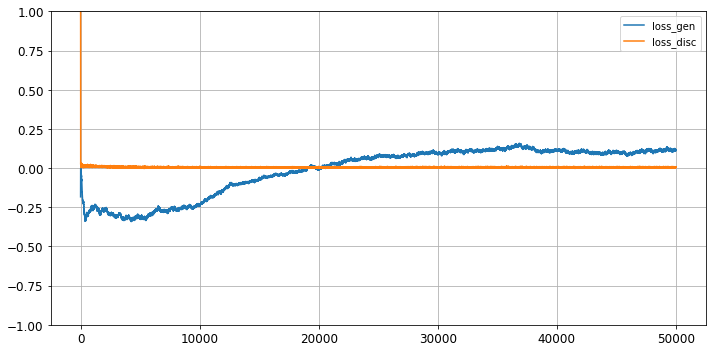

In [9]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-1,1])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [10]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### See the result of generator

Predicted Values: (1000, 3)
latent_space: 12
BATCH_SIZE: 100
use_bias: False
epochs: 50000
X-Y 2D slices:


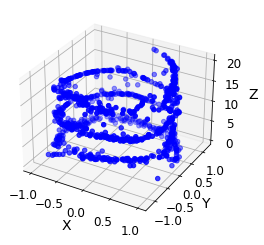

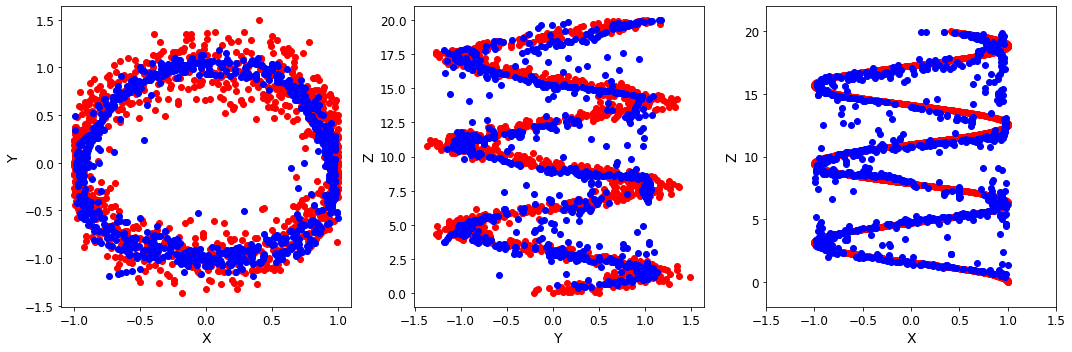

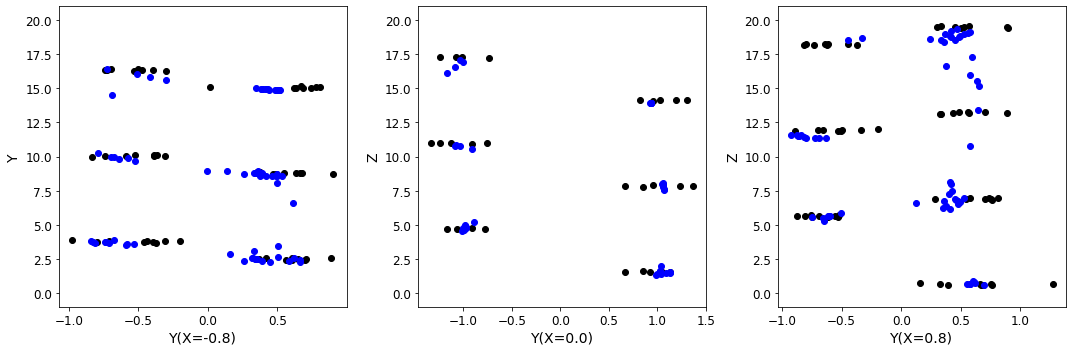

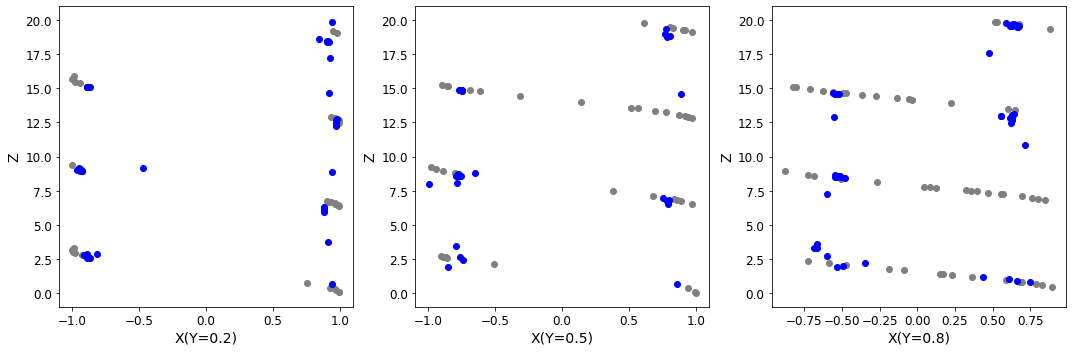

In [11]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='b')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train, c='gray')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

### Applying the prediction function

input_test : (400, 3)


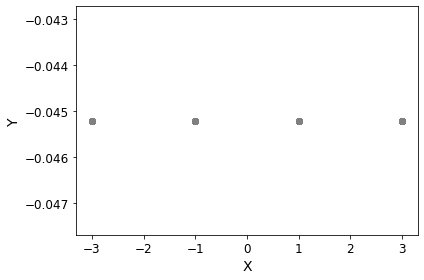

In [12]:
# define these for desired prediction
x_input = [-3,-1,1,3]
n_points = 400
y_min = -1
y_max = 1


# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//4, n_features), x_input[0])
predict2 = np.full((n_points//4, n_features), x_input[1])
predict3 = np.full((n_points//4, n_features), x_input[2])
predict4 = np.full((n_points//4, n_features), x_input[3])
predictthis = np.concatenate((predict1, predict2, predict3, predict4))

for n in range(n_points):
    predictthis[n,1] = random.uniform(y_min, y_max)
    
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(-1, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [13]:
X_generated = wgan.predict(input_test, scaler)

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

latent_space= 12
Epochs= 50000
BATCH_SIZE= 100
use_bias= False
X-Y 2D slices:


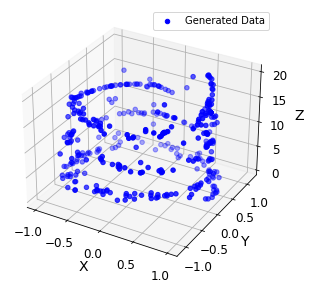

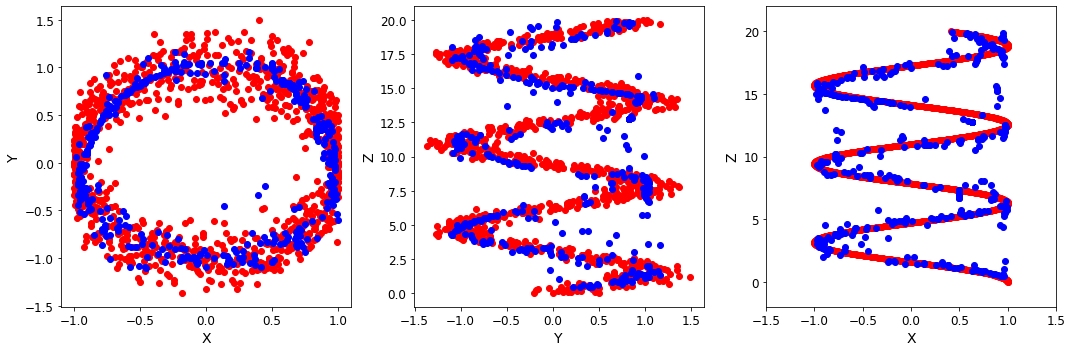

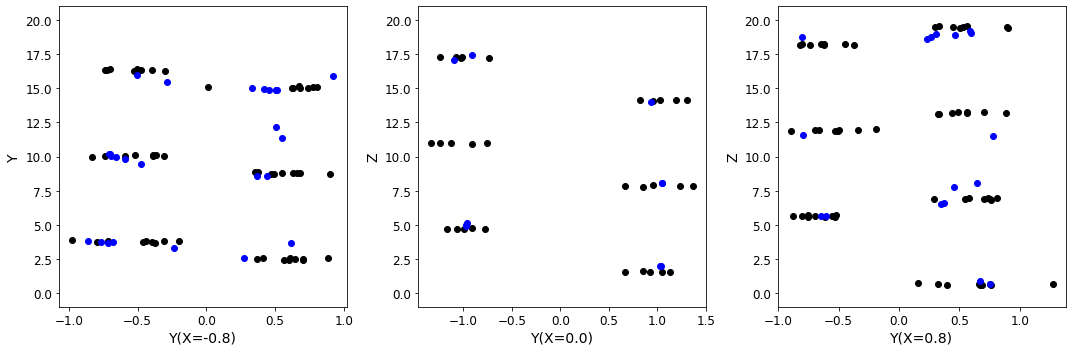

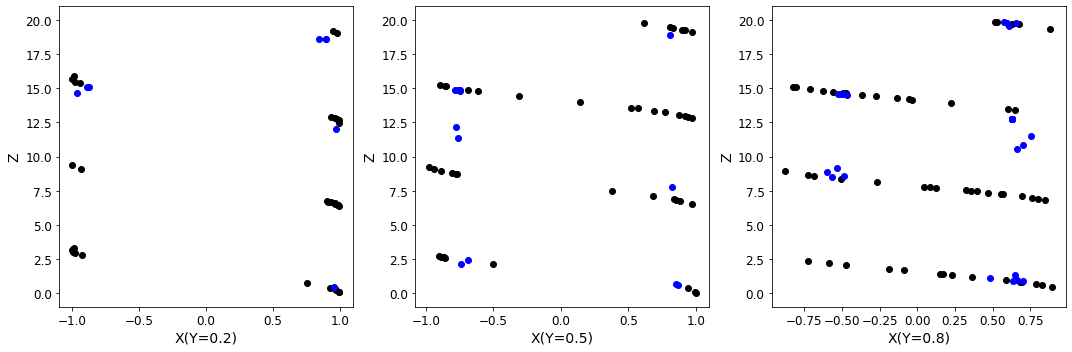

In [14]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], c='b', label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(X_generated[:,0],X_generated[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(X_generated[:,1],X_generated[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(X_generated[:,0],X_generated[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='r',label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    